In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/TLKM.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-1.901334,-1.927720,-1.944208,-1.101544,0.683641,0.956443,1.268434,1.023638,1.496048,1.474483,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,-1.884821
2012-10-18,-1.895749,-1.920264,-1.939855,-1.125565,0.002534,0.390498,0.764540,0.097491,0.901053,0.930980,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,-1.910838
2012-10-19,-1.895749,-1.916537,-1.936745,-1.125565,0.002534,0.390498,0.764540,0.479965,1.377288,1.339236,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,-1.910838
2012-10-22,-1.895749,-1.911877,-1.933636,-1.125565,-0.640938,-0.151083,0.278258,-0.448894,0.849284,0.941209,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,-1.936855
2012-10-23,-1.903195,-1.910945,-1.931770,-1.049270,0.052614,0.327538,0.664071,-0.448894,0.621549,1.174465,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,-1.910838


### Plot the Close price - our target

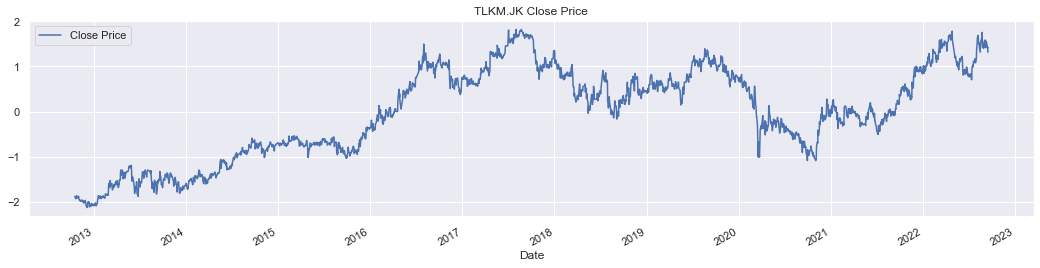

In [4]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('TLKM.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [5]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [7]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.18395
[1]	validation_0-rmse:1.17469
[2]	validation_0-rmse:1.16553
[3]	validation_0-rmse:1.15645
[4]	validation_0-rmse:1.14748
[5]	validation_0-rmse:1.13860
[6]	validation_0-rmse:1.12985
[7]	validation_0-rmse:1.12127
[8]	validation_0-rmse:1.11266
[9]	validation_0-rmse:1.10414
[10]	validation_0-rmse:1.09582
[11]	validation_0-rmse:1.08747
[12]	validation_0-rmse:1.07933
[13]	validation_0-rmse:1.07115
[14]	validation_0-rmse:1.06306
[15]	validation_0-rmse:1.05516
[16]	validation_0-rmse:1.04724
[17]	validation_0-rmse:1.03950
[18]	validation_0-rmse:1.03174
[19]	validation_0-rmse:1.02406
[20]	validation_0-rmse:1.01657
[21]	validation_0-rmse:1.00868
[22]	validation_0-rmse:1.00124
[23]	validation_0-rmse:0.99397
[24]	validation_0-rmse:0.98618
[25]	validation_0-rmse:0.97896
[26]	validation_0-rmse:0.97191
[27]	validation_0-rmse:0.96434
[28]	validation_0-rmse:0.95744
[29]	validation_0-rmse:0.95052
[30]	validation_0-rmse:0.94317
[31]	validation_0-rmse:0.93666
[32]	validation_0-

[260]	validation_0-rmse:0.31467
[261]	validation_0-rmse:0.31399
[262]	validation_0-rmse:0.31343
[263]	validation_0-rmse:0.31272
[264]	validation_0-rmse:0.31171
[265]	validation_0-rmse:0.31116
[266]	validation_0-rmse:0.31055
[267]	validation_0-rmse:0.30965
[268]	validation_0-rmse:0.30916
[269]	validation_0-rmse:0.30819
[270]	validation_0-rmse:0.30758
[271]	validation_0-rmse:0.30692
[272]	validation_0-rmse:0.30639
[273]	validation_0-rmse:0.30544
[274]	validation_0-rmse:0.30489
[275]	validation_0-rmse:0.30424
[276]	validation_0-rmse:0.30373
[277]	validation_0-rmse:0.30316
[278]	validation_0-rmse:0.30268
[279]	validation_0-rmse:0.30211
[280]	validation_0-rmse:0.30161
[281]	validation_0-rmse:0.30106
[282]	validation_0-rmse:0.30057
[283]	validation_0-rmse:0.29989
[284]	validation_0-rmse:0.29940
[285]	validation_0-rmse:0.29873
[286]	validation_0-rmse:0.29832
[287]	validation_0-rmse:0.29785
[288]	validation_0-rmse:0.29719
[289]	validation_0-rmse:0.29677
[290]	validation_0-rmse:0.29631
[291]	va

[16]	validation_0-rmse:1.01536
[17]	validation_0-rmse:1.00586
[18]	validation_0-rmse:0.99643
[19]	validation_0-rmse:0.98709
[20]	validation_0-rmse:0.97788
[21]	validation_0-rmse:0.96873
[22]	validation_0-rmse:0.95937
[23]	validation_0-rmse:0.95057
[24]	validation_0-rmse:0.94185
[25]	validation_0-rmse:0.93323
[26]	validation_0-rmse:0.92469
[27]	validation_0-rmse:0.91609
[28]	validation_0-rmse:0.90773
[29]	validation_0-rmse:0.89946
[30]	validation_0-rmse:0.89126
[31]	validation_0-rmse:0.88300
[32]	validation_0-rmse:0.87498
[33]	validation_0-rmse:0.86703
[34]	validation_0-rmse:0.85918
[35]	validation_0-rmse:0.85091
[36]	validation_0-rmse:0.84321
[37]	validation_0-rmse:0.83559
[38]	validation_0-rmse:0.82805
[39]	validation_0-rmse:0.82011
[40]	validation_0-rmse:0.81273
[41]	validation_0-rmse:0.80541
[42]	validation_0-rmse:0.79792
[43]	validation_0-rmse:0.79079
[44]	validation_0-rmse:0.78345
[45]	validation_0-rmse:0.77598
[46]	validation_0-rmse:0.76905
[47]	validation_0-rmse:0.76193
[48]	val

[275]	validation_0-rmse:0.12577
[276]	validation_0-rmse:0.12515
[277]	validation_0-rmse:0.12449
[278]	validation_0-rmse:0.12378
[279]	validation_0-rmse:0.12321
[280]	validation_0-rmse:0.12262
[281]	validation_0-rmse:0.12208
[282]	validation_0-rmse:0.12150
[283]	validation_0-rmse:0.12082
[284]	validation_0-rmse:0.12028
[285]	validation_0-rmse:0.11972
[286]	validation_0-rmse:0.11907
[287]	validation_0-rmse:0.11840
[288]	validation_0-rmse:0.11786
[289]	validation_0-rmse:0.11728
[290]	validation_0-rmse:0.11664
[291]	validation_0-rmse:0.11612
[292]	validation_0-rmse:0.11549
[293]	validation_0-rmse:0.11497
[294]	validation_0-rmse:0.11438
[295]	validation_0-rmse:0.11391
[296]	validation_0-rmse:0.11340
[297]	validation_0-rmse:0.11282
[298]	validation_0-rmse:0.11234
[299]	validation_0-rmse:0.11178
[300]	validation_0-rmse:0.11130
[301]	validation_0-rmse:0.11087
[302]	validation_0-rmse:0.11038
[303]	validation_0-rmse:0.10984
[304]	validation_0-rmse:0.10942
[305]	validation_0-rmse:0.10896
[306]	va

[33]	validation_0-rmse:0.85774
[34]	validation_0-rmse:0.84953
[35]	validation_0-rmse:0.84139
[36]	validation_0-rmse:0.83335
[37]	validation_0-rmse:0.82537
[38]	validation_0-rmse:0.81749
[39]	validation_0-rmse:0.80969
[40]	validation_0-rmse:0.80195
[41]	validation_0-rmse:0.79431
[42]	validation_0-rmse:0.78669
[43]	validation_0-rmse:0.77921
[44]	validation_0-rmse:0.77177
[45]	validation_0-rmse:0.76444
[46]	validation_0-rmse:0.75715
[47]	validation_0-rmse:0.74996
[48]	validation_0-rmse:0.74284
[49]	validation_0-rmse:0.73578
[50]	validation_0-rmse:0.72876
[51]	validation_0-rmse:0.72181
[52]	validation_0-rmse:0.71494
[53]	validation_0-rmse:0.70812
[54]	validation_0-rmse:0.70138
[55]	validation_0-rmse:0.69470
[56]	validation_0-rmse:0.68809
[57]	validation_0-rmse:0.68154
[58]	validation_0-rmse:0.67509
[59]	validation_0-rmse:0.66868
[60]	validation_0-rmse:0.66235
[61]	validation_0-rmse:0.65605
[62]	validation_0-rmse:0.64984
[63]	validation_0-rmse:0.64369
[64]	validation_0-rmse:0.63760
[65]	val

[292]	validation_0-rmse:0.10131
[293]	validation_0-rmse:0.10075
[294]	validation_0-rmse:0.10018
[295]	validation_0-rmse:0.09962
[296]	validation_0-rmse:0.09907
[297]	validation_0-rmse:0.09853
[298]	validation_0-rmse:0.09798
[299]	validation_0-rmse:0.09745
[300]	validation_0-rmse:0.09692
[301]	validation_0-rmse:0.09640
[302]	validation_0-rmse:0.09589
[303]	validation_0-rmse:0.09536
[304]	validation_0-rmse:0.09486
[305]	validation_0-rmse:0.09434
[306]	validation_0-rmse:0.09384
[307]	validation_0-rmse:0.09335
[308]	validation_0-rmse:0.09286
[309]	validation_0-rmse:0.09239
[310]	validation_0-rmse:0.09190
[311]	validation_0-rmse:0.09141
[312]	validation_0-rmse:0.09094
[313]	validation_0-rmse:0.09049
[314]	validation_0-rmse:0.09002
[315]	validation_0-rmse:0.08956
[316]	validation_0-rmse:0.08911
[317]	validation_0-rmse:0.08865
[318]	validation_0-rmse:0.08822
[319]	validation_0-rmse:0.08777
[320]	validation_0-rmse:0.08735
[321]	validation_0-rmse:0.08692
[322]	validation_0-rmse:0.08649
[323]	va

[50]	validation_0-rmse:0.72650
[51]	validation_0-rmse:0.71952
[52]	validation_0-rmse:0.71261
[53]	validation_0-rmse:0.70584
[54]	validation_0-rmse:0.69914
[55]	validation_0-rmse:0.69248
[56]	validation_0-rmse:0.68584
[57]	validation_0-rmse:0.67933
[58]	validation_0-rmse:0.67290
[59]	validation_0-rmse:0.66649
[60]	validation_0-rmse:0.66011
[61]	validation_0-rmse:0.65391
[62]	validation_0-rmse:0.64774
[63]	validation_0-rmse:0.64156
[64]	validation_0-rmse:0.63543
[65]	validation_0-rmse:0.62936
[66]	validation_0-rmse:0.62343
[67]	validation_0-rmse:0.61760
[68]	validation_0-rmse:0.61171
[69]	validation_0-rmse:0.60601
[70]	validation_0-rmse:0.60029
[71]	validation_0-rmse:0.59459
[72]	validation_0-rmse:0.58893
[73]	validation_0-rmse:0.58333
[74]	validation_0-rmse:0.57780
[75]	validation_0-rmse:0.57240
[76]	validation_0-rmse:0.56707
[77]	validation_0-rmse:0.56169
[78]	validation_0-rmse:0.55648
[79]	validation_0-rmse:0.55121
[80]	validation_0-rmse:0.54611
[81]	validation_0-rmse:0.54094
[82]	val

[308]	validation_0-rmse:0.09494
[309]	validation_0-rmse:0.09443
[310]	validation_0-rmse:0.09393
[311]	validation_0-rmse:0.09346
[312]	validation_0-rmse:0.09300
[313]	validation_0-rmse:0.09257
[314]	validation_0-rmse:0.09208
[315]	validation_0-rmse:0.09161
[316]	validation_0-rmse:0.09117
[317]	validation_0-rmse:0.09071
[318]	validation_0-rmse:0.09030
[319]	validation_0-rmse:0.08987
[320]	validation_0-rmse:0.08946
[321]	validation_0-rmse:0.08907
[322]	validation_0-rmse:0.08863
[323]	validation_0-rmse:0.08822
[324]	validation_0-rmse:0.08781
[325]	validation_0-rmse:0.08744
[326]	validation_0-rmse:0.08701
[327]	validation_0-rmse:0.08663
[328]	validation_0-rmse:0.08621
[329]	validation_0-rmse:0.08586
[330]	validation_0-rmse:0.08545
[331]	validation_0-rmse:0.08510
[332]	validation_0-rmse:0.08469
[333]	validation_0-rmse:0.08429
[334]	validation_0-rmse:0.08394
[335]	validation_0-rmse:0.08361
[336]	validation_0-rmse:0.08326
[337]	validation_0-rmse:0.08293
[338]	validation_0-rmse:0.08254
[339]	va

[67]	validation_0-rmse:0.62012
[68]	validation_0-rmse:0.61429
[69]	validation_0-rmse:0.60851
[70]	validation_0-rmse:0.60275
[71]	validation_0-rmse:0.59710
[72]	validation_0-rmse:0.59151
[73]	validation_0-rmse:0.58598
[74]	validation_0-rmse:0.58049
[75]	validation_0-rmse:0.57506
[76]	validation_0-rmse:0.56966
[77]	validation_0-rmse:0.56436
[78]	validation_0-rmse:0.55909
[79]	validation_0-rmse:0.55388
[80]	validation_0-rmse:0.54872
[81]	validation_0-rmse:0.54362
[82]	validation_0-rmse:0.53856
[83]	validation_0-rmse:0.53356
[84]	validation_0-rmse:0.52861
[85]	validation_0-rmse:0.52372
[86]	validation_0-rmse:0.51887
[87]	validation_0-rmse:0.51408
[88]	validation_0-rmse:0.50934
[89]	validation_0-rmse:0.50465
[90]	validation_0-rmse:0.50001
[91]	validation_0-rmse:0.49538
[92]	validation_0-rmse:0.49082
[93]	validation_0-rmse:0.48630
[94]	validation_0-rmse:0.48182
[95]	validation_0-rmse:0.47740
[96]	validation_0-rmse:0.47301
[97]	validation_0-rmse:0.46867
[98]	validation_0-rmse:0.46438
[99]	val

[325]	validation_0-rmse:0.08977
[326]	validation_0-rmse:0.08936
[327]	validation_0-rmse:0.08899
[328]	validation_0-rmse:0.08863
[329]	validation_0-rmse:0.08827
[330]	validation_0-rmse:0.08790
[331]	validation_0-rmse:0.08756
[332]	validation_0-rmse:0.08717
[333]	validation_0-rmse:0.08684
[334]	validation_0-rmse:0.08649
[335]	validation_0-rmse:0.08616
[336]	validation_0-rmse:0.08582
[337]	validation_0-rmse:0.08548
[338]	validation_0-rmse:0.08516
[339]	validation_0-rmse:0.08481
[340]	validation_0-rmse:0.08452
[341]	validation_0-rmse:0.08416
[342]	validation_0-rmse:0.08387
[343]	validation_0-rmse:0.08356
[344]	validation_0-rmse:0.08328
[345]	validation_0-rmse:0.08296
[346]	validation_0-rmse:0.08264
[347]	validation_0-rmse:0.08238
[348]	validation_0-rmse:0.08208
[349]	validation_0-rmse:0.08175
[350]	validation_0-rmse:0.08149
[351]	validation_0-rmse:0.08119
[352]	validation_0-rmse:0.08095
[353]	validation_0-rmse:0.08064
[354]	validation_0-rmse:0.08039
[355]	validation_0-rmse:0.08012
[356]	va

[84]	validation_0-rmse:0.64968
[85]	validation_0-rmse:0.64523
[86]	validation_0-rmse:0.64158
[87]	validation_0-rmse:0.63798
[88]	validation_0-rmse:0.63367
[89]	validation_0-rmse:0.62939
[90]	validation_0-rmse:0.62589
[91]	validation_0-rmse:0.62220
[92]	validation_0-rmse:0.61804
[93]	validation_0-rmse:0.61392
[94]	validation_0-rmse:0.61057
[95]	validation_0-rmse:0.60679
[96]	validation_0-rmse:0.60351
[97]	validation_0-rmse:0.59981
[98]	validation_0-rmse:0.59588
[99]	validation_0-rmse:0.59264
[100]	validation_0-rmse:0.58878
[101]	validation_0-rmse:0.58561
[102]	validation_0-rmse:0.58182
[103]	validation_0-rmse:0.57808
[104]	validation_0-rmse:0.57502
[105]	validation_0-rmse:0.57198
[106]	validation_0-rmse:0.56834
[107]	validation_0-rmse:0.56473
[108]	validation_0-rmse:0.56178
[109]	validation_0-rmse:0.55825
[110]	validation_0-rmse:0.55533
[111]	validation_0-rmse:0.55187
[112]	validation_0-rmse:0.54868
[113]	validation_0-rmse:0.54528
[114]	validation_0-rmse:0.54251
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.27259
[342]	validation_0-rmse:0.27215
[343]	validation_0-rmse:0.27186
[344]	validation_0-rmse:0.27168
[345]	validation_0-rmse:0.27137
[346]	validation_0-rmse:0.27078
[347]	validation_0-rmse:0.27061
[348]	validation_0-rmse:0.27031
[349]	validation_0-rmse:0.27005
[350]	validation_0-rmse:0.26989
[351]	validation_0-rmse:0.26947
[352]	validation_0-rmse:0.26921
[353]	validation_0-rmse:0.26896
[354]	validation_0-rmse:0.26842
[355]	validation_0-rmse:0.26826
[356]	validation_0-rmse:0.26774
[357]	validation_0-rmse:0.26749
[358]	validation_0-rmse:0.26722
[359]	validation_0-rmse:0.26703
[360]	validation_0-rmse:0.26652
[361]	validation_0-rmse:0.26628
[362]	validation_0-rmse:0.26577
[363]	validation_0-rmse:0.26560
[364]	validation_0-rmse:0.26538
[365]	validation_0-rmse:0.26520
[366]	validation_0-rmse:0.26470
[367]	validation_0-rmse:0.26445
[368]	validation_0-rmse:0.26431
[369]	validation_0-rmse:0.26382
[370]	validation_0-rmse:0.26370
[371]	validation_0-rmse:0.26322
[372]	va

[598]	validation_0-rmse:0.22836
[599]	validation_0-rmse:0.22834
[0]	validation_0-rmse:1.18194
[1]	validation_0-rmse:1.17068
[2]	validation_0-rmse:1.15954
[3]	validation_0-rmse:1.14851
[4]	validation_0-rmse:1.13762
[5]	validation_0-rmse:1.12680
[6]	validation_0-rmse:1.11610
[7]	validation_0-rmse:1.10560
[8]	validation_0-rmse:1.09513
[9]	validation_0-rmse:1.08479
[10]	validation_0-rmse:1.07454
[11]	validation_0-rmse:1.06445
[12]	validation_0-rmse:1.05442
[13]	validation_0-rmse:1.04451
[14]	validation_0-rmse:1.03472
[15]	validation_0-rmse:1.02498
[16]	validation_0-rmse:1.01536
[17]	validation_0-rmse:1.00586
[18]	validation_0-rmse:0.99643
[19]	validation_0-rmse:0.98709
[20]	validation_0-rmse:0.97788
[21]	validation_0-rmse:0.96873
[22]	validation_0-rmse:0.95937
[23]	validation_0-rmse:0.95057
[24]	validation_0-rmse:0.94185
[25]	validation_0-rmse:0.93323
[26]	validation_0-rmse:0.92469
[27]	validation_0-rmse:0.91609
[28]	validation_0-rmse:0.90773
[29]	validation_0-rmse:0.89946
[30]	validation_

[258]	validation_0-rmse:0.13775
[259]	validation_0-rmse:0.13700
[260]	validation_0-rmse:0.13613
[261]	validation_0-rmse:0.13543
[262]	validation_0-rmse:0.13474
[263]	validation_0-rmse:0.13400
[264]	validation_0-rmse:0.13327
[265]	validation_0-rmse:0.13256
[266]	validation_0-rmse:0.13175
[267]	validation_0-rmse:0.13110
[268]	validation_0-rmse:0.13045
[269]	validation_0-rmse:0.12978
[270]	validation_0-rmse:0.12900
[271]	validation_0-rmse:0.12833
[272]	validation_0-rmse:0.12772
[273]	validation_0-rmse:0.12708
[274]	validation_0-rmse:0.12636
[275]	validation_0-rmse:0.12577
[276]	validation_0-rmse:0.12515
[277]	validation_0-rmse:0.12449
[278]	validation_0-rmse:0.12378
[279]	validation_0-rmse:0.12321
[280]	validation_0-rmse:0.12262
[281]	validation_0-rmse:0.12208
[282]	validation_0-rmse:0.12150
[283]	validation_0-rmse:0.12082
[284]	validation_0-rmse:0.12028
[285]	validation_0-rmse:0.11972
[286]	validation_0-rmse:0.11907
[287]	validation_0-rmse:0.11840
[288]	validation_0-rmse:0.11786
[289]	va

[515]	validation_0-rmse:0.07056
[516]	validation_0-rmse:0.07049
[517]	validation_0-rmse:0.07043
[518]	validation_0-rmse:0.07038
[519]	validation_0-rmse:0.07032
[520]	validation_0-rmse:0.07028
[521]	validation_0-rmse:0.07024
[522]	validation_0-rmse:0.07017
[523]	validation_0-rmse:0.07014
[524]	validation_0-rmse:0.07009
[525]	validation_0-rmse:0.07003
[526]	validation_0-rmse:0.06997
[527]	validation_0-rmse:0.06991
[528]	validation_0-rmse:0.06987
[529]	validation_0-rmse:0.06984
[530]	validation_0-rmse:0.06978
[531]	validation_0-rmse:0.06974
[532]	validation_0-rmse:0.06968
[533]	validation_0-rmse:0.06965
[534]	validation_0-rmse:0.06960
[535]	validation_0-rmse:0.06955
[536]	validation_0-rmse:0.06951
[537]	validation_0-rmse:0.06949
[538]	validation_0-rmse:0.06945
[539]	validation_0-rmse:0.06939
[540]	validation_0-rmse:0.06937
[541]	validation_0-rmse:0.06931
[542]	validation_0-rmse:0.06927
[543]	validation_0-rmse:0.06922
[544]	validation_0-rmse:0.06920
[545]	validation_0-rmse:0.06916
[546]	va

[175]	validation_0-rmse:0.23347
[176]	validation_0-rmse:0.23148
[177]	validation_0-rmse:0.22957
[178]	validation_0-rmse:0.22769
[179]	validation_0-rmse:0.22581
[180]	validation_0-rmse:0.22396
[181]	validation_0-rmse:0.22212
[182]	validation_0-rmse:0.22031
[183]	validation_0-rmse:0.21851
[184]	validation_0-rmse:0.21676
[185]	validation_0-rmse:0.21500
[186]	validation_0-rmse:0.21326
[187]	validation_0-rmse:0.21155
[188]	validation_0-rmse:0.20982
[189]	validation_0-rmse:0.20814
[190]	validation_0-rmse:0.20647
[191]	validation_0-rmse:0.20482
[192]	validation_0-rmse:0.20315
[193]	validation_0-rmse:0.20153
[194]	validation_0-rmse:0.19995
[195]	validation_0-rmse:0.19833
[196]	validation_0-rmse:0.19677
[197]	validation_0-rmse:0.19520
[198]	validation_0-rmse:0.19366
[199]	validation_0-rmse:0.19210
[200]	validation_0-rmse:0.19059
[201]	validation_0-rmse:0.18909
[202]	validation_0-rmse:0.18763
[203]	validation_0-rmse:0.18614
[204]	validation_0-rmse:0.18470
[205]	validation_0-rmse:0.18326
[206]	va

[432]	validation_0-rmse:0.05901
[433]	validation_0-rmse:0.05888
[434]	validation_0-rmse:0.05873
[435]	validation_0-rmse:0.05860
[436]	validation_0-rmse:0.05845
[437]	validation_0-rmse:0.05833
[438]	validation_0-rmse:0.05818
[439]	validation_0-rmse:0.05806
[440]	validation_0-rmse:0.05794
[441]	validation_0-rmse:0.05780
[442]	validation_0-rmse:0.05770
[443]	validation_0-rmse:0.05756
[444]	validation_0-rmse:0.05744
[445]	validation_0-rmse:0.05733
[446]	validation_0-rmse:0.05720
[447]	validation_0-rmse:0.05709
[448]	validation_0-rmse:0.05696
[449]	validation_0-rmse:0.05685
[450]	validation_0-rmse:0.05674
[451]	validation_0-rmse:0.05663
[452]	validation_0-rmse:0.05652
[453]	validation_0-rmse:0.05642
[454]	validation_0-rmse:0.05630
[455]	validation_0-rmse:0.05619
[456]	validation_0-rmse:0.05609
[457]	validation_0-rmse:0.05599
[458]	validation_0-rmse:0.05587
[459]	validation_0-rmse:0.05577
[460]	validation_0-rmse:0.05566
[461]	validation_0-rmse:0.05556
[462]	validation_0-rmse:0.05546
[463]	va

[92]	validation_0-rmse:0.48805
[93]	validation_0-rmse:0.48355
[94]	validation_0-rmse:0.47914
[95]	validation_0-rmse:0.47473
[96]	validation_0-rmse:0.47030
[97]	validation_0-rmse:0.46591
[98]	validation_0-rmse:0.46167
[99]	validation_0-rmse:0.45737
[100]	validation_0-rmse:0.45321
[101]	validation_0-rmse:0.44901
[102]	validation_0-rmse:0.44484
[103]	validation_0-rmse:0.44072
[104]	validation_0-rmse:0.43664
[105]	validation_0-rmse:0.43269
[106]	validation_0-rmse:0.42869
[107]	validation_0-rmse:0.42475
[108]	validation_0-rmse:0.42083
[109]	validation_0-rmse:0.41696
[110]	validation_0-rmse:0.41319
[111]	validation_0-rmse:0.40947
[112]	validation_0-rmse:0.40571
[113]	validation_0-rmse:0.40206
[114]	validation_0-rmse:0.39837
[115]	validation_0-rmse:0.39481
[116]	validation_0-rmse:0.39120
[117]	validation_0-rmse:0.38762
[118]	validation_0-rmse:0.38408
[119]	validation_0-rmse:0.38058
[120]	validation_0-rmse:0.37712
[121]	validation_0-rmse:0.37369
[122]	validation_0-rmse:0.37036
[123]	validation

[349]	validation_0-rmse:0.07889
[350]	validation_0-rmse:0.07860
[351]	validation_0-rmse:0.07829
[352]	validation_0-rmse:0.07800
[353]	validation_0-rmse:0.07772
[354]	validation_0-rmse:0.07742
[355]	validation_0-rmse:0.07709
[356]	validation_0-rmse:0.07681
[357]	validation_0-rmse:0.07649
[358]	validation_0-rmse:0.07621
[359]	validation_0-rmse:0.07594
[360]	validation_0-rmse:0.07562
[361]	validation_0-rmse:0.07538
[362]	validation_0-rmse:0.07512
[363]	validation_0-rmse:0.07481
[364]	validation_0-rmse:0.07455
[365]	validation_0-rmse:0.07430
[366]	validation_0-rmse:0.07405
[367]	validation_0-rmse:0.07376
[368]	validation_0-rmse:0.07353
[369]	validation_0-rmse:0.07330
[370]	validation_0-rmse:0.07304
[371]	validation_0-rmse:0.07282
[372]	validation_0-rmse:0.07259
[373]	validation_0-rmse:0.07236
[374]	validation_0-rmse:0.07207
[375]	validation_0-rmse:0.07184
[376]	validation_0-rmse:0.07164
[377]	validation_0-rmse:0.07138
[378]	validation_0-rmse:0.07116
[379]	validation_0-rmse:0.07095
[380]	va

[6]	validation_0-rmse:1.11492
[7]	validation_0-rmse:1.10416
[8]	validation_0-rmse:1.09348
[9]	validation_0-rmse:1.08295
[10]	validation_0-rmse:1.07248
[11]	validation_0-rmse:1.06217
[12]	validation_0-rmse:1.05192
[13]	validation_0-rmse:1.04179
[14]	validation_0-rmse:1.03176
[15]	validation_0-rmse:1.02184
[16]	validation_0-rmse:1.01199
[17]	validation_0-rmse:1.00219
[18]	validation_0-rmse:0.99251
[19]	validation_0-rmse:0.98298
[20]	validation_0-rmse:0.97353
[21]	validation_0-rmse:0.96409
[22]	validation_0-rmse:0.95480
[23]	validation_0-rmse:0.94562
[24]	validation_0-rmse:0.93654
[25]	validation_0-rmse:0.92752
[26]	validation_0-rmse:0.91860
[27]	validation_0-rmse:0.90976
[28]	validation_0-rmse:0.90101
[29]	validation_0-rmse:0.89235
[30]	validation_0-rmse:0.88378
[31]	validation_0-rmse:0.87526
[32]	validation_0-rmse:0.86686
[33]	validation_0-rmse:0.85854
[34]	validation_0-rmse:0.85025
[35]	validation_0-rmse:0.84209
[36]	validation_0-rmse:0.83402
[37]	validation_0-rmse:0.82604
[38]	validat

[266]	validation_0-rmse:0.12194
[267]	validation_0-rmse:0.12120
[268]	validation_0-rmse:0.12047
[269]	validation_0-rmse:0.11973
[270]	validation_0-rmse:0.11901
[271]	validation_0-rmse:0.11833
[272]	validation_0-rmse:0.11761
[273]	validation_0-rmse:0.11690
[274]	validation_0-rmse:0.11626
[275]	validation_0-rmse:0.11558
[276]	validation_0-rmse:0.11489
[277]	validation_0-rmse:0.11422
[278]	validation_0-rmse:0.11359
[279]	validation_0-rmse:0.11293
[280]	validation_0-rmse:0.11232
[281]	validation_0-rmse:0.11167
[282]	validation_0-rmse:0.11105
[283]	validation_0-rmse:0.11043
[284]	validation_0-rmse:0.10980
[285]	validation_0-rmse:0.10923
[286]	validation_0-rmse:0.10861
[287]	validation_0-rmse:0.10804
[288]	validation_0-rmse:0.10745
[289]	validation_0-rmse:0.10686
[290]	validation_0-rmse:0.10627
[291]	validation_0-rmse:0.10569
[292]	validation_0-rmse:0.10515
[293]	validation_0-rmse:0.10458
[294]	validation_0-rmse:0.10404
[295]	validation_0-rmse:0.10348
[296]	validation_0-rmse:0.10296
[297]	va

[523]	validation_0-rmse:0.05797
[524]	validation_0-rmse:0.05791
[525]	validation_0-rmse:0.05786
[526]	validation_0-rmse:0.05780
[527]	validation_0-rmse:0.05777
[528]	validation_0-rmse:0.05772
[529]	validation_0-rmse:0.05767
[530]	validation_0-rmse:0.05762
[531]	validation_0-rmse:0.05755
[532]	validation_0-rmse:0.05751
[533]	validation_0-rmse:0.05745
[534]	validation_0-rmse:0.05739
[535]	validation_0-rmse:0.05734
[536]	validation_0-rmse:0.05729
[537]	validation_0-rmse:0.05725
[538]	validation_0-rmse:0.05719
[539]	validation_0-rmse:0.05713
[540]	validation_0-rmse:0.05708
[541]	validation_0-rmse:0.05704
[542]	validation_0-rmse:0.05699
[543]	validation_0-rmse:0.05695
[544]	validation_0-rmse:0.05689
[545]	validation_0-rmse:0.05685
[546]	validation_0-rmse:0.05680
[547]	validation_0-rmse:0.05674
[548]	validation_0-rmse:0.05669
[549]	validation_0-rmse:0.05665
[550]	validation_0-rmse:0.05659
[551]	validation_0-rmse:0.05655
[552]	validation_0-rmse:0.05650
[553]	validation_0-rmse:0.05646
[554]	va

[183]	validation_0-rmse:0.39380
[184]	validation_0-rmse:0.39256
[185]	validation_0-rmse:0.39075
[186]	validation_0-rmse:0.38962
[187]	validation_0-rmse:0.38850
[188]	validation_0-rmse:0.38732
[189]	validation_0-rmse:0.38622
[190]	validation_0-rmse:0.38477
[191]	validation_0-rmse:0.38361
[192]	validation_0-rmse:0.38186
[193]	validation_0-rmse:0.38027
[194]	validation_0-rmse:0.37914
[195]	validation_0-rmse:0.37747
[196]	validation_0-rmse:0.37645
[197]	validation_0-rmse:0.37545
[198]	validation_0-rmse:0.37395
[199]	validation_0-rmse:0.37288
[200]	validation_0-rmse:0.37128
[201]	validation_0-rmse:0.36980
[202]	validation_0-rmse:0.36884
[203]	validation_0-rmse:0.36735
[204]	validation_0-rmse:0.36641
[205]	validation_0-rmse:0.36514
[206]	validation_0-rmse:0.36358
[207]	validation_0-rmse:0.36259
[208]	validation_0-rmse:0.36120
[209]	validation_0-rmse:0.36009
[210]	validation_0-rmse:0.35915
[211]	validation_0-rmse:0.35770
[212]	validation_0-rmse:0.35662
[213]	validation_0-rmse:0.35536
[214]	va

[440]	validation_0-rmse:0.24698
[441]	validation_0-rmse:0.24664
[442]	validation_0-rmse:0.24645
[443]	validation_0-rmse:0.24639
[444]	validation_0-rmse:0.24605
[445]	validation_0-rmse:0.24600
[446]	validation_0-rmse:0.24582
[447]	validation_0-rmse:0.24553
[448]	validation_0-rmse:0.24522
[449]	validation_0-rmse:0.24502
[450]	validation_0-rmse:0.24495
[451]	validation_0-rmse:0.24466
[452]	validation_0-rmse:0.24461
[453]	validation_0-rmse:0.24433
[454]	validation_0-rmse:0.24426
[455]	validation_0-rmse:0.24396
[456]	validation_0-rmse:0.24379
[457]	validation_0-rmse:0.24361
[458]	validation_0-rmse:0.24356
[459]	validation_0-rmse:0.24333
[460]	validation_0-rmse:0.24305
[461]	validation_0-rmse:0.24299
[462]	validation_0-rmse:0.24294
[463]	validation_0-rmse:0.24271
[464]	validation_0-rmse:0.24262
[465]	validation_0-rmse:0.24234
[466]	validation_0-rmse:0.24230
[467]	validation_0-rmse:0.24203
[468]	validation_0-rmse:0.24197
[469]	validation_0-rmse:0.24168
[470]	validation_0-rmse:0.24163
[471]	va

[697]	validation_0-rmse:0.22372
[698]	validation_0-rmse:0.22364
[699]	validation_0-rmse:0.22354
[0]	validation_0-rmse:1.18194
[1]	validation_0-rmse:1.17068
[2]	validation_0-rmse:1.15954
[3]	validation_0-rmse:1.14851
[4]	validation_0-rmse:1.13762
[5]	validation_0-rmse:1.12680
[6]	validation_0-rmse:1.11610
[7]	validation_0-rmse:1.10560
[8]	validation_0-rmse:1.09513
[9]	validation_0-rmse:1.08479
[10]	validation_0-rmse:1.07454
[11]	validation_0-rmse:1.06445
[12]	validation_0-rmse:1.05442
[13]	validation_0-rmse:1.04451
[14]	validation_0-rmse:1.03472
[15]	validation_0-rmse:1.02498
[16]	validation_0-rmse:1.01536
[17]	validation_0-rmse:1.00586
[18]	validation_0-rmse:0.99643
[19]	validation_0-rmse:0.98709
[20]	validation_0-rmse:0.97788
[21]	validation_0-rmse:0.96873
[22]	validation_0-rmse:0.95937
[23]	validation_0-rmse:0.95057
[24]	validation_0-rmse:0.94185
[25]	validation_0-rmse:0.93323
[26]	validation_0-rmse:0.92469
[27]	validation_0-rmse:0.91609
[28]	validation_0-rmse:0.90773
[29]	validation

[257]	validation_0-rmse:0.13848
[258]	validation_0-rmse:0.13775
[259]	validation_0-rmse:0.13700
[260]	validation_0-rmse:0.13613
[261]	validation_0-rmse:0.13543
[262]	validation_0-rmse:0.13474
[263]	validation_0-rmse:0.13400
[264]	validation_0-rmse:0.13327
[265]	validation_0-rmse:0.13256
[266]	validation_0-rmse:0.13175
[267]	validation_0-rmse:0.13110
[268]	validation_0-rmse:0.13045
[269]	validation_0-rmse:0.12978
[270]	validation_0-rmse:0.12900
[271]	validation_0-rmse:0.12833
[272]	validation_0-rmse:0.12772
[273]	validation_0-rmse:0.12708
[274]	validation_0-rmse:0.12636
[275]	validation_0-rmse:0.12577
[276]	validation_0-rmse:0.12515
[277]	validation_0-rmse:0.12449
[278]	validation_0-rmse:0.12378
[279]	validation_0-rmse:0.12321
[280]	validation_0-rmse:0.12262
[281]	validation_0-rmse:0.12208
[282]	validation_0-rmse:0.12150
[283]	validation_0-rmse:0.12082
[284]	validation_0-rmse:0.12028
[285]	validation_0-rmse:0.11972
[286]	validation_0-rmse:0.11907
[287]	validation_0-rmse:0.11840
[288]	va

[514]	validation_0-rmse:0.07060
[515]	validation_0-rmse:0.07056
[516]	validation_0-rmse:0.07049
[517]	validation_0-rmse:0.07043
[518]	validation_0-rmse:0.07038
[519]	validation_0-rmse:0.07032
[520]	validation_0-rmse:0.07028
[521]	validation_0-rmse:0.07024
[522]	validation_0-rmse:0.07017
[523]	validation_0-rmse:0.07014
[524]	validation_0-rmse:0.07009
[525]	validation_0-rmse:0.07003
[526]	validation_0-rmse:0.06997
[527]	validation_0-rmse:0.06991
[528]	validation_0-rmse:0.06987
[529]	validation_0-rmse:0.06984
[530]	validation_0-rmse:0.06978
[531]	validation_0-rmse:0.06974
[532]	validation_0-rmse:0.06968
[533]	validation_0-rmse:0.06965
[534]	validation_0-rmse:0.06960
[535]	validation_0-rmse:0.06955
[536]	validation_0-rmse:0.06951
[537]	validation_0-rmse:0.06949
[538]	validation_0-rmse:0.06945
[539]	validation_0-rmse:0.06939
[540]	validation_0-rmse:0.06937
[541]	validation_0-rmse:0.06931
[542]	validation_0-rmse:0.06927
[543]	validation_0-rmse:0.06922
[544]	validation_0-rmse:0.06920
[545]	va

[73]	validation_0-rmse:0.58545
[74]	validation_0-rmse:0.57991
[75]	validation_0-rmse:0.57447
[76]	validation_0-rmse:0.56908
[77]	validation_0-rmse:0.56374
[78]	validation_0-rmse:0.55846
[79]	validation_0-rmse:0.55324
[80]	validation_0-rmse:0.54806
[81]	validation_0-rmse:0.54293
[82]	validation_0-rmse:0.53786
[83]	validation_0-rmse:0.53284
[84]	validation_0-rmse:0.52782
[85]	validation_0-rmse:0.52288
[86]	validation_0-rmse:0.51798
[87]	validation_0-rmse:0.51311
[88]	validation_0-rmse:0.50830
[89]	validation_0-rmse:0.50358
[90]	validation_0-rmse:0.49886
[91]	validation_0-rmse:0.49420
[92]	validation_0-rmse:0.48962
[93]	validation_0-rmse:0.48505
[94]	validation_0-rmse:0.48057
[95]	validation_0-rmse:0.47609
[96]	validation_0-rmse:0.47162
[97]	validation_0-rmse:0.46724
[98]	validation_0-rmse:0.46290
[99]	validation_0-rmse:0.45864
[100]	validation_0-rmse:0.45439
[101]	validation_0-rmse:0.45014
[102]	validation_0-rmse:0.44598
[103]	validation_0-rmse:0.44188
[104]	validation_0-rmse:0.43775
[10

[330]	validation_0-rmse:0.08327
[331]	validation_0-rmse:0.08288
[332]	validation_0-rmse:0.08250
[333]	validation_0-rmse:0.08213
[334]	validation_0-rmse:0.08175
[335]	validation_0-rmse:0.08139
[336]	validation_0-rmse:0.08101
[337]	validation_0-rmse:0.08066
[338]	validation_0-rmse:0.08031
[339]	validation_0-rmse:0.07995
[340]	validation_0-rmse:0.07959
[341]	validation_0-rmse:0.07925
[342]	validation_0-rmse:0.07891
[343]	validation_0-rmse:0.07858
[344]	validation_0-rmse:0.07824
[345]	validation_0-rmse:0.07790
[346]	validation_0-rmse:0.07757
[347]	validation_0-rmse:0.07726
[348]	validation_0-rmse:0.07693
[349]	validation_0-rmse:0.07661
[350]	validation_0-rmse:0.07630
[351]	validation_0-rmse:0.07599
[352]	validation_0-rmse:0.07569
[353]	validation_0-rmse:0.07537
[354]	validation_0-rmse:0.07507
[355]	validation_0-rmse:0.07476
[356]	validation_0-rmse:0.07447
[357]	validation_0-rmse:0.07416
[358]	validation_0-rmse:0.07388
[359]	validation_0-rmse:0.07359
[360]	validation_0-rmse:0.07332
[361]	va

[587]	validation_0-rmse:0.04780
[588]	validation_0-rmse:0.04776
[589]	validation_0-rmse:0.04772
[590]	validation_0-rmse:0.04768
[591]	validation_0-rmse:0.04765
[592]	validation_0-rmse:0.04760
[593]	validation_0-rmse:0.04758
[594]	validation_0-rmse:0.04754
[595]	validation_0-rmse:0.04750
[596]	validation_0-rmse:0.04746
[597]	validation_0-rmse:0.04742
[598]	validation_0-rmse:0.04739
[599]	validation_0-rmse:0.04735
[600]	validation_0-rmse:0.04732
[601]	validation_0-rmse:0.04728
[602]	validation_0-rmse:0.04726
[603]	validation_0-rmse:0.04722
[604]	validation_0-rmse:0.04718
[605]	validation_0-rmse:0.04714
[606]	validation_0-rmse:0.04711
[607]	validation_0-rmse:0.04708
[608]	validation_0-rmse:0.04705
[609]	validation_0-rmse:0.04701
[610]	validation_0-rmse:0.04699
[611]	validation_0-rmse:0.04696
[612]	validation_0-rmse:0.04692
[613]	validation_0-rmse:0.04688
[614]	validation_0-rmse:0.04685
[615]	validation_0-rmse:0.04683
[616]	validation_0-rmse:0.04680
[617]	validation_0-rmse:0.04677
[618]	va

[147]	validation_0-rmse:0.29646
[148]	validation_0-rmse:0.29386
[149]	validation_0-rmse:0.29128
[150]	validation_0-rmse:0.28879
[151]	validation_0-rmse:0.28633
[152]	validation_0-rmse:0.28383
[153]	validation_0-rmse:0.28135
[154]	validation_0-rmse:0.27897
[155]	validation_0-rmse:0.27653
[156]	validation_0-rmse:0.27421
[157]	validation_0-rmse:0.27183
[158]	validation_0-rmse:0.26952
[159]	validation_0-rmse:0.26726
[160]	validation_0-rmse:0.26496
[161]	validation_0-rmse:0.26268
[162]	validation_0-rmse:0.26048
[163]	validation_0-rmse:0.25825
[164]	validation_0-rmse:0.25604
[165]	validation_0-rmse:0.25386
[166]	validation_0-rmse:0.25175
[167]	validation_0-rmse:0.24965
[168]	validation_0-rmse:0.24753
[169]	validation_0-rmse:0.24550
[170]	validation_0-rmse:0.24343
[171]	validation_0-rmse:0.24141
[172]	validation_0-rmse:0.23939
[173]	validation_0-rmse:0.23743
[174]	validation_0-rmse:0.23548
[175]	validation_0-rmse:0.23352
[176]	validation_0-rmse:0.23158
[177]	validation_0-rmse:0.22969
[178]	va

[404]	validation_0-rmse:0.06597
[405]	validation_0-rmse:0.06577
[406]	validation_0-rmse:0.06563
[407]	validation_0-rmse:0.06543
[408]	validation_0-rmse:0.06528
[409]	validation_0-rmse:0.06508
[410]	validation_0-rmse:0.06495
[411]	validation_0-rmse:0.06476
[412]	validation_0-rmse:0.06461
[413]	validation_0-rmse:0.06442
[414]	validation_0-rmse:0.06428
[415]	validation_0-rmse:0.06415
[416]	validation_0-rmse:0.06400
[417]	validation_0-rmse:0.06381
[418]	validation_0-rmse:0.06369
[419]	validation_0-rmse:0.06357
[420]	validation_0-rmse:0.06343
[421]	validation_0-rmse:0.06331
[422]	validation_0-rmse:0.06313
[423]	validation_0-rmse:0.06301
[424]	validation_0-rmse:0.06284
[425]	validation_0-rmse:0.06272
[426]	validation_0-rmse:0.06260
[427]	validation_0-rmse:0.06248
[428]	validation_0-rmse:0.06231
[429]	validation_0-rmse:0.06219
[430]	validation_0-rmse:0.06205
[431]	validation_0-rmse:0.06195
[432]	validation_0-rmse:0.06178
[433]	validation_0-rmse:0.06165
[434]	validation_0-rmse:0.06149
[435]	va

[661]	validation_0-rmse:0.04817
[662]	validation_0-rmse:0.04814
[663]	validation_0-rmse:0.04813
[664]	validation_0-rmse:0.04810
[665]	validation_0-rmse:0.04808
[666]	validation_0-rmse:0.04803
[667]	validation_0-rmse:0.04801
[668]	validation_0-rmse:0.04798
[669]	validation_0-rmse:0.04796
[670]	validation_0-rmse:0.04793
[671]	validation_0-rmse:0.04789
[672]	validation_0-rmse:0.04787
[673]	validation_0-rmse:0.04784
[674]	validation_0-rmse:0.04783
[675]	validation_0-rmse:0.04780
[676]	validation_0-rmse:0.04777
[677]	validation_0-rmse:0.04774
[678]	validation_0-rmse:0.04772
[679]	validation_0-rmse:0.04770
[680]	validation_0-rmse:0.04767
[681]	validation_0-rmse:0.04764
[682]	validation_0-rmse:0.04762
[683]	validation_0-rmse:0.04759
[684]	validation_0-rmse:0.04756
[685]	validation_0-rmse:0.04752
[686]	validation_0-rmse:0.04750
[687]	validation_0-rmse:0.04748
[688]	validation_0-rmse:0.04746
[689]	validation_0-rmse:0.04744
[690]	validation_0-rmse:0.04742
[691]	validation_0-rmse:0.04739
[692]	va

[221]	validation_0-rmse:0.16492
[222]	validation_0-rmse:0.16370
[223]	validation_0-rmse:0.16254
[224]	validation_0-rmse:0.16136
[225]	validation_0-rmse:0.16022
[226]	validation_0-rmse:0.15908
[227]	validation_0-rmse:0.15794
[228]	validation_0-rmse:0.15681
[229]	validation_0-rmse:0.15568
[230]	validation_0-rmse:0.15458
[231]	validation_0-rmse:0.15352
[232]	validation_0-rmse:0.15242
[233]	validation_0-rmse:0.15137
[234]	validation_0-rmse:0.15031
[235]	validation_0-rmse:0.14925
[236]	validation_0-rmse:0.14825
[237]	validation_0-rmse:0.14722
[238]	validation_0-rmse:0.14622
[239]	validation_0-rmse:0.14523
[240]	validation_0-rmse:0.14423
[241]	validation_0-rmse:0.14327
[242]	validation_0-rmse:0.14229
[243]	validation_0-rmse:0.14134
[244]	validation_0-rmse:0.14042
[245]	validation_0-rmse:0.13948
[246]	validation_0-rmse:0.13854
[247]	validation_0-rmse:0.13761
[248]	validation_0-rmse:0.13669
[249]	validation_0-rmse:0.13583
[250]	validation_0-rmse:0.13494
[251]	validation_0-rmse:0.13405
[252]	va

[478]	validation_0-rmse:0.06090
[479]	validation_0-rmse:0.06082
[480]	validation_0-rmse:0.06075
[481]	validation_0-rmse:0.06067
[482]	validation_0-rmse:0.06057
[483]	validation_0-rmse:0.06050
[484]	validation_0-rmse:0.06044
[485]	validation_0-rmse:0.06035
[486]	validation_0-rmse:0.06028
[487]	validation_0-rmse:0.06021
[488]	validation_0-rmse:0.06013
[489]	validation_0-rmse:0.06006
[490]	validation_0-rmse:0.06000
[491]	validation_0-rmse:0.05993
[492]	validation_0-rmse:0.05986
[493]	validation_0-rmse:0.05977
[494]	validation_0-rmse:0.05971
[495]	validation_0-rmse:0.05965
[496]	validation_0-rmse:0.05957
[497]	validation_0-rmse:0.05952
[498]	validation_0-rmse:0.05945
[499]	validation_0-rmse:0.05938
[500]	validation_0-rmse:0.05932
[501]	validation_0-rmse:0.05926
[502]	validation_0-rmse:0.05920
[503]	validation_0-rmse:0.05914
[504]	validation_0-rmse:0.05908
[505]	validation_0-rmse:0.05900
[506]	validation_0-rmse:0.05895
[507]	validation_0-rmse:0.05887
[508]	validation_0-rmse:0.05881
[509]	va

[35]	validation_0-rmse:0.90932
[36]	validation_0-rmse:0.90314
[37]	validation_0-rmse:0.89628
[38]	validation_0-rmse:0.88948
[39]	validation_0-rmse:0.88327
[40]	validation_0-rmse:0.87646
[41]	validation_0-rmse:0.87033
[42]	validation_0-rmse:0.86366
[43]	validation_0-rmse:0.85732
[44]	validation_0-rmse:0.85163
[45]	validation_0-rmse:0.84514
[46]	validation_0-rmse:0.83873
[47]	validation_0-rmse:0.83305
[48]	validation_0-rmse:0.82675
[49]	validation_0-rmse:0.82110
[50]	validation_0-rmse:0.81493
[51]	validation_0-rmse:0.80939
[52]	validation_0-rmse:0.80333
[53]	validation_0-rmse:0.79815
[54]	validation_0-rmse:0.79221
[55]	validation_0-rmse:0.78698
[56]	validation_0-rmse:0.78141
[57]	validation_0-rmse:0.77644
[58]	validation_0-rmse:0.77072
[59]	validation_0-rmse:0.76531
[60]	validation_0-rmse:0.76049
[61]	validation_0-rmse:0.75493
[62]	validation_0-rmse:0.74968
[63]	validation_0-rmse:0.74424
[64]	validation_0-rmse:0.73884
[65]	validation_0-rmse:0.73427
[66]	validation_0-rmse:0.72975
[67]	val

[294]	validation_0-rmse:0.29424
[295]	validation_0-rmse:0.29376
[296]	validation_0-rmse:0.29328
[297]	validation_0-rmse:0.29267
[298]	validation_0-rmse:0.29220
[299]	validation_0-rmse:0.29179
[300]	validation_0-rmse:0.29138
[301]	validation_0-rmse:0.29078
[302]	validation_0-rmse:0.29031
[303]	validation_0-rmse:0.28987
[304]	validation_0-rmse:0.28957
[305]	validation_0-rmse:0.28911
[306]	validation_0-rmse:0.28853
[307]	validation_0-rmse:0.28808
[308]	validation_0-rmse:0.28764
[309]	validation_0-rmse:0.28719
[310]	validation_0-rmse:0.28656
[311]	validation_0-rmse:0.28619
[312]	validation_0-rmse:0.28595
[313]	validation_0-rmse:0.28554
[314]	validation_0-rmse:0.28485
[315]	validation_0-rmse:0.28424
[316]	validation_0-rmse:0.28373
[317]	validation_0-rmse:0.28350
[318]	validation_0-rmse:0.28311
[319]	validation_0-rmse:0.28244
[320]	validation_0-rmse:0.28182
[321]	validation_0-rmse:0.28116
[322]	validation_0-rmse:0.28094
[323]	validation_0-rmse:0.28029
[324]	validation_0-rmse:0.27987
[325]	va

[551]	validation_0-rmse:0.23177
[552]	validation_0-rmse:0.23161
[553]	validation_0-rmse:0.23151
[554]	validation_0-rmse:0.23148
[555]	validation_0-rmse:0.23145
[556]	validation_0-rmse:0.23140
[557]	validation_0-rmse:0.23124
[558]	validation_0-rmse:0.23115
[559]	validation_0-rmse:0.23113
[560]	validation_0-rmse:0.23098
[561]	validation_0-rmse:0.23094
[562]	validation_0-rmse:0.23091
[563]	validation_0-rmse:0.23076
[564]	validation_0-rmse:0.23073
[565]	validation_0-rmse:0.23065
[566]	validation_0-rmse:0.23059
[567]	validation_0-rmse:0.23058
[568]	validation_0-rmse:0.23043
[569]	validation_0-rmse:0.23039
[570]	validation_0-rmse:0.23022
[571]	validation_0-rmse:0.23019
[572]	validation_0-rmse:0.23016
[573]	validation_0-rmse:0.23002
[574]	validation_0-rmse:0.23000
[575]	validation_0-rmse:0.22987
[576]	validation_0-rmse:0.22984
[577]	validation_0-rmse:0.22969
[578]	validation_0-rmse:0.22968
[579]	validation_0-rmse:0.22964
[580]	validation_0-rmse:0.22962
[581]	validation_0-rmse:0.22949
[582]	va

[808]	validation_0-rmse:0.22123
[809]	validation_0-rmse:0.22122
[810]	validation_0-rmse:0.22122
[811]	validation_0-rmse:0.22115
[812]	validation_0-rmse:0.22114
[813]	validation_0-rmse:0.22113
[814]	validation_0-rmse:0.22113
[815]	validation_0-rmse:0.22113
[816]	validation_0-rmse:0.22111
[817]	validation_0-rmse:0.22110
[818]	validation_0-rmse:0.22109
[819]	validation_0-rmse:0.22102
[820]	validation_0-rmse:0.22102
[821]	validation_0-rmse:0.22102
[822]	validation_0-rmse:0.22102
[823]	validation_0-rmse:0.22096
[824]	validation_0-rmse:0.22096
[825]	validation_0-rmse:0.22092
[826]	validation_0-rmse:0.22092
[827]	validation_0-rmse:0.22092
[828]	validation_0-rmse:0.22090
[829]	validation_0-rmse:0.22089
[830]	validation_0-rmse:0.22089
[831]	validation_0-rmse:0.22088
[832]	validation_0-rmse:0.22085
[833]	validation_0-rmse:0.22085
[834]	validation_0-rmse:0.22085
[835]	validation_0-rmse:0.22085
[836]	validation_0-rmse:0.22079
[837]	validation_0-rmse:0.22079
[838]	validation_0-rmse:0.22079
[839]	va

[67]	validation_0-rmse:0.63620
[68]	validation_0-rmse:0.63070
[69]	validation_0-rmse:0.62499
[70]	validation_0-rmse:0.61934
[71]	validation_0-rmse:0.61401
[72]	validation_0-rmse:0.60847
[73]	validation_0-rmse:0.60326
[74]	validation_0-rmse:0.59754
[75]	validation_0-rmse:0.59217
[76]	validation_0-rmse:0.58711
[77]	validation_0-rmse:0.58169
[78]	validation_0-rmse:0.57648
[79]	validation_0-rmse:0.57158
[80]	validation_0-rmse:0.56587
[81]	validation_0-rmse:0.56112
[82]	validation_0-rmse:0.55574
[83]	validation_0-rmse:0.55060
[84]	validation_0-rmse:0.54512
[85]	validation_0-rmse:0.54052
[86]	validation_0-rmse:0.53536
[87]	validation_0-rmse:0.53082
[88]	validation_0-rmse:0.52637
[89]	validation_0-rmse:0.52151
[90]	validation_0-rmse:0.51637
[91]	validation_0-rmse:0.51160
[92]	validation_0-rmse:0.50732
[93]	validation_0-rmse:0.50266
[94]	validation_0-rmse:0.49772
[95]	validation_0-rmse:0.49315
[96]	validation_0-rmse:0.48841
[97]	validation_0-rmse:0.48393
[98]	validation_0-rmse:0.47950
[99]	val

[325]	validation_0-rmse:0.10020
[326]	validation_0-rmse:0.09980
[327]	validation_0-rmse:0.09941
[328]	validation_0-rmse:0.09904
[329]	validation_0-rmse:0.09869
[330]	validation_0-rmse:0.09829
[331]	validation_0-rmse:0.09792
[332]	validation_0-rmse:0.09754
[333]	validation_0-rmse:0.09720
[334]	validation_0-rmse:0.09683
[335]	validation_0-rmse:0.09641
[336]	validation_0-rmse:0.09601
[337]	validation_0-rmse:0.09568
[338]	validation_0-rmse:0.09531
[339]	validation_0-rmse:0.09493
[340]	validation_0-rmse:0.09466
[341]	validation_0-rmse:0.09440
[342]	validation_0-rmse:0.09410
[343]	validation_0-rmse:0.09380
[344]	validation_0-rmse:0.09349
[345]	validation_0-rmse:0.09320
[346]	validation_0-rmse:0.09291
[347]	validation_0-rmse:0.09261
[348]	validation_0-rmse:0.09226
[349]	validation_0-rmse:0.09197
[350]	validation_0-rmse:0.09162
[351]	validation_0-rmse:0.09134
[352]	validation_0-rmse:0.09101
[353]	validation_0-rmse:0.09071
[354]	validation_0-rmse:0.09043
[355]	validation_0-rmse:0.09010
[356]	va

[582]	validation_0-rmse:0.06794
[583]	validation_0-rmse:0.06791
[584]	validation_0-rmse:0.06789
[585]	validation_0-rmse:0.06787
[586]	validation_0-rmse:0.06783
[587]	validation_0-rmse:0.06783
[588]	validation_0-rmse:0.06780
[589]	validation_0-rmse:0.06778
[590]	validation_0-rmse:0.06774
[591]	validation_0-rmse:0.06773
[592]	validation_0-rmse:0.06772
[593]	validation_0-rmse:0.06768
[594]	validation_0-rmse:0.06766
[595]	validation_0-rmse:0.06765
[596]	validation_0-rmse:0.06763
[597]	validation_0-rmse:0.06760
[598]	validation_0-rmse:0.06757
[599]	validation_0-rmse:0.06755
[600]	validation_0-rmse:0.06755
[601]	validation_0-rmse:0.06753
[602]	validation_0-rmse:0.06750
[603]	validation_0-rmse:0.06749
[604]	validation_0-rmse:0.06746
[605]	validation_0-rmse:0.06745
[606]	validation_0-rmse:0.06743
[607]	validation_0-rmse:0.06742
[608]	validation_0-rmse:0.06739
[609]	validation_0-rmse:0.06735
[610]	validation_0-rmse:0.06734
[611]	validation_0-rmse:0.06732
[612]	validation_0-rmse:0.06731
[613]	va

[839]	validation_0-rmse:0.06500
[840]	validation_0-rmse:0.06500
[841]	validation_0-rmse:0.06499
[842]	validation_0-rmse:0.06499
[843]	validation_0-rmse:0.06498
[844]	validation_0-rmse:0.06497
[845]	validation_0-rmse:0.06498
[846]	validation_0-rmse:0.06497
[847]	validation_0-rmse:0.06496
[848]	validation_0-rmse:0.06496
[849]	validation_0-rmse:0.06495
[850]	validation_0-rmse:0.06495
[851]	validation_0-rmse:0.06494
[852]	validation_0-rmse:0.06493
[853]	validation_0-rmse:0.06492
[854]	validation_0-rmse:0.06491
[855]	validation_0-rmse:0.06491
[856]	validation_0-rmse:0.06490
[857]	validation_0-rmse:0.06491
[858]	validation_0-rmse:0.06491
[859]	validation_0-rmse:0.06490
[860]	validation_0-rmse:0.06490
[861]	validation_0-rmse:0.06489
[862]	validation_0-rmse:0.06488
[863]	validation_0-rmse:0.06489
[864]	validation_0-rmse:0.06488
[865]	validation_0-rmse:0.06488
[866]	validation_0-rmse:0.06487
[867]	validation_0-rmse:0.06486
[868]	validation_0-rmse:0.06487
[869]	validation_0-rmse:0.06486
[870]	va

[99]	validation_0-rmse:0.45864
[100]	validation_0-rmse:0.45439
[101]	validation_0-rmse:0.45014
[102]	validation_0-rmse:0.44598
[103]	validation_0-rmse:0.44188
[104]	validation_0-rmse:0.43775
[105]	validation_0-rmse:0.43372
[106]	validation_0-rmse:0.42973
[107]	validation_0-rmse:0.42580
[108]	validation_0-rmse:0.42191
[109]	validation_0-rmse:0.41807
[110]	validation_0-rmse:0.41426
[111]	validation_0-rmse:0.41042
[112]	validation_0-rmse:0.40670
[113]	validation_0-rmse:0.40294
[114]	validation_0-rmse:0.39929
[115]	validation_0-rmse:0.39564
[116]	validation_0-rmse:0.39207
[117]	validation_0-rmse:0.38847
[118]	validation_0-rmse:0.38493
[119]	validation_0-rmse:0.38139
[120]	validation_0-rmse:0.37796
[121]	validation_0-rmse:0.37450
[122]	validation_0-rmse:0.37114
[123]	validation_0-rmse:0.36781
[124]	validation_0-rmse:0.36446
[125]	validation_0-rmse:0.36113
[126]	validation_0-rmse:0.35788
[127]	validation_0-rmse:0.35467
[128]	validation_0-rmse:0.35148
[129]	validation_0-rmse:0.34835
[130]	val

[356]	validation_0-rmse:0.07447
[357]	validation_0-rmse:0.07416
[358]	validation_0-rmse:0.07388
[359]	validation_0-rmse:0.07359
[360]	validation_0-rmse:0.07332
[361]	validation_0-rmse:0.07304
[362]	validation_0-rmse:0.07275
[363]	validation_0-rmse:0.07248
[364]	validation_0-rmse:0.07222
[365]	validation_0-rmse:0.07195
[366]	validation_0-rmse:0.07169
[367]	validation_0-rmse:0.07141
[368]	validation_0-rmse:0.07116
[369]	validation_0-rmse:0.07091
[370]	validation_0-rmse:0.07065
[371]	validation_0-rmse:0.07041
[372]	validation_0-rmse:0.07017
[373]	validation_0-rmse:0.06992
[374]	validation_0-rmse:0.06967
[375]	validation_0-rmse:0.06943
[376]	validation_0-rmse:0.06920
[377]	validation_0-rmse:0.06895
[378]	validation_0-rmse:0.06871
[379]	validation_0-rmse:0.06848
[380]	validation_0-rmse:0.06824
[381]	validation_0-rmse:0.06802
[382]	validation_0-rmse:0.06779
[383]	validation_0-rmse:0.06757
[384]	validation_0-rmse:0.06735
[385]	validation_0-rmse:0.06712
[386]	validation_0-rmse:0.06692
[387]	va

[613]	validation_0-rmse:0.04688
[614]	validation_0-rmse:0.04685
[615]	validation_0-rmse:0.04683
[616]	validation_0-rmse:0.04680
[617]	validation_0-rmse:0.04677
[618]	validation_0-rmse:0.04673
[619]	validation_0-rmse:0.04670
[620]	validation_0-rmse:0.04666
[621]	validation_0-rmse:0.04663
[622]	validation_0-rmse:0.04660
[623]	validation_0-rmse:0.04657
[624]	validation_0-rmse:0.04654
[625]	validation_0-rmse:0.04652
[626]	validation_0-rmse:0.04649
[627]	validation_0-rmse:0.04647
[628]	validation_0-rmse:0.04645
[629]	validation_0-rmse:0.04641
[630]	validation_0-rmse:0.04639
[631]	validation_0-rmse:0.04636
[632]	validation_0-rmse:0.04634
[633]	validation_0-rmse:0.04632
[634]	validation_0-rmse:0.04629
[635]	validation_0-rmse:0.04627
[636]	validation_0-rmse:0.04624
[637]	validation_0-rmse:0.04621
[638]	validation_0-rmse:0.04618
[639]	validation_0-rmse:0.04616
[640]	validation_0-rmse:0.04613
[641]	validation_0-rmse:0.04610
[642]	validation_0-rmse:0.04608
[643]	validation_0-rmse:0.04606
[644]	va

[870]	validation_0-rmse:0.04293
[871]	validation_0-rmse:0.04292
[872]	validation_0-rmse:0.04291
[873]	validation_0-rmse:0.04290
[874]	validation_0-rmse:0.04289
[875]	validation_0-rmse:0.04288
[876]	validation_0-rmse:0.04287
[877]	validation_0-rmse:0.04286
[878]	validation_0-rmse:0.04285
[879]	validation_0-rmse:0.04284
[880]	validation_0-rmse:0.04284
[881]	validation_0-rmse:0.04283
[882]	validation_0-rmse:0.04282
[883]	validation_0-rmse:0.04281
[884]	validation_0-rmse:0.04280
[885]	validation_0-rmse:0.04280
[886]	validation_0-rmse:0.04279
[887]	validation_0-rmse:0.04278
[888]	validation_0-rmse:0.04277
[889]	validation_0-rmse:0.04277
[890]	validation_0-rmse:0.04276
[891]	validation_0-rmse:0.04275
[892]	validation_0-rmse:0.04274
[893]	validation_0-rmse:0.04273
[894]	validation_0-rmse:0.04273
[895]	validation_0-rmse:0.04272
[896]	validation_0-rmse:0.04271
[897]	validation_0-rmse:0.04270
[898]	validation_0-rmse:0.04269
[899]	validation_0-rmse:0.04268
[900]	validation_0-rmse:0.04267
[901]	va

[130]	validation_0-rmse:0.34461
[131]	validation_0-rmse:0.34151
[132]	validation_0-rmse:0.33851
[133]	validation_0-rmse:0.33547
[134]	validation_0-rmse:0.33246
[135]	validation_0-rmse:0.32955
[136]	validation_0-rmse:0.32665
[137]	validation_0-rmse:0.32373
[138]	validation_0-rmse:0.32085
[139]	validation_0-rmse:0.31806
[140]	validation_0-rmse:0.31523
[141]	validation_0-rmse:0.31249
[142]	validation_0-rmse:0.30977
[143]	validation_0-rmse:0.30709
[144]	validation_0-rmse:0.30438
[145]	validation_0-rmse:0.30168
[146]	validation_0-rmse:0.29903
[147]	validation_0-rmse:0.29646
[148]	validation_0-rmse:0.29386
[149]	validation_0-rmse:0.29128
[150]	validation_0-rmse:0.28879
[151]	validation_0-rmse:0.28633
[152]	validation_0-rmse:0.28383
[153]	validation_0-rmse:0.28135
[154]	validation_0-rmse:0.27897
[155]	validation_0-rmse:0.27653
[156]	validation_0-rmse:0.27421
[157]	validation_0-rmse:0.27183
[158]	validation_0-rmse:0.26952
[159]	validation_0-rmse:0.26726
[160]	validation_0-rmse:0.26496
[161]	va

[387]	validation_0-rmse:0.06930
[388]	validation_0-rmse:0.06905
[389]	validation_0-rmse:0.06886
[390]	validation_0-rmse:0.06863
[391]	validation_0-rmse:0.06843
[392]	validation_0-rmse:0.06824
[393]	validation_0-rmse:0.06806
[394]	validation_0-rmse:0.06785
[395]	validation_0-rmse:0.06768
[396]	validation_0-rmse:0.06745
[397]	validation_0-rmse:0.06728
[398]	validation_0-rmse:0.06708
[399]	validation_0-rmse:0.06685
[400]	validation_0-rmse:0.06668
[401]	validation_0-rmse:0.06648
[402]	validation_0-rmse:0.06631
[403]	validation_0-rmse:0.06613
[404]	validation_0-rmse:0.06597
[405]	validation_0-rmse:0.06577
[406]	validation_0-rmse:0.06563
[407]	validation_0-rmse:0.06543
[408]	validation_0-rmse:0.06528
[409]	validation_0-rmse:0.06508
[410]	validation_0-rmse:0.06495
[411]	validation_0-rmse:0.06476
[412]	validation_0-rmse:0.06461
[413]	validation_0-rmse:0.06442
[414]	validation_0-rmse:0.06428
[415]	validation_0-rmse:0.06415
[416]	validation_0-rmse:0.06400
[417]	validation_0-rmse:0.06381
[418]	va

[644]	validation_0-rmse:0.04862
[645]	validation_0-rmse:0.04860
[646]	validation_0-rmse:0.04857
[647]	validation_0-rmse:0.04855
[648]	validation_0-rmse:0.04852
[649]	validation_0-rmse:0.04850
[650]	validation_0-rmse:0.04847
[651]	validation_0-rmse:0.04845
[652]	validation_0-rmse:0.04842
[653]	validation_0-rmse:0.04838
[654]	validation_0-rmse:0.04836
[655]	validation_0-rmse:0.04834
[656]	validation_0-rmse:0.04831
[657]	validation_0-rmse:0.04828
[658]	validation_0-rmse:0.04826
[659]	validation_0-rmse:0.04824
[660]	validation_0-rmse:0.04819
[661]	validation_0-rmse:0.04817
[662]	validation_0-rmse:0.04814
[663]	validation_0-rmse:0.04813
[664]	validation_0-rmse:0.04810
[665]	validation_0-rmse:0.04808
[666]	validation_0-rmse:0.04803
[667]	validation_0-rmse:0.04801
[668]	validation_0-rmse:0.04798
[669]	validation_0-rmse:0.04796
[670]	validation_0-rmse:0.04793
[671]	validation_0-rmse:0.04789
[672]	validation_0-rmse:0.04787
[673]	validation_0-rmse:0.04784
[674]	validation_0-rmse:0.04783
[675]	va

[901]	validation_0-rmse:0.04396
[902]	validation_0-rmse:0.04395
[903]	validation_0-rmse:0.04395
[904]	validation_0-rmse:0.04394
[905]	validation_0-rmse:0.04393
[906]	validation_0-rmse:0.04392
[907]	validation_0-rmse:0.04390
[908]	validation_0-rmse:0.04389
[909]	validation_0-rmse:0.04389
[910]	validation_0-rmse:0.04389
[911]	validation_0-rmse:0.04387
[912]	validation_0-rmse:0.04387
[913]	validation_0-rmse:0.04385
[914]	validation_0-rmse:0.04384
[915]	validation_0-rmse:0.04383
[916]	validation_0-rmse:0.04383
[917]	validation_0-rmse:0.04381
[918]	validation_0-rmse:0.04381
[919]	validation_0-rmse:0.04381
[920]	validation_0-rmse:0.04380
[921]	validation_0-rmse:0.04379
[922]	validation_0-rmse:0.04378
[923]	validation_0-rmse:0.04376
[924]	validation_0-rmse:0.04376
[925]	validation_0-rmse:0.04375
[926]	validation_0-rmse:0.04373
[927]	validation_0-rmse:0.04373
[928]	validation_0-rmse:0.04372
[929]	validation_0-rmse:0.04372
[930]	validation_0-rmse:0.04370
[931]	validation_0-rmse:0.04368
[932]	va

[161]	validation_0-rmse:0.26590
[162]	validation_0-rmse:0.26366
[163]	validation_0-rmse:0.26144
[164]	validation_0-rmse:0.25930
[165]	validation_0-rmse:0.25709
[166]	validation_0-rmse:0.25497
[167]	validation_0-rmse:0.25286
[168]	validation_0-rmse:0.25071
[169]	validation_0-rmse:0.24865
[170]	validation_0-rmse:0.24660
[171]	validation_0-rmse:0.24452
[172]	validation_0-rmse:0.24251
[173]	validation_0-rmse:0.24048
[174]	validation_0-rmse:0.23853
[175]	validation_0-rmse:0.23653
[176]	validation_0-rmse:0.23459
[177]	validation_0-rmse:0.23263
[178]	validation_0-rmse:0.23077
[179]	validation_0-rmse:0.22887
[180]	validation_0-rmse:0.22698
[181]	validation_0-rmse:0.22516
[182]	validation_0-rmse:0.22339
[183]	validation_0-rmse:0.22154
[184]	validation_0-rmse:0.21975
[185]	validation_0-rmse:0.21793
[186]	validation_0-rmse:0.21623
[187]	validation_0-rmse:0.21445
[188]	validation_0-rmse:0.21275
[189]	validation_0-rmse:0.21102
[190]	validation_0-rmse:0.20938
[191]	validation_0-rmse:0.20768
[192]	va

[418]	validation_0-rmse:0.06746
[419]	validation_0-rmse:0.06732
[420]	validation_0-rmse:0.06718
[421]	validation_0-rmse:0.06704
[422]	validation_0-rmse:0.06688
[423]	validation_0-rmse:0.06677
[424]	validation_0-rmse:0.06664
[425]	validation_0-rmse:0.06651
[426]	validation_0-rmse:0.06635
[427]	validation_0-rmse:0.06625
[428]	validation_0-rmse:0.06609
[429]	validation_0-rmse:0.06598
[430]	validation_0-rmse:0.06582
[431]	validation_0-rmse:0.06571
[432]	validation_0-rmse:0.06559
[433]	validation_0-rmse:0.06547
[434]	validation_0-rmse:0.06538
[435]	validation_0-rmse:0.06522
[436]	validation_0-rmse:0.06512
[437]	validation_0-rmse:0.06497
[438]	validation_0-rmse:0.06487
[439]	validation_0-rmse:0.06475
[440]	validation_0-rmse:0.06462
[441]	validation_0-rmse:0.06451
[442]	validation_0-rmse:0.06439
[443]	validation_0-rmse:0.06429
[444]	validation_0-rmse:0.06419
[445]	validation_0-rmse:0.06406
[446]	validation_0-rmse:0.06396
[447]	validation_0-rmse:0.06384
[448]	validation_0-rmse:0.06374
[449]	va

[675]	validation_0-rmse:0.05273
[676]	validation_0-rmse:0.05271
[677]	validation_0-rmse:0.05267
[678]	validation_0-rmse:0.05265
[679]	validation_0-rmse:0.05263
[680]	validation_0-rmse:0.05261
[681]	validation_0-rmse:0.05260
[682]	validation_0-rmse:0.05258
[683]	validation_0-rmse:0.05257
[684]	validation_0-rmse:0.05255
[685]	validation_0-rmse:0.05254
[686]	validation_0-rmse:0.05252
[687]	validation_0-rmse:0.05250
[688]	validation_0-rmse:0.05248
[689]	validation_0-rmse:0.05248
[690]	validation_0-rmse:0.05246
[691]	validation_0-rmse:0.05245
[692]	validation_0-rmse:0.05241
[693]	validation_0-rmse:0.05238
[694]	validation_0-rmse:0.05237
[695]	validation_0-rmse:0.05235
[696]	validation_0-rmse:0.05234
[697]	validation_0-rmse:0.05230
[698]	validation_0-rmse:0.05229
[699]	validation_0-rmse:0.05228
[700]	validation_0-rmse:0.05227
[701]	validation_0-rmse:0.05226
[702]	validation_0-rmse:0.05225
[703]	validation_0-rmse:0.05223
[704]	validation_0-rmse:0.05222
[705]	validation_0-rmse:0.05221
[706]	va

[932]	validation_0-rmse:0.04995
[933]	validation_0-rmse:0.04994
[934]	validation_0-rmse:0.04993
[935]	validation_0-rmse:0.04990
[936]	validation_0-rmse:0.04989
[937]	validation_0-rmse:0.04988
[938]	validation_0-rmse:0.04987
[939]	validation_0-rmse:0.04986
[940]	validation_0-rmse:0.04985
[941]	validation_0-rmse:0.04985
[942]	validation_0-rmse:0.04985
[943]	validation_0-rmse:0.04983
[944]	validation_0-rmse:0.04983
[945]	validation_0-rmse:0.04982
[946]	validation_0-rmse:0.04981
[947]	validation_0-rmse:0.04982
[948]	validation_0-rmse:0.04981
[949]	validation_0-rmse:0.04981
[950]	validation_0-rmse:0.04980
[951]	validation_0-rmse:0.04979
[952]	validation_0-rmse:0.04979
[953]	validation_0-rmse:0.04978
[954]	validation_0-rmse:0.04978
[955]	validation_0-rmse:0.04977
[956]	validation_0-rmse:0.04976
[957]	validation_0-rmse:0.04976
[958]	validation_0-rmse:0.04975
[959]	validation_0-rmse:0.04974
[960]	validation_0-rmse:0.04973
[961]	validation_0-rmse:0.04972
[962]	validation_0-rmse:0.04971
[963]	va

[192]	validation_0-rmse:0.35885
[193]	validation_0-rmse:0.35745
[194]	validation_0-rmse:0.35618
[195]	validation_0-rmse:0.35473
[196]	validation_0-rmse:0.35362
[197]	validation_0-rmse:0.35220
[198]	validation_0-rmse:0.35088
[199]	validation_0-rmse:0.34970
[200]	validation_0-rmse:0.34859
[201]	validation_0-rmse:0.34723
[202]	validation_0-rmse:0.34615
[203]	validation_0-rmse:0.34481
[204]	validation_0-rmse:0.34368
[205]	validation_0-rmse:0.34265
[206]	validation_0-rmse:0.34155
[207]	validation_0-rmse:0.34046
[208]	validation_0-rmse:0.33939
[209]	validation_0-rmse:0.33812
[210]	validation_0-rmse:0.33714
[211]	validation_0-rmse:0.33598
[212]	validation_0-rmse:0.33469
[213]	validation_0-rmse:0.33376
[214]	validation_0-rmse:0.33275
[215]	validation_0-rmse:0.33155
[216]	validation_0-rmse:0.33045
[217]	validation_0-rmse:0.32948
[218]	validation_0-rmse:0.32832
[219]	validation_0-rmse:0.32711
[220]	validation_0-rmse:0.32605
[221]	validation_0-rmse:0.32493
[222]	validation_0-rmse:0.32407
[223]	va

[449]	validation_0-rmse:0.23211
[450]	validation_0-rmse:0.23199
[451]	validation_0-rmse:0.23184
[452]	validation_0-rmse:0.23173
[453]	validation_0-rmse:0.23162
[454]	validation_0-rmse:0.23157
[455]	validation_0-rmse:0.23140
[456]	validation_0-rmse:0.23123
[457]	validation_0-rmse:0.23112
[458]	validation_0-rmse:0.23103
[459]	validation_0-rmse:0.23089
[460]	validation_0-rmse:0.23078
[461]	validation_0-rmse:0.23073
[462]	validation_0-rmse:0.23063
[463]	validation_0-rmse:0.23057
[464]	validation_0-rmse:0.23047
[465]	validation_0-rmse:0.23033
[466]	validation_0-rmse:0.23023
[467]	validation_0-rmse:0.23019
[468]	validation_0-rmse:0.23012
[469]	validation_0-rmse:0.23007
[470]	validation_0-rmse:0.22997
[471]	validation_0-rmse:0.22991
[472]	validation_0-rmse:0.22982
[473]	validation_0-rmse:0.22977
[474]	validation_0-rmse:0.22972
[475]	validation_0-rmse:0.22966
[476]	validation_0-rmse:0.22957
[477]	validation_0-rmse:0.22952
[478]	validation_0-rmse:0.22946
[479]	validation_0-rmse:0.22937
[480]	va

[209]	validation_0-rmse:0.18558
[210]	validation_0-rmse:0.18434
[211]	validation_0-rmse:0.18292
[212]	validation_0-rmse:0.18156
[213]	validation_0-rmse:0.18001
[214]	validation_0-rmse:0.17861
[215]	validation_0-rmse:0.17729
[216]	validation_0-rmse:0.17598
[217]	validation_0-rmse:0.17463
[218]	validation_0-rmse:0.17341
[219]	validation_0-rmse:0.17230
[220]	validation_0-rmse:0.17086
[221]	validation_0-rmse:0.16957
[222]	validation_0-rmse:0.16834
[223]	validation_0-rmse:0.16712
[224]	validation_0-rmse:0.16592
[225]	validation_0-rmse:0.16474
[226]	validation_0-rmse:0.16344
[227]	validation_0-rmse:0.16223
[228]	validation_0-rmse:0.16108
[229]	validation_0-rmse:0.15989
[230]	validation_0-rmse:0.15891
[231]	validation_0-rmse:0.15780
[232]	validation_0-rmse:0.15669
[233]	validation_0-rmse:0.15562
[234]	validation_0-rmse:0.15440
[235]	validation_0-rmse:0.15317
[236]	validation_0-rmse:0.15207
[237]	validation_0-rmse:0.15105
[238]	validation_0-rmse:0.15014
[239]	validation_0-rmse:0.14924
[240]	va

[466]	validation_0-rmse:0.06873
[467]	validation_0-rmse:0.06865
[468]	validation_0-rmse:0.06858
[469]	validation_0-rmse:0.06850
[470]	validation_0-rmse:0.06844
[471]	validation_0-rmse:0.06837
[472]	validation_0-rmse:0.06831
[473]	validation_0-rmse:0.06824
[474]	validation_0-rmse:0.06817
[475]	validation_0-rmse:0.06811
[476]	validation_0-rmse:0.06803
[477]	validation_0-rmse:0.06797
[478]	validation_0-rmse:0.06791
[479]	validation_0-rmse:0.06785
[480]	validation_0-rmse:0.06779
[481]	validation_0-rmse:0.06772
[482]	validation_0-rmse:0.06765
[483]	validation_0-rmse:0.06759
[484]	validation_0-rmse:0.06753
[485]	validation_0-rmse:0.06746
[486]	validation_0-rmse:0.06741
[487]	validation_0-rmse:0.06734
[488]	validation_0-rmse:0.06729
[489]	validation_0-rmse:0.06722
[490]	validation_0-rmse:0.06717
[491]	validation_0-rmse:0.06711
[492]	validation_0-rmse:0.06706
[493]	validation_0-rmse:0.06701
[494]	validation_0-rmse:0.06695
[495]	validation_0-rmse:0.06689
[496]	validation_0-rmse:0.06684
[497]	va

[226]	validation_0-rmse:0.14433
[227]	validation_0-rmse:0.14316
[228]	validation_0-rmse:0.14201
[229]	validation_0-rmse:0.14086
[230]	validation_0-rmse:0.13971
[231]	validation_0-rmse:0.13859
[232]	validation_0-rmse:0.13749
[233]	validation_0-rmse:0.13638
[234]	validation_0-rmse:0.13531
[235]	validation_0-rmse:0.13423
[236]	validation_0-rmse:0.13317
[237]	validation_0-rmse:0.13213
[238]	validation_0-rmse:0.13108
[239]	validation_0-rmse:0.13005
[240]	validation_0-rmse:0.12905
[241]	validation_0-rmse:0.12804
[242]	validation_0-rmse:0.12703
[243]	validation_0-rmse:0.12604
[244]	validation_0-rmse:0.12506
[245]	validation_0-rmse:0.12408
[246]	validation_0-rmse:0.12314
[247]	validation_0-rmse:0.12219
[248]	validation_0-rmse:0.12125
[249]	validation_0-rmse:0.12033
[250]	validation_0-rmse:0.11943
[251]	validation_0-rmse:0.11852
[252]	validation_0-rmse:0.11763
[253]	validation_0-rmse:0.11676
[254]	validation_0-rmse:0.11588
[255]	validation_0-rmse:0.11499
[256]	validation_0-rmse:0.11414
[257]	va

[483]	validation_0-rmse:0.04796
[484]	validation_0-rmse:0.04791
[485]	validation_0-rmse:0.04785
[486]	validation_0-rmse:0.04780
[487]	validation_0-rmse:0.04776
[488]	validation_0-rmse:0.04771
[489]	validation_0-rmse:0.04766
[490]	validation_0-rmse:0.04762
[491]	validation_0-rmse:0.04758
[492]	validation_0-rmse:0.04753
[493]	validation_0-rmse:0.04749
[494]	validation_0-rmse:0.04744
[495]	validation_0-rmse:0.04740
[496]	validation_0-rmse:0.04736
[497]	validation_0-rmse:0.04732
[498]	validation_0-rmse:0.04728
[499]	validation_0-rmse:0.04724
[0]	validation_0-rmse:1.18161
[1]	validation_0-rmse:1.17003
[2]	validation_0-rmse:1.15857
[3]	validation_0-rmse:1.14722
[4]	validation_0-rmse:1.13598
[5]	validation_0-rmse:1.12486
[6]	validation_0-rmse:1.11385
[7]	validation_0-rmse:1.10294
[8]	validation_0-rmse:1.09214
[9]	validation_0-rmse:1.08145
[10]	validation_0-rmse:1.07087
[11]	validation_0-rmse:1.06041
[12]	validation_0-rmse:1.05003
[13]	validation_0-rmse:1.03977
[14]	validation_0-rmse:1.02961
[

[243]	validation_0-rmse:0.12643
[244]	validation_0-rmse:0.12547
[245]	validation_0-rmse:0.12449
[246]	validation_0-rmse:0.12356
[247]	validation_0-rmse:0.12263
[248]	validation_0-rmse:0.12169
[249]	validation_0-rmse:0.12078
[250]	validation_0-rmse:0.11986
[251]	validation_0-rmse:0.11897
[252]	validation_0-rmse:0.11806
[253]	validation_0-rmse:0.11719
[254]	validation_0-rmse:0.11629
[255]	validation_0-rmse:0.11541
[256]	validation_0-rmse:0.11454
[257]	validation_0-rmse:0.11372
[258]	validation_0-rmse:0.11289
[259]	validation_0-rmse:0.11204
[260]	validation_0-rmse:0.11121
[261]	validation_0-rmse:0.11038
[262]	validation_0-rmse:0.10958
[263]	validation_0-rmse:0.10877
[264]	validation_0-rmse:0.10797
[265]	validation_0-rmse:0.10718
[266]	validation_0-rmse:0.10640
[267]	validation_0-rmse:0.10566
[268]	validation_0-rmse:0.10490
[269]	validation_0-rmse:0.10415
[270]	validation_0-rmse:0.10343
[271]	validation_0-rmse:0.10271
[272]	validation_0-rmse:0.10198
[273]	validation_0-rmse:0.10125
[274]	va

[0]	validation_0-rmse:1.18168
[1]	validation_0-rmse:1.17017
[2]	validation_0-rmse:1.15880
[3]	validation_0-rmse:1.14752
[4]	validation_0-rmse:1.13638
[5]	validation_0-rmse:1.12535
[6]	validation_0-rmse:1.11442
[7]	validation_0-rmse:1.10361
[8]	validation_0-rmse:1.09290
[9]	validation_0-rmse:1.08230
[10]	validation_0-rmse:1.07179
[11]	validation_0-rmse:1.06141
[12]	validation_0-rmse:1.05112
[13]	validation_0-rmse:1.04094
[14]	validation_0-rmse:1.03087
[15]	validation_0-rmse:1.02090
[16]	validation_0-rmse:1.01102
[17]	validation_0-rmse:1.00125
[18]	validation_0-rmse:0.99158
[19]	validation_0-rmse:0.98199
[20]	validation_0-rmse:0.97251
[21]	validation_0-rmse:0.96313
[22]	validation_0-rmse:0.95384
[23]	validation_0-rmse:0.94463
[24]	validation_0-rmse:0.93546
[25]	validation_0-rmse:0.92645
[26]	validation_0-rmse:0.91747
[27]	validation_0-rmse:0.90863
[28]	validation_0-rmse:0.89983
[29]	validation_0-rmse:0.89119
[30]	validation_0-rmse:0.88257
[31]	validation_0-rmse:0.87411
[32]	validation_0-

[260]	validation_0-rmse:0.11532
[261]	validation_0-rmse:0.11452
[262]	validation_0-rmse:0.11374
[263]	validation_0-rmse:0.11296
[264]	validation_0-rmse:0.11221
[265]	validation_0-rmse:0.11142
[266]	validation_0-rmse:0.11067
[267]	validation_0-rmse:0.10992
[268]	validation_0-rmse:0.10916
[269]	validation_0-rmse:0.10843
[270]	validation_0-rmse:0.10770
[271]	validation_0-rmse:0.10700
[272]	validation_0-rmse:0.10631
[273]	validation_0-rmse:0.10559
[274]	validation_0-rmse:0.10491
[275]	validation_0-rmse:0.10423
[276]	validation_0-rmse:0.10355
[277]	validation_0-rmse:0.10288
[278]	validation_0-rmse:0.10220
[279]	validation_0-rmse:0.10154
[280]	validation_0-rmse:0.10088
[281]	validation_0-rmse:0.10023
[282]	validation_0-rmse:0.09961
[283]	validation_0-rmse:0.09900
[284]	validation_0-rmse:0.09837
[285]	validation_0-rmse:0.09776
[286]	validation_0-rmse:0.09717
[287]	validation_0-rmse:0.09658
[288]	validation_0-rmse:0.09598
[289]	validation_0-rmse:0.09541
[290]	validation_0-rmse:0.09482
[291]	va

[17]	validation_0-rmse:1.03579
[18]	validation_0-rmse:1.02738
[19]	validation_0-rmse:1.01965
[20]	validation_0-rmse:1.01201
[21]	validation_0-rmse:1.00384
[22]	validation_0-rmse:0.99575
[23]	validation_0-rmse:0.98834
[24]	validation_0-rmse:0.98041
[25]	validation_0-rmse:0.97255
[26]	validation_0-rmse:0.96536
[27]	validation_0-rmse:0.95825
[28]	validation_0-rmse:0.95062
[29]	validation_0-rmse:0.94365
[30]	validation_0-rmse:0.93617
[31]	validation_0-rmse:0.92876
[32]	validation_0-rmse:0.92200
[33]	validation_0-rmse:0.91474
[34]	validation_0-rmse:0.90755
[35]	validation_0-rmse:0.90041
[36]	validation_0-rmse:0.89335
[37]	validation_0-rmse:0.88636
[38]	validation_0-rmse:0.87945
[39]	validation_0-rmse:0.87261
[40]	validation_0-rmse:0.86583
[41]	validation_0-rmse:0.85913
[42]	validation_0-rmse:0.85248
[43]	validation_0-rmse:0.84589
[44]	validation_0-rmse:0.83939
[45]	validation_0-rmse:0.83296
[46]	validation_0-rmse:0.82683
[47]	validation_0-rmse:0.82051
[48]	validation_0-rmse:0.81451
[49]	val

[276]	validation_0-rmse:0.28298
[277]	validation_0-rmse:0.28239
[278]	validation_0-rmse:0.28184
[279]	validation_0-rmse:0.28123
[280]	validation_0-rmse:0.28070
[281]	validation_0-rmse:0.28007
[282]	validation_0-rmse:0.27947
[283]	validation_0-rmse:0.27894
[284]	validation_0-rmse:0.27843
[285]	validation_0-rmse:0.27792
[286]	validation_0-rmse:0.27729
[287]	validation_0-rmse:0.27678
[288]	validation_0-rmse:0.27631
[289]	validation_0-rmse:0.27573
[290]	validation_0-rmse:0.27524
[291]	validation_0-rmse:0.27476
[292]	validation_0-rmse:0.27430
[293]	validation_0-rmse:0.27371
[294]	validation_0-rmse:0.27320
[295]	validation_0-rmse:0.27281
[296]	validation_0-rmse:0.27223
[297]	validation_0-rmse:0.27185
[298]	validation_0-rmse:0.27139
[299]	validation_0-rmse:0.27085
[300]	validation_0-rmse:0.27030
[301]	validation_0-rmse:0.26992
[302]	validation_0-rmse:0.26955
[303]	validation_0-rmse:0.26901
[304]	validation_0-rmse:0.26850
[305]	validation_0-rmse:0.26815
[306]	validation_0-rmse:0.26764
[307]	va

[533]	validation_0-rmse:0.22595
[534]	validation_0-rmse:0.22592
[535]	validation_0-rmse:0.22589
[536]	validation_0-rmse:0.22580
[537]	validation_0-rmse:0.22578
[538]	validation_0-rmse:0.22575
[539]	validation_0-rmse:0.22572
[540]	validation_0-rmse:0.22562
[541]	validation_0-rmse:0.22560
[542]	validation_0-rmse:0.22554
[543]	validation_0-rmse:0.22551
[544]	validation_0-rmse:0.22542
[545]	validation_0-rmse:0.22540
[546]	validation_0-rmse:0.22530
[547]	validation_0-rmse:0.22527
[548]	validation_0-rmse:0.22525
[549]	validation_0-rmse:0.22522
[550]	validation_0-rmse:0.22519
[551]	validation_0-rmse:0.22516
[552]	validation_0-rmse:0.22512
[553]	validation_0-rmse:0.22503
[554]	validation_0-rmse:0.22494
[555]	validation_0-rmse:0.22492
[556]	validation_0-rmse:0.22489
[557]	validation_0-rmse:0.22480
[558]	validation_0-rmse:0.22478
[559]	validation_0-rmse:0.22469
[560]	validation_0-rmse:0.22459
[561]	validation_0-rmse:0.22455
[562]	validation_0-rmse:0.22453
[563]	validation_0-rmse:0.22444
[564]	va

[193]	validation_0-rmse:0.21074
[194]	validation_0-rmse:0.20896
[195]	validation_0-rmse:0.20750
[196]	validation_0-rmse:0.20588
[197]	validation_0-rmse:0.20427
[198]	validation_0-rmse:0.20269
[199]	validation_0-rmse:0.20093
[200]	validation_0-rmse:0.19937
[201]	validation_0-rmse:0.19779
[202]	validation_0-rmse:0.19609
[203]	validation_0-rmse:0.19458
[204]	validation_0-rmse:0.19325
[205]	validation_0-rmse:0.19185
[206]	validation_0-rmse:0.19022
[207]	validation_0-rmse:0.18859
[208]	validation_0-rmse:0.18716
[209]	validation_0-rmse:0.18558
[210]	validation_0-rmse:0.18434
[211]	validation_0-rmse:0.18292
[212]	validation_0-rmse:0.18156
[213]	validation_0-rmse:0.18001
[214]	validation_0-rmse:0.17861
[215]	validation_0-rmse:0.17729
[216]	validation_0-rmse:0.17598
[217]	validation_0-rmse:0.17463
[218]	validation_0-rmse:0.17341
[219]	validation_0-rmse:0.17230
[220]	validation_0-rmse:0.17086
[221]	validation_0-rmse:0.16957
[222]	validation_0-rmse:0.16834
[223]	validation_0-rmse:0.16712
[224]	va

[450]	validation_0-rmse:0.07010
[451]	validation_0-rmse:0.07000
[452]	validation_0-rmse:0.06990
[453]	validation_0-rmse:0.06982
[454]	validation_0-rmse:0.06972
[455]	validation_0-rmse:0.06962
[456]	validation_0-rmse:0.06952
[457]	validation_0-rmse:0.06943
[458]	validation_0-rmse:0.06935
[459]	validation_0-rmse:0.06926
[460]	validation_0-rmse:0.06917
[461]	validation_0-rmse:0.06910
[462]	validation_0-rmse:0.06903
[463]	validation_0-rmse:0.06896
[464]	validation_0-rmse:0.06887
[465]	validation_0-rmse:0.06880
[466]	validation_0-rmse:0.06873
[467]	validation_0-rmse:0.06865
[468]	validation_0-rmse:0.06858
[469]	validation_0-rmse:0.06850
[470]	validation_0-rmse:0.06844
[471]	validation_0-rmse:0.06837
[472]	validation_0-rmse:0.06831
[473]	validation_0-rmse:0.06824
[474]	validation_0-rmse:0.06817
[475]	validation_0-rmse:0.06811
[476]	validation_0-rmse:0.06803
[477]	validation_0-rmse:0.06797
[478]	validation_0-rmse:0.06791
[479]	validation_0-rmse:0.06785
[480]	validation_0-rmse:0.06779
[481]	va

[110]	validation_0-rmse:0.40826
[111]	validation_0-rmse:0.40441
[112]	validation_0-rmse:0.40061
[113]	validation_0-rmse:0.39684
[114]	validation_0-rmse:0.39314
[115]	validation_0-rmse:0.38945
[116]	validation_0-rmse:0.38580
[117]	validation_0-rmse:0.38218
[118]	validation_0-rmse:0.37857
[119]	validation_0-rmse:0.37501
[120]	validation_0-rmse:0.37150
[121]	validation_0-rmse:0.36801
[122]	validation_0-rmse:0.36457
[123]	validation_0-rmse:0.36116
[124]	validation_0-rmse:0.35779
[125]	validation_0-rmse:0.35444
[126]	validation_0-rmse:0.35113
[127]	validation_0-rmse:0.34787
[128]	validation_0-rmse:0.34463
[129]	validation_0-rmse:0.34143
[130]	validation_0-rmse:0.33823
[131]	validation_0-rmse:0.33508
[132]	validation_0-rmse:0.33197
[133]	validation_0-rmse:0.32889
[134]	validation_0-rmse:0.32583
[135]	validation_0-rmse:0.32282
[136]	validation_0-rmse:0.31984
[137]	validation_0-rmse:0.31689
[138]	validation_0-rmse:0.31397
[139]	validation_0-rmse:0.31106
[140]	validation_0-rmse:0.30819
[141]	va

[367]	validation_0-rmse:0.06120
[368]	validation_0-rmse:0.06100
[369]	validation_0-rmse:0.06079
[370]	validation_0-rmse:0.06058
[371]	validation_0-rmse:0.06037
[372]	validation_0-rmse:0.06016
[373]	validation_0-rmse:0.05994
[374]	validation_0-rmse:0.05974
[375]	validation_0-rmse:0.05954
[376]	validation_0-rmse:0.05935
[377]	validation_0-rmse:0.05916
[378]	validation_0-rmse:0.05896
[379]	validation_0-rmse:0.05878
[380]	validation_0-rmse:0.05860
[381]	validation_0-rmse:0.05842
[382]	validation_0-rmse:0.05823
[383]	validation_0-rmse:0.05804
[384]	validation_0-rmse:0.05786
[385]	validation_0-rmse:0.05769
[386]	validation_0-rmse:0.05751
[387]	validation_0-rmse:0.05734
[388]	validation_0-rmse:0.05718
[389]	validation_0-rmse:0.05702
[390]	validation_0-rmse:0.05685
[391]	validation_0-rmse:0.05668
[392]	validation_0-rmse:0.05652
[393]	validation_0-rmse:0.05637
[394]	validation_0-rmse:0.05621
[395]	validation_0-rmse:0.05606
[396]	validation_0-rmse:0.05592
[397]	validation_0-rmse:0.05577
[398]	va

[25]	validation_0-rmse:0.92429
[26]	validation_0-rmse:0.91528
[27]	validation_0-rmse:0.90636
[28]	validation_0-rmse:0.89752
[29]	validation_0-rmse:0.88876
[30]	validation_0-rmse:0.88012
[31]	validation_0-rmse:0.87154
[32]	validation_0-rmse:0.86306
[33]	validation_0-rmse:0.85465
[34]	validation_0-rmse:0.84632
[35]	validation_0-rmse:0.83809
[36]	validation_0-rmse:0.82993
[37]	validation_0-rmse:0.82185
[38]	validation_0-rmse:0.81387
[39]	validation_0-rmse:0.80595
[40]	validation_0-rmse:0.79809
[41]	validation_0-rmse:0.79035
[42]	validation_0-rmse:0.78264
[43]	validation_0-rmse:0.77505
[44]	validation_0-rmse:0.76751
[45]	validation_0-rmse:0.76004
[46]	validation_0-rmse:0.75267
[47]	validation_0-rmse:0.74535
[48]	validation_0-rmse:0.73810
[49]	validation_0-rmse:0.73094
[50]	validation_0-rmse:0.72384
[51]	validation_0-rmse:0.71681
[52]	validation_0-rmse:0.70987
[53]	validation_0-rmse:0.70297
[54]	validation_0-rmse:0.69617
[55]	validation_0-rmse:0.68942
[56]	validation_0-rmse:0.68274
[57]	val

[284]	validation_0-rmse:0.09396
[285]	validation_0-rmse:0.09336
[286]	validation_0-rmse:0.09272
[287]	validation_0-rmse:0.09211
[288]	validation_0-rmse:0.09153
[289]	validation_0-rmse:0.09095
[290]	validation_0-rmse:0.09038
[291]	validation_0-rmse:0.08979
[292]	validation_0-rmse:0.08923
[293]	validation_0-rmse:0.08868
[294]	validation_0-rmse:0.08811
[295]	validation_0-rmse:0.08757
[296]	validation_0-rmse:0.08700
[297]	validation_0-rmse:0.08644
[298]	validation_0-rmse:0.08593
[299]	validation_0-rmse:0.08543
[300]	validation_0-rmse:0.08489
[301]	validation_0-rmse:0.08439
[302]	validation_0-rmse:0.08387
[303]	validation_0-rmse:0.08339
[304]	validation_0-rmse:0.08291
[305]	validation_0-rmse:0.08240
[306]	validation_0-rmse:0.08193
[307]	validation_0-rmse:0.08143
[308]	validation_0-rmse:0.08097
[309]	validation_0-rmse:0.08052
[310]	validation_0-rmse:0.08004
[311]	validation_0-rmse:0.07956
[312]	validation_0-rmse:0.07913
[313]	validation_0-rmse:0.07869
[314]	validation_0-rmse:0.07823
[315]	va

[541]	validation_0-rmse:0.04430
[542]	validation_0-rmse:0.04427
[543]	validation_0-rmse:0.04423
[544]	validation_0-rmse:0.04420
[545]	validation_0-rmse:0.04417
[546]	validation_0-rmse:0.04414
[547]	validation_0-rmse:0.04411
[548]	validation_0-rmse:0.04407
[549]	validation_0-rmse:0.04405
[550]	validation_0-rmse:0.04401
[551]	validation_0-rmse:0.04399
[552]	validation_0-rmse:0.04396
[553]	validation_0-rmse:0.04393
[554]	validation_0-rmse:0.04390
[555]	validation_0-rmse:0.04387
[556]	validation_0-rmse:0.04384
[557]	validation_0-rmse:0.04381
[558]	validation_0-rmse:0.04378
[559]	validation_0-rmse:0.04375
[560]	validation_0-rmse:0.04372
[561]	validation_0-rmse:0.04370
[562]	validation_0-rmse:0.04367
[563]	validation_0-rmse:0.04365
[564]	validation_0-rmse:0.04362
[565]	validation_0-rmse:0.04359
[566]	validation_0-rmse:0.04356
[567]	validation_0-rmse:0.04354
[568]	validation_0-rmse:0.04350
[569]	validation_0-rmse:0.04348
[570]	validation_0-rmse:0.04346
[571]	validation_0-rmse:0.04343
[572]	va

[201]	validation_0-rmse:0.18159
[202]	validation_0-rmse:0.18007
[203]	validation_0-rmse:0.17859
[204]	validation_0-rmse:0.17711
[205]	validation_0-rmse:0.17565
[206]	validation_0-rmse:0.17420
[207]	validation_0-rmse:0.17277
[208]	validation_0-rmse:0.17136
[209]	validation_0-rmse:0.16996
[210]	validation_0-rmse:0.16858
[211]	validation_0-rmse:0.16720
[212]	validation_0-rmse:0.16585
[213]	validation_0-rmse:0.16451
[214]	validation_0-rmse:0.16319
[215]	validation_0-rmse:0.16188
[216]	validation_0-rmse:0.16058
[217]	validation_0-rmse:0.15929
[218]	validation_0-rmse:0.15802
[219]	validation_0-rmse:0.15676
[220]	validation_0-rmse:0.15552
[221]	validation_0-rmse:0.15430
[222]	validation_0-rmse:0.15309
[223]	validation_0-rmse:0.15188
[224]	validation_0-rmse:0.15069
[225]	validation_0-rmse:0.14951
[226]	validation_0-rmse:0.14834
[227]	validation_0-rmse:0.14720
[228]	validation_0-rmse:0.14605
[229]	validation_0-rmse:0.14493
[230]	validation_0-rmse:0.14381
[231]	validation_0-rmse:0.14271
[232]	va

[458]	validation_0-rmse:0.05394
[459]	validation_0-rmse:0.05386
[460]	validation_0-rmse:0.05378
[461]	validation_0-rmse:0.05371
[462]	validation_0-rmse:0.05364
[463]	validation_0-rmse:0.05357
[464]	validation_0-rmse:0.05352
[465]	validation_0-rmse:0.05344
[466]	validation_0-rmse:0.05338
[467]	validation_0-rmse:0.05331
[468]	validation_0-rmse:0.05324
[469]	validation_0-rmse:0.05319
[470]	validation_0-rmse:0.05313
[471]	validation_0-rmse:0.05306
[472]	validation_0-rmse:0.05299
[473]	validation_0-rmse:0.05294
[474]	validation_0-rmse:0.05287
[475]	validation_0-rmse:0.05282
[476]	validation_0-rmse:0.05278
[477]	validation_0-rmse:0.05271
[478]	validation_0-rmse:0.05265
[479]	validation_0-rmse:0.05261
[480]	validation_0-rmse:0.05256
[481]	validation_0-rmse:0.05249
[482]	validation_0-rmse:0.05246
[483]	validation_0-rmse:0.05238
[484]	validation_0-rmse:0.05232
[485]	validation_0-rmse:0.05228
[486]	validation_0-rmse:0.05223
[487]	validation_0-rmse:0.05216
[488]	validation_0-rmse:0.05212
[489]	va

[118]	validation_0-rmse:0.50654
[119]	validation_0-rmse:0.50346
[120]	validation_0-rmse:0.50057
[121]	validation_0-rmse:0.49772
[122]	validation_0-rmse:0.49473
[123]	validation_0-rmse:0.49192
[124]	validation_0-rmse:0.48915
[125]	validation_0-rmse:0.48625
[126]	validation_0-rmse:0.48353
[127]	validation_0-rmse:0.48085
[128]	validation_0-rmse:0.47847
[129]	validation_0-rmse:0.47582
[130]	validation_0-rmse:0.47321
[131]	validation_0-rmse:0.47095
[132]	validation_0-rmse:0.46834
[133]	validation_0-rmse:0.46581
[134]	validation_0-rmse:0.46360
[135]	validation_0-rmse:0.46112
[136]	validation_0-rmse:0.45867
[137]	validation_0-rmse:0.45651
[138]	validation_0-rmse:0.45405
[139]	validation_0-rmse:0.45192
[140]	validation_0-rmse:0.44957
[141]	validation_0-rmse:0.44747
[142]	validation_0-rmse:0.44546
[143]	validation_0-rmse:0.44313
[144]	validation_0-rmse:0.44115
[145]	validation_0-rmse:0.43918
[146]	validation_0-rmse:0.43691
[147]	validation_0-rmse:0.43494
[148]	validation_0-rmse:0.43262
[149]	va

[375]	validation_0-rmse:0.24475
[376]	validation_0-rmse:0.24445
[377]	validation_0-rmse:0.24419
[378]	validation_0-rmse:0.24392
[379]	validation_0-rmse:0.24375
[380]	validation_0-rmse:0.24356
[381]	validation_0-rmse:0.24332
[382]	validation_0-rmse:0.24307
[383]	validation_0-rmse:0.24293
[384]	validation_0-rmse:0.24269
[385]	validation_0-rmse:0.24246
[386]	validation_0-rmse:0.24227
[387]	validation_0-rmse:0.24202
[388]	validation_0-rmse:0.24186
[389]	validation_0-rmse:0.24168
[390]	validation_0-rmse:0.24140
[391]	validation_0-rmse:0.24116
[392]	validation_0-rmse:0.24093
[393]	validation_0-rmse:0.24080
[394]	validation_0-rmse:0.24059
[395]	validation_0-rmse:0.24032
[396]	validation_0-rmse:0.24013
[397]	validation_0-rmse:0.23998
[398]	validation_0-rmse:0.23981
[399]	validation_0-rmse:0.23955
[400]	validation_0-rmse:0.23930
[401]	validation_0-rmse:0.23908
[402]	validation_0-rmse:0.23894
[403]	validation_0-rmse:0.23876
[404]	validation_0-rmse:0.23862
[405]	validation_0-rmse:0.23838
[406]	va

[632]	validation_0-rmse:0.22205
[633]	validation_0-rmse:0.22204
[634]	validation_0-rmse:0.22202
[635]	validation_0-rmse:0.22201
[636]	validation_0-rmse:0.22199
[637]	validation_0-rmse:0.22198
[638]	validation_0-rmse:0.22195
[639]	validation_0-rmse:0.22194
[640]	validation_0-rmse:0.22193
[641]	validation_0-rmse:0.22193
[642]	validation_0-rmse:0.22191
[643]	validation_0-rmse:0.22185
[644]	validation_0-rmse:0.22182
[645]	validation_0-rmse:0.22179
[646]	validation_0-rmse:0.22178
[647]	validation_0-rmse:0.22178
[648]	validation_0-rmse:0.22177
[649]	validation_0-rmse:0.22177
[650]	validation_0-rmse:0.22177
[651]	validation_0-rmse:0.22175
[652]	validation_0-rmse:0.22171
[653]	validation_0-rmse:0.22171
[654]	validation_0-rmse:0.22165
[655]	validation_0-rmse:0.22164
[656]	validation_0-rmse:0.22163
[657]	validation_0-rmse:0.22160
[658]	validation_0-rmse:0.22159
[659]	validation_0-rmse:0.22156
[660]	validation_0-rmse:0.22155
[661]	validation_0-rmse:0.22155
[662]	validation_0-rmse:0.22154
[663]	va

[192]	validation_0-rmse:0.21224
[193]	validation_0-rmse:0.21074
[194]	validation_0-rmse:0.20896
[195]	validation_0-rmse:0.20750
[196]	validation_0-rmse:0.20588
[197]	validation_0-rmse:0.20427
[198]	validation_0-rmse:0.20269
[199]	validation_0-rmse:0.20093
[200]	validation_0-rmse:0.19937
[201]	validation_0-rmse:0.19779
[202]	validation_0-rmse:0.19609
[203]	validation_0-rmse:0.19458
[204]	validation_0-rmse:0.19325
[205]	validation_0-rmse:0.19185
[206]	validation_0-rmse:0.19022
[207]	validation_0-rmse:0.18859
[208]	validation_0-rmse:0.18716
[209]	validation_0-rmse:0.18558
[210]	validation_0-rmse:0.18434
[211]	validation_0-rmse:0.18292
[212]	validation_0-rmse:0.18156
[213]	validation_0-rmse:0.18001
[214]	validation_0-rmse:0.17861
[215]	validation_0-rmse:0.17729
[216]	validation_0-rmse:0.17598
[217]	validation_0-rmse:0.17463
[218]	validation_0-rmse:0.17341
[219]	validation_0-rmse:0.17230
[220]	validation_0-rmse:0.17086
[221]	validation_0-rmse:0.16957
[222]	validation_0-rmse:0.16834
[223]	va

[449]	validation_0-rmse:0.07020
[450]	validation_0-rmse:0.07010
[451]	validation_0-rmse:0.07000
[452]	validation_0-rmse:0.06990
[453]	validation_0-rmse:0.06982
[454]	validation_0-rmse:0.06972
[455]	validation_0-rmse:0.06962
[456]	validation_0-rmse:0.06952
[457]	validation_0-rmse:0.06943
[458]	validation_0-rmse:0.06935
[459]	validation_0-rmse:0.06926
[460]	validation_0-rmse:0.06917
[461]	validation_0-rmse:0.06910
[462]	validation_0-rmse:0.06903
[463]	validation_0-rmse:0.06896
[464]	validation_0-rmse:0.06887
[465]	validation_0-rmse:0.06880
[466]	validation_0-rmse:0.06873
[467]	validation_0-rmse:0.06865
[468]	validation_0-rmse:0.06858
[469]	validation_0-rmse:0.06850
[470]	validation_0-rmse:0.06844
[471]	validation_0-rmse:0.06837
[472]	validation_0-rmse:0.06831
[473]	validation_0-rmse:0.06824
[474]	validation_0-rmse:0.06817
[475]	validation_0-rmse:0.06811
[476]	validation_0-rmse:0.06803
[477]	validation_0-rmse:0.06797
[478]	validation_0-rmse:0.06791
[479]	validation_0-rmse:0.06785
[480]	va

[6]	validation_0-rmse:1.11404
[7]	validation_0-rmse:1.10318
[8]	validation_0-rmse:1.09241
[9]	validation_0-rmse:1.08173
[10]	validation_0-rmse:1.07119
[11]	validation_0-rmse:1.06074
[12]	validation_0-rmse:1.05037
[13]	validation_0-rmse:1.04015
[14]	validation_0-rmse:1.02998
[15]	validation_0-rmse:1.01996
[16]	validation_0-rmse:1.00999
[17]	validation_0-rmse:1.00017
[18]	validation_0-rmse:0.99040
[19]	validation_0-rmse:0.98074
[20]	validation_0-rmse:0.97117
[21]	validation_0-rmse:0.96172
[22]	validation_0-rmse:0.95235
[23]	validation_0-rmse:0.94307
[24]	validation_0-rmse:0.93388
[25]	validation_0-rmse:0.92478
[26]	validation_0-rmse:0.91581
[27]	validation_0-rmse:0.90695
[28]	validation_0-rmse:0.89811
[29]	validation_0-rmse:0.88937
[30]	validation_0-rmse:0.88071
[31]	validation_0-rmse:0.87215
[32]	validation_0-rmse:0.86365
[33]	validation_0-rmse:0.85532
[34]	validation_0-rmse:0.84701
[35]	validation_0-rmse:0.83879
[36]	validation_0-rmse:0.83064
[37]	validation_0-rmse:0.82257
[38]	validat

[266]	validation_0-rmse:0.10606
[267]	validation_0-rmse:0.10529
[268]	validation_0-rmse:0.10455
[269]	validation_0-rmse:0.10380
[270]	validation_0-rmse:0.10307
[271]	validation_0-rmse:0.10233
[272]	validation_0-rmse:0.10161
[273]	validation_0-rmse:0.10092
[274]	validation_0-rmse:0.10021
[275]	validation_0-rmse:0.09952
[276]	validation_0-rmse:0.09883
[277]	validation_0-rmse:0.09816
[278]	validation_0-rmse:0.09748
[279]	validation_0-rmse:0.09682
[280]	validation_0-rmse:0.09618
[281]	validation_0-rmse:0.09552
[282]	validation_0-rmse:0.09489
[283]	validation_0-rmse:0.09425
[284]	validation_0-rmse:0.09364
[285]	validation_0-rmse:0.09304
[286]	validation_0-rmse:0.09242
[287]	validation_0-rmse:0.09180
[288]	validation_0-rmse:0.09121
[289]	validation_0-rmse:0.09062
[290]	validation_0-rmse:0.09002
[291]	validation_0-rmse:0.08945
[292]	validation_0-rmse:0.08889
[293]	validation_0-rmse:0.08834
[294]	validation_0-rmse:0.08777
[295]	validation_0-rmse:0.08725
[296]	validation_0-rmse:0.08671
[297]	va

[523]	validation_0-rmse:0.04639
[524]	validation_0-rmse:0.04636
[525]	validation_0-rmse:0.04633
[526]	validation_0-rmse:0.04630
[527]	validation_0-rmse:0.04627
[528]	validation_0-rmse:0.04624
[529]	validation_0-rmse:0.04621
[530]	validation_0-rmse:0.04618
[531]	validation_0-rmse:0.04616
[532]	validation_0-rmse:0.04613
[533]	validation_0-rmse:0.04610
[534]	validation_0-rmse:0.04608
[535]	validation_0-rmse:0.04605
[536]	validation_0-rmse:0.04602
[537]	validation_0-rmse:0.04600
[538]	validation_0-rmse:0.04597
[539]	validation_0-rmse:0.04594
[540]	validation_0-rmse:0.04591
[541]	validation_0-rmse:0.04588
[542]	validation_0-rmse:0.04586
[543]	validation_0-rmse:0.04584
[544]	validation_0-rmse:0.04581
[545]	validation_0-rmse:0.04579
[546]	validation_0-rmse:0.04577
[547]	validation_0-rmse:0.04574
[548]	validation_0-rmse:0.04572
[549]	validation_0-rmse:0.04569
[550]	validation_0-rmse:0.04567
[551]	validation_0-rmse:0.04565
[552]	validation_0-rmse:0.04563
[553]	validation_0-rmse:0.04561
[554]	va

[82]	validation_0-rmse:0.53070
[83]	validation_0-rmse:0.52563
[84]	validation_0-rmse:0.52062
[85]	validation_0-rmse:0.51567
[86]	validation_0-rmse:0.51073
[87]	validation_0-rmse:0.50584
[88]	validation_0-rmse:0.50102
[89]	validation_0-rmse:0.49623
[90]	validation_0-rmse:0.49152
[91]	validation_0-rmse:0.48682
[92]	validation_0-rmse:0.48220
[93]	validation_0-rmse:0.47760
[94]	validation_0-rmse:0.47307
[95]	validation_0-rmse:0.46858
[96]	validation_0-rmse:0.46415
[97]	validation_0-rmse:0.45973
[98]	validation_0-rmse:0.45535
[99]	validation_0-rmse:0.45104
[100]	validation_0-rmse:0.44675
[101]	validation_0-rmse:0.44255
[102]	validation_0-rmse:0.43836
[103]	validation_0-rmse:0.43419
[104]	validation_0-rmse:0.43008
[105]	validation_0-rmse:0.42601
[106]	validation_0-rmse:0.42198
[107]	validation_0-rmse:0.41801
[108]	validation_0-rmse:0.41405
[109]	validation_0-rmse:0.41017
[110]	validation_0-rmse:0.40630
[111]	validation_0-rmse:0.40248
[112]	validation_0-rmse:0.39868
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.06868
[340]	validation_0-rmse:0.06834
[341]	validation_0-rmse:0.06801
[342]	validation_0-rmse:0.06771
[343]	validation_0-rmse:0.06740
[344]	validation_0-rmse:0.06709
[345]	validation_0-rmse:0.06678
[346]	validation_0-rmse:0.06648
[347]	validation_0-rmse:0.06619
[348]	validation_0-rmse:0.06588
[349]	validation_0-rmse:0.06560
[350]	validation_0-rmse:0.06530
[351]	validation_0-rmse:0.06503
[352]	validation_0-rmse:0.06476
[353]	validation_0-rmse:0.06450
[354]	validation_0-rmse:0.06424
[355]	validation_0-rmse:0.06398
[356]	validation_0-rmse:0.06373
[357]	validation_0-rmse:0.06345
[358]	validation_0-rmse:0.06320
[359]	validation_0-rmse:0.06295
[360]	validation_0-rmse:0.06270
[361]	validation_0-rmse:0.06247
[362]	validation_0-rmse:0.06222
[363]	validation_0-rmse:0.06197
[364]	validation_0-rmse:0.06172
[365]	validation_0-rmse:0.06148
[366]	validation_0-rmse:0.06123
[367]	validation_0-rmse:0.06100
[368]	validation_0-rmse:0.06078
[369]	validation_0-rmse:0.06055
[370]	va

[596]	validation_0-rmse:0.04286
[597]	validation_0-rmse:0.04285
[598]	validation_0-rmse:0.04282
[599]	validation_0-rmse:0.04281
[600]	validation_0-rmse:0.04278
[601]	validation_0-rmse:0.04276
[602]	validation_0-rmse:0.04274
[603]	validation_0-rmse:0.04272
[604]	validation_0-rmse:0.04270
[605]	validation_0-rmse:0.04268
[606]	validation_0-rmse:0.04267
[607]	validation_0-rmse:0.04264
[608]	validation_0-rmse:0.04262
[609]	validation_0-rmse:0.04261
[610]	validation_0-rmse:0.04258
[611]	validation_0-rmse:0.04256
[612]	validation_0-rmse:0.04254
[613]	validation_0-rmse:0.04252
[614]	validation_0-rmse:0.04250
[615]	validation_0-rmse:0.04248
[616]	validation_0-rmse:0.04246
[617]	validation_0-rmse:0.04244
[618]	validation_0-rmse:0.04242
[619]	validation_0-rmse:0.04240
[620]	validation_0-rmse:0.04238
[621]	validation_0-rmse:0.04236
[622]	validation_0-rmse:0.04235
[623]	validation_0-rmse:0.04232
[624]	validation_0-rmse:0.04229
[625]	validation_0-rmse:0.04228
[626]	validation_0-rmse:0.04225
[627]	va

[155]	validation_0-rmse:0.27104
[156]	validation_0-rmse:0.26862
[157]	validation_0-rmse:0.26622
[158]	validation_0-rmse:0.26383
[159]	validation_0-rmse:0.26145
[160]	validation_0-rmse:0.25912
[161]	validation_0-rmse:0.25681
[162]	validation_0-rmse:0.25453
[163]	validation_0-rmse:0.25227
[164]	validation_0-rmse:0.25002
[165]	validation_0-rmse:0.24778
[166]	validation_0-rmse:0.24559
[167]	validation_0-rmse:0.24342
[168]	validation_0-rmse:0.24128
[169]	validation_0-rmse:0.23916
[170]	validation_0-rmse:0.23708
[171]	validation_0-rmse:0.23499
[172]	validation_0-rmse:0.23293
[173]	validation_0-rmse:0.23089
[174]	validation_0-rmse:0.22889
[175]	validation_0-rmse:0.22688
[176]	validation_0-rmse:0.22488
[177]	validation_0-rmse:0.22293
[178]	validation_0-rmse:0.22099
[179]	validation_0-rmse:0.21908
[180]	validation_0-rmse:0.21719
[181]	validation_0-rmse:0.21532
[182]	validation_0-rmse:0.21345
[183]	validation_0-rmse:0.21162
[184]	validation_0-rmse:0.20980
[185]	validation_0-rmse:0.20800
[186]	va

[411]	validation_0-rmse:0.05841
[412]	validation_0-rmse:0.05828
[413]	validation_0-rmse:0.05815
[414]	validation_0-rmse:0.05804
[415]	validation_0-rmse:0.05792
[416]	validation_0-rmse:0.05779
[417]	validation_0-rmse:0.05769
[418]	validation_0-rmse:0.05758
[419]	validation_0-rmse:0.05746
[420]	validation_0-rmse:0.05734
[421]	validation_0-rmse:0.05721
[422]	validation_0-rmse:0.05711
[423]	validation_0-rmse:0.05699
[424]	validation_0-rmse:0.05689
[425]	validation_0-rmse:0.05679
[426]	validation_0-rmse:0.05669
[427]	validation_0-rmse:0.05660
[428]	validation_0-rmse:0.05649
[429]	validation_0-rmse:0.05639
[430]	validation_0-rmse:0.05628
[431]	validation_0-rmse:0.05617
[432]	validation_0-rmse:0.05607
[433]	validation_0-rmse:0.05599
[434]	validation_0-rmse:0.05590
[435]	validation_0-rmse:0.05579
[436]	validation_0-rmse:0.05571
[437]	validation_0-rmse:0.05563
[438]	validation_0-rmse:0.05553
[439]	validation_0-rmse:0.05544
[440]	validation_0-rmse:0.05535
[441]	validation_0-rmse:0.05525
[442]	va

[668]	validation_0-rmse:0.04778
[669]	validation_0-rmse:0.04777
[670]	validation_0-rmse:0.04776
[671]	validation_0-rmse:0.04774
[672]	validation_0-rmse:0.04774
[673]	validation_0-rmse:0.04773
[674]	validation_0-rmse:0.04772
[675]	validation_0-rmse:0.04771
[676]	validation_0-rmse:0.04769
[677]	validation_0-rmse:0.04769
[678]	validation_0-rmse:0.04768
[679]	validation_0-rmse:0.04767
[680]	validation_0-rmse:0.04766
[681]	validation_0-rmse:0.04765
[682]	validation_0-rmse:0.04764
[683]	validation_0-rmse:0.04762
[684]	validation_0-rmse:0.04762
[685]	validation_0-rmse:0.04760
[686]	validation_0-rmse:0.04759
[687]	validation_0-rmse:0.04758
[688]	validation_0-rmse:0.04757
[689]	validation_0-rmse:0.04756
[690]	validation_0-rmse:0.04755
[691]	validation_0-rmse:0.04754
[692]	validation_0-rmse:0.04753
[693]	validation_0-rmse:0.04752
[694]	validation_0-rmse:0.04751
[695]	validation_0-rmse:0.04750
[696]	validation_0-rmse:0.04750
[697]	validation_0-rmse:0.04748
[698]	validation_0-rmse:0.04747
[699]	va

[228]	validation_0-rmse:0.31845
[229]	validation_0-rmse:0.31748
[230]	validation_0-rmse:0.31645
[231]	validation_0-rmse:0.31543
[232]	validation_0-rmse:0.31459
[233]	validation_0-rmse:0.31378
[234]	validation_0-rmse:0.31286
[235]	validation_0-rmse:0.31198
[236]	validation_0-rmse:0.31120
[237]	validation_0-rmse:0.31042
[238]	validation_0-rmse:0.30953
[239]	validation_0-rmse:0.30868
[240]	validation_0-rmse:0.30785
[241]	validation_0-rmse:0.30709
[242]	validation_0-rmse:0.30635
[243]	validation_0-rmse:0.30553
[244]	validation_0-rmse:0.30463
[245]	validation_0-rmse:0.30392
[246]	validation_0-rmse:0.30310
[247]	validation_0-rmse:0.30239
[248]	validation_0-rmse:0.30157
[249]	validation_0-rmse:0.30078
[250]	validation_0-rmse:0.29992
[251]	validation_0-rmse:0.29924
[252]	validation_0-rmse:0.29858
[253]	validation_0-rmse:0.29784
[254]	validation_0-rmse:0.29709
[255]	validation_0-rmse:0.29645
[256]	validation_0-rmse:0.29571
[257]	validation_0-rmse:0.29492
[258]	validation_0-rmse:0.29428
[259]	va

[485]	validation_0-rmse:0.22887
[486]	validation_0-rmse:0.22881
[487]	validation_0-rmse:0.22877
[488]	validation_0-rmse:0.22872
[489]	validation_0-rmse:0.22858
[490]	validation_0-rmse:0.22850
[491]	validation_0-rmse:0.22845
[492]	validation_0-rmse:0.22841
[493]	validation_0-rmse:0.22832
[494]	validation_0-rmse:0.22828
[495]	validation_0-rmse:0.22823
[496]	validation_0-rmse:0.22818
[497]	validation_0-rmse:0.22813
[498]	validation_0-rmse:0.22805
[499]	validation_0-rmse:0.22800
[500]	validation_0-rmse:0.22795
[501]	validation_0-rmse:0.22792
[502]	validation_0-rmse:0.22780
[503]	validation_0-rmse:0.22767
[504]	validation_0-rmse:0.22758
[505]	validation_0-rmse:0.22746
[506]	validation_0-rmse:0.22738
[507]	validation_0-rmse:0.22733
[508]	validation_0-rmse:0.22730
[509]	validation_0-rmse:0.22725
[510]	validation_0-rmse:0.22717
[511]	validation_0-rmse:0.22712
[512]	validation_0-rmse:0.22708
[513]	validation_0-rmse:0.22704
[514]	validation_0-rmse:0.22700
[515]	validation_0-rmse:0.22696
[516]	va

[742]	validation_0-rmse:0.22016
[743]	validation_0-rmse:0.22012
[744]	validation_0-rmse:0.22011
[745]	validation_0-rmse:0.22010
[746]	validation_0-rmse:0.22010
[747]	validation_0-rmse:0.22010
[748]	validation_0-rmse:0.22009
[749]	validation_0-rmse:0.22009
[750]	validation_0-rmse:0.22008
[751]	validation_0-rmse:0.22008
[752]	validation_0-rmse:0.22006
[753]	validation_0-rmse:0.22006
[754]	validation_0-rmse:0.22005
[755]	validation_0-rmse:0.22005
[756]	validation_0-rmse:0.22004
[757]	validation_0-rmse:0.22004
[758]	validation_0-rmse:0.22004
[759]	validation_0-rmse:0.22000
[760]	validation_0-rmse:0.22000
[761]	validation_0-rmse:0.22000
[762]	validation_0-rmse:0.21999
[763]	validation_0-rmse:0.21999
[764]	validation_0-rmse:0.21997
[765]	validation_0-rmse:0.21997
[766]	validation_0-rmse:0.21997
[767]	validation_0-rmse:0.21995
[768]	validation_0-rmse:0.21995
[769]	validation_0-rmse:0.21994
[770]	validation_0-rmse:0.21991
[771]	validation_0-rmse:0.21991
[772]	validation_0-rmse:0.21991
[773]	va

[999]	validation_0-rmse:0.21865
[0]	validation_0-rmse:1.18185
[1]	validation_0-rmse:1.17052
[2]	validation_0-rmse:1.15930
[3]	validation_0-rmse:1.14819
[4]	validation_0-rmse:1.13719
[5]	validation_0-rmse:1.12631
[6]	validation_0-rmse:1.11553
[7]	validation_0-rmse:1.10494
[8]	validation_0-rmse:1.09439
[9]	validation_0-rmse:1.08396
[10]	validation_0-rmse:1.07367
[11]	validation_0-rmse:1.06345
[12]	validation_0-rmse:1.05337
[13]	validation_0-rmse:1.04337
[14]	validation_0-rmse:1.03346
[15]	validation_0-rmse:1.02368
[16]	validation_0-rmse:1.01396
[17]	validation_0-rmse:1.00438
[18]	validation_0-rmse:0.99489
[19]	validation_0-rmse:0.98549
[20]	validation_0-rmse:0.97619
[21]	validation_0-rmse:0.96698
[22]	validation_0-rmse:0.95787
[23]	validation_0-rmse:0.94887
[24]	validation_0-rmse:0.93994
[25]	validation_0-rmse:0.93110
[26]	validation_0-rmse:0.92234
[27]	validation_0-rmse:0.91367
[28]	validation_0-rmse:0.90512
[29]	validation_0-rmse:0.89662
[30]	validation_0-rmse:0.88822
[31]	validation_0

[259]	validation_0-rmse:0.13142
[260]	validation_0-rmse:0.13051
[261]	validation_0-rmse:0.12982
[262]	validation_0-rmse:0.12905
[263]	validation_0-rmse:0.12825
[264]	validation_0-rmse:0.12759
[265]	validation_0-rmse:0.12672
[266]	validation_0-rmse:0.12596
[267]	validation_0-rmse:0.12513
[268]	validation_0-rmse:0.12439
[269]	validation_0-rmse:0.12366
[270]	validation_0-rmse:0.12292
[271]	validation_0-rmse:0.12230
[272]	validation_0-rmse:0.12162
[273]	validation_0-rmse:0.12095
[274]	validation_0-rmse:0.12016
[275]	validation_0-rmse:0.11949
[276]	validation_0-rmse:0.11891
[277]	validation_0-rmse:0.11826
[278]	validation_0-rmse:0.11759
[279]	validation_0-rmse:0.11684
[280]	validation_0-rmse:0.11627
[281]	validation_0-rmse:0.11565
[282]	validation_0-rmse:0.11493
[283]	validation_0-rmse:0.11421
[284]	validation_0-rmse:0.11368
[285]	validation_0-rmse:0.11301
[286]	validation_0-rmse:0.11232
[287]	validation_0-rmse:0.11171
[288]	validation_0-rmse:0.11122
[289]	validation_0-rmse:0.11073
[290]	va

[516]	validation_0-rmse:0.06584
[517]	validation_0-rmse:0.06579
[518]	validation_0-rmse:0.06574
[519]	validation_0-rmse:0.06569
[520]	validation_0-rmse:0.06565
[521]	validation_0-rmse:0.06560
[522]	validation_0-rmse:0.06555
[523]	validation_0-rmse:0.06551
[524]	validation_0-rmse:0.06548
[525]	validation_0-rmse:0.06544
[526]	validation_0-rmse:0.06540
[527]	validation_0-rmse:0.06536
[528]	validation_0-rmse:0.06532
[529]	validation_0-rmse:0.06528
[530]	validation_0-rmse:0.06523
[531]	validation_0-rmse:0.06520
[532]	validation_0-rmse:0.06516
[533]	validation_0-rmse:0.06512
[534]	validation_0-rmse:0.06508
[535]	validation_0-rmse:0.06504
[536]	validation_0-rmse:0.06501
[537]	validation_0-rmse:0.06497
[538]	validation_0-rmse:0.06494
[539]	validation_0-rmse:0.06491
[540]	validation_0-rmse:0.06487
[541]	validation_0-rmse:0.06484
[542]	validation_0-rmse:0.06481
[543]	validation_0-rmse:0.06478
[544]	validation_0-rmse:0.06474
[545]	validation_0-rmse:0.06471
[546]	validation_0-rmse:0.06468
[547]	va

[773]	validation_0-rmse:0.06138
[774]	validation_0-rmse:0.06137
[775]	validation_0-rmse:0.06136
[776]	validation_0-rmse:0.06136
[777]	validation_0-rmse:0.06135
[778]	validation_0-rmse:0.06134
[779]	validation_0-rmse:0.06134
[780]	validation_0-rmse:0.06133
[781]	validation_0-rmse:0.06132
[782]	validation_0-rmse:0.06132
[783]	validation_0-rmse:0.06131
[784]	validation_0-rmse:0.06131
[785]	validation_0-rmse:0.06130
[786]	validation_0-rmse:0.06129
[787]	validation_0-rmse:0.06128
[788]	validation_0-rmse:0.06127
[789]	validation_0-rmse:0.06126
[790]	validation_0-rmse:0.06126
[791]	validation_0-rmse:0.06125
[792]	validation_0-rmse:0.06125
[793]	validation_0-rmse:0.06125
[794]	validation_0-rmse:0.06124
[795]	validation_0-rmse:0.06123
[796]	validation_0-rmse:0.06122
[797]	validation_0-rmse:0.06121
[798]	validation_0-rmse:0.06121
[799]	validation_0-rmse:0.06121
[800]	validation_0-rmse:0.06120
[801]	validation_0-rmse:0.06119
[802]	validation_0-rmse:0.06118
[803]	validation_0-rmse:0.06118
[804]	va

[31]	validation_0-rmse:0.87215
[32]	validation_0-rmse:0.86365
[33]	validation_0-rmse:0.85532
[34]	validation_0-rmse:0.84701
[35]	validation_0-rmse:0.83879
[36]	validation_0-rmse:0.83064
[37]	validation_0-rmse:0.82257
[38]	validation_0-rmse:0.81460
[39]	validation_0-rmse:0.80674
[40]	validation_0-rmse:0.79894
[41]	validation_0-rmse:0.79122
[42]	validation_0-rmse:0.78358
[43]	validation_0-rmse:0.77602
[44]	validation_0-rmse:0.76847
[45]	validation_0-rmse:0.76105
[46]	validation_0-rmse:0.75372
[47]	validation_0-rmse:0.74645
[48]	validation_0-rmse:0.73927
[49]	validation_0-rmse:0.73213
[50]	validation_0-rmse:0.72509
[51]	validation_0-rmse:0.71811
[52]	validation_0-rmse:0.71122
[53]	validation_0-rmse:0.70438
[54]	validation_0-rmse:0.69762
[55]	validation_0-rmse:0.69092
[56]	validation_0-rmse:0.68428
[57]	validation_0-rmse:0.67770
[58]	validation_0-rmse:0.67120
[59]	validation_0-rmse:0.66475
[60]	validation_0-rmse:0.65838
[61]	validation_0-rmse:0.65206
[62]	validation_0-rmse:0.64582
[63]	val

[290]	validation_0-rmse:0.09002
[291]	validation_0-rmse:0.08945
[292]	validation_0-rmse:0.08889
[293]	validation_0-rmse:0.08834
[294]	validation_0-rmse:0.08777
[295]	validation_0-rmse:0.08725
[296]	validation_0-rmse:0.08671
[297]	validation_0-rmse:0.08616
[298]	validation_0-rmse:0.08565
[299]	validation_0-rmse:0.08512
[300]	validation_0-rmse:0.08459
[301]	validation_0-rmse:0.08408
[302]	validation_0-rmse:0.08358
[303]	validation_0-rmse:0.08308
[304]	validation_0-rmse:0.08258
[305]	validation_0-rmse:0.08208
[306]	validation_0-rmse:0.08160
[307]	validation_0-rmse:0.08114
[308]	validation_0-rmse:0.08066
[309]	validation_0-rmse:0.08019
[310]	validation_0-rmse:0.07973
[311]	validation_0-rmse:0.07930
[312]	validation_0-rmse:0.07885
[313]	validation_0-rmse:0.07841
[314]	validation_0-rmse:0.07798
[315]	validation_0-rmse:0.07754
[316]	validation_0-rmse:0.07711
[317]	validation_0-rmse:0.07668
[318]	validation_0-rmse:0.07626
[319]	validation_0-rmse:0.07584
[320]	validation_0-rmse:0.07543
[321]	va

[547]	validation_0-rmse:0.04574
[548]	validation_0-rmse:0.04572
[549]	validation_0-rmse:0.04569
[550]	validation_0-rmse:0.04567
[551]	validation_0-rmse:0.04565
[552]	validation_0-rmse:0.04563
[553]	validation_0-rmse:0.04561
[554]	validation_0-rmse:0.04559
[555]	validation_0-rmse:0.04557
[556]	validation_0-rmse:0.04554
[557]	validation_0-rmse:0.04552
[558]	validation_0-rmse:0.04549
[559]	validation_0-rmse:0.04547
[560]	validation_0-rmse:0.04544
[561]	validation_0-rmse:0.04542
[562]	validation_0-rmse:0.04539
[563]	validation_0-rmse:0.04537
[564]	validation_0-rmse:0.04535
[565]	validation_0-rmse:0.04532
[566]	validation_0-rmse:0.04530
[567]	validation_0-rmse:0.04528
[568]	validation_0-rmse:0.04526
[569]	validation_0-rmse:0.04524
[570]	validation_0-rmse:0.04521
[571]	validation_0-rmse:0.04519
[572]	validation_0-rmse:0.04517
[573]	validation_0-rmse:0.04515
[574]	validation_0-rmse:0.04512
[575]	validation_0-rmse:0.04510
[576]	validation_0-rmse:0.04508
[577]	validation_0-rmse:0.04505
[578]	va

[804]	validation_0-rmse:0.04266
[805]	validation_0-rmse:0.04265
[806]	validation_0-rmse:0.04265
[807]	validation_0-rmse:0.04264
[808]	validation_0-rmse:0.04264
[809]	validation_0-rmse:0.04263
[810]	validation_0-rmse:0.04262
[811]	validation_0-rmse:0.04262
[812]	validation_0-rmse:0.04261
[813]	validation_0-rmse:0.04261
[814]	validation_0-rmse:0.04260
[815]	validation_0-rmse:0.04260
[816]	validation_0-rmse:0.04259
[817]	validation_0-rmse:0.04258
[818]	validation_0-rmse:0.04258
[819]	validation_0-rmse:0.04258
[820]	validation_0-rmse:0.04257
[821]	validation_0-rmse:0.04257
[822]	validation_0-rmse:0.04256
[823]	validation_0-rmse:0.04255
[824]	validation_0-rmse:0.04255
[825]	validation_0-rmse:0.04255
[826]	validation_0-rmse:0.04254
[827]	validation_0-rmse:0.04254
[828]	validation_0-rmse:0.04254
[829]	validation_0-rmse:0.04253
[830]	validation_0-rmse:0.04253
[831]	validation_0-rmse:0.04252
[832]	validation_0-rmse:0.04252
[833]	validation_0-rmse:0.04252
[834]	validation_0-rmse:0.04251
[835]	va

[63]	validation_0-rmse:0.63781
[64]	validation_0-rmse:0.63164
[65]	validation_0-rmse:0.62556
[66]	validation_0-rmse:0.61951
[67]	validation_0-rmse:0.61351
[68]	validation_0-rmse:0.60759
[69]	validation_0-rmse:0.60173
[70]	validation_0-rmse:0.59591
[71]	validation_0-rmse:0.59016
[72]	validation_0-rmse:0.58448
[73]	validation_0-rmse:0.57883
[74]	validation_0-rmse:0.57326
[75]	validation_0-rmse:0.56776
[76]	validation_0-rmse:0.56233
[77]	validation_0-rmse:0.55692
[78]	validation_0-rmse:0.55156
[79]	validation_0-rmse:0.54624
[80]	validation_0-rmse:0.54101
[81]	validation_0-rmse:0.53580
[82]	validation_0-rmse:0.53070
[83]	validation_0-rmse:0.52563
[84]	validation_0-rmse:0.52062
[85]	validation_0-rmse:0.51567
[86]	validation_0-rmse:0.51073
[87]	validation_0-rmse:0.50584
[88]	validation_0-rmse:0.50102
[89]	validation_0-rmse:0.49623
[90]	validation_0-rmse:0.49152
[91]	validation_0-rmse:0.48682
[92]	validation_0-rmse:0.48220
[93]	validation_0-rmse:0.47760
[94]	validation_0-rmse:0.47307
[95]	val

[321]	validation_0-rmse:0.07523
[322]	validation_0-rmse:0.07484
[323]	validation_0-rmse:0.07446
[324]	validation_0-rmse:0.07405
[325]	validation_0-rmse:0.07367
[326]	validation_0-rmse:0.07330
[327]	validation_0-rmse:0.07291
[328]	validation_0-rmse:0.07252
[329]	validation_0-rmse:0.07214
[330]	validation_0-rmse:0.07179
[331]	validation_0-rmse:0.07144
[332]	validation_0-rmse:0.07106
[333]	validation_0-rmse:0.07072
[334]	validation_0-rmse:0.07036
[335]	validation_0-rmse:0.07001
[336]	validation_0-rmse:0.06968
[337]	validation_0-rmse:0.06934
[338]	validation_0-rmse:0.06900
[339]	validation_0-rmse:0.06868
[340]	validation_0-rmse:0.06834
[341]	validation_0-rmse:0.06801
[342]	validation_0-rmse:0.06771
[343]	validation_0-rmse:0.06740
[344]	validation_0-rmse:0.06709
[345]	validation_0-rmse:0.06678
[346]	validation_0-rmse:0.06648
[347]	validation_0-rmse:0.06619
[348]	validation_0-rmse:0.06588
[349]	validation_0-rmse:0.06560
[350]	validation_0-rmse:0.06530
[351]	validation_0-rmse:0.06503
[352]	va

[578]	validation_0-rmse:0.04326
[579]	validation_0-rmse:0.04324
[580]	validation_0-rmse:0.04321
[581]	validation_0-rmse:0.04319
[582]	validation_0-rmse:0.04317
[583]	validation_0-rmse:0.04315
[584]	validation_0-rmse:0.04312
[585]	validation_0-rmse:0.04310
[586]	validation_0-rmse:0.04308
[587]	validation_0-rmse:0.04305
[588]	validation_0-rmse:0.04303
[589]	validation_0-rmse:0.04300
[590]	validation_0-rmse:0.04299
[591]	validation_0-rmse:0.04297
[592]	validation_0-rmse:0.04294
[593]	validation_0-rmse:0.04292
[594]	validation_0-rmse:0.04290
[595]	validation_0-rmse:0.04288
[596]	validation_0-rmse:0.04286
[597]	validation_0-rmse:0.04285
[598]	validation_0-rmse:0.04282
[599]	validation_0-rmse:0.04281
[600]	validation_0-rmse:0.04278
[601]	validation_0-rmse:0.04276
[602]	validation_0-rmse:0.04274
[603]	validation_0-rmse:0.04272
[604]	validation_0-rmse:0.04270
[605]	validation_0-rmse:0.04268
[606]	validation_0-rmse:0.04267
[607]	validation_0-rmse:0.04264
[608]	validation_0-rmse:0.04262
[609]	va

[835]	validation_0-rmse:0.03993
[836]	validation_0-rmse:0.03993
[837]	validation_0-rmse:0.03992
[838]	validation_0-rmse:0.03992
[839]	validation_0-rmse:0.03991
[840]	validation_0-rmse:0.03990
[841]	validation_0-rmse:0.03990
[842]	validation_0-rmse:0.03989
[843]	validation_0-rmse:0.03988
[844]	validation_0-rmse:0.03988
[845]	validation_0-rmse:0.03987
[846]	validation_0-rmse:0.03987
[847]	validation_0-rmse:0.03986
[848]	validation_0-rmse:0.03986
[849]	validation_0-rmse:0.03985
[850]	validation_0-rmse:0.03985
[851]	validation_0-rmse:0.03984
[852]	validation_0-rmse:0.03983
[853]	validation_0-rmse:0.03982
[854]	validation_0-rmse:0.03982
[855]	validation_0-rmse:0.03981
[856]	validation_0-rmse:0.03980
[857]	validation_0-rmse:0.03980
[858]	validation_0-rmse:0.03979
[859]	validation_0-rmse:0.03979
[860]	validation_0-rmse:0.03978
[861]	validation_0-rmse:0.03978
[862]	validation_0-rmse:0.03977
[863]	validation_0-rmse:0.03977
[864]	validation_0-rmse:0.03976
[865]	validation_0-rmse:0.03975
[866]	va

[95]	validation_0-rmse:0.47275
[96]	validation_0-rmse:0.46830
[97]	validation_0-rmse:0.46391
[98]	validation_0-rmse:0.45954
[99]	validation_0-rmse:0.45515
[100]	validation_0-rmse:0.45088
[101]	validation_0-rmse:0.44663
[102]	validation_0-rmse:0.44245
[103]	validation_0-rmse:0.43823
[104]	validation_0-rmse:0.43411
[105]	validation_0-rmse:0.43004
[106]	validation_0-rmse:0.42602
[107]	validation_0-rmse:0.42200
[108]	validation_0-rmse:0.41806
[109]	validation_0-rmse:0.41415
[110]	validation_0-rmse:0.41029
[111]	validation_0-rmse:0.40640
[112]	validation_0-rmse:0.40262
[113]	validation_0-rmse:0.39883
[114]	validation_0-rmse:0.39512
[115]	validation_0-rmse:0.39145
[116]	validation_0-rmse:0.38780
[117]	validation_0-rmse:0.38419
[118]	validation_0-rmse:0.38063
[119]	validation_0-rmse:0.37711
[120]	validation_0-rmse:0.37362
[121]	validation_0-rmse:0.37016
[122]	validation_0-rmse:0.36673
[123]	validation_0-rmse:0.36329
[124]	validation_0-rmse:0.35994
[125]	validation_0-rmse:0.35662
[126]	validat

[352]	validation_0-rmse:0.06963
[353]	validation_0-rmse:0.06937
[354]	validation_0-rmse:0.06910
[355]	validation_0-rmse:0.06883
[356]	validation_0-rmse:0.06857
[357]	validation_0-rmse:0.06830
[358]	validation_0-rmse:0.06804
[359]	validation_0-rmse:0.06779
[360]	validation_0-rmse:0.06756
[361]	validation_0-rmse:0.06732
[362]	validation_0-rmse:0.06708
[363]	validation_0-rmse:0.06685
[364]	validation_0-rmse:0.06661
[365]	validation_0-rmse:0.06638
[366]	validation_0-rmse:0.06615
[367]	validation_0-rmse:0.06592
[368]	validation_0-rmse:0.06570
[369]	validation_0-rmse:0.06549
[370]	validation_0-rmse:0.06528
[371]	validation_0-rmse:0.06506
[372]	validation_0-rmse:0.06484
[373]	validation_0-rmse:0.06462
[374]	validation_0-rmse:0.06441
[375]	validation_0-rmse:0.06420
[376]	validation_0-rmse:0.06400
[377]	validation_0-rmse:0.06382
[378]	validation_0-rmse:0.06361
[379]	validation_0-rmse:0.06342
[380]	validation_0-rmse:0.06322
[381]	validation_0-rmse:0.06303
[382]	validation_0-rmse:0.06285
[383]	va

[609]	validation_0-rmse:0.04853
[610]	validation_0-rmse:0.04852
[611]	validation_0-rmse:0.04851
[612]	validation_0-rmse:0.04849
[613]	validation_0-rmse:0.04848
[614]	validation_0-rmse:0.04847
[615]	validation_0-rmse:0.04845
[616]	validation_0-rmse:0.04844
[617]	validation_0-rmse:0.04843
[618]	validation_0-rmse:0.04840
[619]	validation_0-rmse:0.04838
[620]	validation_0-rmse:0.04837
[621]	validation_0-rmse:0.04836
[622]	validation_0-rmse:0.04834
[623]	validation_0-rmse:0.04832
[624]	validation_0-rmse:0.04832
[625]	validation_0-rmse:0.04830
[626]	validation_0-rmse:0.04829
[627]	validation_0-rmse:0.04827
[628]	validation_0-rmse:0.04825
[629]	validation_0-rmse:0.04824
[630]	validation_0-rmse:0.04822
[631]	validation_0-rmse:0.04821
[632]	validation_0-rmse:0.04820
[633]	validation_0-rmse:0.04819
[634]	validation_0-rmse:0.04818
[635]	validation_0-rmse:0.04817
[636]	validation_0-rmse:0.04816
[637]	validation_0-rmse:0.04815
[638]	validation_0-rmse:0.04813
[639]	validation_0-rmse:0.04812
[640]	va

[866]	validation_0-rmse:0.04638
[867]	validation_0-rmse:0.04637
[868]	validation_0-rmse:0.04637
[869]	validation_0-rmse:0.04636
[870]	validation_0-rmse:0.04636
[871]	validation_0-rmse:0.04635
[872]	validation_0-rmse:0.04635
[873]	validation_0-rmse:0.04634
[874]	validation_0-rmse:0.04634
[875]	validation_0-rmse:0.04633
[876]	validation_0-rmse:0.04633
[877]	validation_0-rmse:0.04633
[878]	validation_0-rmse:0.04632
[879]	validation_0-rmse:0.04632
[880]	validation_0-rmse:0.04631
[881]	validation_0-rmse:0.04631
[882]	validation_0-rmse:0.04631
[883]	validation_0-rmse:0.04630
[884]	validation_0-rmse:0.04629
[885]	validation_0-rmse:0.04629
[886]	validation_0-rmse:0.04629
[887]	validation_0-rmse:0.04628
[888]	validation_0-rmse:0.04628
[889]	validation_0-rmse:0.04628
[890]	validation_0-rmse:0.04627
[891]	validation_0-rmse:0.04626
[892]	validation_0-rmse:0.04626
[893]	validation_0-rmse:0.04626
[894]	validation_0-rmse:0.04625
[895]	validation_0-rmse:0.04625
[896]	validation_0-rmse:0.04624
[897]	va

[126]	validation_0-rmse:0.48204
[127]	validation_0-rmse:0.47919
[128]	validation_0-rmse:0.47653
[129]	validation_0-rmse:0.47390
[130]	validation_0-rmse:0.47124
[131]	validation_0-rmse:0.46851
[132]	validation_0-rmse:0.46590
[133]	validation_0-rmse:0.46336
[134]	validation_0-rmse:0.46072
[135]	validation_0-rmse:0.45825
[136]	validation_0-rmse:0.45562
[137]	validation_0-rmse:0.45314
[138]	validation_0-rmse:0.45073
[139]	validation_0-rmse:0.44850
[140]	validation_0-rmse:0.44610
[141]	validation_0-rmse:0.44370
[142]	validation_0-rmse:0.44138
[143]	validation_0-rmse:0.43925
[144]	validation_0-rmse:0.43695
[145]	validation_0-rmse:0.43471
[146]	validation_0-rmse:0.43233
[147]	validation_0-rmse:0.43012
[148]	validation_0-rmse:0.42794
[149]	validation_0-rmse:0.42564
[150]	validation_0-rmse:0.42336
[151]	validation_0-rmse:0.42125
[152]	validation_0-rmse:0.41909
[153]	validation_0-rmse:0.41688
[154]	validation_0-rmse:0.41484
[155]	validation_0-rmse:0.41290
[156]	validation_0-rmse:0.41090
[157]	va

[383]	validation_0-rmse:0.23740
[384]	validation_0-rmse:0.23721
[385]	validation_0-rmse:0.23703
[386]	validation_0-rmse:0.23683
[387]	validation_0-rmse:0.23665
[388]	validation_0-rmse:0.23646
[389]	validation_0-rmse:0.23628
[390]	validation_0-rmse:0.23609
[391]	validation_0-rmse:0.23590
[392]	validation_0-rmse:0.23572
[393]	validation_0-rmse:0.23554
[394]	validation_0-rmse:0.23531
[395]	validation_0-rmse:0.23514
[396]	validation_0-rmse:0.23495
[397]	validation_0-rmse:0.23477
[398]	validation_0-rmse:0.23462
[399]	validation_0-rmse:0.23440
[400]	validation_0-rmse:0.23418
[401]	validation_0-rmse:0.23403
[402]	validation_0-rmse:0.23383
[403]	validation_0-rmse:0.23368
[404]	validation_0-rmse:0.23354
[405]	validation_0-rmse:0.23340
[406]	validation_0-rmse:0.23325
[407]	validation_0-rmse:0.23305
[408]	validation_0-rmse:0.23291
[409]	validation_0-rmse:0.23277
[410]	validation_0-rmse:0.23264
[411]	validation_0-rmse:0.23249
[412]	validation_0-rmse:0.23236
[413]	validation_0-rmse:0.23217
[414]	va

[143]	validation_0-rmse:0.31505
[144]	validation_0-rmse:0.31222
[145]	validation_0-rmse:0.30971
[146]	validation_0-rmse:0.30676
[147]	validation_0-rmse:0.30401
[148]	validation_0-rmse:0.30129
[149]	validation_0-rmse:0.29868
[150]	validation_0-rmse:0.29630
[151]	validation_0-rmse:0.29366
[152]	validation_0-rmse:0.29132
[153]	validation_0-rmse:0.28901
[154]	validation_0-rmse:0.28627
[155]	validation_0-rmse:0.28374
[156]	validation_0-rmse:0.28107
[157]	validation_0-rmse:0.27858
[158]	validation_0-rmse:0.27612
[159]	validation_0-rmse:0.27368
[160]	validation_0-rmse:0.27153
[161]	validation_0-rmse:0.26937
[162]	validation_0-rmse:0.26700
[163]	validation_0-rmse:0.26488
[164]	validation_0-rmse:0.26255
[165]	validation_0-rmse:0.26026
[166]	validation_0-rmse:0.25819
[167]	validation_0-rmse:0.25580
[168]	validation_0-rmse:0.25359
[169]	validation_0-rmse:0.25140
[170]	validation_0-rmse:0.24921
[171]	validation_0-rmse:0.24707
[172]	validation_0-rmse:0.24513
[173]	validation_0-rmse:0.24289
[174]	va

[400]	validation_0-rmse:0.07196
[401]	validation_0-rmse:0.07182
[402]	validation_0-rmse:0.07167
[403]	validation_0-rmse:0.07153
[404]	validation_0-rmse:0.07140
[405]	validation_0-rmse:0.07126
[406]	validation_0-rmse:0.07112
[407]	validation_0-rmse:0.07099
[408]	validation_0-rmse:0.07086
[409]	validation_0-rmse:0.07074
[410]	validation_0-rmse:0.07060
[411]	validation_0-rmse:0.07048
[412]	validation_0-rmse:0.07035
[413]	validation_0-rmse:0.07022
[414]	validation_0-rmse:0.07011
[415]	validation_0-rmse:0.06999
[416]	validation_0-rmse:0.06986
[417]	validation_0-rmse:0.06974
[418]	validation_0-rmse:0.06961
[419]	validation_0-rmse:0.06950
[420]	validation_0-rmse:0.06940
[421]	validation_0-rmse:0.06928
[422]	validation_0-rmse:0.06916
[423]	validation_0-rmse:0.06907
[424]	validation_0-rmse:0.06893
[425]	validation_0-rmse:0.06882
[426]	validation_0-rmse:0.06869
[427]	validation_0-rmse:0.06858
[428]	validation_0-rmse:0.06848
[429]	validation_0-rmse:0.06835
[430]	validation_0-rmse:0.06825
[431]	va

[160]	validation_0-rmse:0.25469
[161]	validation_0-rmse:0.25235
[162]	validation_0-rmse:0.25005
[163]	validation_0-rmse:0.24779
[164]	validation_0-rmse:0.24551
[165]	validation_0-rmse:0.24328
[166]	validation_0-rmse:0.24108
[167]	validation_0-rmse:0.23889
[168]	validation_0-rmse:0.23674
[169]	validation_0-rmse:0.23457
[170]	validation_0-rmse:0.23245
[171]	validation_0-rmse:0.23033
[172]	validation_0-rmse:0.22828
[173]	validation_0-rmse:0.22623
[174]	validation_0-rmse:0.22417
[175]	validation_0-rmse:0.22217
[176]	validation_0-rmse:0.22016
[177]	validation_0-rmse:0.21820
[178]	validation_0-rmse:0.21626
[179]	validation_0-rmse:0.21433
[180]	validation_0-rmse:0.21240
[181]	validation_0-rmse:0.21050
[182]	validation_0-rmse:0.20864
[183]	validation_0-rmse:0.20677
[184]	validation_0-rmse:0.20492
[185]	validation_0-rmse:0.20311
[186]	validation_0-rmse:0.20131
[187]	validation_0-rmse:0.19951
[188]	validation_0-rmse:0.19773
[189]	validation_0-rmse:0.19597
[190]	validation_0-rmse:0.19424
[191]	va

[417]	validation_0-rmse:0.05480
[418]	validation_0-rmse:0.05470
[419]	validation_0-rmse:0.05459
[420]	validation_0-rmse:0.05447
[421]	validation_0-rmse:0.05438
[422]	validation_0-rmse:0.05427
[423]	validation_0-rmse:0.05418
[424]	validation_0-rmse:0.05408
[425]	validation_0-rmse:0.05398
[426]	validation_0-rmse:0.05388
[427]	validation_0-rmse:0.05378
[428]	validation_0-rmse:0.05367
[429]	validation_0-rmse:0.05354
[430]	validation_0-rmse:0.05346
[431]	validation_0-rmse:0.05337
[432]	validation_0-rmse:0.05328
[433]	validation_0-rmse:0.05320
[434]	validation_0-rmse:0.05310
[435]	validation_0-rmse:0.05301
[436]	validation_0-rmse:0.05294
[437]	validation_0-rmse:0.05285
[438]	validation_0-rmse:0.05275
[439]	validation_0-rmse:0.05266
[440]	validation_0-rmse:0.05259
[441]	validation_0-rmse:0.05249
[442]	validation_0-rmse:0.05242
[443]	validation_0-rmse:0.05232
[444]	validation_0-rmse:0.05224
[445]	validation_0-rmse:0.05218
[446]	validation_0-rmse:0.05210
[447]	validation_0-rmse:0.05204
[448]	va

[177]	validation_0-rmse:0.21531
[178]	validation_0-rmse:0.21337
[179]	validation_0-rmse:0.21141
[180]	validation_0-rmse:0.20950
[181]	validation_0-rmse:0.20759
[182]	validation_0-rmse:0.20572
[183]	validation_0-rmse:0.20385
[184]	validation_0-rmse:0.20202
[185]	validation_0-rmse:0.20020
[186]	validation_0-rmse:0.19840
[187]	validation_0-rmse:0.19662
[188]	validation_0-rmse:0.19486
[189]	validation_0-rmse:0.19312
[190]	validation_0-rmse:0.19138
[191]	validation_0-rmse:0.18964
[192]	validation_0-rmse:0.18794
[193]	validation_0-rmse:0.18628
[194]	validation_0-rmse:0.18460
[195]	validation_0-rmse:0.18294
[196]	validation_0-rmse:0.18130
[197]	validation_0-rmse:0.17968
[198]	validation_0-rmse:0.17807
[199]	validation_0-rmse:0.17648
[200]	validation_0-rmse:0.17490
[201]	validation_0-rmse:0.17336
[202]	validation_0-rmse:0.17182
[203]	validation_0-rmse:0.17029
[204]	validation_0-rmse:0.16877
[205]	validation_0-rmse:0.16728
[206]	validation_0-rmse:0.16580
[207]	validation_0-rmse:0.16436
[208]	va

[434]	validation_0-rmse:0.04551
[435]	validation_0-rmse:0.04542
[436]	validation_0-rmse:0.04534
[437]	validation_0-rmse:0.04525
[438]	validation_0-rmse:0.04517
[439]	validation_0-rmse:0.04509
[440]	validation_0-rmse:0.04501
[441]	validation_0-rmse:0.04492
[442]	validation_0-rmse:0.04485
[443]	validation_0-rmse:0.04477
[444]	validation_0-rmse:0.04469
[445]	validation_0-rmse:0.04461
[446]	validation_0-rmse:0.04454
[447]	validation_0-rmse:0.04446
[448]	validation_0-rmse:0.04438
[449]	validation_0-rmse:0.04431
[450]	validation_0-rmse:0.04423
[451]	validation_0-rmse:0.04416
[452]	validation_0-rmse:0.04408
[453]	validation_0-rmse:0.04401
[454]	validation_0-rmse:0.04395
[455]	validation_0-rmse:0.04388
[456]	validation_0-rmse:0.04381
[457]	validation_0-rmse:0.04374
[458]	validation_0-rmse:0.04367
[459]	validation_0-rmse:0.04360
[460]	validation_0-rmse:0.04354
[461]	validation_0-rmse:0.04348
[462]	validation_0-rmse:0.04342
[463]	validation_0-rmse:0.04336
[464]	validation_0-rmse:0.04330
[465]	va

[194]	validation_0-rmse:0.18881
[195]	validation_0-rmse:0.18719
[196]	validation_0-rmse:0.18556
[197]	validation_0-rmse:0.18397
[198]	validation_0-rmse:0.18240
[199]	validation_0-rmse:0.18081
[200]	validation_0-rmse:0.17927
[201]	validation_0-rmse:0.17771
[202]	validation_0-rmse:0.17619
[203]	validation_0-rmse:0.17467
[204]	validation_0-rmse:0.17317
[205]	validation_0-rmse:0.17170
[206]	validation_0-rmse:0.17024
[207]	validation_0-rmse:0.16881
[208]	validation_0-rmse:0.16739
[209]	validation_0-rmse:0.16598
[210]	validation_0-rmse:0.16460
[211]	validation_0-rmse:0.16321
[212]	validation_0-rmse:0.16184
[213]	validation_0-rmse:0.16051
[214]	validation_0-rmse:0.15918
[215]	validation_0-rmse:0.15787
[216]	validation_0-rmse:0.15656
[217]	validation_0-rmse:0.15527
[218]	validation_0-rmse:0.15397
[219]	validation_0-rmse:0.15270
[220]	validation_0-rmse:0.15145
[221]	validation_0-rmse:0.15019
[222]	validation_0-rmse:0.14897
[223]	validation_0-rmse:0.14773
[224]	validation_0-rmse:0.14653
[225]	va

[451]	validation_0-rmse:0.05200
[452]	validation_0-rmse:0.05192
[453]	validation_0-rmse:0.05186
[454]	validation_0-rmse:0.05179
[455]	validation_0-rmse:0.05173
[456]	validation_0-rmse:0.05167
[457]	validation_0-rmse:0.05160
[458]	validation_0-rmse:0.05154
[459]	validation_0-rmse:0.05147
[460]	validation_0-rmse:0.05141
[461]	validation_0-rmse:0.05135
[462]	validation_0-rmse:0.05130
[463]	validation_0-rmse:0.05124
[464]	validation_0-rmse:0.05119
[465]	validation_0-rmse:0.05113
[466]	validation_0-rmse:0.05106
[467]	validation_0-rmse:0.05102
[468]	validation_0-rmse:0.05095
[469]	validation_0-rmse:0.05091
[470]	validation_0-rmse:0.05086
[471]	validation_0-rmse:0.05080
[472]	validation_0-rmse:0.05075
[473]	validation_0-rmse:0.05071
[474]	validation_0-rmse:0.05066
[475]	validation_0-rmse:0.05060
[476]	validation_0-rmse:0.05055
[477]	validation_0-rmse:0.05049
[478]	validation_0-rmse:0.05043
[479]	validation_0-rmse:0.05039
[480]	validation_0-rmse:0.05034
[481]	validation_0-rmse:0.05030
[482]	va

[211]	validation_0-rmse:0.32805
[212]	validation_0-rmse:0.32688
[213]	validation_0-rmse:0.32578
[214]	validation_0-rmse:0.32479
[215]	validation_0-rmse:0.32382
[216]	validation_0-rmse:0.32269
[217]	validation_0-rmse:0.32157
[218]	validation_0-rmse:0.32047
[219]	validation_0-rmse:0.31943
[220]	validation_0-rmse:0.31850
[221]	validation_0-rmse:0.31759
[222]	validation_0-rmse:0.31658
[223]	validation_0-rmse:0.31553
[224]	validation_0-rmse:0.31464
[225]	validation_0-rmse:0.31366
[226]	validation_0-rmse:0.31270
[227]	validation_0-rmse:0.31174
[228]	validation_0-rmse:0.31090
[229]	validation_0-rmse:0.30996
[230]	validation_0-rmse:0.30898
[231]	validation_0-rmse:0.30808
[232]	validation_0-rmse:0.30718
[233]	validation_0-rmse:0.30630
[234]	validation_0-rmse:0.30553
[235]	validation_0-rmse:0.30464
[236]	validation_0-rmse:0.30377
[237]	validation_0-rmse:0.30291
[238]	validation_0-rmse:0.30213
[239]	validation_0-rmse:0.30140
[240]	validation_0-rmse:0.30066
[241]	validation_0-rmse:0.29983
[242]	va

[468]	validation_0-rmse:0.22599
[469]	validation_0-rmse:0.22592
[470]	validation_0-rmse:0.22580
[471]	validation_0-rmse:0.22568
[472]	validation_0-rmse:0.22562
[473]	validation_0-rmse:0.22550
[474]	validation_0-rmse:0.22538
[475]	validation_0-rmse:0.22532
[476]	validation_0-rmse:0.22526
[477]	validation_0-rmse:0.22520
[478]	validation_0-rmse:0.22514
[479]	validation_0-rmse:0.22509
[480]	validation_0-rmse:0.22500
[481]	validation_0-rmse:0.22495
[482]	validation_0-rmse:0.22484
[483]	validation_0-rmse:0.22478
[484]	validation_0-rmse:0.22467
[485]	validation_0-rmse:0.22462
[486]	validation_0-rmse:0.22454
[487]	validation_0-rmse:0.22445
[488]	validation_0-rmse:0.22440
[489]	validation_0-rmse:0.22435
[490]	validation_0-rmse:0.22424
[491]	validation_0-rmse:0.22416
[492]	validation_0-rmse:0.22410
[493]	validation_0-rmse:0.22404
[494]	validation_0-rmse:0.22399
[495]	validation_0-rmse:0.22394
[496]	validation_0-rmse:0.22384
[497]	validation_0-rmse:0.22379
[498]	validation_0-rmse:0.22372
[499]	va

[128]	validation_0-rmse:0.36038
[129]	validation_0-rmse:0.35708
[130]	validation_0-rmse:0.35388
[131]	validation_0-rmse:0.35100
[132]	validation_0-rmse:0.34812
[133]	validation_0-rmse:0.34475
[134]	validation_0-rmse:0.34168
[135]	validation_0-rmse:0.33858
[136]	validation_0-rmse:0.33550
[137]	validation_0-rmse:0.33276
[138]	validation_0-rmse:0.32956
[139]	validation_0-rmse:0.32658
[140]	validation_0-rmse:0.32392
[141]	validation_0-rmse:0.32082
[142]	validation_0-rmse:0.31792
[143]	validation_0-rmse:0.31505
[144]	validation_0-rmse:0.31222
[145]	validation_0-rmse:0.30971
[146]	validation_0-rmse:0.30676
[147]	validation_0-rmse:0.30401
[148]	validation_0-rmse:0.30129
[149]	validation_0-rmse:0.29868
[150]	validation_0-rmse:0.29630
[151]	validation_0-rmse:0.29366
[152]	validation_0-rmse:0.29132
[153]	validation_0-rmse:0.28901
[154]	validation_0-rmse:0.28627
[155]	validation_0-rmse:0.28374
[156]	validation_0-rmse:0.28107
[157]	validation_0-rmse:0.27858
[158]	validation_0-rmse:0.27612
[159]	va

[385]	validation_0-rmse:0.07437
[386]	validation_0-rmse:0.07418
[387]	validation_0-rmse:0.07401
[388]	validation_0-rmse:0.07384
[389]	validation_0-rmse:0.07366
[390]	validation_0-rmse:0.07350
[391]	validation_0-rmse:0.07336
[392]	validation_0-rmse:0.07319
[393]	validation_0-rmse:0.07303
[394]	validation_0-rmse:0.07287
[395]	validation_0-rmse:0.07270
[396]	validation_0-rmse:0.07255
[397]	validation_0-rmse:0.07240
[398]	validation_0-rmse:0.07227
[399]	validation_0-rmse:0.07212
[400]	validation_0-rmse:0.07196
[401]	validation_0-rmse:0.07182
[402]	validation_0-rmse:0.07167
[403]	validation_0-rmse:0.07153
[404]	validation_0-rmse:0.07140
[405]	validation_0-rmse:0.07126
[406]	validation_0-rmse:0.07112
[407]	validation_0-rmse:0.07099
[408]	validation_0-rmse:0.07086
[409]	validation_0-rmse:0.07074
[410]	validation_0-rmse:0.07060
[411]	validation_0-rmse:0.07048
[412]	validation_0-rmse:0.07035
[413]	validation_0-rmse:0.07022
[414]	validation_0-rmse:0.07011
[415]	validation_0-rmse:0.06999
[416]	va

[43]	validation_0-rmse:0.77504
[44]	validation_0-rmse:0.76752
[45]	validation_0-rmse:0.76005
[46]	validation_0-rmse:0.75269
[47]	validation_0-rmse:0.74541
[48]	validation_0-rmse:0.73817
[49]	validation_0-rmse:0.73104
[50]	validation_0-rmse:0.72396
[51]	validation_0-rmse:0.71691
[52]	validation_0-rmse:0.70999
[53]	validation_0-rmse:0.70312
[54]	validation_0-rmse:0.69633
[55]	validation_0-rmse:0.68958
[56]	validation_0-rmse:0.68290
[57]	validation_0-rmse:0.67631
[58]	validation_0-rmse:0.66978
[59]	validation_0-rmse:0.66331
[60]	validation_0-rmse:0.65692
[61]	validation_0-rmse:0.65058
[62]	validation_0-rmse:0.64430
[63]	validation_0-rmse:0.63808
[64]	validation_0-rmse:0.63194
[65]	validation_0-rmse:0.62584
[66]	validation_0-rmse:0.61981
[67]	validation_0-rmse:0.61385
[68]	validation_0-rmse:0.60793
[69]	validation_0-rmse:0.60205
[70]	validation_0-rmse:0.59627
[71]	validation_0-rmse:0.59054
[72]	validation_0-rmse:0.58482
[73]	validation_0-rmse:0.57920
[74]	validation_0-rmse:0.57364
[75]	val

[301]	validation_0-rmse:0.08367
[302]	validation_0-rmse:0.08316
[303]	validation_0-rmse:0.08270
[304]	validation_0-rmse:0.08222
[305]	validation_0-rmse:0.08175
[306]	validation_0-rmse:0.08128
[307]	validation_0-rmse:0.08081
[308]	validation_0-rmse:0.08036
[309]	validation_0-rmse:0.07990
[310]	validation_0-rmse:0.07950
[311]	validation_0-rmse:0.07906
[312]	validation_0-rmse:0.07862
[313]	validation_0-rmse:0.07820
[314]	validation_0-rmse:0.07777
[315]	validation_0-rmse:0.07736
[316]	validation_0-rmse:0.07695
[317]	validation_0-rmse:0.07655
[318]	validation_0-rmse:0.07615
[319]	validation_0-rmse:0.07576
[320]	validation_0-rmse:0.07538
[321]	validation_0-rmse:0.07501
[322]	validation_0-rmse:0.07462
[323]	validation_0-rmse:0.07426
[324]	validation_0-rmse:0.07390
[325]	validation_0-rmse:0.07353
[326]	validation_0-rmse:0.07317
[327]	validation_0-rmse:0.07282
[328]	validation_0-rmse:0.07246
[329]	validation_0-rmse:0.07210
[330]	validation_0-rmse:0.07176
[331]	validation_0-rmse:0.07144
[332]	va

[558]	validation_0-rmse:0.04777
[559]	validation_0-rmse:0.04775
[560]	validation_0-rmse:0.04773
[561]	validation_0-rmse:0.04771
[562]	validation_0-rmse:0.04770
[563]	validation_0-rmse:0.04768
[564]	validation_0-rmse:0.04766
[565]	validation_0-rmse:0.04765
[566]	validation_0-rmse:0.04764
[567]	validation_0-rmse:0.04762
[568]	validation_0-rmse:0.04760
[569]	validation_0-rmse:0.04758
[570]	validation_0-rmse:0.04757
[571]	validation_0-rmse:0.04756
[572]	validation_0-rmse:0.04754
[573]	validation_0-rmse:0.04753
[574]	validation_0-rmse:0.04751
[575]	validation_0-rmse:0.04750
[576]	validation_0-rmse:0.04748
[577]	validation_0-rmse:0.04747
[578]	validation_0-rmse:0.04746
[579]	validation_0-rmse:0.04745
[580]	validation_0-rmse:0.04743
[581]	validation_0-rmse:0.04742
[582]	validation_0-rmse:0.04741
[583]	validation_0-rmse:0.04740
[584]	validation_0-rmse:0.04739
[585]	validation_0-rmse:0.04737
[586]	validation_0-rmse:0.04736
[587]	validation_0-rmse:0.04735
[588]	validation_0-rmse:0.04734
[589]	va

[218]	validation_0-rmse:0.14934
[219]	validation_0-rmse:0.14805
[220]	validation_0-rmse:0.14679
[221]	validation_0-rmse:0.14553
[222]	validation_0-rmse:0.14430
[223]	validation_0-rmse:0.14308
[224]	validation_0-rmse:0.14185
[225]	validation_0-rmse:0.14066
[226]	validation_0-rmse:0.13946
[227]	validation_0-rmse:0.13830
[228]	validation_0-rmse:0.13713
[229]	validation_0-rmse:0.13596
[230]	validation_0-rmse:0.13484
[231]	validation_0-rmse:0.13371
[232]	validation_0-rmse:0.13258
[233]	validation_0-rmse:0.13149
[234]	validation_0-rmse:0.13038
[235]	validation_0-rmse:0.12929
[236]	validation_0-rmse:0.12824
[237]	validation_0-rmse:0.12717
[238]	validation_0-rmse:0.12614
[239]	validation_0-rmse:0.12509
[240]	validation_0-rmse:0.12405
[241]	validation_0-rmse:0.12306
[242]	validation_0-rmse:0.12205
[243]	validation_0-rmse:0.12105
[244]	validation_0-rmse:0.12006
[245]	validation_0-rmse:0.11910
[246]	validation_0-rmse:0.11813
[247]	validation_0-rmse:0.11716
[248]	validation_0-rmse:0.11621
[249]	va

[475]	validation_0-rmse:0.04270
[476]	validation_0-rmse:0.04265
[477]	validation_0-rmse:0.04260
[478]	validation_0-rmse:0.04255
[479]	validation_0-rmse:0.04250
[480]	validation_0-rmse:0.04245
[481]	validation_0-rmse:0.04239
[482]	validation_0-rmse:0.04235
[483]	validation_0-rmse:0.04230
[484]	validation_0-rmse:0.04226
[485]	validation_0-rmse:0.04221
[486]	validation_0-rmse:0.04217
[487]	validation_0-rmse:0.04212
[488]	validation_0-rmse:0.04207
[489]	validation_0-rmse:0.04203
[490]	validation_0-rmse:0.04199
[491]	validation_0-rmse:0.04195
[492]	validation_0-rmse:0.04190
[493]	validation_0-rmse:0.04185
[494]	validation_0-rmse:0.04181
[495]	validation_0-rmse:0.04176
[496]	validation_0-rmse:0.04171
[497]	validation_0-rmse:0.04167
[498]	validation_0-rmse:0.04163
[499]	validation_0-rmse:0.04159
[500]	validation_0-rmse:0.04155
[501]	validation_0-rmse:0.04151
[502]	validation_0-rmse:0.04147
[503]	validation_0-rmse:0.04143
[504]	validation_0-rmse:0.04139
[505]	validation_0-rmse:0.04135
[506]	va

[135]	validation_0-rmse:0.32288
[136]	validation_0-rmse:0.31984
[137]	validation_0-rmse:0.31689
[138]	validation_0-rmse:0.31394
[139]	validation_0-rmse:0.31101
[140]	validation_0-rmse:0.30814
[141]	validation_0-rmse:0.30530
[142]	validation_0-rmse:0.30249
[143]	validation_0-rmse:0.29969
[144]	validation_0-rmse:0.29688
[145]	validation_0-rmse:0.29414
[146]	validation_0-rmse:0.29141
[147]	validation_0-rmse:0.28869
[148]	validation_0-rmse:0.28603
[149]	validation_0-rmse:0.28339
[150]	validation_0-rmse:0.28078
[151]	validation_0-rmse:0.27819
[152]	validation_0-rmse:0.27561
[153]	validation_0-rmse:0.27310
[154]	validation_0-rmse:0.27058
[155]	validation_0-rmse:0.26813
[156]	validation_0-rmse:0.26570
[157]	validation_0-rmse:0.26324
[158]	validation_0-rmse:0.26083
[159]	validation_0-rmse:0.25845
[160]	validation_0-rmse:0.25612
[161]	validation_0-rmse:0.25377
[162]	validation_0-rmse:0.25147
[163]	validation_0-rmse:0.24917
[164]	validation_0-rmse:0.24691
[165]	validation_0-rmse:0.24467
[166]	va

[392]	validation_0-rmse:0.05801
[393]	validation_0-rmse:0.05787
[394]	validation_0-rmse:0.05774
[395]	validation_0-rmse:0.05759
[396]	validation_0-rmse:0.05746
[397]	validation_0-rmse:0.05732
[398]	validation_0-rmse:0.05719
[399]	validation_0-rmse:0.05706
[400]	validation_0-rmse:0.05692
[401]	validation_0-rmse:0.05678
[402]	validation_0-rmse:0.05665
[403]	validation_0-rmse:0.05653
[404]	validation_0-rmse:0.05640
[405]	validation_0-rmse:0.05628
[406]	validation_0-rmse:0.05616
[407]	validation_0-rmse:0.05605
[408]	validation_0-rmse:0.05592
[409]	validation_0-rmse:0.05581
[410]	validation_0-rmse:0.05570
[411]	validation_0-rmse:0.05559
[412]	validation_0-rmse:0.05547
[413]	validation_0-rmse:0.05536
[414]	validation_0-rmse:0.05525
[415]	validation_0-rmse:0.05514
[416]	validation_0-rmse:0.05503
[417]	validation_0-rmse:0.05493
[418]	validation_0-rmse:0.05482
[419]	validation_0-rmse:0.05471
[420]	validation_0-rmse:0.05462
[421]	validation_0-rmse:0.05451
[422]	validation_0-rmse:0.05442
[423]	va

[50]	validation_0-rmse:0.80166
[51]	validation_0-rmse:0.79579
[52]	validation_0-rmse:0.78999
[53]	validation_0-rmse:0.78402
[54]	validation_0-rmse:0.77837
[55]	validation_0-rmse:0.77252
[56]	validation_0-rmse:0.76672
[57]	validation_0-rmse:0.76121
[58]	validation_0-rmse:0.75553
[59]	validation_0-rmse:0.75012
[60]	validation_0-rmse:0.74481
[61]	validation_0-rmse:0.73930
[62]	validation_0-rmse:0.73384
[63]	validation_0-rmse:0.72865
[64]	validation_0-rmse:0.72330
[65]	validation_0-rmse:0.71801
[66]	validation_0-rmse:0.71287
[67]	validation_0-rmse:0.70768
[68]	validation_0-rmse:0.70264
[69]	validation_0-rmse:0.69756
[70]	validation_0-rmse:0.69253
[71]	validation_0-rmse:0.68764
[72]	validation_0-rmse:0.68270
[73]	validation_0-rmse:0.67801
[74]	validation_0-rmse:0.67328
[75]	validation_0-rmse:0.66849
[76]	validation_0-rmse:0.66395
[77]	validation_0-rmse:0.65924
[78]	validation_0-rmse:0.65460
[79]	validation_0-rmse:0.65010
[80]	validation_0-rmse:0.64577
[81]	validation_0-rmse:0.64125
[82]	val

[308]	validation_0-rmse:0.26039
[309]	validation_0-rmse:0.25993
[310]	validation_0-rmse:0.25955
[311]	validation_0-rmse:0.25914
[312]	validation_0-rmse:0.25882
[313]	validation_0-rmse:0.25835
[314]	validation_0-rmse:0.25791
[315]	validation_0-rmse:0.25751
[316]	validation_0-rmse:0.25708
[317]	validation_0-rmse:0.25665
[318]	validation_0-rmse:0.25626
[319]	validation_0-rmse:0.25584
[320]	validation_0-rmse:0.25542
[321]	validation_0-rmse:0.25507
[322]	validation_0-rmse:0.25472
[323]	validation_0-rmse:0.25436
[324]	validation_0-rmse:0.25399
[325]	validation_0-rmse:0.25363
[326]	validation_0-rmse:0.25323
[327]	validation_0-rmse:0.25291
[328]	validation_0-rmse:0.25252
[329]	validation_0-rmse:0.25221
[330]	validation_0-rmse:0.25192
[331]	validation_0-rmse:0.25161
[332]	validation_0-rmse:0.25124
[333]	validation_0-rmse:0.25096
[334]	validation_0-rmse:0.25066
[335]	validation_0-rmse:0.25030
[336]	validation_0-rmse:0.24997
[337]	validation_0-rmse:0.24961
[338]	validation_0-rmse:0.24930
[339]	va

[565]	validation_0-rmse:0.22025
[566]	validation_0-rmse:0.22020
[567]	validation_0-rmse:0.22014
[568]	validation_0-rmse:0.22008
[569]	validation_0-rmse:0.22004
[570]	validation_0-rmse:0.22002
[571]	validation_0-rmse:0.21997
[572]	validation_0-rmse:0.21993
[573]	validation_0-rmse:0.21990
[574]	validation_0-rmse:0.21986
[575]	validation_0-rmse:0.21984
[576]	validation_0-rmse:0.21979
[577]	validation_0-rmse:0.21974
[578]	validation_0-rmse:0.21969
[579]	validation_0-rmse:0.21966
[580]	validation_0-rmse:0.21964
[581]	validation_0-rmse:0.21960
[582]	validation_0-rmse:0.21958
[583]	validation_0-rmse:0.21954
[584]	validation_0-rmse:0.21952
[585]	validation_0-rmse:0.21948
[586]	validation_0-rmse:0.21944
[587]	validation_0-rmse:0.21942
[588]	validation_0-rmse:0.21938
[589]	validation_0-rmse:0.21936
[590]	validation_0-rmse:0.21932
[591]	validation_0-rmse:0.21930
[592]	validation_0-rmse:0.21927
[593]	validation_0-rmse:0.21923
[594]	validation_0-rmse:0.21921
[595]	validation_0-rmse:0.21918
[596]	va

[125]	validation_0-rmse:0.37053
[126]	validation_0-rmse:0.36692
[127]	validation_0-rmse:0.36363
[128]	validation_0-rmse:0.36038
[129]	validation_0-rmse:0.35708
[130]	validation_0-rmse:0.35388
[131]	validation_0-rmse:0.35100
[132]	validation_0-rmse:0.34812
[133]	validation_0-rmse:0.34475
[134]	validation_0-rmse:0.34168
[135]	validation_0-rmse:0.33858
[136]	validation_0-rmse:0.33550
[137]	validation_0-rmse:0.33276
[138]	validation_0-rmse:0.32956
[139]	validation_0-rmse:0.32658
[140]	validation_0-rmse:0.32392
[141]	validation_0-rmse:0.32082
[142]	validation_0-rmse:0.31792
[143]	validation_0-rmse:0.31505
[144]	validation_0-rmse:0.31222
[145]	validation_0-rmse:0.30971
[146]	validation_0-rmse:0.30676
[147]	validation_0-rmse:0.30401
[148]	validation_0-rmse:0.30129
[149]	validation_0-rmse:0.29868
[150]	validation_0-rmse:0.29630
[151]	validation_0-rmse:0.29366
[152]	validation_0-rmse:0.29132
[153]	validation_0-rmse:0.28901
[154]	validation_0-rmse:0.28627
[155]	validation_0-rmse:0.28374
[156]	va

[382]	validation_0-rmse:0.07489
[383]	validation_0-rmse:0.07471
[384]	validation_0-rmse:0.07454
[385]	validation_0-rmse:0.07437
[386]	validation_0-rmse:0.07418
[387]	validation_0-rmse:0.07401
[388]	validation_0-rmse:0.07384
[389]	validation_0-rmse:0.07366
[390]	validation_0-rmse:0.07350
[391]	validation_0-rmse:0.07336
[392]	validation_0-rmse:0.07319
[393]	validation_0-rmse:0.07303
[394]	validation_0-rmse:0.07287
[395]	validation_0-rmse:0.07270
[396]	validation_0-rmse:0.07255
[397]	validation_0-rmse:0.07240
[398]	validation_0-rmse:0.07227
[399]	validation_0-rmse:0.07212
[400]	validation_0-rmse:0.07196
[401]	validation_0-rmse:0.07182
[402]	validation_0-rmse:0.07167
[403]	validation_0-rmse:0.07153
[404]	validation_0-rmse:0.07140
[405]	validation_0-rmse:0.07126
[406]	validation_0-rmse:0.07112
[407]	validation_0-rmse:0.07099
[408]	validation_0-rmse:0.07086
[409]	validation_0-rmse:0.07074
[410]	validation_0-rmse:0.07060
[411]	validation_0-rmse:0.07048
[412]	validation_0-rmse:0.07035
[413]	va

[639]	validation_0-rmse:0.05981
[640]	validation_0-rmse:0.05981
[641]	validation_0-rmse:0.05980
[642]	validation_0-rmse:0.05978
[643]	validation_0-rmse:0.05978
[644]	validation_0-rmse:0.05977
[645]	validation_0-rmse:0.05975
[646]	validation_0-rmse:0.05975
[647]	validation_0-rmse:0.05974
[648]	validation_0-rmse:0.05973
[649]	validation_0-rmse:0.05972
[650]	validation_0-rmse:0.05971
[651]	validation_0-rmse:0.05970
[652]	validation_0-rmse:0.05970
[653]	validation_0-rmse:0.05968
[654]	validation_0-rmse:0.05967
[655]	validation_0-rmse:0.05967
[656]	validation_0-rmse:0.05966
[657]	validation_0-rmse:0.05965
[658]	validation_0-rmse:0.05964
[659]	validation_0-rmse:0.05964
[660]	validation_0-rmse:0.05963
[661]	validation_0-rmse:0.05962
[662]	validation_0-rmse:0.05961
[663]	validation_0-rmse:0.05960
[664]	validation_0-rmse:0.05959
[665]	validation_0-rmse:0.05958
[666]	validation_0-rmse:0.05957
[667]	validation_0-rmse:0.05957
[668]	validation_0-rmse:0.05956
[669]	validation_0-rmse:0.05955
[670]	va

[199]	validation_0-rmse:0.17953
[200]	validation_0-rmse:0.17795
[201]	validation_0-rmse:0.17642
[202]	validation_0-rmse:0.17491
[203]	validation_0-rmse:0.17339
[204]	validation_0-rmse:0.17188
[205]	validation_0-rmse:0.17041
[206]	validation_0-rmse:0.16895
[207]	validation_0-rmse:0.16751
[208]	validation_0-rmse:0.16610
[209]	validation_0-rmse:0.16469
[210]	validation_0-rmse:0.16329
[211]	validation_0-rmse:0.16192
[212]	validation_0-rmse:0.16055
[213]	validation_0-rmse:0.15918
[214]	validation_0-rmse:0.15784
[215]	validation_0-rmse:0.15651
[216]	validation_0-rmse:0.15521
[217]	validation_0-rmse:0.15391
[218]	validation_0-rmse:0.15263
[219]	validation_0-rmse:0.15135
[220]	validation_0-rmse:0.15009
[221]	validation_0-rmse:0.14884
[222]	validation_0-rmse:0.14760
[223]	validation_0-rmse:0.14638
[224]	validation_0-rmse:0.14518
[225]	validation_0-rmse:0.14398
[226]	validation_0-rmse:0.14280
[227]	validation_0-rmse:0.14163
[228]	validation_0-rmse:0.14047
[229]	validation_0-rmse:0.13934
[230]	va

[456]	validation_0-rmse:0.05140
[457]	validation_0-rmse:0.05133
[458]	validation_0-rmse:0.05128
[459]	validation_0-rmse:0.05122
[460]	validation_0-rmse:0.05117
[461]	validation_0-rmse:0.05112
[462]	validation_0-rmse:0.05105
[463]	validation_0-rmse:0.05100
[464]	validation_0-rmse:0.05095
[465]	validation_0-rmse:0.05090
[466]	validation_0-rmse:0.05085
[467]	validation_0-rmse:0.05076
[468]	validation_0-rmse:0.05071
[469]	validation_0-rmse:0.05067
[470]	validation_0-rmse:0.05063
[471]	validation_0-rmse:0.05058
[472]	validation_0-rmse:0.05050
[473]	validation_0-rmse:0.05046
[474]	validation_0-rmse:0.05041
[475]	validation_0-rmse:0.05038
[476]	validation_0-rmse:0.05034
[477]	validation_0-rmse:0.05026
[478]	validation_0-rmse:0.05021
[479]	validation_0-rmse:0.05014
[480]	validation_0-rmse:0.05011
[481]	validation_0-rmse:0.05007
[482]	validation_0-rmse:0.05003
[483]	validation_0-rmse:0.04997
[484]	validation_0-rmse:0.04994
[485]	validation_0-rmse:0.04990
[486]	validation_0-rmse:0.04986
[487]	va

[13]	validation_0-rmse:1.03959
[14]	validation_0-rmse:1.02942
[15]	validation_0-rmse:1.01934
[16]	validation_0-rmse:1.00936
[17]	validation_0-rmse:0.99947
[18]	validation_0-rmse:0.98969
[19]	validation_0-rmse:0.98000
[20]	validation_0-rmse:0.97041
[21]	validation_0-rmse:0.96092
[22]	validation_0-rmse:0.95152
[23]	validation_0-rmse:0.94221
[24]	validation_0-rmse:0.93299
[25]	validation_0-rmse:0.92387
[26]	validation_0-rmse:0.91483
[27]	validation_0-rmse:0.90589
[28]	validation_0-rmse:0.89703
[29]	validation_0-rmse:0.88826
[30]	validation_0-rmse:0.87959
[31]	validation_0-rmse:0.87100
[32]	validation_0-rmse:0.86249
[33]	validation_0-rmse:0.85407
[34]	validation_0-rmse:0.84573
[35]	validation_0-rmse:0.83748
[36]	validation_0-rmse:0.82931
[37]	validation_0-rmse:0.82122
[38]	validation_0-rmse:0.81321
[39]	validation_0-rmse:0.80526
[40]	validation_0-rmse:0.79740
[41]	validation_0-rmse:0.78961
[42]	validation_0-rmse:0.78189
[43]	validation_0-rmse:0.77427
[44]	validation_0-rmse:0.76671
[45]	val

[272]	validation_0-rmse:0.09647
[273]	validation_0-rmse:0.09576
[274]	validation_0-rmse:0.09505
[275]	validation_0-rmse:0.09435
[276]	validation_0-rmse:0.09367
[277]	validation_0-rmse:0.09298
[278]	validation_0-rmse:0.09231
[279]	validation_0-rmse:0.09164
[280]	validation_0-rmse:0.09097
[281]	validation_0-rmse:0.09032
[282]	validation_0-rmse:0.08968
[283]	validation_0-rmse:0.08905
[284]	validation_0-rmse:0.08841
[285]	validation_0-rmse:0.08780
[286]	validation_0-rmse:0.08718
[287]	validation_0-rmse:0.08657
[288]	validation_0-rmse:0.08597
[289]	validation_0-rmse:0.08538
[290]	validation_0-rmse:0.08480
[291]	validation_0-rmse:0.08421
[292]	validation_0-rmse:0.08364
[293]	validation_0-rmse:0.08307
[294]	validation_0-rmse:0.08251
[295]	validation_0-rmse:0.08197
[296]	validation_0-rmse:0.08141
[297]	validation_0-rmse:0.08087
[298]	validation_0-rmse:0.08033
[299]	validation_0-rmse:0.07981
[300]	validation_0-rmse:0.07928
[301]	validation_0-rmse:0.07877
[302]	validation_0-rmse:0.07825
[303]	va

[529]	validation_0-rmse:0.04059
[530]	validation_0-rmse:0.04056
[531]	validation_0-rmse:0.04053
[532]	validation_0-rmse:0.04051
[533]	validation_0-rmse:0.04048
[534]	validation_0-rmse:0.04045
[535]	validation_0-rmse:0.04043
[536]	validation_0-rmse:0.04041
[537]	validation_0-rmse:0.04038
[538]	validation_0-rmse:0.04035
[539]	validation_0-rmse:0.04032
[540]	validation_0-rmse:0.04029
[541]	validation_0-rmse:0.04026
[542]	validation_0-rmse:0.04023
[543]	validation_0-rmse:0.04021
[544]	validation_0-rmse:0.04018
[545]	validation_0-rmse:0.04015
[546]	validation_0-rmse:0.04013
[547]	validation_0-rmse:0.04010
[548]	validation_0-rmse:0.04007
[549]	validation_0-rmse:0.04004
[550]	validation_0-rmse:0.04002
[551]	validation_0-rmse:0.04000
[552]	validation_0-rmse:0.03998
[553]	validation_0-rmse:0.03996
[554]	validation_0-rmse:0.03993
[555]	validation_0-rmse:0.03991
[556]	validation_0-rmse:0.03989
[557]	validation_0-rmse:0.03987
[558]	validation_0-rmse:0.03985
[559]	validation_0-rmse:0.03983
[560]	va

[89]	validation_0-rmse:0.49856
[90]	validation_0-rmse:0.49380
[91]	validation_0-rmse:0.48912
[92]	validation_0-rmse:0.48448
[93]	validation_0-rmse:0.47989
[94]	validation_0-rmse:0.47534
[95]	validation_0-rmse:0.47083
[96]	validation_0-rmse:0.46636
[97]	validation_0-rmse:0.46196
[98]	validation_0-rmse:0.45759
[99]	validation_0-rmse:0.45325
[100]	validation_0-rmse:0.44895
[101]	validation_0-rmse:0.44469
[102]	validation_0-rmse:0.44049
[103]	validation_0-rmse:0.43633
[104]	validation_0-rmse:0.43221
[105]	validation_0-rmse:0.42813
[106]	validation_0-rmse:0.42409
[107]	validation_0-rmse:0.42008
[108]	validation_0-rmse:0.41612
[109]	validation_0-rmse:0.41221
[110]	validation_0-rmse:0.40833
[111]	validation_0-rmse:0.40450
[112]	validation_0-rmse:0.40068
[113]	validation_0-rmse:0.39692
[114]	validation_0-rmse:0.39318
[115]	validation_0-rmse:0.38950
[116]	validation_0-rmse:0.38583
[117]	validation_0-rmse:0.38222
[118]	validation_0-rmse:0.37863
[119]	validation_0-rmse:0.37509
[120]	validation_0-

[346]	validation_0-rmse:0.06750
[347]	validation_0-rmse:0.06722
[348]	validation_0-rmse:0.06695
[349]	validation_0-rmse:0.06668
[350]	validation_0-rmse:0.06641
[351]	validation_0-rmse:0.06615
[352]	validation_0-rmse:0.06589
[353]	validation_0-rmse:0.06564
[354]	validation_0-rmse:0.06538
[355]	validation_0-rmse:0.06514
[356]	validation_0-rmse:0.06489
[357]	validation_0-rmse:0.06465
[358]	validation_0-rmse:0.06441
[359]	validation_0-rmse:0.06417
[360]	validation_0-rmse:0.06394
[361]	validation_0-rmse:0.06371
[362]	validation_0-rmse:0.06349
[363]	validation_0-rmse:0.06327
[364]	validation_0-rmse:0.06305
[365]	validation_0-rmse:0.06284
[366]	validation_0-rmse:0.06262
[367]	validation_0-rmse:0.06241
[368]	validation_0-rmse:0.06220
[369]	validation_0-rmse:0.06199
[370]	validation_0-rmse:0.06179
[371]	validation_0-rmse:0.06159
[372]	validation_0-rmse:0.06140
[373]	validation_0-rmse:0.06120
[374]	validation_0-rmse:0.06101
[375]	validation_0-rmse:0.06082
[376]	validation_0-rmse:0.06063
[377]	va

[603]	validation_0-rmse:0.04709
[604]	validation_0-rmse:0.04709
[605]	validation_0-rmse:0.04707
[606]	validation_0-rmse:0.04704
[607]	validation_0-rmse:0.04702
[608]	validation_0-rmse:0.04701
[609]	validation_0-rmse:0.04699
[610]	validation_0-rmse:0.04698
[611]	validation_0-rmse:0.04695
[612]	validation_0-rmse:0.04694
[613]	validation_0-rmse:0.04692
[614]	validation_0-rmse:0.04692
[615]	validation_0-rmse:0.04689
[616]	validation_0-rmse:0.04688
[617]	validation_0-rmse:0.04685
[618]	validation_0-rmse:0.04683
[619]	validation_0-rmse:0.04682
[620]	validation_0-rmse:0.04680
[621]	validation_0-rmse:0.04677
[622]	validation_0-rmse:0.04677
[623]	validation_0-rmse:0.04675
[624]	validation_0-rmse:0.04674
[625]	validation_0-rmse:0.04673
[626]	validation_0-rmse:0.04671
[627]	validation_0-rmse:0.04670
[628]	validation_0-rmse:0.04669
[629]	validation_0-rmse:0.04667
[630]	validation_0-rmse:0.04665
[631]	validation_0-rmse:0.04664
[632]	validation_0-rmse:0.04663
[633]	validation_0-rmse:0.04662
[634]	va

[163]	validation_0-rmse:0.39727
[164]	validation_0-rmse:0.39550
[165]	validation_0-rmse:0.39368
[166]	validation_0-rmse:0.39196
[167]	validation_0-rmse:0.39018
[168]	validation_0-rmse:0.38828
[169]	validation_0-rmse:0.38654
[170]	validation_0-rmse:0.38488
[171]	validation_0-rmse:0.38310
[172]	validation_0-rmse:0.38148
[173]	validation_0-rmse:0.37973
[174]	validation_0-rmse:0.37814
[175]	validation_0-rmse:0.37661
[176]	validation_0-rmse:0.37506
[177]	validation_0-rmse:0.37338
[178]	validation_0-rmse:0.37173
[179]	validation_0-rmse:0.37018
[180]	validation_0-rmse:0.36873
[181]	validation_0-rmse:0.36712
[182]	validation_0-rmse:0.36566
[183]	validation_0-rmse:0.36425
[184]	validation_0-rmse:0.36269
[185]	validation_0-rmse:0.36124
[186]	validation_0-rmse:0.35988
[187]	validation_0-rmse:0.35847
[188]	validation_0-rmse:0.35699
[189]	validation_0-rmse:0.35558
[190]	validation_0-rmse:0.35428
[191]	validation_0-rmse:0.35303
[192]	validation_0-rmse:0.35159
[193]	validation_0-rmse:0.35017
[194]	va

[420]	validation_0-rmse:0.23111
[421]	validation_0-rmse:0.23098
[422]	validation_0-rmse:0.23083
[423]	validation_0-rmse:0.23071
[424]	validation_0-rmse:0.23057
[425]	validation_0-rmse:0.23045
[426]	validation_0-rmse:0.23030
[427]	validation_0-rmse:0.23017
[428]	validation_0-rmse:0.23006
[429]	validation_0-rmse:0.22993
[430]	validation_0-rmse:0.22978
[431]	validation_0-rmse:0.22965
[432]	validation_0-rmse:0.22951
[433]	validation_0-rmse:0.22941
[434]	validation_0-rmse:0.22927
[435]	validation_0-rmse:0.22917
[436]	validation_0-rmse:0.22907
[437]	validation_0-rmse:0.22896
[438]	validation_0-rmse:0.22886
[439]	validation_0-rmse:0.22877
[440]	validation_0-rmse:0.22867
[441]	validation_0-rmse:0.22853
[442]	validation_0-rmse:0.22844
[443]	validation_0-rmse:0.22834
[444]	validation_0-rmse:0.22824
[445]	validation_0-rmse:0.22815
[446]	validation_0-rmse:0.22806
[447]	validation_0-rmse:0.22792
[448]	validation_0-rmse:0.22783
[449]	validation_0-rmse:0.22775
[450]	validation_0-rmse:0.22764
[451]	va

[677]	validation_0-rmse:0.21770
[678]	validation_0-rmse:0.21769
[679]	validation_0-rmse:0.21765
[680]	validation_0-rmse:0.21763
[681]	validation_0-rmse:0.21763
[682]	validation_0-rmse:0.21762
[683]	validation_0-rmse:0.21762
[684]	validation_0-rmse:0.21761
[685]	validation_0-rmse:0.21760
[686]	validation_0-rmse:0.21757
[687]	validation_0-rmse:0.21755
[688]	validation_0-rmse:0.21754
[689]	validation_0-rmse:0.21754
[690]	validation_0-rmse:0.21753
[691]	validation_0-rmse:0.21753
[692]	validation_0-rmse:0.21751
[693]	validation_0-rmse:0.21749
[694]	validation_0-rmse:0.21746
[695]	validation_0-rmse:0.21746
[696]	validation_0-rmse:0.21745
[697]	validation_0-rmse:0.21745
[698]	validation_0-rmse:0.21742
[699]	validation_0-rmse:0.21741
[700]	validation_0-rmse:0.21741
[701]	validation_0-rmse:0.21741
[702]	validation_0-rmse:0.21740
[703]	validation_0-rmse:0.21739
[704]	validation_0-rmse:0.21739
[705]	validation_0-rmse:0.21739
[706]	validation_0-rmse:0.21738
[707]	validation_0-rmse:0.21738
[708]	va

[934]	validation_0-rmse:0.21578
[935]	validation_0-rmse:0.21578
[936]	validation_0-rmse:0.21578
[937]	validation_0-rmse:0.21574
[938]	validation_0-rmse:0.21574
[939]	validation_0-rmse:0.21574
[940]	validation_0-rmse:0.21574
[941]	validation_0-rmse:0.21574
[942]	validation_0-rmse:0.21574
[943]	validation_0-rmse:0.21571
[944]	validation_0-rmse:0.21571
[945]	validation_0-rmse:0.21571
[946]	validation_0-rmse:0.21571
[947]	validation_0-rmse:0.21571
[948]	validation_0-rmse:0.21571
[949]	validation_0-rmse:0.21570
[950]	validation_0-rmse:0.21570
[951]	validation_0-rmse:0.21567
[952]	validation_0-rmse:0.21567
[953]	validation_0-rmse:0.21567
[954]	validation_0-rmse:0.21567
[955]	validation_0-rmse:0.21564
[956]	validation_0-rmse:0.21564
[957]	validation_0-rmse:0.21564
[958]	validation_0-rmse:0.21564
[959]	validation_0-rmse:0.21564
[960]	validation_0-rmse:0.21564
[961]	validation_0-rmse:0.21564
[962]	validation_0-rmse:0.21564
[963]	validation_0-rmse:0.21561
[964]	validation_0-rmse:0.21560
[965]	va

[194]	validation_0-rmse:0.20591
[195]	validation_0-rmse:0.20428
[196]	validation_0-rmse:0.20263
[197]	validation_0-rmse:0.20115
[198]	validation_0-rmse:0.19954
[199]	validation_0-rmse:0.19810
[200]	validation_0-rmse:0.19655
[201]	validation_0-rmse:0.19498
[202]	validation_0-rmse:0.19359
[203]	validation_0-rmse:0.19208
[204]	validation_0-rmse:0.19072
[205]	validation_0-rmse:0.18922
[206]	validation_0-rmse:0.18776
[207]	validation_0-rmse:0.18615
[208]	validation_0-rmse:0.18470
[209]	validation_0-rmse:0.18317
[210]	validation_0-rmse:0.18159
[211]	validation_0-rmse:0.18026
[212]	validation_0-rmse:0.17875
[213]	validation_0-rmse:0.17756
[214]	validation_0-rmse:0.17638
[215]	validation_0-rmse:0.17505
[216]	validation_0-rmse:0.17359
[217]	validation_0-rmse:0.17246
[218]	validation_0-rmse:0.17110
[219]	validation_0-rmse:0.16999
[220]	validation_0-rmse:0.16856
[221]	validation_0-rmse:0.16725
[222]	validation_0-rmse:0.16602
[223]	validation_0-rmse:0.16497
[224]	validation_0-rmse:0.16370
[225]	va

[451]	validation_0-rmse:0.06637
[452]	validation_0-rmse:0.06629
[453]	validation_0-rmse:0.06622
[454]	validation_0-rmse:0.06614
[455]	validation_0-rmse:0.06606
[456]	validation_0-rmse:0.06598
[457]	validation_0-rmse:0.06591
[458]	validation_0-rmse:0.06583
[459]	validation_0-rmse:0.06576
[460]	validation_0-rmse:0.06568
[461]	validation_0-rmse:0.06561
[462]	validation_0-rmse:0.06555
[463]	validation_0-rmse:0.06547
[464]	validation_0-rmse:0.06540
[465]	validation_0-rmse:0.06533
[466]	validation_0-rmse:0.06526
[467]	validation_0-rmse:0.06520
[468]	validation_0-rmse:0.06512
[469]	validation_0-rmse:0.06506
[470]	validation_0-rmse:0.06500
[471]	validation_0-rmse:0.06493
[472]	validation_0-rmse:0.06486
[473]	validation_0-rmse:0.06481
[474]	validation_0-rmse:0.06474
[475]	validation_0-rmse:0.06467
[476]	validation_0-rmse:0.06460
[477]	validation_0-rmse:0.06455
[478]	validation_0-rmse:0.06448
[479]	validation_0-rmse:0.06441
[480]	validation_0-rmse:0.06436
[481]	validation_0-rmse:0.06429
[482]	va

[708]	validation_0-rmse:0.05927
[709]	validation_0-rmse:0.05926
[710]	validation_0-rmse:0.05925
[711]	validation_0-rmse:0.05924
[712]	validation_0-rmse:0.05924
[713]	validation_0-rmse:0.05923
[714]	validation_0-rmse:0.05922
[715]	validation_0-rmse:0.05922
[716]	validation_0-rmse:0.05921
[717]	validation_0-rmse:0.05921
[718]	validation_0-rmse:0.05920
[719]	validation_0-rmse:0.05919
[720]	validation_0-rmse:0.05919
[721]	validation_0-rmse:0.05917
[722]	validation_0-rmse:0.05917
[723]	validation_0-rmse:0.05916
[724]	validation_0-rmse:0.05915
[725]	validation_0-rmse:0.05914
[726]	validation_0-rmse:0.05914
[727]	validation_0-rmse:0.05913
[728]	validation_0-rmse:0.05912
[729]	validation_0-rmse:0.05911
[730]	validation_0-rmse:0.05910
[731]	validation_0-rmse:0.05910
[732]	validation_0-rmse:0.05910
[733]	validation_0-rmse:0.05909
[734]	validation_0-rmse:0.05909
[735]	validation_0-rmse:0.05908
[736]	validation_0-rmse:0.05908
[737]	validation_0-rmse:0.05908
[738]	validation_0-rmse:0.05907
[739]	va

[965]	validation_0-rmse:0.05848
[966]	validation_0-rmse:0.05848
[967]	validation_0-rmse:0.05848
[968]	validation_0-rmse:0.05847
[969]	validation_0-rmse:0.05847
[970]	validation_0-rmse:0.05847
[971]	validation_0-rmse:0.05847
[972]	validation_0-rmse:0.05847
[973]	validation_0-rmse:0.05846
[974]	validation_0-rmse:0.05846
[975]	validation_0-rmse:0.05846
[976]	validation_0-rmse:0.05846
[977]	validation_0-rmse:0.05846
[978]	validation_0-rmse:0.05846
[979]	validation_0-rmse:0.05846
[980]	validation_0-rmse:0.05845
[981]	validation_0-rmse:0.05845
[982]	validation_0-rmse:0.05845
[983]	validation_0-rmse:0.05845
[984]	validation_0-rmse:0.05845
[985]	validation_0-rmse:0.05845
[986]	validation_0-rmse:0.05845
[987]	validation_0-rmse:0.05845
[988]	validation_0-rmse:0.05844
[989]	validation_0-rmse:0.05844
[990]	validation_0-rmse:0.05844
[991]	validation_0-rmse:0.05844
[992]	validation_0-rmse:0.05844
[993]	validation_0-rmse:0.05844
[994]	validation_0-rmse:0.05843
[995]	validation_0-rmse:0.05843
[996]	va

[225]	validation_0-rmse:0.14398
[226]	validation_0-rmse:0.14280
[227]	validation_0-rmse:0.14163
[228]	validation_0-rmse:0.14047
[229]	validation_0-rmse:0.13934
[230]	validation_0-rmse:0.13820
[231]	validation_0-rmse:0.13709
[232]	validation_0-rmse:0.13600
[233]	validation_0-rmse:0.13490
[234]	validation_0-rmse:0.13382
[235]	validation_0-rmse:0.13276
[236]	validation_0-rmse:0.13171
[237]	validation_0-rmse:0.13067
[238]	validation_0-rmse:0.12964
[239]	validation_0-rmse:0.12862
[240]	validation_0-rmse:0.12762
[241]	validation_0-rmse:0.12663
[242]	validation_0-rmse:0.12565
[243]	validation_0-rmse:0.12468
[244]	validation_0-rmse:0.12372
[245]	validation_0-rmse:0.12277
[246]	validation_0-rmse:0.12183
[247]	validation_0-rmse:0.12091
[248]	validation_0-rmse:0.11998
[249]	validation_0-rmse:0.11907
[250]	validation_0-rmse:0.11817
[251]	validation_0-rmse:0.11729
[252]	validation_0-rmse:0.11639
[253]	validation_0-rmse:0.11552
[254]	validation_0-rmse:0.11467
[255]	validation_0-rmse:0.11381
[256]	va

[482]	validation_0-rmse:0.05003
[483]	validation_0-rmse:0.04997
[484]	validation_0-rmse:0.04994
[485]	validation_0-rmse:0.04990
[486]	validation_0-rmse:0.04986
[487]	validation_0-rmse:0.04982
[488]	validation_0-rmse:0.04975
[489]	validation_0-rmse:0.04972
[490]	validation_0-rmse:0.04968
[491]	validation_0-rmse:0.04965
[492]	validation_0-rmse:0.04962
[493]	validation_0-rmse:0.04959
[494]	validation_0-rmse:0.04956
[495]	validation_0-rmse:0.04949
[496]	validation_0-rmse:0.04946
[497]	validation_0-rmse:0.04939
[498]	validation_0-rmse:0.04936
[499]	validation_0-rmse:0.04933
[500]	validation_0-rmse:0.04930
[501]	validation_0-rmse:0.04923
[502]	validation_0-rmse:0.04920
[503]	validation_0-rmse:0.04917
[504]	validation_0-rmse:0.04914
[505]	validation_0-rmse:0.04911
[506]	validation_0-rmse:0.04909
[507]	validation_0-rmse:0.04906
[508]	validation_0-rmse:0.04899
[509]	validation_0-rmse:0.04897
[510]	validation_0-rmse:0.04894
[511]	validation_0-rmse:0.04892
[512]	validation_0-rmse:0.04889
[513]	va

[739]	validation_0-rmse:0.04623
[740]	validation_0-rmse:0.04622
[741]	validation_0-rmse:0.04622
[742]	validation_0-rmse:0.04622
[743]	validation_0-rmse:0.04621
[744]	validation_0-rmse:0.04620
[745]	validation_0-rmse:0.04620
[746]	validation_0-rmse:0.04619
[747]	validation_0-rmse:0.04619
[748]	validation_0-rmse:0.04618
[749]	validation_0-rmse:0.04617
[750]	validation_0-rmse:0.04617
[751]	validation_0-rmse:0.04617
[752]	validation_0-rmse:0.04616
[753]	validation_0-rmse:0.04616
[754]	validation_0-rmse:0.04616
[755]	validation_0-rmse:0.04615
[756]	validation_0-rmse:0.04615
[757]	validation_0-rmse:0.04614
[758]	validation_0-rmse:0.04614
[759]	validation_0-rmse:0.04614
[760]	validation_0-rmse:0.04613
[761]	validation_0-rmse:0.04613
[762]	validation_0-rmse:0.04613
[763]	validation_0-rmse:0.04612
[764]	validation_0-rmse:0.04612
[765]	validation_0-rmse:0.04611
[766]	validation_0-rmse:0.04611
[767]	validation_0-rmse:0.04611
[768]	validation_0-rmse:0.04611
[769]	validation_0-rmse:0.04610
[770]	va

[996]	validation_0-rmse:0.04557
[997]	validation_0-rmse:0.04557
[998]	validation_0-rmse:0.04557
[999]	validation_0-rmse:0.04557
[0]	validation_0-rmse:1.18160
[1]	validation_0-rmse:1.17001
[2]	validation_0-rmse:1.15854
[3]	validation_0-rmse:1.14718
[4]	validation_0-rmse:1.13593
[5]	validation_0-rmse:1.12479
[6]	validation_0-rmse:1.11376
[7]	validation_0-rmse:1.10284
[8]	validation_0-rmse:1.09203
[9]	validation_0-rmse:1.08134
[10]	validation_0-rmse:1.07074
[11]	validation_0-rmse:1.06026
[12]	validation_0-rmse:1.04988
[13]	validation_0-rmse:1.03959
[14]	validation_0-rmse:1.02942
[15]	validation_0-rmse:1.01934
[16]	validation_0-rmse:1.00936
[17]	validation_0-rmse:0.99947
[18]	validation_0-rmse:0.98969
[19]	validation_0-rmse:0.98000
[20]	validation_0-rmse:0.97041
[21]	validation_0-rmse:0.96092
[22]	validation_0-rmse:0.95152
[23]	validation_0-rmse:0.94221
[24]	validation_0-rmse:0.93299
[25]	validation_0-rmse:0.92387
[26]	validation_0-rmse:0.91483
[27]	validation_0-rmse:0.90589
[28]	validatio

[256]	validation_0-rmse:0.10901
[257]	validation_0-rmse:0.10817
[258]	validation_0-rmse:0.10732
[259]	validation_0-rmse:0.10648
[260]	validation_0-rmse:0.10567
[261]	validation_0-rmse:0.10485
[262]	validation_0-rmse:0.10405
[263]	validation_0-rmse:0.10325
[264]	validation_0-rmse:0.10246
[265]	validation_0-rmse:0.10168
[266]	validation_0-rmse:0.10092
[267]	validation_0-rmse:0.10015
[268]	validation_0-rmse:0.09940
[269]	validation_0-rmse:0.09864
[270]	validation_0-rmse:0.09791
[271]	validation_0-rmse:0.09719
[272]	validation_0-rmse:0.09647
[273]	validation_0-rmse:0.09576
[274]	validation_0-rmse:0.09505
[275]	validation_0-rmse:0.09435
[276]	validation_0-rmse:0.09367
[277]	validation_0-rmse:0.09298
[278]	validation_0-rmse:0.09231
[279]	validation_0-rmse:0.09164
[280]	validation_0-rmse:0.09097
[281]	validation_0-rmse:0.09032
[282]	validation_0-rmse:0.08968
[283]	validation_0-rmse:0.08905
[284]	validation_0-rmse:0.08841
[285]	validation_0-rmse:0.08780
[286]	validation_0-rmse:0.08718
[287]	va

[513]	validation_0-rmse:0.04107
[514]	validation_0-rmse:0.04104
[515]	validation_0-rmse:0.04100
[516]	validation_0-rmse:0.04098
[517]	validation_0-rmse:0.04095
[518]	validation_0-rmse:0.04091
[519]	validation_0-rmse:0.04088
[520]	validation_0-rmse:0.04085
[521]	validation_0-rmse:0.04081
[522]	validation_0-rmse:0.04079
[523]	validation_0-rmse:0.04076
[524]	validation_0-rmse:0.04073
[525]	validation_0-rmse:0.04070
[526]	validation_0-rmse:0.04067
[527]	validation_0-rmse:0.04064
[528]	validation_0-rmse:0.04061
[529]	validation_0-rmse:0.04059
[530]	validation_0-rmse:0.04056
[531]	validation_0-rmse:0.04053
[532]	validation_0-rmse:0.04051
[533]	validation_0-rmse:0.04048
[534]	validation_0-rmse:0.04045
[535]	validation_0-rmse:0.04043
[536]	validation_0-rmse:0.04041
[537]	validation_0-rmse:0.04038
[538]	validation_0-rmse:0.04035
[539]	validation_0-rmse:0.04032
[540]	validation_0-rmse:0.04029
[541]	validation_0-rmse:0.04026
[542]	validation_0-rmse:0.04023
[543]	validation_0-rmse:0.04021
[544]	va

[770]	validation_0-rmse:0.03744
[771]	validation_0-rmse:0.03743
[772]	validation_0-rmse:0.03743
[773]	validation_0-rmse:0.03742
[774]	validation_0-rmse:0.03741
[775]	validation_0-rmse:0.03741
[776]	validation_0-rmse:0.03740
[777]	validation_0-rmse:0.03739
[778]	validation_0-rmse:0.03738
[779]	validation_0-rmse:0.03738
[780]	validation_0-rmse:0.03737
[781]	validation_0-rmse:0.03737
[782]	validation_0-rmse:0.03736
[783]	validation_0-rmse:0.03735
[784]	validation_0-rmse:0.03735
[785]	validation_0-rmse:0.03734
[786]	validation_0-rmse:0.03734
[787]	validation_0-rmse:0.03733
[788]	validation_0-rmse:0.03732
[789]	validation_0-rmse:0.03732
[790]	validation_0-rmse:0.03731
[791]	validation_0-rmse:0.03731
[792]	validation_0-rmse:0.03730
[793]	validation_0-rmse:0.03729
[794]	validation_0-rmse:0.03729
[795]	validation_0-rmse:0.03728
[796]	validation_0-rmse:0.03728
[797]	validation_0-rmse:0.03727
[798]	validation_0-rmse:0.03727
[799]	validation_0-rmse:0.03726
[800]	validation_0-rmse:0.03726
[801]	va

[28]	validation_0-rmse:0.89863
[29]	validation_0-rmse:0.88987
[30]	validation_0-rmse:0.88126
[31]	validation_0-rmse:0.87267
[32]	validation_0-rmse:0.86426
[33]	validation_0-rmse:0.85585
[34]	validation_0-rmse:0.84760
[35]	validation_0-rmse:0.83936
[36]	validation_0-rmse:0.83127
[37]	validation_0-rmse:0.82319
[38]	validation_0-rmse:0.81526
[39]	validation_0-rmse:0.80741
[40]	validation_0-rmse:0.79958
[41]	validation_0-rmse:0.79187
[42]	validation_0-rmse:0.78423
[43]	validation_0-rmse:0.77662
[44]	validation_0-rmse:0.76910
[45]	validation_0-rmse:0.76170
[46]	validation_0-rmse:0.75438
[47]	validation_0-rmse:0.74709
[48]	validation_0-rmse:0.73991
[49]	validation_0-rmse:0.73278
[50]	validation_0-rmse:0.72570
[51]	validation_0-rmse:0.71875
[52]	validation_0-rmse:0.71181
[53]	validation_0-rmse:0.70496
[54]	validation_0-rmse:0.69816
[55]	validation_0-rmse:0.69144
[56]	validation_0-rmse:0.68478
[57]	validation_0-rmse:0.67823
[58]	validation_0-rmse:0.67170
[59]	validation_0-rmse:0.66528
[60]	val

[287]	validation_0-rmse:0.09212
[288]	validation_0-rmse:0.09154
[289]	validation_0-rmse:0.09096
[290]	validation_0-rmse:0.09038
[291]	validation_0-rmse:0.08982
[292]	validation_0-rmse:0.08927
[293]	validation_0-rmse:0.08871
[294]	validation_0-rmse:0.08818
[295]	validation_0-rmse:0.08764
[296]	validation_0-rmse:0.08710
[297]	validation_0-rmse:0.08659
[298]	validation_0-rmse:0.08607
[299]	validation_0-rmse:0.08555
[300]	validation_0-rmse:0.08506
[301]	validation_0-rmse:0.08455
[302]	validation_0-rmse:0.08406
[303]	validation_0-rmse:0.08356
[304]	validation_0-rmse:0.08308
[305]	validation_0-rmse:0.08261
[306]	validation_0-rmse:0.08215
[307]	validation_0-rmse:0.08167
[308]	validation_0-rmse:0.08121
[309]	validation_0-rmse:0.08076
[310]	validation_0-rmse:0.08031
[311]	validation_0-rmse:0.07987
[312]	validation_0-rmse:0.07944
[313]	validation_0-rmse:0.07902
[314]	validation_0-rmse:0.07858
[315]	validation_0-rmse:0.07817
[316]	validation_0-rmse:0.07775
[317]	validation_0-rmse:0.07734
[318]	va

[543]	validation_0-rmse:0.04816
[544]	validation_0-rmse:0.04815
[545]	validation_0-rmse:0.04813
[546]	validation_0-rmse:0.04810
[547]	validation_0-rmse:0.04809
[548]	validation_0-rmse:0.04806
[549]	validation_0-rmse:0.04805
[550]	validation_0-rmse:0.04802
[551]	validation_0-rmse:0.04800
[552]	validation_0-rmse:0.04798
[553]	validation_0-rmse:0.04796
[554]	validation_0-rmse:0.04795
[555]	validation_0-rmse:0.04793
[556]	validation_0-rmse:0.04791
[557]	validation_0-rmse:0.04789
[558]	validation_0-rmse:0.04787
[559]	validation_0-rmse:0.04785
[560]	validation_0-rmse:0.04783
[561]	validation_0-rmse:0.04781
[562]	validation_0-rmse:0.04780
[563]	validation_0-rmse:0.04778
[564]	validation_0-rmse:0.04776
[565]	validation_0-rmse:0.04775
[566]	validation_0-rmse:0.04773
[567]	validation_0-rmse:0.04772
[568]	validation_0-rmse:0.04770
[569]	validation_0-rmse:0.04768
[570]	validation_0-rmse:0.04766
[571]	validation_0-rmse:0.04765
[572]	validation_0-rmse:0.04763
[573]	validation_0-rmse:0.04760
[574]	va

[800]	validation_0-rmse:0.04528
[801]	validation_0-rmse:0.04528
[802]	validation_0-rmse:0.04528
[803]	validation_0-rmse:0.04527
[804]	validation_0-rmse:0.04527
[805]	validation_0-rmse:0.04527
[806]	validation_0-rmse:0.04526
[807]	validation_0-rmse:0.04526
[808]	validation_0-rmse:0.04526
[809]	validation_0-rmse:0.04526
[810]	validation_0-rmse:0.04525
[811]	validation_0-rmse:0.04525
[812]	validation_0-rmse:0.04525
[813]	validation_0-rmse:0.04524
[814]	validation_0-rmse:0.04524
[815]	validation_0-rmse:0.04523
[816]	validation_0-rmse:0.04523
[817]	validation_0-rmse:0.04523
[818]	validation_0-rmse:0.04523
[819]	validation_0-rmse:0.04522
[820]	validation_0-rmse:0.04522
[821]	validation_0-rmse:0.04522
[822]	validation_0-rmse:0.04521
[823]	validation_0-rmse:0.04521
[824]	validation_0-rmse:0.04521
[825]	validation_0-rmse:0.04521
[826]	validation_0-rmse:0.04520
[827]	validation_0-rmse:0.04520
[828]	validation_0-rmse:0.04520
[829]	validation_0-rmse:0.04520
[830]	validation_0-rmse:0.04519
[831]	va

[59]	validation_0-rmse:0.62816
[60]	validation_0-rmse:0.62293
[61]	validation_0-rmse:0.61708
[62]	validation_0-rmse:0.61202
[63]	validation_0-rmse:0.60593
[64]	validation_0-rmse:0.60103
[65]	validation_0-rmse:0.59511
[66]	validation_0-rmse:0.59030
[67]	validation_0-rmse:0.58455
[68]	validation_0-rmse:0.57928
[69]	validation_0-rmse:0.57370
[70]	validation_0-rmse:0.56914
[71]	validation_0-rmse:0.56467
[72]	validation_0-rmse:0.55931
[73]	validation_0-rmse:0.55404
[74]	validation_0-rmse:0.54888
[75]	validation_0-rmse:0.54467
[76]	validation_0-rmse:0.53964
[77]	validation_0-rmse:0.53551
[78]	validation_0-rmse:0.53158
[79]	validation_0-rmse:0.52691
[80]	validation_0-rmse:0.52215
[81]	validation_0-rmse:0.51841
[82]	validation_0-rmse:0.51460
[83]	validation_0-rmse:0.51098
[84]	validation_0-rmse:0.50647
[85]	validation_0-rmse:0.50201
[86]	validation_0-rmse:0.49830
[87]	validation_0-rmse:0.49430
[88]	validation_0-rmse:0.49003
[89]	validation_0-rmse:0.48660
[90]	validation_0-rmse:0.48274
[91]	val

[317]	validation_0-rmse:0.24058
[318]	validation_0-rmse:0.24050
[319]	validation_0-rmse:0.24019
[320]	validation_0-rmse:0.24013
[321]	validation_0-rmse:0.23976
[322]	validation_0-rmse:0.23970
[323]	validation_0-rmse:0.23926
[324]	validation_0-rmse:0.23920
[325]	validation_0-rmse:0.23884
[326]	validation_0-rmse:0.23863
[327]	validation_0-rmse:0.23826
[328]	validation_0-rmse:0.23819
[329]	validation_0-rmse:0.23810
[330]	validation_0-rmse:0.23776
[331]	validation_0-rmse:0.23755
[332]	validation_0-rmse:0.23747
[333]	validation_0-rmse:0.23719
[334]	validation_0-rmse:0.23714
[335]	validation_0-rmse:0.23680
[336]	validation_0-rmse:0.23673
[337]	validation_0-rmse:0.23640
[338]	validation_0-rmse:0.23629
[339]	validation_0-rmse:0.23625
[340]	validation_0-rmse:0.23596
[341]	validation_0-rmse:0.23591
[342]	validation_0-rmse:0.23563
[343]	validation_0-rmse:0.23544
[344]	validation_0-rmse:0.23525
[345]	validation_0-rmse:0.23498
[346]	validation_0-rmse:0.23486
[347]	validation_0-rmse:0.23482
[348]	va

[76]	validation_0-rmse:0.41161
[77]	validation_0-rmse:0.40656
[78]	validation_0-rmse:0.40087
[79]	validation_0-rmse:0.39596
[80]	validation_0-rmse:0.39023
[81]	validation_0-rmse:0.38546
[82]	validation_0-rmse:0.38079
[83]	validation_0-rmse:0.37533
[84]	validation_0-rmse:0.36990
[85]	validation_0-rmse:0.36434
[86]	validation_0-rmse:0.35993
[87]	validation_0-rmse:0.35561
[88]	validation_0-rmse:0.35073
[89]	validation_0-rmse:0.34547
[90]	validation_0-rmse:0.34134
[91]	validation_0-rmse:0.33681
[92]	validation_0-rmse:0.33280
[93]	validation_0-rmse:0.32886
[94]	validation_0-rmse:0.32498
[95]	validation_0-rmse:0.32043
[96]	validation_0-rmse:0.31570
[97]	validation_0-rmse:0.31156
[98]	validation_0-rmse:0.30791
[99]	validation_0-rmse:0.30397
[100]	validation_0-rmse:0.30008
[101]	validation_0-rmse:0.29627
[102]	validation_0-rmse:0.29285
[103]	validation_0-rmse:0.28907
[104]	validation_0-rmse:0.28493
[105]	validation_0-rmse:0.28163
[106]	validation_0-rmse:0.27796
[107]	validation_0-rmse:0.27397


[333]	validation_0-rmse:0.07054
[334]	validation_0-rmse:0.07046
[335]	validation_0-rmse:0.07043
[336]	validation_0-rmse:0.07035
[337]	validation_0-rmse:0.07024
[338]	validation_0-rmse:0.07018
[339]	validation_0-rmse:0.07007
[340]	validation_0-rmse:0.07000
[341]	validation_0-rmse:0.06990
[342]	validation_0-rmse:0.06980
[343]	validation_0-rmse:0.06973
[344]	validation_0-rmse:0.06964
[345]	validation_0-rmse:0.06957
[346]	validation_0-rmse:0.06953
[347]	validation_0-rmse:0.06944
[348]	validation_0-rmse:0.06935
[349]	validation_0-rmse:0.06929
[350]	validation_0-rmse:0.06925
[351]	validation_0-rmse:0.06919
[352]	validation_0-rmse:0.06911
[353]	validation_0-rmse:0.06905
[354]	validation_0-rmse:0.06896
[355]	validation_0-rmse:0.06889
[356]	validation_0-rmse:0.06882
[357]	validation_0-rmse:0.06879
[358]	validation_0-rmse:0.06870
[359]	validation_0-rmse:0.06866
[360]	validation_0-rmse:0.06860
[361]	validation_0-rmse:0.06852
[362]	validation_0-rmse:0.06844
[363]	validation_0-rmse:0.06840
[364]	va

[92]	validation_0-rmse:0.31907
[93]	validation_0-rmse:0.31477
[94]	validation_0-rmse:0.31061
[95]	validation_0-rmse:0.30655
[96]	validation_0-rmse:0.30245
[97]	validation_0-rmse:0.29851
[98]	validation_0-rmse:0.29457
[99]	validation_0-rmse:0.29073
[100]	validation_0-rmse:0.28695
[101]	validation_0-rmse:0.28325
[102]	validation_0-rmse:0.27962
[103]	validation_0-rmse:0.27593
[104]	validation_0-rmse:0.27237
[105]	validation_0-rmse:0.26889
[106]	validation_0-rmse:0.26540
[107]	validation_0-rmse:0.26204
[108]	validation_0-rmse:0.25872
[109]	validation_0-rmse:0.25535
[110]	validation_0-rmse:0.25214
[111]	validation_0-rmse:0.24888
[112]	validation_0-rmse:0.24577
[113]	validation_0-rmse:0.24267
[114]	validation_0-rmse:0.23956
[115]	validation_0-rmse:0.23657
[116]	validation_0-rmse:0.23354
[117]	validation_0-rmse:0.23065
[118]	validation_0-rmse:0.22775
[119]	validation_0-rmse:0.22496
[120]	validation_0-rmse:0.22219
[121]	validation_0-rmse:0.21946
[122]	validation_0-rmse:0.21678
[123]	validation

[349]	validation_0-rmse:0.05039
[350]	validation_0-rmse:0.05030
[351]	validation_0-rmse:0.05022
[352]	validation_0-rmse:0.05013
[353]	validation_0-rmse:0.05006
[354]	validation_0-rmse:0.04999
[355]	validation_0-rmse:0.04992
[356]	validation_0-rmse:0.04984
[357]	validation_0-rmse:0.04976
[358]	validation_0-rmse:0.04969
[359]	validation_0-rmse:0.04962
[360]	validation_0-rmse:0.04955
[361]	validation_0-rmse:0.04947
[362]	validation_0-rmse:0.04940
[363]	validation_0-rmse:0.04937
[364]	validation_0-rmse:0.04928
[365]	validation_0-rmse:0.04921
[366]	validation_0-rmse:0.04917
[367]	validation_0-rmse:0.04910
[368]	validation_0-rmse:0.04903
[369]	validation_0-rmse:0.04896
[370]	validation_0-rmse:0.04892
[371]	validation_0-rmse:0.04884
[372]	validation_0-rmse:0.04877
[373]	validation_0-rmse:0.04870
[374]	validation_0-rmse:0.04863
[375]	validation_0-rmse:0.04855
[376]	validation_0-rmse:0.04847
[377]	validation_0-rmse:0.04841
[378]	validation_0-rmse:0.04835
[379]	validation_0-rmse:0.04832
[380]	va

[108]	validation_0-rmse:0.25842
[109]	validation_0-rmse:0.25510
[110]	validation_0-rmse:0.25192
[111]	validation_0-rmse:0.24870
[112]	validation_0-rmse:0.24559
[113]	validation_0-rmse:0.24258
[114]	validation_0-rmse:0.23950
[115]	validation_0-rmse:0.23650
[116]	validation_0-rmse:0.23354
[117]	validation_0-rmse:0.23069
[118]	validation_0-rmse:0.22789
[119]	validation_0-rmse:0.22514
[120]	validation_0-rmse:0.22236
[121]	validation_0-rmse:0.21970
[122]	validation_0-rmse:0.21699
[123]	validation_0-rmse:0.21439
[124]	validation_0-rmse:0.21179
[125]	validation_0-rmse:0.20927
[126]	validation_0-rmse:0.20679
[127]	validation_0-rmse:0.20438
[128]	validation_0-rmse:0.20191
[129]	validation_0-rmse:0.19958
[130]	validation_0-rmse:0.19725
[131]	validation_0-rmse:0.19492
[132]	validation_0-rmse:0.19263
[133]	validation_0-rmse:0.19043
[134]	validation_0-rmse:0.18819
[135]	validation_0-rmse:0.18606
[136]	validation_0-rmse:0.18381
[137]	validation_0-rmse:0.18172
[138]	validation_0-rmse:0.17957
[139]	va

[365]	validation_0-rmse:0.05196
[366]	validation_0-rmse:0.05191
[367]	validation_0-rmse:0.05185
[368]	validation_0-rmse:0.05179
[369]	validation_0-rmse:0.05174
[370]	validation_0-rmse:0.05167
[371]	validation_0-rmse:0.05157
[372]	validation_0-rmse:0.05151
[373]	validation_0-rmse:0.05145
[374]	validation_0-rmse:0.05138
[375]	validation_0-rmse:0.05133
[376]	validation_0-rmse:0.05127
[377]	validation_0-rmse:0.05120
[378]	validation_0-rmse:0.05110
[379]	validation_0-rmse:0.05105
[380]	validation_0-rmse:0.05100
[381]	validation_0-rmse:0.05095
[382]	validation_0-rmse:0.05090
[383]	validation_0-rmse:0.05085
[384]	validation_0-rmse:0.05074
[385]	validation_0-rmse:0.05067
[386]	validation_0-rmse:0.05062
[387]	validation_0-rmse:0.05057
[388]	validation_0-rmse:0.05050
[389]	validation_0-rmse:0.05046
[390]	validation_0-rmse:0.05042
[391]	validation_0-rmse:0.05037
[392]	validation_0-rmse:0.05033
[393]	validation_0-rmse:0.05027
[394]	validation_0-rmse:0.05024
[395]	validation_0-rmse:0.05013
[396]	va

[125]	validation_0-rmse:0.21196
[126]	validation_0-rmse:0.20944
[127]	validation_0-rmse:0.20691
[128]	validation_0-rmse:0.20446
[129]	validation_0-rmse:0.20199
[130]	validation_0-rmse:0.19966
[131]	validation_0-rmse:0.19727
[132]	validation_0-rmse:0.19497
[133]	validation_0-rmse:0.19266
[134]	validation_0-rmse:0.19045
[135]	validation_0-rmse:0.18824
[136]	validation_0-rmse:0.18602
[137]	validation_0-rmse:0.18393
[138]	validation_0-rmse:0.18180
[139]	validation_0-rmse:0.17975
[140]	validation_0-rmse:0.17772
[141]	validation_0-rmse:0.17567
[142]	validation_0-rmse:0.17369
[143]	validation_0-rmse:0.17180
[144]	validation_0-rmse:0.16989
[145]	validation_0-rmse:0.16797
[146]	validation_0-rmse:0.16611
[147]	validation_0-rmse:0.16439
[148]	validation_0-rmse:0.16256
[149]	validation_0-rmse:0.16080
[150]	validation_0-rmse:0.15909
[151]	validation_0-rmse:0.15737
[152]	validation_0-rmse:0.15566
[153]	validation_0-rmse:0.15402
[154]	validation_0-rmse:0.15240
[155]	validation_0-rmse:0.15084
[156]	va

[382]	validation_0-rmse:0.05570
[383]	validation_0-rmse:0.05565
[384]	validation_0-rmse:0.05558
[385]	validation_0-rmse:0.05553
[386]	validation_0-rmse:0.05547
[387]	validation_0-rmse:0.05540
[388]	validation_0-rmse:0.05535
[389]	validation_0-rmse:0.05530
[390]	validation_0-rmse:0.05525
[391]	validation_0-rmse:0.05518
[392]	validation_0-rmse:0.05514
[393]	validation_0-rmse:0.05509
[394]	validation_0-rmse:0.05502
[395]	validation_0-rmse:0.05496
[396]	validation_0-rmse:0.05491
[397]	validation_0-rmse:0.05486
[398]	validation_0-rmse:0.05482
[399]	validation_0-rmse:0.05476
[400]	validation_0-rmse:0.05472
[401]	validation_0-rmse:0.05467
[402]	validation_0-rmse:0.05461
[403]	validation_0-rmse:0.05456
[404]	validation_0-rmse:0.05450
[405]	validation_0-rmse:0.05446
[406]	validation_0-rmse:0.05442
[407]	validation_0-rmse:0.05435
[408]	validation_0-rmse:0.05432
[409]	validation_0-rmse:0.05425
[410]	validation_0-rmse:0.05421
[411]	validation_0-rmse:0.05417
[412]	validation_0-rmse:0.05414
[413]	va

[142]	validation_0-rmse:0.35354
[143]	validation_0-rmse:0.35229
[144]	validation_0-rmse:0.35095
[145]	validation_0-rmse:0.34966
[146]	validation_0-rmse:0.34833
[147]	validation_0-rmse:0.34685
[148]	validation_0-rmse:0.34563
[149]	validation_0-rmse:0.34450
[150]	validation_0-rmse:0.34324
[151]	validation_0-rmse:0.34208
[152]	validation_0-rmse:0.34067
[153]	validation_0-rmse:0.33886
[154]	validation_0-rmse:0.33771
[155]	validation_0-rmse:0.33633
[156]	validation_0-rmse:0.33468
[157]	validation_0-rmse:0.33355
[158]	validation_0-rmse:0.33250
[159]	validation_0-rmse:0.33128
[160]	validation_0-rmse:0.32954
[161]	validation_0-rmse:0.32860
[162]	validation_0-rmse:0.32758
[163]	validation_0-rmse:0.32635
[164]	validation_0-rmse:0.32544
[165]	validation_0-rmse:0.32386
[166]	validation_0-rmse:0.32276
[167]	validation_0-rmse:0.32160
[168]	validation_0-rmse:0.32067
[169]	validation_0-rmse:0.31929
[170]	validation_0-rmse:0.31839
[171]	validation_0-rmse:0.31758
[172]	validation_0-rmse:0.31613
[173]	va

[399]	validation_0-rmse:0.22836
[400]	validation_0-rmse:0.22815
[401]	validation_0-rmse:0.22814
[402]	validation_0-rmse:0.22811
[403]	validation_0-rmse:0.22795
[404]	validation_0-rmse:0.22790
[405]	validation_0-rmse:0.22787
[406]	validation_0-rmse:0.22780
[407]	validation_0-rmse:0.22765
[408]	validation_0-rmse:0.22762
[409]	validation_0-rmse:0.22759
[410]	validation_0-rmse:0.22743
[411]	validation_0-rmse:0.22729
[412]	validation_0-rmse:0.22725
[413]	validation_0-rmse:0.22706
[414]	validation_0-rmse:0.22694
[415]	validation_0-rmse:0.22691
[416]	validation_0-rmse:0.22689
[417]	validation_0-rmse:0.22686
[418]	validation_0-rmse:0.22682
[419]	validation_0-rmse:0.22679
[420]	validation_0-rmse:0.22662
[421]	validation_0-rmse:0.22660
[422]	validation_0-rmse:0.22659
[423]	validation_0-rmse:0.22646
[424]	validation_0-rmse:0.22631
[425]	validation_0-rmse:0.22628
[426]	validation_0-rmse:0.22610
[427]	validation_0-rmse:0.22606
[428]	validation_0-rmse:0.22604
[429]	validation_0-rmse:0.22601
[430]	va

[58]	validation_0-rmse:0.52747
[59]	validation_0-rmse:0.52084
[60]	validation_0-rmse:0.51362
[61]	validation_0-rmse:0.50654
[62]	validation_0-rmse:0.49907
[63]	validation_0-rmse:0.49172
[64]	validation_0-rmse:0.48496
[65]	validation_0-rmse:0.47853
[66]	validation_0-rmse:0.47151
[67]	validation_0-rmse:0.46474
[68]	validation_0-rmse:0.45838
[69]	validation_0-rmse:0.45213
[70]	validation_0-rmse:0.44596
[71]	validation_0-rmse:0.44042
[72]	validation_0-rmse:0.43414
[73]	validation_0-rmse:0.42878
[74]	validation_0-rmse:0.42272
[75]	validation_0-rmse:0.41750
[76]	validation_0-rmse:0.41161
[77]	validation_0-rmse:0.40656
[78]	validation_0-rmse:0.40087
[79]	validation_0-rmse:0.39596
[80]	validation_0-rmse:0.39023
[81]	validation_0-rmse:0.38546
[82]	validation_0-rmse:0.38079
[83]	validation_0-rmse:0.37533
[84]	validation_0-rmse:0.36990
[85]	validation_0-rmse:0.36434
[86]	validation_0-rmse:0.35993
[87]	validation_0-rmse:0.35561
[88]	validation_0-rmse:0.35073
[89]	validation_0-rmse:0.34547
[90]	val

[316]	validation_0-rmse:0.07195
[317]	validation_0-rmse:0.07186
[318]	validation_0-rmse:0.07181
[319]	validation_0-rmse:0.07172
[320]	validation_0-rmse:0.07160
[321]	validation_0-rmse:0.07156
[322]	validation_0-rmse:0.07146
[323]	validation_0-rmse:0.07135
[324]	validation_0-rmse:0.07130
[325]	validation_0-rmse:0.07121
[326]	validation_0-rmse:0.07117
[327]	validation_0-rmse:0.07109
[328]	validation_0-rmse:0.07096
[329]	validation_0-rmse:0.07087
[330]	validation_0-rmse:0.07078
[331]	validation_0-rmse:0.07075
[332]	validation_0-rmse:0.07065
[333]	validation_0-rmse:0.07054
[334]	validation_0-rmse:0.07046
[335]	validation_0-rmse:0.07043
[336]	validation_0-rmse:0.07035
[337]	validation_0-rmse:0.07024
[338]	validation_0-rmse:0.07018
[339]	validation_0-rmse:0.07007
[340]	validation_0-rmse:0.07000
[341]	validation_0-rmse:0.06990
[342]	validation_0-rmse:0.06980
[343]	validation_0-rmse:0.06973
[344]	validation_0-rmse:0.06964
[345]	validation_0-rmse:0.06957
[346]	validation_0-rmse:0.06953
[347]	va

[573]	validation_0-rmse:0.06416
[574]	validation_0-rmse:0.06415
[575]	validation_0-rmse:0.06414
[576]	validation_0-rmse:0.06412
[577]	validation_0-rmse:0.06412
[578]	validation_0-rmse:0.06410
[579]	validation_0-rmse:0.06409
[580]	validation_0-rmse:0.06407
[581]	validation_0-rmse:0.06407
[582]	validation_0-rmse:0.06408
[583]	validation_0-rmse:0.06407
[584]	validation_0-rmse:0.06406
[585]	validation_0-rmse:0.06406
[586]	validation_0-rmse:0.06406
[587]	validation_0-rmse:0.06406
[588]	validation_0-rmse:0.06405
[589]	validation_0-rmse:0.06405
[590]	validation_0-rmse:0.06404
[591]	validation_0-rmse:0.06404
[592]	validation_0-rmse:0.06403
[593]	validation_0-rmse:0.06402
[594]	validation_0-rmse:0.06400
[595]	validation_0-rmse:0.06399
[596]	validation_0-rmse:0.06399
[597]	validation_0-rmse:0.06397
[598]	validation_0-rmse:0.06396
[599]	validation_0-rmse:0.06397
[0]	validation_0-rmse:1.17592
[1]	validation_0-rmse:1.15879
[2]	validation_0-rmse:1.14193
[3]	validation_0-rmse:1.12532
[4]	validation_0

[233]	validation_0-rmse:0.07589
[234]	validation_0-rmse:0.07543
[235]	validation_0-rmse:0.07497
[236]	validation_0-rmse:0.07451
[237]	validation_0-rmse:0.07406
[238]	validation_0-rmse:0.07363
[239]	validation_0-rmse:0.07321
[240]	validation_0-rmse:0.07278
[241]	validation_0-rmse:0.07235
[242]	validation_0-rmse:0.07195
[243]	validation_0-rmse:0.07153
[244]	validation_0-rmse:0.07114
[245]	validation_0-rmse:0.07075
[246]	validation_0-rmse:0.07038
[247]	validation_0-rmse:0.06999
[248]	validation_0-rmse:0.06963
[249]	validation_0-rmse:0.06928
[250]	validation_0-rmse:0.06890
[251]	validation_0-rmse:0.06854
[252]	validation_0-rmse:0.06817
[253]	validation_0-rmse:0.06781
[254]	validation_0-rmse:0.06748
[255]	validation_0-rmse:0.06714
[256]	validation_0-rmse:0.06680
[257]	validation_0-rmse:0.06649
[258]	validation_0-rmse:0.06617
[259]	validation_0-rmse:0.06586
[260]	validation_0-rmse:0.06554
[261]	validation_0-rmse:0.06524
[262]	validation_0-rmse:0.06494
[263]	validation_0-rmse:0.06465
[264]	va

[490]	validation_0-rmse:0.04412
[491]	validation_0-rmse:0.04410
[492]	validation_0-rmse:0.04409
[493]	validation_0-rmse:0.04407
[494]	validation_0-rmse:0.04406
[495]	validation_0-rmse:0.04402
[496]	validation_0-rmse:0.04402
[497]	validation_0-rmse:0.04399
[498]	validation_0-rmse:0.04398
[499]	validation_0-rmse:0.04395
[500]	validation_0-rmse:0.04393
[501]	validation_0-rmse:0.04390
[502]	validation_0-rmse:0.04387
[503]	validation_0-rmse:0.04386
[504]	validation_0-rmse:0.04383
[505]	validation_0-rmse:0.04382
[506]	validation_0-rmse:0.04379
[507]	validation_0-rmse:0.04377
[508]	validation_0-rmse:0.04375
[509]	validation_0-rmse:0.04371
[510]	validation_0-rmse:0.04369
[511]	validation_0-rmse:0.04368
[512]	validation_0-rmse:0.04368
[513]	validation_0-rmse:0.04364
[514]	validation_0-rmse:0.04363
[515]	validation_0-rmse:0.04361
[516]	validation_0-rmse:0.04361
[517]	validation_0-rmse:0.04358
[518]	validation_0-rmse:0.04356
[519]	validation_0-rmse:0.04353
[520]	validation_0-rmse:0.04352
[521]	va

[150]	validation_0-rmse:0.15714
[151]	validation_0-rmse:0.15548
[152]	validation_0-rmse:0.15380
[153]	validation_0-rmse:0.15218
[154]	validation_0-rmse:0.15061
[155]	validation_0-rmse:0.14905
[156]	validation_0-rmse:0.14752
[157]	validation_0-rmse:0.14602
[158]	validation_0-rmse:0.14450
[159]	validation_0-rmse:0.14293
[160]	validation_0-rmse:0.14149
[161]	validation_0-rmse:0.14006
[162]	validation_0-rmse:0.13856
[163]	validation_0-rmse:0.13719
[164]	validation_0-rmse:0.13587
[165]	validation_0-rmse:0.13443
[166]	validation_0-rmse:0.13311
[167]	validation_0-rmse:0.13172
[168]	validation_0-rmse:0.13047
[169]	validation_0-rmse:0.12923
[170]	validation_0-rmse:0.12802
[171]	validation_0-rmse:0.12680
[172]	validation_0-rmse:0.12551
[173]	validation_0-rmse:0.12436
[174]	validation_0-rmse:0.12323
[175]	validation_0-rmse:0.12199
[176]	validation_0-rmse:0.12090
[177]	validation_0-rmse:0.11970
[178]	validation_0-rmse:0.11861
[179]	validation_0-rmse:0.11745
[180]	validation_0-rmse:0.11642
[181]	va

[407]	validation_0-rmse:0.04950
[408]	validation_0-rmse:0.04946
[409]	validation_0-rmse:0.04941
[410]	validation_0-rmse:0.04937
[411]	validation_0-rmse:0.04934
[412]	validation_0-rmse:0.04925
[413]	validation_0-rmse:0.04922
[414]	validation_0-rmse:0.04918
[415]	validation_0-rmse:0.04914
[416]	validation_0-rmse:0.04910
[417]	validation_0-rmse:0.04904
[418]	validation_0-rmse:0.04901
[419]	validation_0-rmse:0.04897
[420]	validation_0-rmse:0.04894
[421]	validation_0-rmse:0.04889
[422]	validation_0-rmse:0.04884
[423]	validation_0-rmse:0.04880
[424]	validation_0-rmse:0.04871
[425]	validation_0-rmse:0.04867
[426]	validation_0-rmse:0.04860
[427]	validation_0-rmse:0.04857
[428]	validation_0-rmse:0.04854
[429]	validation_0-rmse:0.04850
[430]	validation_0-rmse:0.04846
[431]	validation_0-rmse:0.04843
[432]	validation_0-rmse:0.04839
[433]	validation_0-rmse:0.04835
[434]	validation_0-rmse:0.04831
[435]	validation_0-rmse:0.04828
[436]	validation_0-rmse:0.04822
[437]	validation_0-rmse:0.04816
[438]	va

[66]	validation_0-rmse:0.45689
[67]	validation_0-rmse:0.45061
[68]	validation_0-rmse:0.44446
[69]	validation_0-rmse:0.43839
[70]	validation_0-rmse:0.43243
[71]	validation_0-rmse:0.42655
[72]	validation_0-rmse:0.42075
[73]	validation_0-rmse:0.41506
[74]	validation_0-rmse:0.40944
[75]	validation_0-rmse:0.40393
[76]	validation_0-rmse:0.39848
[77]	validation_0-rmse:0.39309
[78]	validation_0-rmse:0.38780
[79]	validation_0-rmse:0.38264
[80]	validation_0-rmse:0.37752
[81]	validation_0-rmse:0.37244
[82]	validation_0-rmse:0.36749
[83]	validation_0-rmse:0.36259
[84]	validation_0-rmse:0.35776
[85]	validation_0-rmse:0.35297
[86]	validation_0-rmse:0.34833
[87]	validation_0-rmse:0.34369
[88]	validation_0-rmse:0.33917
[89]	validation_0-rmse:0.33475
[90]	validation_0-rmse:0.33032
[91]	validation_0-rmse:0.32599
[92]	validation_0-rmse:0.32177
[93]	validation_0-rmse:0.31758
[94]	validation_0-rmse:0.31342
[95]	validation_0-rmse:0.30933
[96]	validation_0-rmse:0.30532
[97]	validation_0-rmse:0.30138
[98]	val

[324]	validation_0-rmse:0.06031
[325]	validation_0-rmse:0.06021
[326]	validation_0-rmse:0.06009
[327]	validation_0-rmse:0.05999
[328]	validation_0-rmse:0.05989
[329]	validation_0-rmse:0.05980
[330]	validation_0-rmse:0.05969
[331]	validation_0-rmse:0.05960
[332]	validation_0-rmse:0.05948
[333]	validation_0-rmse:0.05938
[334]	validation_0-rmse:0.05930
[335]	validation_0-rmse:0.05921
[336]	validation_0-rmse:0.05913
[337]	validation_0-rmse:0.05901
[338]	validation_0-rmse:0.05892
[339]	validation_0-rmse:0.05884
[340]	validation_0-rmse:0.05875
[341]	validation_0-rmse:0.05865
[342]	validation_0-rmse:0.05857
[343]	validation_0-rmse:0.05850
[344]	validation_0-rmse:0.05841
[345]	validation_0-rmse:0.05832
[346]	validation_0-rmse:0.05823
[347]	validation_0-rmse:0.05815
[348]	validation_0-rmse:0.05807
[349]	validation_0-rmse:0.05797
[350]	validation_0-rmse:0.05789
[351]	validation_0-rmse:0.05780
[352]	validation_0-rmse:0.05774
[353]	validation_0-rmse:0.05767
[354]	validation_0-rmse:0.05759
[355]	va

[581]	validation_0-rmse:0.05056
[582]	validation_0-rmse:0.05055
[583]	validation_0-rmse:0.05054
[584]	validation_0-rmse:0.05053
[585]	validation_0-rmse:0.05052
[586]	validation_0-rmse:0.05051
[587]	validation_0-rmse:0.05050
[588]	validation_0-rmse:0.05047
[589]	validation_0-rmse:0.05046
[590]	validation_0-rmse:0.05044
[591]	validation_0-rmse:0.05043
[592]	validation_0-rmse:0.05042
[593]	validation_0-rmse:0.05041
[594]	validation_0-rmse:0.05041
[595]	validation_0-rmse:0.05039
[596]	validation_0-rmse:0.05035
[597]	validation_0-rmse:0.05033
[598]	validation_0-rmse:0.05032
[599]	validation_0-rmse:0.05031
[0]	validation_0-rmse:1.17927
[1]	validation_0-rmse:1.16545
[2]	validation_0-rmse:1.15186
[3]	validation_0-rmse:1.13846
[4]	validation_0-rmse:1.12528
[5]	validation_0-rmse:1.11230
[6]	validation_0-rmse:1.09953
[7]	validation_0-rmse:1.08711
[8]	validation_0-rmse:1.07490
[9]	validation_0-rmse:1.06271
[10]	validation_0-rmse:1.05070
[11]	validation_0-rmse:1.03905
[12]	validation_0-rmse:1.02687

[241]	validation_0-rmse:0.26529
[242]	validation_0-rmse:0.26490
[243]	validation_0-rmse:0.26472
[244]	validation_0-rmse:0.26415
[245]	validation_0-rmse:0.26342
[246]	validation_0-rmse:0.26322
[247]	validation_0-rmse:0.26297
[248]	validation_0-rmse:0.26226
[249]	validation_0-rmse:0.26207
[250]	validation_0-rmse:0.26138
[251]	validation_0-rmse:0.26107
[252]	validation_0-rmse:0.26083
[253]	validation_0-rmse:0.26066
[254]	validation_0-rmse:0.25995
[255]	validation_0-rmse:0.25973
[256]	validation_0-rmse:0.25943
[257]	validation_0-rmse:0.25877
[258]	validation_0-rmse:0.25863
[259]	validation_0-rmse:0.25798
[260]	validation_0-rmse:0.25780
[261]	validation_0-rmse:0.25765
[262]	validation_0-rmse:0.25702
[263]	validation_0-rmse:0.25685
[264]	validation_0-rmse:0.25623
[265]	validation_0-rmse:0.25609
[266]	validation_0-rmse:0.25589
[267]	validation_0-rmse:0.25528
[268]	validation_0-rmse:0.25492
[269]	validation_0-rmse:0.25477
[270]	validation_0-rmse:0.25417
[271]	validation_0-rmse:0.25404
[272]	va

[498]	validation_0-rmse:0.22244
[499]	validation_0-rmse:0.22243
[500]	validation_0-rmse:0.22230
[501]	validation_0-rmse:0.22228
[502]	validation_0-rmse:0.22228
[503]	validation_0-rmse:0.22227
[504]	validation_0-rmse:0.22226
[505]	validation_0-rmse:0.22226
[506]	validation_0-rmse:0.22224
[507]	validation_0-rmse:0.22223
[508]	validation_0-rmse:0.22214
[509]	validation_0-rmse:0.22212
[510]	validation_0-rmse:0.22212
[511]	validation_0-rmse:0.22209
[512]	validation_0-rmse:0.22208
[513]	validation_0-rmse:0.22207
[514]	validation_0-rmse:0.22199
[515]	validation_0-rmse:0.22198
[516]	validation_0-rmse:0.22196
[517]	validation_0-rmse:0.22196
[518]	validation_0-rmse:0.22184
[519]	validation_0-rmse:0.22183
[520]	validation_0-rmse:0.22183
[521]	validation_0-rmse:0.22175
[522]	validation_0-rmse:0.22175
[523]	validation_0-rmse:0.22171
[524]	validation_0-rmse:0.22171
[525]	validation_0-rmse:0.22171
[526]	validation_0-rmse:0.22170
[527]	validation_0-rmse:0.22169
[528]	validation_0-rmse:0.22169
[529]	va

[57]	validation_0-rmse:0.53427
[58]	validation_0-rmse:0.52747
[59]	validation_0-rmse:0.52084
[60]	validation_0-rmse:0.51362
[61]	validation_0-rmse:0.50654
[62]	validation_0-rmse:0.49907
[63]	validation_0-rmse:0.49172
[64]	validation_0-rmse:0.48496
[65]	validation_0-rmse:0.47853
[66]	validation_0-rmse:0.47151
[67]	validation_0-rmse:0.46474
[68]	validation_0-rmse:0.45838
[69]	validation_0-rmse:0.45213
[70]	validation_0-rmse:0.44596
[71]	validation_0-rmse:0.44042
[72]	validation_0-rmse:0.43414
[73]	validation_0-rmse:0.42878
[74]	validation_0-rmse:0.42272
[75]	validation_0-rmse:0.41750
[76]	validation_0-rmse:0.41161
[77]	validation_0-rmse:0.40656
[78]	validation_0-rmse:0.40087
[79]	validation_0-rmse:0.39596
[80]	validation_0-rmse:0.39023
[81]	validation_0-rmse:0.38546
[82]	validation_0-rmse:0.38079
[83]	validation_0-rmse:0.37533
[84]	validation_0-rmse:0.36990
[85]	validation_0-rmse:0.36434
[86]	validation_0-rmse:0.35993
[87]	validation_0-rmse:0.35561
[88]	validation_0-rmse:0.35073
[89]	val

[315]	validation_0-rmse:0.07205
[316]	validation_0-rmse:0.07195
[317]	validation_0-rmse:0.07186
[318]	validation_0-rmse:0.07181
[319]	validation_0-rmse:0.07172
[320]	validation_0-rmse:0.07160
[321]	validation_0-rmse:0.07156
[322]	validation_0-rmse:0.07146
[323]	validation_0-rmse:0.07135
[324]	validation_0-rmse:0.07130
[325]	validation_0-rmse:0.07121
[326]	validation_0-rmse:0.07117
[327]	validation_0-rmse:0.07109
[328]	validation_0-rmse:0.07096
[329]	validation_0-rmse:0.07087
[330]	validation_0-rmse:0.07078
[331]	validation_0-rmse:0.07075
[332]	validation_0-rmse:0.07065
[333]	validation_0-rmse:0.07054
[334]	validation_0-rmse:0.07046
[335]	validation_0-rmse:0.07043
[336]	validation_0-rmse:0.07035
[337]	validation_0-rmse:0.07024
[338]	validation_0-rmse:0.07018
[339]	validation_0-rmse:0.07007
[340]	validation_0-rmse:0.07000
[341]	validation_0-rmse:0.06990
[342]	validation_0-rmse:0.06980
[343]	validation_0-rmse:0.06973
[344]	validation_0-rmse:0.06964
[345]	validation_0-rmse:0.06957
[346]	va

[572]	validation_0-rmse:0.06417
[573]	validation_0-rmse:0.06416
[574]	validation_0-rmse:0.06415
[575]	validation_0-rmse:0.06414
[576]	validation_0-rmse:0.06412
[577]	validation_0-rmse:0.06412
[578]	validation_0-rmse:0.06410
[579]	validation_0-rmse:0.06409
[580]	validation_0-rmse:0.06407
[581]	validation_0-rmse:0.06407
[582]	validation_0-rmse:0.06408
[583]	validation_0-rmse:0.06407
[584]	validation_0-rmse:0.06406
[585]	validation_0-rmse:0.06406
[586]	validation_0-rmse:0.06406
[587]	validation_0-rmse:0.06406
[588]	validation_0-rmse:0.06405
[589]	validation_0-rmse:0.06405
[590]	validation_0-rmse:0.06404
[591]	validation_0-rmse:0.06404
[592]	validation_0-rmse:0.06403
[593]	validation_0-rmse:0.06402
[594]	validation_0-rmse:0.06400
[595]	validation_0-rmse:0.06399
[596]	validation_0-rmse:0.06399
[597]	validation_0-rmse:0.06397
[598]	validation_0-rmse:0.06396
[599]	validation_0-rmse:0.06397
[600]	validation_0-rmse:0.06397
[601]	validation_0-rmse:0.06396
[602]	validation_0-rmse:0.06396
[603]	va

[132]	validation_0-rmse:0.19201
[133]	validation_0-rmse:0.18971
[134]	validation_0-rmse:0.18750
[135]	validation_0-rmse:0.18529
[136]	validation_0-rmse:0.18309
[137]	validation_0-rmse:0.18098
[138]	validation_0-rmse:0.17885
[139]	validation_0-rmse:0.17672
[140]	validation_0-rmse:0.17473
[141]	validation_0-rmse:0.17274
[142]	validation_0-rmse:0.17071
[143]	validation_0-rmse:0.16880
[144]	validation_0-rmse:0.16692
[145]	validation_0-rmse:0.16501
[146]	validation_0-rmse:0.16320
[147]	validation_0-rmse:0.16134
[148]	validation_0-rmse:0.15948
[149]	validation_0-rmse:0.15771
[150]	validation_0-rmse:0.15592
[151]	validation_0-rmse:0.15425
[152]	validation_0-rmse:0.15254
[153]	validation_0-rmse:0.15091
[154]	validation_0-rmse:0.14930
[155]	validation_0-rmse:0.14764
[156]	validation_0-rmse:0.14608
[157]	validation_0-rmse:0.14454
[158]	validation_0-rmse:0.14301
[159]	validation_0-rmse:0.14146
[160]	validation_0-rmse:0.13999
[161]	validation_0-rmse:0.13848
[162]	validation_0-rmse:0.13704
[163]	va

[389]	validation_0-rmse:0.04768
[390]	validation_0-rmse:0.04762
[391]	validation_0-rmse:0.04755
[392]	validation_0-rmse:0.04749
[393]	validation_0-rmse:0.04744
[394]	validation_0-rmse:0.04738
[395]	validation_0-rmse:0.04735
[396]	validation_0-rmse:0.04729
[397]	validation_0-rmse:0.04724
[398]	validation_0-rmse:0.04718
[399]	validation_0-rmse:0.04713
[400]	validation_0-rmse:0.04707
[401]	validation_0-rmse:0.04701
[402]	validation_0-rmse:0.04697
[403]	validation_0-rmse:0.04691
[404]	validation_0-rmse:0.04686
[405]	validation_0-rmse:0.04681
[406]	validation_0-rmse:0.04675
[407]	validation_0-rmse:0.04672
[408]	validation_0-rmse:0.04667
[409]	validation_0-rmse:0.04663
[410]	validation_0-rmse:0.04658
[411]	validation_0-rmse:0.04656
[412]	validation_0-rmse:0.04651
[413]	validation_0-rmse:0.04648
[414]	validation_0-rmse:0.04642
[415]	validation_0-rmse:0.04638
[416]	validation_0-rmse:0.04634
[417]	validation_0-rmse:0.04631
[418]	validation_0-rmse:0.04627
[419]	validation_0-rmse:0.04621
[420]	va

[646]	validation_0-rmse:0.04189
[647]	validation_0-rmse:0.04189
[648]	validation_0-rmse:0.04187
[649]	validation_0-rmse:0.04185
[650]	validation_0-rmse:0.04185
[651]	validation_0-rmse:0.04184
[652]	validation_0-rmse:0.04184
[653]	validation_0-rmse:0.04181
[654]	validation_0-rmse:0.04180
[655]	validation_0-rmse:0.04179
[656]	validation_0-rmse:0.04179
[657]	validation_0-rmse:0.04178
[658]	validation_0-rmse:0.04177
[659]	validation_0-rmse:0.04177
[660]	validation_0-rmse:0.04176
[661]	validation_0-rmse:0.04175
[662]	validation_0-rmse:0.04174
[663]	validation_0-rmse:0.04173
[664]	validation_0-rmse:0.04172
[665]	validation_0-rmse:0.04172
[666]	validation_0-rmse:0.04171
[667]	validation_0-rmse:0.04169
[668]	validation_0-rmse:0.04168
[669]	validation_0-rmse:0.04167
[670]	validation_0-rmse:0.04166
[671]	validation_0-rmse:0.04166
[672]	validation_0-rmse:0.04165
[673]	validation_0-rmse:0.04164
[674]	validation_0-rmse:0.04163
[675]	validation_0-rmse:0.04163
[676]	validation_0-rmse:0.04161
[677]	va

[206]	validation_0-rmse:0.09379
[207]	validation_0-rmse:0.09303
[208]	validation_0-rmse:0.09234
[209]	validation_0-rmse:0.09162
[210]	validation_0-rmse:0.09099
[211]	validation_0-rmse:0.09029
[212]	validation_0-rmse:0.08965
[213]	validation_0-rmse:0.08898
[214]	validation_0-rmse:0.08840
[215]	validation_0-rmse:0.08774
[216]	validation_0-rmse:0.08716
[217]	validation_0-rmse:0.08661
[218]	validation_0-rmse:0.08599
[219]	validation_0-rmse:0.08545
[220]	validation_0-rmse:0.08493
[221]	validation_0-rmse:0.08432
[222]	validation_0-rmse:0.08371
[223]	validation_0-rmse:0.08313
[224]	validation_0-rmse:0.08260
[225]	validation_0-rmse:0.08210
[226]	validation_0-rmse:0.08158
[227]	validation_0-rmse:0.08111
[228]	validation_0-rmse:0.08064
[229]	validation_0-rmse:0.08010
[230]	validation_0-rmse:0.07964
[231]	validation_0-rmse:0.07921
[232]	validation_0-rmse:0.07870
[233]	validation_0-rmse:0.07827
[234]	validation_0-rmse:0.07779
[235]	validation_0-rmse:0.07736
[236]	validation_0-rmse:0.07692
[237]	va

[463]	validation_0-rmse:0.04712
[464]	validation_0-rmse:0.04708
[465]	validation_0-rmse:0.04705
[466]	validation_0-rmse:0.04703
[467]	validation_0-rmse:0.04700
[468]	validation_0-rmse:0.04696
[469]	validation_0-rmse:0.04693
[470]	validation_0-rmse:0.04691
[471]	validation_0-rmse:0.04688
[472]	validation_0-rmse:0.04684
[473]	validation_0-rmse:0.04680
[474]	validation_0-rmse:0.04677
[475]	validation_0-rmse:0.04673
[476]	validation_0-rmse:0.04671
[477]	validation_0-rmse:0.04667
[478]	validation_0-rmse:0.04665
[479]	validation_0-rmse:0.04662
[480]	validation_0-rmse:0.04658
[481]	validation_0-rmse:0.04654
[482]	validation_0-rmse:0.04650
[483]	validation_0-rmse:0.04647
[484]	validation_0-rmse:0.04644
[485]	validation_0-rmse:0.04642
[486]	validation_0-rmse:0.04639
[487]	validation_0-rmse:0.04637
[488]	validation_0-rmse:0.04634
[489]	validation_0-rmse:0.04631
[490]	validation_0-rmse:0.04629
[491]	validation_0-rmse:0.04625
[492]	validation_0-rmse:0.04622
[493]	validation_0-rmse:0.04619
[494]	va

[20]	validation_0-rmse:0.87880
[21]	validation_0-rmse:0.86614
[22]	validation_0-rmse:0.85358
[23]	validation_0-rmse:0.84130
[24]	validation_0-rmse:0.82921
[25]	validation_0-rmse:0.81727
[26]	validation_0-rmse:0.80556
[27]	validation_0-rmse:0.79401
[28]	validation_0-rmse:0.78265
[29]	validation_0-rmse:0.77132
[30]	validation_0-rmse:0.76027
[31]	validation_0-rmse:0.74940
[32]	validation_0-rmse:0.73869
[33]	validation_0-rmse:0.72803
[34]	validation_0-rmse:0.71767
[35]	validation_0-rmse:0.70745
[36]	validation_0-rmse:0.69729
[37]	validation_0-rmse:0.68737
[38]	validation_0-rmse:0.67762
[39]	validation_0-rmse:0.66800
[40]	validation_0-rmse:0.65852
[41]	validation_0-rmse:0.64914
[42]	validation_0-rmse:0.63995
[43]	validation_0-rmse:0.63091
[44]	validation_0-rmse:0.62200
[45]	validation_0-rmse:0.61320
[46]	validation_0-rmse:0.60456
[47]	validation_0-rmse:0.59605
[48]	validation_0-rmse:0.58766
[49]	validation_0-rmse:0.57940
[50]	validation_0-rmse:0.57129
[51]	validation_0-rmse:0.56327
[52]	val

[279]	validation_0-rmse:0.06727
[280]	validation_0-rmse:0.06708
[281]	validation_0-rmse:0.06684
[282]	validation_0-rmse:0.06668
[283]	validation_0-rmse:0.06645
[284]	validation_0-rmse:0.06629
[285]	validation_0-rmse:0.06609
[286]	validation_0-rmse:0.06592
[287]	validation_0-rmse:0.06570
[288]	validation_0-rmse:0.06552
[289]	validation_0-rmse:0.06535
[290]	validation_0-rmse:0.06514
[291]	validation_0-rmse:0.06497
[292]	validation_0-rmse:0.06482
[293]	validation_0-rmse:0.06461
[294]	validation_0-rmse:0.06446
[295]	validation_0-rmse:0.06430
[296]	validation_0-rmse:0.06411
[297]	validation_0-rmse:0.06391
[298]	validation_0-rmse:0.06377
[299]	validation_0-rmse:0.06360
[300]	validation_0-rmse:0.06346
[301]	validation_0-rmse:0.06330
[302]	validation_0-rmse:0.06317
[303]	validation_0-rmse:0.06299
[304]	validation_0-rmse:0.06287
[305]	validation_0-rmse:0.06270
[306]	validation_0-rmse:0.06256
[307]	validation_0-rmse:0.06241
[308]	validation_0-rmse:0.06228
[309]	validation_0-rmse:0.06212
[310]	va

[535]	validation_0-rmse:0.05111
[536]	validation_0-rmse:0.05110
[537]	validation_0-rmse:0.05108
[538]	validation_0-rmse:0.05107
[539]	validation_0-rmse:0.05106
[540]	validation_0-rmse:0.05106
[541]	validation_0-rmse:0.05104
[542]	validation_0-rmse:0.05103
[543]	validation_0-rmse:0.05102
[544]	validation_0-rmse:0.05101
[545]	validation_0-rmse:0.05100
[546]	validation_0-rmse:0.05099
[547]	validation_0-rmse:0.05097
[548]	validation_0-rmse:0.05097
[549]	validation_0-rmse:0.05095
[550]	validation_0-rmse:0.05094
[551]	validation_0-rmse:0.05093
[552]	validation_0-rmse:0.05092
[553]	validation_0-rmse:0.05089
[554]	validation_0-rmse:0.05088
[555]	validation_0-rmse:0.05088
[556]	validation_0-rmse:0.05086
[557]	validation_0-rmse:0.05085
[558]	validation_0-rmse:0.05084
[559]	validation_0-rmse:0.05083
[560]	validation_0-rmse:0.05083
[561]	validation_0-rmse:0.05083
[562]	validation_0-rmse:0.05082
[563]	validation_0-rmse:0.05081
[564]	validation_0-rmse:0.05081
[565]	validation_0-rmse:0.05079
[566]	va

[95]	validation_0-rmse:0.46596
[96]	validation_0-rmse:0.46229
[97]	validation_0-rmse:0.45851
[98]	validation_0-rmse:0.45554
[99]	validation_0-rmse:0.45285
[100]	validation_0-rmse:0.44923
[101]	validation_0-rmse:0.44675
[102]	validation_0-rmse:0.44353
[103]	validation_0-rmse:0.44114
[104]	validation_0-rmse:0.43771
[105]	validation_0-rmse:0.43433
[106]	validation_0-rmse:0.43204
[107]	validation_0-rmse:0.42968
[108]	validation_0-rmse:0.42642
[109]	validation_0-rmse:0.42409
[110]	validation_0-rmse:0.42148
[111]	validation_0-rmse:0.41938
[112]	validation_0-rmse:0.41718
[113]	validation_0-rmse:0.41409
[114]	validation_0-rmse:0.41211
[115]	validation_0-rmse:0.40927
[116]	validation_0-rmse:0.40682
[117]	validation_0-rmse:0.40392
[118]	validation_0-rmse:0.40136
[119]	validation_0-rmse:0.39938
[120]	validation_0-rmse:0.39741
[121]	validation_0-rmse:0.39480
[122]	validation_0-rmse:0.39306
[123]	validation_0-rmse:0.39135
[124]	validation_0-rmse:0.38870
[125]	validation_0-rmse:0.38632
[126]	validat

[352]	validation_0-rmse:0.23406
[353]	validation_0-rmse:0.23402
[354]	validation_0-rmse:0.23375
[355]	validation_0-rmse:0.23373
[356]	validation_0-rmse:0.23348
[357]	validation_0-rmse:0.23330
[358]	validation_0-rmse:0.23306
[359]	validation_0-rmse:0.23296
[360]	validation_0-rmse:0.23291
[361]	validation_0-rmse:0.23286
[362]	validation_0-rmse:0.23261
[363]	validation_0-rmse:0.23259
[364]	validation_0-rmse:0.23233
[365]	validation_0-rmse:0.23226
[366]	validation_0-rmse:0.23221
[367]	validation_0-rmse:0.23193
[368]	validation_0-rmse:0.23191
[369]	validation_0-rmse:0.23168
[370]	validation_0-rmse:0.23154
[371]	validation_0-rmse:0.23147
[372]	validation_0-rmse:0.23124
[373]	validation_0-rmse:0.23109
[374]	validation_0-rmse:0.23104
[375]	validation_0-rmse:0.23081
[376]	validation_0-rmse:0.23075
[377]	validation_0-rmse:0.23072
[378]	validation_0-rmse:0.23049
[379]	validation_0-rmse:0.23044
[380]	validation_0-rmse:0.23041
[381]	validation_0-rmse:0.23017
[382]	validation_0-rmse:0.23012
[383]	va

[609]	validation_0-rmse:0.22006
[610]	validation_0-rmse:0.22006
[611]	validation_0-rmse:0.22005
[612]	validation_0-rmse:0.22005
[613]	validation_0-rmse:0.22004
[614]	validation_0-rmse:0.22003
[615]	validation_0-rmse:0.22000
[616]	validation_0-rmse:0.22000
[617]	validation_0-rmse:0.22000
[618]	validation_0-rmse:0.21990
[619]	validation_0-rmse:0.21989
[620]	validation_0-rmse:0.21989
[621]	validation_0-rmse:0.21988
[622]	validation_0-rmse:0.21984
[623]	validation_0-rmse:0.21984
[624]	validation_0-rmse:0.21984
[625]	validation_0-rmse:0.21984
[626]	validation_0-rmse:0.21983
[627]	validation_0-rmse:0.21983
[628]	validation_0-rmse:0.21982
[629]	validation_0-rmse:0.21981
[630]	validation_0-rmse:0.21981
[631]	validation_0-rmse:0.21972
[632]	validation_0-rmse:0.21970
[633]	validation_0-rmse:0.21970
[634]	validation_0-rmse:0.21964
[635]	validation_0-rmse:0.21964
[636]	validation_0-rmse:0.21963
[637]	validation_0-rmse:0.21963
[638]	validation_0-rmse:0.21961
[639]	validation_0-rmse:0.21960
[640]	va

[866]	validation_0-rmse:0.21739
[867]	validation_0-rmse:0.21738
[868]	validation_0-rmse:0.21738
[869]	validation_0-rmse:0.21738
[870]	validation_0-rmse:0.21738
[871]	validation_0-rmse:0.21738
[872]	validation_0-rmse:0.21734
[873]	validation_0-rmse:0.21734
[874]	validation_0-rmse:0.21734
[875]	validation_0-rmse:0.21734
[876]	validation_0-rmse:0.21733
[877]	validation_0-rmse:0.21733
[878]	validation_0-rmse:0.21733
[879]	validation_0-rmse:0.21732
[880]	validation_0-rmse:0.21732
[881]	validation_0-rmse:0.21732
[882]	validation_0-rmse:0.21732
[883]	validation_0-rmse:0.21727
[884]	validation_0-rmse:0.21727
[885]	validation_0-rmse:0.21727
[886]	validation_0-rmse:0.21727
[887]	validation_0-rmse:0.21726
[888]	validation_0-rmse:0.21723
[889]	validation_0-rmse:0.21723
[890]	validation_0-rmse:0.21722
[891]	validation_0-rmse:0.21721
[892]	validation_0-rmse:0.21721
[893]	validation_0-rmse:0.21721
[894]	validation_0-rmse:0.21718
[895]	validation_0-rmse:0.21718
[896]	validation_0-rmse:0.21717
[897]	va

[126]	validation_0-rmse:0.21758
[127]	validation_0-rmse:0.21500
[128]	validation_0-rmse:0.21274
[129]	validation_0-rmse:0.21049
[130]	validation_0-rmse:0.20797
[131]	validation_0-rmse:0.20533
[132]	validation_0-rmse:0.20318
[133]	validation_0-rmse:0.20078
[134]	validation_0-rmse:0.19815
[135]	validation_0-rmse:0.19612
[136]	validation_0-rmse:0.19384
[137]	validation_0-rmse:0.19191
[138]	validation_0-rmse:0.18992
[139]	validation_0-rmse:0.18774
[140]	validation_0-rmse:0.18578
[141]	validation_0-rmse:0.18394
[142]	validation_0-rmse:0.18162
[143]	validation_0-rmse:0.17976
[144]	validation_0-rmse:0.17774
[145]	validation_0-rmse:0.17601
[146]	validation_0-rmse:0.17426
[147]	validation_0-rmse:0.17233
[148]	validation_0-rmse:0.17039
[149]	validation_0-rmse:0.16870
[150]	validation_0-rmse:0.16683
[151]	validation_0-rmse:0.16526
[152]	validation_0-rmse:0.16336
[153]	validation_0-rmse:0.16184
[154]	validation_0-rmse:0.16031
[155]	validation_0-rmse:0.15850
[156]	validation_0-rmse:0.15684
[157]	va

[383]	validation_0-rmse:0.06738
[384]	validation_0-rmse:0.06735
[385]	validation_0-rmse:0.06733
[386]	validation_0-rmse:0.06728
[387]	validation_0-rmse:0.06725
[388]	validation_0-rmse:0.06719
[389]	validation_0-rmse:0.06717
[390]	validation_0-rmse:0.06714
[391]	validation_0-rmse:0.06708
[392]	validation_0-rmse:0.06705
[393]	validation_0-rmse:0.06700
[394]	validation_0-rmse:0.06698
[395]	validation_0-rmse:0.06696
[396]	validation_0-rmse:0.06690
[397]	validation_0-rmse:0.06687
[398]	validation_0-rmse:0.06684
[399]	validation_0-rmse:0.06682
[400]	validation_0-rmse:0.06677
[401]	validation_0-rmse:0.06672
[402]	validation_0-rmse:0.06668
[403]	validation_0-rmse:0.06664
[404]	validation_0-rmse:0.06661
[405]	validation_0-rmse:0.06656
[406]	validation_0-rmse:0.06654
[407]	validation_0-rmse:0.06652
[408]	validation_0-rmse:0.06651
[409]	validation_0-rmse:0.06647
[410]	validation_0-rmse:0.06642
[411]	validation_0-rmse:0.06640
[412]	validation_0-rmse:0.06637
[413]	validation_0-rmse:0.06632
[414]	va

[640]	validation_0-rmse:0.06370
[641]	validation_0-rmse:0.06369
[642]	validation_0-rmse:0.06368
[643]	validation_0-rmse:0.06367
[644]	validation_0-rmse:0.06366
[645]	validation_0-rmse:0.06366
[646]	validation_0-rmse:0.06366
[647]	validation_0-rmse:0.06365
[648]	validation_0-rmse:0.06364
[649]	validation_0-rmse:0.06363
[650]	validation_0-rmse:0.06361
[651]	validation_0-rmse:0.06361
[652]	validation_0-rmse:0.06360
[653]	validation_0-rmse:0.06360
[654]	validation_0-rmse:0.06359
[655]	validation_0-rmse:0.06359
[656]	validation_0-rmse:0.06357
[657]	validation_0-rmse:0.06357
[658]	validation_0-rmse:0.06357
[659]	validation_0-rmse:0.06356
[660]	validation_0-rmse:0.06355
[661]	validation_0-rmse:0.06354
[662]	validation_0-rmse:0.06354
[663]	validation_0-rmse:0.06354
[664]	validation_0-rmse:0.06353
[665]	validation_0-rmse:0.06352
[666]	validation_0-rmse:0.06352
[667]	validation_0-rmse:0.06350
[668]	validation_0-rmse:0.06349
[669]	validation_0-rmse:0.06349
[670]	validation_0-rmse:0.06348
[671]	va

[897]	validation_0-rmse:0.06245
[898]	validation_0-rmse:0.06245
[899]	validation_0-rmse:0.06245
[900]	validation_0-rmse:0.06245
[901]	validation_0-rmse:0.06245
[902]	validation_0-rmse:0.06244
[903]	validation_0-rmse:0.06244
[904]	validation_0-rmse:0.06243
[905]	validation_0-rmse:0.06242
[906]	validation_0-rmse:0.06242
[907]	validation_0-rmse:0.06242
[908]	validation_0-rmse:0.06241
[909]	validation_0-rmse:0.06241
[910]	validation_0-rmse:0.06241
[911]	validation_0-rmse:0.06241
[912]	validation_0-rmse:0.06240
[913]	validation_0-rmse:0.06240
[914]	validation_0-rmse:0.06240
[915]	validation_0-rmse:0.06239
[916]	validation_0-rmse:0.06239
[917]	validation_0-rmse:0.06239
[918]	validation_0-rmse:0.06239
[919]	validation_0-rmse:0.06239
[920]	validation_0-rmse:0.06239
[921]	validation_0-rmse:0.06238
[922]	validation_0-rmse:0.06238
[923]	validation_0-rmse:0.06238
[924]	validation_0-rmse:0.06238
[925]	validation_0-rmse:0.06238
[926]	validation_0-rmse:0.06238
[927]	validation_0-rmse:0.06237
[928]	va

[157]	validation_0-rmse:0.14454
[158]	validation_0-rmse:0.14301
[159]	validation_0-rmse:0.14146
[160]	validation_0-rmse:0.13999
[161]	validation_0-rmse:0.13848
[162]	validation_0-rmse:0.13704
[163]	validation_0-rmse:0.13558
[164]	validation_0-rmse:0.13419
[165]	validation_0-rmse:0.13285
[166]	validation_0-rmse:0.13152
[167]	validation_0-rmse:0.13017
[168]	validation_0-rmse:0.12888
[169]	validation_0-rmse:0.12756
[170]	validation_0-rmse:0.12629
[171]	validation_0-rmse:0.12500
[172]	validation_0-rmse:0.12374
[173]	validation_0-rmse:0.12254
[174]	validation_0-rmse:0.12132
[175]	validation_0-rmse:0.12015
[176]	validation_0-rmse:0.11902
[177]	validation_0-rmse:0.11788
[178]	validation_0-rmse:0.11678
[179]	validation_0-rmse:0.11569
[180]	validation_0-rmse:0.11458
[181]	validation_0-rmse:0.11353
[182]	validation_0-rmse:0.11247
[183]	validation_0-rmse:0.11141
[184]	validation_0-rmse:0.11040
[185]	validation_0-rmse:0.10939
[186]	validation_0-rmse:0.10844
[187]	validation_0-rmse:0.10748
[188]	va

[414]	validation_0-rmse:0.04642
[415]	validation_0-rmse:0.04638
[416]	validation_0-rmse:0.04634
[417]	validation_0-rmse:0.04631
[418]	validation_0-rmse:0.04627
[419]	validation_0-rmse:0.04621
[420]	validation_0-rmse:0.04617
[421]	validation_0-rmse:0.04613
[422]	validation_0-rmse:0.04609
[423]	validation_0-rmse:0.04604
[424]	validation_0-rmse:0.04602
[425]	validation_0-rmse:0.04599
[426]	validation_0-rmse:0.04595
[427]	validation_0-rmse:0.04590
[428]	validation_0-rmse:0.04586
[429]	validation_0-rmse:0.04583
[430]	validation_0-rmse:0.04579
[431]	validation_0-rmse:0.04576
[432]	validation_0-rmse:0.04572
[433]	validation_0-rmse:0.04568
[434]	validation_0-rmse:0.04565
[435]	validation_0-rmse:0.04561
[436]	validation_0-rmse:0.04558
[437]	validation_0-rmse:0.04555
[438]	validation_0-rmse:0.04551
[439]	validation_0-rmse:0.04549
[440]	validation_0-rmse:0.04546
[441]	validation_0-rmse:0.04542
[442]	validation_0-rmse:0.04541
[443]	validation_0-rmse:0.04539
[444]	validation_0-rmse:0.04536
[445]	va

[671]	validation_0-rmse:0.04166
[672]	validation_0-rmse:0.04165
[673]	validation_0-rmse:0.04164
[674]	validation_0-rmse:0.04163
[675]	validation_0-rmse:0.04163
[676]	validation_0-rmse:0.04161
[677]	validation_0-rmse:0.04161
[678]	validation_0-rmse:0.04160
[679]	validation_0-rmse:0.04158
[680]	validation_0-rmse:0.04157
[681]	validation_0-rmse:0.04157
[682]	validation_0-rmse:0.04155
[683]	validation_0-rmse:0.04155
[684]	validation_0-rmse:0.04153
[685]	validation_0-rmse:0.04153
[686]	validation_0-rmse:0.04152
[687]	validation_0-rmse:0.04151
[688]	validation_0-rmse:0.04151
[689]	validation_0-rmse:0.04150
[690]	validation_0-rmse:0.04149
[691]	validation_0-rmse:0.04147
[692]	validation_0-rmse:0.04147
[693]	validation_0-rmse:0.04146
[694]	validation_0-rmse:0.04146
[695]	validation_0-rmse:0.04145
[696]	validation_0-rmse:0.04144
[697]	validation_0-rmse:0.04144
[698]	validation_0-rmse:0.04143
[699]	validation_0-rmse:0.04142
[700]	validation_0-rmse:0.04141
[701]	validation_0-rmse:0.04140
[702]	va

[928]	validation_0-rmse:0.04017
[929]	validation_0-rmse:0.04017
[930]	validation_0-rmse:0.04017
[931]	validation_0-rmse:0.04016
[932]	validation_0-rmse:0.04016
[933]	validation_0-rmse:0.04015
[934]	validation_0-rmse:0.04015
[935]	validation_0-rmse:0.04014
[936]	validation_0-rmse:0.04013
[937]	validation_0-rmse:0.04013
[938]	validation_0-rmse:0.04012
[939]	validation_0-rmse:0.04012
[940]	validation_0-rmse:0.04012
[941]	validation_0-rmse:0.04012
[942]	validation_0-rmse:0.04012
[943]	validation_0-rmse:0.04012
[944]	validation_0-rmse:0.04011
[945]	validation_0-rmse:0.04011
[946]	validation_0-rmse:0.04011
[947]	validation_0-rmse:0.04009
[948]	validation_0-rmse:0.04009
[949]	validation_0-rmse:0.04009
[950]	validation_0-rmse:0.04008
[951]	validation_0-rmse:0.04007
[952]	validation_0-rmse:0.04007
[953]	validation_0-rmse:0.04006
[954]	validation_0-rmse:0.04005
[955]	validation_0-rmse:0.04004
[956]	validation_0-rmse:0.04004
[957]	validation_0-rmse:0.04004
[958]	validation_0-rmse:0.04004
[959]	va

[188]	validation_0-rmse:0.10868
[189]	validation_0-rmse:0.10768
[190]	validation_0-rmse:0.10671
[191]	validation_0-rmse:0.10585
[192]	validation_0-rmse:0.10499
[193]	validation_0-rmse:0.10406
[194]	validation_0-rmse:0.10319
[195]	validation_0-rmse:0.10238
[196]	validation_0-rmse:0.10149
[197]	validation_0-rmse:0.10060
[198]	validation_0-rmse:0.09976
[199]	validation_0-rmse:0.09897
[200]	validation_0-rmse:0.09821
[201]	validation_0-rmse:0.09744
[202]	validation_0-rmse:0.09673
[203]	validation_0-rmse:0.09602
[204]	validation_0-rmse:0.09523
[205]	validation_0-rmse:0.09447
[206]	validation_0-rmse:0.09379
[207]	validation_0-rmse:0.09303
[208]	validation_0-rmse:0.09234
[209]	validation_0-rmse:0.09162
[210]	validation_0-rmse:0.09099
[211]	validation_0-rmse:0.09029
[212]	validation_0-rmse:0.08965
[213]	validation_0-rmse:0.08898
[214]	validation_0-rmse:0.08840
[215]	validation_0-rmse:0.08774
[216]	validation_0-rmse:0.08716
[217]	validation_0-rmse:0.08661
[218]	validation_0-rmse:0.08599
[219]	va

[445]	validation_0-rmse:0.04779
[446]	validation_0-rmse:0.04776
[447]	validation_0-rmse:0.04772
[448]	validation_0-rmse:0.04767
[449]	validation_0-rmse:0.04764
[450]	validation_0-rmse:0.04759
[451]	validation_0-rmse:0.04756
[452]	validation_0-rmse:0.04753
[453]	validation_0-rmse:0.04749
[454]	validation_0-rmse:0.04744
[455]	validation_0-rmse:0.04742
[456]	validation_0-rmse:0.04738
[457]	validation_0-rmse:0.04734
[458]	validation_0-rmse:0.04731
[459]	validation_0-rmse:0.04728
[460]	validation_0-rmse:0.04725
[461]	validation_0-rmse:0.04721
[462]	validation_0-rmse:0.04717
[463]	validation_0-rmse:0.04712
[464]	validation_0-rmse:0.04708
[465]	validation_0-rmse:0.04705
[466]	validation_0-rmse:0.04703
[467]	validation_0-rmse:0.04700
[468]	validation_0-rmse:0.04696
[469]	validation_0-rmse:0.04693
[470]	validation_0-rmse:0.04691
[471]	validation_0-rmse:0.04688
[472]	validation_0-rmse:0.04684
[473]	validation_0-rmse:0.04680
[474]	validation_0-rmse:0.04677
[475]	validation_0-rmse:0.04673
[476]	va

[702]	validation_0-rmse:0.04248
[703]	validation_0-rmse:0.04245
[704]	validation_0-rmse:0.04245
[705]	validation_0-rmse:0.04244
[706]	validation_0-rmse:0.04243
[707]	validation_0-rmse:0.04241
[708]	validation_0-rmse:0.04239
[709]	validation_0-rmse:0.04239
[710]	validation_0-rmse:0.04237
[711]	validation_0-rmse:0.04237
[712]	validation_0-rmse:0.04236
[713]	validation_0-rmse:0.04234
[714]	validation_0-rmse:0.04233
[715]	validation_0-rmse:0.04231
[716]	validation_0-rmse:0.04230
[717]	validation_0-rmse:0.04231
[718]	validation_0-rmse:0.04229
[719]	validation_0-rmse:0.04228
[720]	validation_0-rmse:0.04226
[721]	validation_0-rmse:0.04224
[722]	validation_0-rmse:0.04223
[723]	validation_0-rmse:0.04222
[724]	validation_0-rmse:0.04222
[725]	validation_0-rmse:0.04221
[726]	validation_0-rmse:0.04221
[727]	validation_0-rmse:0.04219
[728]	validation_0-rmse:0.04218
[729]	validation_0-rmse:0.04217
[730]	validation_0-rmse:0.04216
[731]	validation_0-rmse:0.04215
[732]	validation_0-rmse:0.04214
[733]	va

[959]	validation_0-rmse:0.04043
[960]	validation_0-rmse:0.04044
[961]	validation_0-rmse:0.04043
[962]	validation_0-rmse:0.04043
[963]	validation_0-rmse:0.04042
[964]	validation_0-rmse:0.04042
[965]	validation_0-rmse:0.04041
[966]	validation_0-rmse:0.04041
[967]	validation_0-rmse:0.04040
[968]	validation_0-rmse:0.04039
[969]	validation_0-rmse:0.04040
[970]	validation_0-rmse:0.04039
[971]	validation_0-rmse:0.04038
[972]	validation_0-rmse:0.04038
[973]	validation_0-rmse:0.04037
[974]	validation_0-rmse:0.04037
[975]	validation_0-rmse:0.04037
[976]	validation_0-rmse:0.04036
[977]	validation_0-rmse:0.04036
[978]	validation_0-rmse:0.04035
[979]	validation_0-rmse:0.04035
[980]	validation_0-rmse:0.04034
[981]	validation_0-rmse:0.04034
[982]	validation_0-rmse:0.04033
[983]	validation_0-rmse:0.04033
[984]	validation_0-rmse:0.04033
[985]	validation_0-rmse:0.04032
[986]	validation_0-rmse:0.04033
[987]	validation_0-rmse:0.04032
[988]	validation_0-rmse:0.04032
[989]	validation_0-rmse:0.04031
[990]	va

[219]	validation_0-rmse:0.08803
[220]	validation_0-rmse:0.08750
[221]	validation_0-rmse:0.08697
[222]	validation_0-rmse:0.08643
[223]	validation_0-rmse:0.08598
[224]	validation_0-rmse:0.08543
[225]	validation_0-rmse:0.08498
[226]	validation_0-rmse:0.08454
[227]	validation_0-rmse:0.08407
[228]	validation_0-rmse:0.08358
[229]	validation_0-rmse:0.08316
[230]	validation_0-rmse:0.08266
[231]	validation_0-rmse:0.08222
[232]	validation_0-rmse:0.08178
[233]	validation_0-rmse:0.08131
[234]	validation_0-rmse:0.08093
[235]	validation_0-rmse:0.08050
[236]	validation_0-rmse:0.08012
[237]	validation_0-rmse:0.07968
[238]	validation_0-rmse:0.07933
[239]	validation_0-rmse:0.07892
[240]	validation_0-rmse:0.07848
[241]	validation_0-rmse:0.07812
[242]	validation_0-rmse:0.07780
[243]	validation_0-rmse:0.07744
[244]	validation_0-rmse:0.07707
[245]	validation_0-rmse:0.07674
[246]	validation_0-rmse:0.07637
[247]	validation_0-rmse:0.07602
[248]	validation_0-rmse:0.07564
[249]	validation_0-rmse:0.07534
[250]	va

[476]	validation_0-rmse:0.05219
[477]	validation_0-rmse:0.05217
[478]	validation_0-rmse:0.05215
[479]	validation_0-rmse:0.05213
[480]	validation_0-rmse:0.05211
[481]	validation_0-rmse:0.05209
[482]	validation_0-rmse:0.05204
[483]	validation_0-rmse:0.05202
[484]	validation_0-rmse:0.05202
[485]	validation_0-rmse:0.05201
[486]	validation_0-rmse:0.05199
[487]	validation_0-rmse:0.05198
[488]	validation_0-rmse:0.05194
[489]	validation_0-rmse:0.05192
[490]	validation_0-rmse:0.05190
[491]	validation_0-rmse:0.05188
[492]	validation_0-rmse:0.05186
[493]	validation_0-rmse:0.05183
[494]	validation_0-rmse:0.05183
[495]	validation_0-rmse:0.05181
[496]	validation_0-rmse:0.05180
[497]	validation_0-rmse:0.05176
[498]	validation_0-rmse:0.05174
[499]	validation_0-rmse:0.05169
[500]	validation_0-rmse:0.05168
[501]	validation_0-rmse:0.05165
[502]	validation_0-rmse:0.05162
[503]	validation_0-rmse:0.05161
[504]	validation_0-rmse:0.05159
[505]	validation_0-rmse:0.05157
[506]	validation_0-rmse:0.05157
[507]	va

[733]	validation_0-rmse:0.04927
[734]	validation_0-rmse:0.04926
[735]	validation_0-rmse:0.04926
[736]	validation_0-rmse:0.04925
[737]	validation_0-rmse:0.04926
[738]	validation_0-rmse:0.04926
[739]	validation_0-rmse:0.04926
[740]	validation_0-rmse:0.04925
[741]	validation_0-rmse:0.04925
[742]	validation_0-rmse:0.04923
[743]	validation_0-rmse:0.04922
[744]	validation_0-rmse:0.04921
[745]	validation_0-rmse:0.04920
[746]	validation_0-rmse:0.04920
[747]	validation_0-rmse:0.04918
[748]	validation_0-rmse:0.04918
[749]	validation_0-rmse:0.04918
[750]	validation_0-rmse:0.04917
[751]	validation_0-rmse:0.04917
[752]	validation_0-rmse:0.04916
[753]	validation_0-rmse:0.04914
[754]	validation_0-rmse:0.04912
[755]	validation_0-rmse:0.04912
[756]	validation_0-rmse:0.04911
[757]	validation_0-rmse:0.04910
[758]	validation_0-rmse:0.04909
[759]	validation_0-rmse:0.04908
[760]	validation_0-rmse:0.04908
[761]	validation_0-rmse:0.04907
[762]	validation_0-rmse:0.04906
[763]	validation_0-rmse:0.04904
[764]	va

[990]	validation_0-rmse:0.04764
[991]	validation_0-rmse:0.04764
[992]	validation_0-rmse:0.04763
[993]	validation_0-rmse:0.04763
[994]	validation_0-rmse:0.04762
[995]	validation_0-rmse:0.04762
[996]	validation_0-rmse:0.04762
[997]	validation_0-rmse:0.04761
[998]	validation_0-rmse:0.04761
[999]	validation_0-rmse:0.04760
[0]	validation_0-rmse:1.17922
[1]	validation_0-rmse:1.16535
[2]	validation_0-rmse:1.15169
[3]	validation_0-rmse:1.13824
[4]	validation_0-rmse:1.12500
[5]	validation_0-rmse:1.11197
[6]	validation_0-rmse:1.09920
[7]	validation_0-rmse:1.08563
[8]	validation_0-rmse:1.07319
[9]	validation_0-rmse:1.06094
[10]	validation_0-rmse:1.04795
[11]	validation_0-rmse:1.03515
[12]	validation_0-rmse:1.02345
[13]	validation_0-rmse:1.01102
[14]	validation_0-rmse:0.99968
[15]	validation_0-rmse:0.98851
[16]	validation_0-rmse:0.97661
[17]	validation_0-rmse:0.96579
[18]	validation_0-rmse:0.95513
[19]	validation_0-rmse:0.94373
[20]	validation_0-rmse:0.93250
[21]	validation_0-rmse:0.92145
[22]	val

[250]	validation_0-rmse:0.24435
[251]	validation_0-rmse:0.24391
[252]	validation_0-rmse:0.24351
[253]	validation_0-rmse:0.24324
[254]	validation_0-rmse:0.24293
[255]	validation_0-rmse:0.24249
[256]	validation_0-rmse:0.24211
[257]	validation_0-rmse:0.24181
[258]	validation_0-rmse:0.24157
[259]	validation_0-rmse:0.24127
[260]	validation_0-rmse:0.24108
[261]	validation_0-rmse:0.24089
[262]	validation_0-rmse:0.24052
[263]	validation_0-rmse:0.24019
[264]	validation_0-rmse:0.23980
[265]	validation_0-rmse:0.23940
[266]	validation_0-rmse:0.23917
[267]	validation_0-rmse:0.23879
[268]	validation_0-rmse:0.23841
[269]	validation_0-rmse:0.23818
[270]	validation_0-rmse:0.23801
[271]	validation_0-rmse:0.23781
[272]	validation_0-rmse:0.23765
[273]	validation_0-rmse:0.23729
[274]	validation_0-rmse:0.23714
[275]	validation_0-rmse:0.23690
[276]	validation_0-rmse:0.23672
[277]	validation_0-rmse:0.23652
[278]	validation_0-rmse:0.23635
[279]	validation_0-rmse:0.23602
[280]	validation_0-rmse:0.23576
[281]	va

[7]	validation_0-rmse:1.06318
[8]	validation_0-rmse:1.04800
[9]	validation_0-rmse:1.03305
[10]	validation_0-rmse:1.01839
[11]	validation_0-rmse:1.00390
[12]	validation_0-rmse:0.98968
[13]	validation_0-rmse:0.97570
[14]	validation_0-rmse:0.96185
[15]	validation_0-rmse:0.94829
[16]	validation_0-rmse:0.93494
[17]	validation_0-rmse:0.92175
[18]	validation_0-rmse:0.90876
[19]	validation_0-rmse:0.89595
[20]	validation_0-rmse:0.88336
[21]	validation_0-rmse:0.87095
[22]	validation_0-rmse:0.85877
[23]	validation_0-rmse:0.84672
[24]	validation_0-rmse:0.83486
[25]	validation_0-rmse:0.82264
[26]	validation_0-rmse:0.81114
[27]	validation_0-rmse:0.79929
[28]	validation_0-rmse:0.78814
[29]	validation_0-rmse:0.77664
[30]	validation_0-rmse:0.76583
[31]	validation_0-rmse:0.75467
[32]	validation_0-rmse:0.74444
[33]	validation_0-rmse:0.73361
[34]	validation_0-rmse:0.72357
[35]	validation_0-rmse:0.71372
[36]	validation_0-rmse:0.70400
[37]	validation_0-rmse:0.69392
[38]	validation_0-rmse:0.68459
[39]	valida

[267]	validation_0-rmse:0.07566
[268]	validation_0-rmse:0.07544
[269]	validation_0-rmse:0.07523
[270]	validation_0-rmse:0.07503
[271]	validation_0-rmse:0.07482
[272]	validation_0-rmse:0.07462
[273]	validation_0-rmse:0.07444
[274]	validation_0-rmse:0.07421
[275]	validation_0-rmse:0.07401
[276]	validation_0-rmse:0.07382
[277]	validation_0-rmse:0.07366
[278]	validation_0-rmse:0.07343
[279]	validation_0-rmse:0.07325
[280]	validation_0-rmse:0.07303
[281]	validation_0-rmse:0.07281
[282]	validation_0-rmse:0.07265
[283]	validation_0-rmse:0.07244
[284]	validation_0-rmse:0.07225
[285]	validation_0-rmse:0.07208
[286]	validation_0-rmse:0.07189
[287]	validation_0-rmse:0.07173
[288]	validation_0-rmse:0.07155
[289]	validation_0-rmse:0.07137
[290]	validation_0-rmse:0.07120
[291]	validation_0-rmse:0.07106
[292]	validation_0-rmse:0.07088
[293]	validation_0-rmse:0.07071
[294]	validation_0-rmse:0.07058
[295]	validation_0-rmse:0.07042
[296]	validation_0-rmse:0.07032
[297]	validation_0-rmse:0.07019
[298]	va

[25]	validation_0-rmse:0.81378
[26]	validation_0-rmse:0.80195
[27]	validation_0-rmse:0.79033
[28]	validation_0-rmse:0.77889
[29]	validation_0-rmse:0.76758
[30]	validation_0-rmse:0.75647
[31]	validation_0-rmse:0.74554
[32]	validation_0-rmse:0.73476
[33]	validation_0-rmse:0.72416
[34]	validation_0-rmse:0.71373
[35]	validation_0-rmse:0.70343
[36]	validation_0-rmse:0.69330
[37]	validation_0-rmse:0.68331
[38]	validation_0-rmse:0.67348
[39]	validation_0-rmse:0.66374
[40]	validation_0-rmse:0.65420
[41]	validation_0-rmse:0.64476
[42]	validation_0-rmse:0.63551
[43]	validation_0-rmse:0.62639
[44]	validation_0-rmse:0.61741
[45]	validation_0-rmse:0.60853
[46]	validation_0-rmse:0.59982
[47]	validation_0-rmse:0.59125
[48]	validation_0-rmse:0.58281
[49]	validation_0-rmse:0.57444
[50]	validation_0-rmse:0.56623
[51]	validation_0-rmse:0.55810
[52]	validation_0-rmse:0.55014
[53]	validation_0-rmse:0.54220
[54]	validation_0-rmse:0.53439
[55]	validation_0-rmse:0.52680
[56]	validation_0-rmse:0.51925
[57]	val

[284]	validation_0-rmse:0.05249
[285]	validation_0-rmse:0.05231
[286]	validation_0-rmse:0.05217
[287]	validation_0-rmse:0.05204
[288]	validation_0-rmse:0.05189
[289]	validation_0-rmse:0.05177
[290]	validation_0-rmse:0.05164
[291]	validation_0-rmse:0.05151
[292]	validation_0-rmse:0.05138
[293]	validation_0-rmse:0.05122
[294]	validation_0-rmse:0.05111
[295]	validation_0-rmse:0.05099
[296]	validation_0-rmse:0.05085
[297]	validation_0-rmse:0.05073
[298]	validation_0-rmse:0.05061
[299]	validation_0-rmse:0.05049
[300]	validation_0-rmse:0.05037
[301]	validation_0-rmse:0.05026
[302]	validation_0-rmse:0.05016
[303]	validation_0-rmse:0.05007
[304]	validation_0-rmse:0.04994
[305]	validation_0-rmse:0.04985
[306]	validation_0-rmse:0.04975
[307]	validation_0-rmse:0.04966
[308]	validation_0-rmse:0.04957
[309]	validation_0-rmse:0.04946
[310]	validation_0-rmse:0.04938
[311]	validation_0-rmse:0.04929
[312]	validation_0-rmse:0.04921
[313]	validation_0-rmse:0.04911
[314]	validation_0-rmse:0.04902
[315]	va

[42]	validation_0-rmse:0.63373
[43]	validation_0-rmse:0.62452
[44]	validation_0-rmse:0.61547
[45]	validation_0-rmse:0.60656
[46]	validation_0-rmse:0.59776
[47]	validation_0-rmse:0.58911
[48]	validation_0-rmse:0.58060
[49]	validation_0-rmse:0.57223
[50]	validation_0-rmse:0.56397
[51]	validation_0-rmse:0.55581
[52]	validation_0-rmse:0.54786
[53]	validation_0-rmse:0.53995
[54]	validation_0-rmse:0.53218
[55]	validation_0-rmse:0.52458
[56]	validation_0-rmse:0.51709
[57]	validation_0-rmse:0.50966
[58]	validation_0-rmse:0.50239
[59]	validation_0-rmse:0.49519
[60]	validation_0-rmse:0.48808
[61]	validation_0-rmse:0.48113
[62]	validation_0-rmse:0.47427
[63]	validation_0-rmse:0.46754
[64]	validation_0-rmse:0.46087
[65]	validation_0-rmse:0.45433
[66]	validation_0-rmse:0.44787
[67]	validation_0-rmse:0.44153
[68]	validation_0-rmse:0.43528
[69]	validation_0-rmse:0.42909
[70]	validation_0-rmse:0.42304
[71]	validation_0-rmse:0.41704
[72]	validation_0-rmse:0.41111
[73]	validation_0-rmse:0.40529
[74]	val

[300]	validation_0-rmse:0.04921
[301]	validation_0-rmse:0.04910
[302]	validation_0-rmse:0.04897
[303]	validation_0-rmse:0.04887
[304]	validation_0-rmse:0.04876
[305]	validation_0-rmse:0.04863
[306]	validation_0-rmse:0.04852
[307]	validation_0-rmse:0.04841
[308]	validation_0-rmse:0.04829
[309]	validation_0-rmse:0.04819
[310]	validation_0-rmse:0.04808
[311]	validation_0-rmse:0.04797
[312]	validation_0-rmse:0.04788
[313]	validation_0-rmse:0.04778
[314]	validation_0-rmse:0.04768
[315]	validation_0-rmse:0.04760
[316]	validation_0-rmse:0.04750
[317]	validation_0-rmse:0.04742
[318]	validation_0-rmse:0.04733
[319]	validation_0-rmse:0.04723
[320]	validation_0-rmse:0.04715
[321]	validation_0-rmse:0.04706
[322]	validation_0-rmse:0.04698
[323]	validation_0-rmse:0.04690
[324]	validation_0-rmse:0.04681
[325]	validation_0-rmse:0.04673
[326]	validation_0-rmse:0.04664
[327]	validation_0-rmse:0.04656
[328]	validation_0-rmse:0.04649
[329]	validation_0-rmse:0.04641
[330]	validation_0-rmse:0.04633
[331]	va

[59]	validation_0-rmse:0.49926
[60]	validation_0-rmse:0.49220
[61]	validation_0-rmse:0.48525
[62]	validation_0-rmse:0.47840
[63]	validation_0-rmse:0.47161
[64]	validation_0-rmse:0.46496
[65]	validation_0-rmse:0.45829
[66]	validation_0-rmse:0.45182
[67]	validation_0-rmse:0.44547
[68]	validation_0-rmse:0.43921
[69]	validation_0-rmse:0.43294
[70]	validation_0-rmse:0.42686
[71]	validation_0-rmse:0.42087
[72]	validation_0-rmse:0.41498
[73]	validation_0-rmse:0.40917
[74]	validation_0-rmse:0.40338
[75]	validation_0-rmse:0.39774
[76]	validation_0-rmse:0.39220
[77]	validation_0-rmse:0.38674
[78]	validation_0-rmse:0.38136
[79]	validation_0-rmse:0.37606
[80]	validation_0-rmse:0.37083
[81]	validation_0-rmse:0.36569
[82]	validation_0-rmse:0.36063
[83]	validation_0-rmse:0.35565
[84]	validation_0-rmse:0.35075
[85]	validation_0-rmse:0.34592
[86]	validation_0-rmse:0.34108
[87]	validation_0-rmse:0.33640
[88]	validation_0-rmse:0.33173
[89]	validation_0-rmse:0.32718
[90]	validation_0-rmse:0.32269
[91]	val

[317]	validation_0-rmse:0.05263
[318]	validation_0-rmse:0.05257
[319]	validation_0-rmse:0.05245
[320]	validation_0-rmse:0.05233
[321]	validation_0-rmse:0.05227
[322]	validation_0-rmse:0.05216
[323]	validation_0-rmse:0.05207
[324]	validation_0-rmse:0.05201
[325]	validation_0-rmse:0.05195
[326]	validation_0-rmse:0.05187
[327]	validation_0-rmse:0.05178
[328]	validation_0-rmse:0.05172
[329]	validation_0-rmse:0.05165
[330]	validation_0-rmse:0.05160
[331]	validation_0-rmse:0.05153
[332]	validation_0-rmse:0.05145
[333]	validation_0-rmse:0.05139
[334]	validation_0-rmse:0.05133
[335]	validation_0-rmse:0.05125
[336]	validation_0-rmse:0.05119
[337]	validation_0-rmse:0.05113
[338]	validation_0-rmse:0.05105
[339]	validation_0-rmse:0.05100
[340]	validation_0-rmse:0.05094
[341]	validation_0-rmse:0.05090
[342]	validation_0-rmse:0.05083
[343]	validation_0-rmse:0.05077
[344]	validation_0-rmse:0.05074
[345]	validation_0-rmse:0.05065
[346]	validation_0-rmse:0.05061
[347]	validation_0-rmse:0.05054
[348]	va

[76]	validation_0-rmse:0.51614
[77]	validation_0-rmse:0.51166
[78]	validation_0-rmse:0.50698
[79]	validation_0-rmse:0.50234
[80]	validation_0-rmse:0.49802
[81]	validation_0-rmse:0.49378
[82]	validation_0-rmse:0.48935
[83]	validation_0-rmse:0.48515
[84]	validation_0-rmse:0.48108
[85]	validation_0-rmse:0.47757
[86]	validation_0-rmse:0.47355
[87]	validation_0-rmse:0.46967
[88]	validation_0-rmse:0.46623
[89]	validation_0-rmse:0.46246
[90]	validation_0-rmse:0.45877
[91]	validation_0-rmse:0.45555
[92]	validation_0-rmse:0.45196
[93]	validation_0-rmse:0.44842
[94]	validation_0-rmse:0.44515
[95]	validation_0-rmse:0.44213
[96]	validation_0-rmse:0.43882
[97]	validation_0-rmse:0.43542
[98]	validation_0-rmse:0.43193
[99]	validation_0-rmse:0.42911
[100]	validation_0-rmse:0.42629
[101]	validation_0-rmse:0.42315
[102]	validation_0-rmse:0.42042
[103]	validation_0-rmse:0.41713
[104]	validation_0-rmse:0.41432
[105]	validation_0-rmse:0.41173
[106]	validation_0-rmse:0.40901
[107]	validation_0-rmse:0.40590


[333]	validation_0-rmse:0.22737
[334]	validation_0-rmse:0.22731
[335]	validation_0-rmse:0.22725
[336]	validation_0-rmse:0.22719
[337]	validation_0-rmse:0.22714
[338]	validation_0-rmse:0.22708
[339]	validation_0-rmse:0.22690
[340]	validation_0-rmse:0.22676
[341]	validation_0-rmse:0.22671
[342]	validation_0-rmse:0.22659
[343]	validation_0-rmse:0.22653
[344]	validation_0-rmse:0.22648
[345]	validation_0-rmse:0.22632
[346]	validation_0-rmse:0.22627
[347]	validation_0-rmse:0.22622
[348]	validation_0-rmse:0.22607
[349]	validation_0-rmse:0.22601
[350]	validation_0-rmse:0.22597
[351]	validation_0-rmse:0.22582
[352]	validation_0-rmse:0.22577
[353]	validation_0-rmse:0.22572
[354]	validation_0-rmse:0.22568
[355]	validation_0-rmse:0.22553
[356]	validation_0-rmse:0.22548
[357]	validation_0-rmse:0.22537
[358]	validation_0-rmse:0.22533
[359]	validation_0-rmse:0.22519
[360]	validation_0-rmse:0.22515
[361]	validation_0-rmse:0.22510
[362]	validation_0-rmse:0.22495
[363]	validation_0-rmse:0.22491
[364]	va

[590]	validation_0-rmse:0.21887
[591]	validation_0-rmse:0.21886
[592]	validation_0-rmse:0.21886
[593]	validation_0-rmse:0.21886
[594]	validation_0-rmse:0.21885
[595]	validation_0-rmse:0.21885
[596]	validation_0-rmse:0.21885
[597]	validation_0-rmse:0.21885
[598]	validation_0-rmse:0.21885
[599]	validation_0-rmse:0.21885
[0]	validation_0-rmse:1.17613
[1]	validation_0-rmse:1.15921
[2]	validation_0-rmse:1.14256
[3]	validation_0-rmse:1.12615
[4]	validation_0-rmse:1.10999
[5]	validation_0-rmse:1.09417
[6]	validation_0-rmse:1.07853
[7]	validation_0-rmse:1.06318
[8]	validation_0-rmse:1.04800
[9]	validation_0-rmse:1.03305
[10]	validation_0-rmse:1.01839
[11]	validation_0-rmse:1.00390
[12]	validation_0-rmse:0.98968
[13]	validation_0-rmse:0.97570
[14]	validation_0-rmse:0.96185
[15]	validation_0-rmse:0.94829
[16]	validation_0-rmse:0.93494
[17]	validation_0-rmse:0.92175
[18]	validation_0-rmse:0.90876
[19]	validation_0-rmse:0.89595
[20]	validation_0-rmse:0.88336
[21]	validation_0-rmse:0.87095
[22]	val

[250]	validation_0-rmse:0.08015
[251]	validation_0-rmse:0.07988
[252]	validation_0-rmse:0.07959
[253]	validation_0-rmse:0.07929
[254]	validation_0-rmse:0.07901
[255]	validation_0-rmse:0.07870
[256]	validation_0-rmse:0.07841
[257]	validation_0-rmse:0.07810
[258]	validation_0-rmse:0.07784
[259]	validation_0-rmse:0.07756
[260]	validation_0-rmse:0.07734
[261]	validation_0-rmse:0.07710
[262]	validation_0-rmse:0.07682
[263]	validation_0-rmse:0.07658
[264]	validation_0-rmse:0.07635
[265]	validation_0-rmse:0.07612
[266]	validation_0-rmse:0.07587
[267]	validation_0-rmse:0.07566
[268]	validation_0-rmse:0.07544
[269]	validation_0-rmse:0.07523
[270]	validation_0-rmse:0.07503
[271]	validation_0-rmse:0.07482
[272]	validation_0-rmse:0.07462
[273]	validation_0-rmse:0.07444
[274]	validation_0-rmse:0.07421
[275]	validation_0-rmse:0.07401
[276]	validation_0-rmse:0.07382
[277]	validation_0-rmse:0.07366
[278]	validation_0-rmse:0.07343
[279]	validation_0-rmse:0.07325
[280]	validation_0-rmse:0.07303
[281]	va

[507]	validation_0-rmse:0.06132
[508]	validation_0-rmse:0.06131
[509]	validation_0-rmse:0.06131
[510]	validation_0-rmse:0.06130
[511]	validation_0-rmse:0.06128
[512]	validation_0-rmse:0.06127
[513]	validation_0-rmse:0.06126
[514]	validation_0-rmse:0.06124
[515]	validation_0-rmse:0.06123
[516]	validation_0-rmse:0.06123
[517]	validation_0-rmse:0.06121
[518]	validation_0-rmse:0.06120
[519]	validation_0-rmse:0.06118
[520]	validation_0-rmse:0.06118
[521]	validation_0-rmse:0.06117
[522]	validation_0-rmse:0.06116
[523]	validation_0-rmse:0.06115
[524]	validation_0-rmse:0.06115
[525]	validation_0-rmse:0.06114
[526]	validation_0-rmse:0.06112
[527]	validation_0-rmse:0.06112
[528]	validation_0-rmse:0.06111
[529]	validation_0-rmse:0.06110
[530]	validation_0-rmse:0.06109
[531]	validation_0-rmse:0.06108
[532]	validation_0-rmse:0.06107
[533]	validation_0-rmse:0.06107
[534]	validation_0-rmse:0.06106
[535]	validation_0-rmse:0.06104
[536]	validation_0-rmse:0.06103
[537]	validation_0-rmse:0.06102
[538]	va

[167]	validation_0-rmse:0.11815
[168]	validation_0-rmse:0.11683
[169]	validation_0-rmse:0.11551
[170]	validation_0-rmse:0.11420
[171]	validation_0-rmse:0.11296
[172]	validation_0-rmse:0.11168
[173]	validation_0-rmse:0.11047
[174]	validation_0-rmse:0.10928
[175]	validation_0-rmse:0.10807
[176]	validation_0-rmse:0.10693
[177]	validation_0-rmse:0.10576
[178]	validation_0-rmse:0.10465
[179]	validation_0-rmse:0.10352
[180]	validation_0-rmse:0.10243
[181]	validation_0-rmse:0.10135
[182]	validation_0-rmse:0.10031
[183]	validation_0-rmse:0.09927
[184]	validation_0-rmse:0.09826
[185]	validation_0-rmse:0.09726
[186]	validation_0-rmse:0.09629
[187]	validation_0-rmse:0.09531
[188]	validation_0-rmse:0.09438
[189]	validation_0-rmse:0.09344
[190]	validation_0-rmse:0.09254
[191]	validation_0-rmse:0.09161
[192]	validation_0-rmse:0.09072
[193]	validation_0-rmse:0.08987
[194]	validation_0-rmse:0.08901
[195]	validation_0-rmse:0.08815
[196]	validation_0-rmse:0.08734
[197]	validation_0-rmse:0.08655
[198]	va

[424]	validation_0-rmse:0.04473
[425]	validation_0-rmse:0.04471
[426]	validation_0-rmse:0.04468
[427]	validation_0-rmse:0.04466
[428]	validation_0-rmse:0.04464
[429]	validation_0-rmse:0.04461
[430]	validation_0-rmse:0.04459
[431]	validation_0-rmse:0.04457
[432]	validation_0-rmse:0.04455
[433]	validation_0-rmse:0.04453
[434]	validation_0-rmse:0.04451
[435]	validation_0-rmse:0.04449
[436]	validation_0-rmse:0.04447
[437]	validation_0-rmse:0.04446
[438]	validation_0-rmse:0.04444
[439]	validation_0-rmse:0.04443
[440]	validation_0-rmse:0.04441
[441]	validation_0-rmse:0.04438
[442]	validation_0-rmse:0.04436
[443]	validation_0-rmse:0.04432
[444]	validation_0-rmse:0.04430
[445]	validation_0-rmse:0.04429
[446]	validation_0-rmse:0.04427
[447]	validation_0-rmse:0.04426
[448]	validation_0-rmse:0.04422
[449]	validation_0-rmse:0.04421
[450]	validation_0-rmse:0.04420
[451]	validation_0-rmse:0.04418
[452]	validation_0-rmse:0.04416
[453]	validation_0-rmse:0.04414
[454]	validation_0-rmse:0.04413
[455]	va

[83]	validation_0-rmse:0.35170
[84]	validation_0-rmse:0.34684
[85]	validation_0-rmse:0.34197
[86]	validation_0-rmse:0.33723
[87]	validation_0-rmse:0.33247
[88]	validation_0-rmse:0.32783
[89]	validation_0-rmse:0.32330
[90]	validation_0-rmse:0.31879
[91]	validation_0-rmse:0.31442
[92]	validation_0-rmse:0.31009
[93]	validation_0-rmse:0.30575
[94]	validation_0-rmse:0.30152
[95]	validation_0-rmse:0.29740
[96]	validation_0-rmse:0.29326
[97]	validation_0-rmse:0.28920
[98]	validation_0-rmse:0.28526
[99]	validation_0-rmse:0.28136
[100]	validation_0-rmse:0.27749
[101]	validation_0-rmse:0.27373
[102]	validation_0-rmse:0.27001
[103]	validation_0-rmse:0.26636
[104]	validation_0-rmse:0.26271
[105]	validation_0-rmse:0.25917
[106]	validation_0-rmse:0.25568
[107]	validation_0-rmse:0.25219
[108]	validation_0-rmse:0.24880
[109]	validation_0-rmse:0.24547
[110]	validation_0-rmse:0.24218
[111]	validation_0-rmse:0.23893
[112]	validation_0-rmse:0.23576
[113]	validation_0-rmse:0.23263
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.04562
[341]	validation_0-rmse:0.04557
[342]	validation_0-rmse:0.04550
[343]	validation_0-rmse:0.04544
[344]	validation_0-rmse:0.04537
[345]	validation_0-rmse:0.04530
[346]	validation_0-rmse:0.04524
[347]	validation_0-rmse:0.04519
[348]	validation_0-rmse:0.04513
[349]	validation_0-rmse:0.04508
[350]	validation_0-rmse:0.04503
[351]	validation_0-rmse:0.04497
[352]	validation_0-rmse:0.04492
[353]	validation_0-rmse:0.04486
[354]	validation_0-rmse:0.04480
[355]	validation_0-rmse:0.04474
[356]	validation_0-rmse:0.04470
[357]	validation_0-rmse:0.04464
[358]	validation_0-rmse:0.04459
[359]	validation_0-rmse:0.04454
[360]	validation_0-rmse:0.04449
[361]	validation_0-rmse:0.04444
[362]	validation_0-rmse:0.04440
[363]	validation_0-rmse:0.04435
[364]	validation_0-rmse:0.04430
[365]	validation_0-rmse:0.04425
[366]	validation_0-rmse:0.04420
[367]	validation_0-rmse:0.04416
[368]	validation_0-rmse:0.04411
[369]	validation_0-rmse:0.04407
[370]	validation_0-rmse:0.04402
[371]	va

[597]	validation_0-rmse:0.03960
[598]	validation_0-rmse:0.03959
[599]	validation_0-rmse:0.03958
[0]	validation_0-rmse:1.17587
[1]	validation_0-rmse:1.15871
[2]	validation_0-rmse:1.14182
[3]	validation_0-rmse:1.12519
[4]	validation_0-rmse:1.10882
[5]	validation_0-rmse:1.09269
[6]	validation_0-rmse:1.07677
[7]	validation_0-rmse:1.06111
[8]	validation_0-rmse:1.04569
[9]	validation_0-rmse:1.03051
[10]	validation_0-rmse:1.01556
[11]	validation_0-rmse:1.00082
[12]	validation_0-rmse:0.98632
[13]	validation_0-rmse:0.97203
[14]	validation_0-rmse:0.95797
[15]	validation_0-rmse:0.94411
[16]	validation_0-rmse:0.93039
[17]	validation_0-rmse:0.91693
[18]	validation_0-rmse:0.90362
[19]	validation_0-rmse:0.89059
[20]	validation_0-rmse:0.87766
[21]	validation_0-rmse:0.86502
[22]	validation_0-rmse:0.85257
[23]	validation_0-rmse:0.84022
[24]	validation_0-rmse:0.82811
[25]	validation_0-rmse:0.81610
[26]	validation_0-rmse:0.80435
[27]	validation_0-rmse:0.79273
[28]	validation_0-rmse:0.78127
[29]	validation

[257]	validation_0-rmse:0.06204
[258]	validation_0-rmse:0.06177
[259]	validation_0-rmse:0.06152
[260]	validation_0-rmse:0.06127
[261]	validation_0-rmse:0.06103
[262]	validation_0-rmse:0.06080
[263]	validation_0-rmse:0.06057
[264]	validation_0-rmse:0.06032
[265]	validation_0-rmse:0.06010
[266]	validation_0-rmse:0.05990
[267]	validation_0-rmse:0.05969
[268]	validation_0-rmse:0.05947
[269]	validation_0-rmse:0.05925
[270]	validation_0-rmse:0.05903
[271]	validation_0-rmse:0.05884
[272]	validation_0-rmse:0.05864
[273]	validation_0-rmse:0.05844
[274]	validation_0-rmse:0.05826
[275]	validation_0-rmse:0.05808
[276]	validation_0-rmse:0.05789
[277]	validation_0-rmse:0.05775
[278]	validation_0-rmse:0.05758
[279]	validation_0-rmse:0.05738
[280]	validation_0-rmse:0.05722
[281]	validation_0-rmse:0.05706
[282]	validation_0-rmse:0.05688
[283]	validation_0-rmse:0.05673
[284]	validation_0-rmse:0.05658
[285]	validation_0-rmse:0.05641
[286]	validation_0-rmse:0.05626
[287]	validation_0-rmse:0.05610
[288]	va

[514]	validation_0-rmse:0.04669
[515]	validation_0-rmse:0.04668
[516]	validation_0-rmse:0.04666
[517]	validation_0-rmse:0.04665
[518]	validation_0-rmse:0.04665
[519]	validation_0-rmse:0.04664
[520]	validation_0-rmse:0.04663
[521]	validation_0-rmse:0.04662
[522]	validation_0-rmse:0.04661
[523]	validation_0-rmse:0.04661
[524]	validation_0-rmse:0.04660
[525]	validation_0-rmse:0.04659
[526]	validation_0-rmse:0.04659
[527]	validation_0-rmse:0.04657
[528]	validation_0-rmse:0.04657
[529]	validation_0-rmse:0.04657
[530]	validation_0-rmse:0.04656
[531]	validation_0-rmse:0.04654
[532]	validation_0-rmse:0.04653
[533]	validation_0-rmse:0.04653
[534]	validation_0-rmse:0.04652
[535]	validation_0-rmse:0.04651
[536]	validation_0-rmse:0.04650
[537]	validation_0-rmse:0.04650
[538]	validation_0-rmse:0.04650
[539]	validation_0-rmse:0.04648
[540]	validation_0-rmse:0.04648
[541]	validation_0-rmse:0.04648
[542]	validation_0-rmse:0.04647
[543]	validation_0-rmse:0.04646
[544]	validation_0-rmse:0.04644
[545]	va

[174]	validation_0-rmse:0.29123
[175]	validation_0-rmse:0.29035
[176]	validation_0-rmse:0.28932
[177]	validation_0-rmse:0.28821
[178]	validation_0-rmse:0.28734
[179]	validation_0-rmse:0.28634
[180]	validation_0-rmse:0.28527
[181]	validation_0-rmse:0.28421
[182]	validation_0-rmse:0.28340
[183]	validation_0-rmse:0.28260
[184]	validation_0-rmse:0.28172
[185]	validation_0-rmse:0.28100
[186]	validation_0-rmse:0.28020
[187]	validation_0-rmse:0.27939
[188]	validation_0-rmse:0.27854
[189]	validation_0-rmse:0.27778
[190]	validation_0-rmse:0.27691
[191]	validation_0-rmse:0.27620
[192]	validation_0-rmse:0.27553
[193]	validation_0-rmse:0.27466
[194]	validation_0-rmse:0.27379
[195]	validation_0-rmse:0.27319
[196]	validation_0-rmse:0.27232
[197]	validation_0-rmse:0.27157
[198]	validation_0-rmse:0.27093
[199]	validation_0-rmse:0.27031
[200]	validation_0-rmse:0.26975
[201]	validation_0-rmse:0.26915
[202]	validation_0-rmse:0.26837
[203]	validation_0-rmse:0.26760
[204]	validation_0-rmse:0.26708
[205]	va

[431]	validation_0-rmse:0.22125
[432]	validation_0-rmse:0.22124
[433]	validation_0-rmse:0.22115
[434]	validation_0-rmse:0.22114
[435]	validation_0-rmse:0.22113
[436]	validation_0-rmse:0.22113
[437]	validation_0-rmse:0.22111
[438]	validation_0-rmse:0.22105
[439]	validation_0-rmse:0.22104
[440]	validation_0-rmse:0.22103
[441]	validation_0-rmse:0.22096
[442]	validation_0-rmse:0.22094
[443]	validation_0-rmse:0.22094
[444]	validation_0-rmse:0.22093
[445]	validation_0-rmse:0.22091
[446]	validation_0-rmse:0.22090
[447]	validation_0-rmse:0.22084
[448]	validation_0-rmse:0.22083
[449]	validation_0-rmse:0.22081
[450]	validation_0-rmse:0.22081
[451]	validation_0-rmse:0.22075
[452]	validation_0-rmse:0.22075
[453]	validation_0-rmse:0.22073
[454]	validation_0-rmse:0.22067
[455]	validation_0-rmse:0.22066
[456]	validation_0-rmse:0.22066
[457]	validation_0-rmse:0.22065
[458]	validation_0-rmse:0.22057
[459]	validation_0-rmse:0.22049
[460]	validation_0-rmse:0.22048
[461]	validation_0-rmse:0.22042
[462]	va

[688]	validation_0-rmse:0.21827
[689]	validation_0-rmse:0.21827
[690]	validation_0-rmse:0.21827
[691]	validation_0-rmse:0.21826
[692]	validation_0-rmse:0.21825
[693]	validation_0-rmse:0.21825
[694]	validation_0-rmse:0.21825
[695]	validation_0-rmse:0.21825
[696]	validation_0-rmse:0.21825
[697]	validation_0-rmse:0.21824
[698]	validation_0-rmse:0.21824
[699]	validation_0-rmse:0.21822
[0]	validation_0-rmse:1.17613
[1]	validation_0-rmse:1.15921
[2]	validation_0-rmse:1.14256
[3]	validation_0-rmse:1.12615
[4]	validation_0-rmse:1.10999
[5]	validation_0-rmse:1.09417
[6]	validation_0-rmse:1.07853
[7]	validation_0-rmse:1.06318
[8]	validation_0-rmse:1.04800
[9]	validation_0-rmse:1.03305
[10]	validation_0-rmse:1.01839
[11]	validation_0-rmse:1.00390
[12]	validation_0-rmse:0.98968
[13]	validation_0-rmse:0.97570
[14]	validation_0-rmse:0.96185
[15]	validation_0-rmse:0.94829
[16]	validation_0-rmse:0.93494
[17]	validation_0-rmse:0.92175
[18]	validation_0-rmse:0.90876
[19]	validation_0-rmse:0.89595
[20]	v

[248]	validation_0-rmse:0.08075
[249]	validation_0-rmse:0.08046
[250]	validation_0-rmse:0.08015
[251]	validation_0-rmse:0.07988
[252]	validation_0-rmse:0.07959
[253]	validation_0-rmse:0.07929
[254]	validation_0-rmse:0.07901
[255]	validation_0-rmse:0.07870
[256]	validation_0-rmse:0.07841
[257]	validation_0-rmse:0.07810
[258]	validation_0-rmse:0.07784
[259]	validation_0-rmse:0.07756
[260]	validation_0-rmse:0.07734
[261]	validation_0-rmse:0.07710
[262]	validation_0-rmse:0.07682
[263]	validation_0-rmse:0.07658
[264]	validation_0-rmse:0.07635
[265]	validation_0-rmse:0.07612
[266]	validation_0-rmse:0.07587
[267]	validation_0-rmse:0.07566
[268]	validation_0-rmse:0.07544
[269]	validation_0-rmse:0.07523
[270]	validation_0-rmse:0.07503
[271]	validation_0-rmse:0.07482
[272]	validation_0-rmse:0.07462
[273]	validation_0-rmse:0.07444
[274]	validation_0-rmse:0.07421
[275]	validation_0-rmse:0.07401
[276]	validation_0-rmse:0.07382
[277]	validation_0-rmse:0.07366
[278]	validation_0-rmse:0.07343
[279]	va

[505]	validation_0-rmse:0.06135
[506]	validation_0-rmse:0.06133
[507]	validation_0-rmse:0.06132
[508]	validation_0-rmse:0.06131
[509]	validation_0-rmse:0.06131
[510]	validation_0-rmse:0.06130
[511]	validation_0-rmse:0.06128
[512]	validation_0-rmse:0.06127
[513]	validation_0-rmse:0.06126
[514]	validation_0-rmse:0.06124
[515]	validation_0-rmse:0.06123
[516]	validation_0-rmse:0.06123
[517]	validation_0-rmse:0.06121
[518]	validation_0-rmse:0.06120
[519]	validation_0-rmse:0.06118
[520]	validation_0-rmse:0.06118
[521]	validation_0-rmse:0.06117
[522]	validation_0-rmse:0.06116
[523]	validation_0-rmse:0.06115
[524]	validation_0-rmse:0.06115
[525]	validation_0-rmse:0.06114
[526]	validation_0-rmse:0.06112
[527]	validation_0-rmse:0.06112
[528]	validation_0-rmse:0.06111
[529]	validation_0-rmse:0.06110
[530]	validation_0-rmse:0.06109
[531]	validation_0-rmse:0.06108
[532]	validation_0-rmse:0.06107
[533]	validation_0-rmse:0.06107
[534]	validation_0-rmse:0.06106
[535]	validation_0-rmse:0.06104
[536]	va

[64]	validation_0-rmse:0.46293
[65]	validation_0-rmse:0.45634
[66]	validation_0-rmse:0.44989
[67]	validation_0-rmse:0.44351
[68]	validation_0-rmse:0.43726
[69]	validation_0-rmse:0.43106
[70]	validation_0-rmse:0.42496
[71]	validation_0-rmse:0.41895
[72]	validation_0-rmse:0.41303
[73]	validation_0-rmse:0.40720
[74]	validation_0-rmse:0.40149
[75]	validation_0-rmse:0.39580
[76]	validation_0-rmse:0.39026
[77]	validation_0-rmse:0.38475
[78]	validation_0-rmse:0.37934
[79]	validation_0-rmse:0.37401
[80]	validation_0-rmse:0.36872
[81]	validation_0-rmse:0.36353
[82]	validation_0-rmse:0.35844
[83]	validation_0-rmse:0.35343
[84]	validation_0-rmse:0.34849
[85]	validation_0-rmse:0.34363
[86]	validation_0-rmse:0.33881
[87]	validation_0-rmse:0.33407
[88]	validation_0-rmse:0.32942
[89]	validation_0-rmse:0.32485
[90]	validation_0-rmse:0.32032
[91]	validation_0-rmse:0.31589
[92]	validation_0-rmse:0.31150
[93]	validation_0-rmse:0.30719
[94]	validation_0-rmse:0.30296
[95]	validation_0-rmse:0.29876
[96]	val

[322]	validation_0-rmse:0.04841
[323]	validation_0-rmse:0.04835
[324]	validation_0-rmse:0.04826
[325]	validation_0-rmse:0.04820
[326]	validation_0-rmse:0.04814
[327]	validation_0-rmse:0.04805
[328]	validation_0-rmse:0.04799
[329]	validation_0-rmse:0.04793
[330]	validation_0-rmse:0.04787
[331]	validation_0-rmse:0.04780
[332]	validation_0-rmse:0.04775
[333]	validation_0-rmse:0.04769
[334]	validation_0-rmse:0.04764
[335]	validation_0-rmse:0.04759
[336]	validation_0-rmse:0.04753
[337]	validation_0-rmse:0.04748
[338]	validation_0-rmse:0.04743
[339]	validation_0-rmse:0.04737
[340]	validation_0-rmse:0.04732
[341]	validation_0-rmse:0.04727
[342]	validation_0-rmse:0.04723
[343]	validation_0-rmse:0.04718
[344]	validation_0-rmse:0.04714
[345]	validation_0-rmse:0.04709
[346]	validation_0-rmse:0.04704
[347]	validation_0-rmse:0.04700
[348]	validation_0-rmse:0.04695
[349]	validation_0-rmse:0.04691
[350]	validation_0-rmse:0.04686
[351]	validation_0-rmse:0.04682
[352]	validation_0-rmse:0.04678
[353]	va

[579]	validation_0-rmse:0.04297
[580]	validation_0-rmse:0.04296
[581]	validation_0-rmse:0.04296
[582]	validation_0-rmse:0.04295
[583]	validation_0-rmse:0.04294
[584]	validation_0-rmse:0.04294
[585]	validation_0-rmse:0.04293
[586]	validation_0-rmse:0.04292
[587]	validation_0-rmse:0.04292
[588]	validation_0-rmse:0.04291
[589]	validation_0-rmse:0.04290
[590]	validation_0-rmse:0.04290
[591]	validation_0-rmse:0.04288
[592]	validation_0-rmse:0.04288
[593]	validation_0-rmse:0.04287
[594]	validation_0-rmse:0.04286
[595]	validation_0-rmse:0.04285
[596]	validation_0-rmse:0.04284
[597]	validation_0-rmse:0.04283
[598]	validation_0-rmse:0.04282
[599]	validation_0-rmse:0.04281
[600]	validation_0-rmse:0.04281
[601]	validation_0-rmse:0.04280
[602]	validation_0-rmse:0.04280
[603]	validation_0-rmse:0.04280
[604]	validation_0-rmse:0.04280
[605]	validation_0-rmse:0.04279
[606]	validation_0-rmse:0.04278
[607]	validation_0-rmse:0.04278
[608]	validation_0-rmse:0.04277
[609]	validation_0-rmse:0.04277
[610]	va

[139]	validation_0-rmse:0.16561
[140]	validation_0-rmse:0.16355
[141]	validation_0-rmse:0.16149
[142]	validation_0-rmse:0.15947
[143]	validation_0-rmse:0.15750
[144]	validation_0-rmse:0.15554
[145]	validation_0-rmse:0.15363
[146]	validation_0-rmse:0.15174
[147]	validation_0-rmse:0.14986
[148]	validation_0-rmse:0.14806
[149]	validation_0-rmse:0.14629
[150]	validation_0-rmse:0.14454
[151]	validation_0-rmse:0.14280
[152]	validation_0-rmse:0.14107
[153]	validation_0-rmse:0.13941
[154]	validation_0-rmse:0.13775
[155]	validation_0-rmse:0.13612
[156]	validation_0-rmse:0.13448
[157]	validation_0-rmse:0.13294
[158]	validation_0-rmse:0.13140
[159]	validation_0-rmse:0.12985
[160]	validation_0-rmse:0.12836
[161]	validation_0-rmse:0.12685
[162]	validation_0-rmse:0.12542
[163]	validation_0-rmse:0.12400
[164]	validation_0-rmse:0.12263
[165]	validation_0-rmse:0.12126
[166]	validation_0-rmse:0.11988
[167]	validation_0-rmse:0.11855
[168]	validation_0-rmse:0.11721
[169]	validation_0-rmse:0.11595
[170]	va

[396]	validation_0-rmse:0.04304
[397]	validation_0-rmse:0.04301
[398]	validation_0-rmse:0.04298
[399]	validation_0-rmse:0.04295
[400]	validation_0-rmse:0.04292
[401]	validation_0-rmse:0.04289
[402]	validation_0-rmse:0.04286
[403]	validation_0-rmse:0.04283
[404]	validation_0-rmse:0.04280
[405]	validation_0-rmse:0.04278
[406]	validation_0-rmse:0.04275
[407]	validation_0-rmse:0.04272
[408]	validation_0-rmse:0.04269
[409]	validation_0-rmse:0.04266
[410]	validation_0-rmse:0.04264
[411]	validation_0-rmse:0.04261
[412]	validation_0-rmse:0.04258
[413]	validation_0-rmse:0.04255
[414]	validation_0-rmse:0.04253
[415]	validation_0-rmse:0.04250
[416]	validation_0-rmse:0.04248
[417]	validation_0-rmse:0.04245
[418]	validation_0-rmse:0.04241
[419]	validation_0-rmse:0.04237
[420]	validation_0-rmse:0.04235
[421]	validation_0-rmse:0.04233
[422]	validation_0-rmse:0.04229
[423]	validation_0-rmse:0.04227
[424]	validation_0-rmse:0.04224
[425]	validation_0-rmse:0.04222
[426]	validation_0-rmse:0.04220
[427]	va

[653]	validation_0-rmse:0.03914
[654]	validation_0-rmse:0.03913
[655]	validation_0-rmse:0.03912
[656]	validation_0-rmse:0.03912
[657]	validation_0-rmse:0.03911
[658]	validation_0-rmse:0.03910
[659]	validation_0-rmse:0.03909
[660]	validation_0-rmse:0.03909
[661]	validation_0-rmse:0.03908
[662]	validation_0-rmse:0.03907
[663]	validation_0-rmse:0.03907
[664]	validation_0-rmse:0.03907
[665]	validation_0-rmse:0.03906
[666]	validation_0-rmse:0.03905
[667]	validation_0-rmse:0.03904
[668]	validation_0-rmse:0.03903
[669]	validation_0-rmse:0.03903
[670]	validation_0-rmse:0.03903
[671]	validation_0-rmse:0.03902
[672]	validation_0-rmse:0.03902
[673]	validation_0-rmse:0.03901
[674]	validation_0-rmse:0.03900
[675]	validation_0-rmse:0.03900
[676]	validation_0-rmse:0.03899
[677]	validation_0-rmse:0.03898
[678]	validation_0-rmse:0.03897
[679]	validation_0-rmse:0.03896
[680]	validation_0-rmse:0.03895
[681]	validation_0-rmse:0.03895
[682]	validation_0-rmse:0.03894
[683]	validation_0-rmse:0.03894
[684]	va

[213]	validation_0-rmse:0.07998
[214]	validation_0-rmse:0.07940
[215]	validation_0-rmse:0.07885
[216]	validation_0-rmse:0.07827
[217]	validation_0-rmse:0.07770
[218]	validation_0-rmse:0.07715
[219]	validation_0-rmse:0.07659
[220]	validation_0-rmse:0.07606
[221]	validation_0-rmse:0.07553
[222]	validation_0-rmse:0.07501
[223]	validation_0-rmse:0.07450
[224]	validation_0-rmse:0.07401
[225]	validation_0-rmse:0.07357
[226]	validation_0-rmse:0.07309
[227]	validation_0-rmse:0.07263
[228]	validation_0-rmse:0.07216
[229]	validation_0-rmse:0.07170
[230]	validation_0-rmse:0.07125
[231]	validation_0-rmse:0.07083
[232]	validation_0-rmse:0.07041
[233]	validation_0-rmse:0.06999
[234]	validation_0-rmse:0.06957
[235]	validation_0-rmse:0.06918
[236]	validation_0-rmse:0.06877
[237]	validation_0-rmse:0.06839
[238]	validation_0-rmse:0.06800
[239]	validation_0-rmse:0.06762
[240]	validation_0-rmse:0.06724
[241]	validation_0-rmse:0.06692
[242]	validation_0-rmse:0.06656
[243]	validation_0-rmse:0.06623
[244]	va

[470]	validation_0-rmse:0.04724
[471]	validation_0-rmse:0.04723
[472]	validation_0-rmse:0.04721
[473]	validation_0-rmse:0.04719
[474]	validation_0-rmse:0.04717
[475]	validation_0-rmse:0.04716
[476]	validation_0-rmse:0.04715
[477]	validation_0-rmse:0.04713
[478]	validation_0-rmse:0.04711
[479]	validation_0-rmse:0.04710
[480]	validation_0-rmse:0.04709
[481]	validation_0-rmse:0.04707
[482]	validation_0-rmse:0.04707
[483]	validation_0-rmse:0.04705
[484]	validation_0-rmse:0.04704
[485]	validation_0-rmse:0.04703
[486]	validation_0-rmse:0.04702
[487]	validation_0-rmse:0.04701
[488]	validation_0-rmse:0.04699
[489]	validation_0-rmse:0.04698
[490]	validation_0-rmse:0.04697
[491]	validation_0-rmse:0.04696
[492]	validation_0-rmse:0.04695
[493]	validation_0-rmse:0.04693
[494]	validation_0-rmse:0.04692
[495]	validation_0-rmse:0.04692
[496]	validation_0-rmse:0.04691
[497]	validation_0-rmse:0.04689
[498]	validation_0-rmse:0.04688
[499]	validation_0-rmse:0.04687
[500]	validation_0-rmse:0.04685
[501]	va

[28]	validation_0-rmse:0.84853
[29]	validation_0-rmse:0.83912
[30]	validation_0-rmse:0.82945
[31]	validation_0-rmse:0.81992
[32]	validation_0-rmse:0.81057
[33]	validation_0-rmse:0.80133
[34]	validation_0-rmse:0.79262
[35]	validation_0-rmse:0.78366
[36]	validation_0-rmse:0.77499
[37]	validation_0-rmse:0.76661
[38]	validation_0-rmse:0.75805
[39]	validation_0-rmse:0.74960
[40]	validation_0-rmse:0.74165
[41]	validation_0-rmse:0.73362
[42]	validation_0-rmse:0.72586
[43]	validation_0-rmse:0.71792
[44]	validation_0-rmse:0.71024
[45]	validation_0-rmse:0.70282
[46]	validation_0-rmse:0.69522
[47]	validation_0-rmse:0.68772
[48]	validation_0-rmse:0.68050
[49]	validation_0-rmse:0.67339
[50]	validation_0-rmse:0.66653
[51]	validation_0-rmse:0.65948
[52]	validation_0-rmse:0.65252
[53]	validation_0-rmse:0.64596
[54]	validation_0-rmse:0.63924
[55]	validation_0-rmse:0.63261
[56]	validation_0-rmse:0.62606
[57]	validation_0-rmse:0.61962
[58]	validation_0-rmse:0.61343
[59]	validation_0-rmse:0.60749
[60]	val

[287]	validation_0-rmse:0.23442
[288]	validation_0-rmse:0.23413
[289]	validation_0-rmse:0.23394
[290]	validation_0-rmse:0.23368
[291]	validation_0-rmse:0.23351
[292]	validation_0-rmse:0.23327
[293]	validation_0-rmse:0.23299
[294]	validation_0-rmse:0.23283
[295]	validation_0-rmse:0.23254
[296]	validation_0-rmse:0.23233
[297]	validation_0-rmse:0.23216
[298]	validation_0-rmse:0.23208
[299]	validation_0-rmse:0.23190
[300]	validation_0-rmse:0.23164
[301]	validation_0-rmse:0.23141
[302]	validation_0-rmse:0.23131
[303]	validation_0-rmse:0.23116
[304]	validation_0-rmse:0.23100
[305]	validation_0-rmse:0.23092
[306]	validation_0-rmse:0.23078
[307]	validation_0-rmse:0.23056
[308]	validation_0-rmse:0.23030
[309]	validation_0-rmse:0.23009
[310]	validation_0-rmse:0.22996
[311]	validation_0-rmse:0.22982
[312]	validation_0-rmse:0.22972
[313]	validation_0-rmse:0.22951
[314]	validation_0-rmse:0.22930
[315]	validation_0-rmse:0.22915
[316]	validation_0-rmse:0.22909
[317]	validation_0-rmse:0.22899
[318]	va

[544]	validation_0-rmse:0.21931
[545]	validation_0-rmse:0.21930
[546]	validation_0-rmse:0.21930
[547]	validation_0-rmse:0.21926
[548]	validation_0-rmse:0.21925
[549]	validation_0-rmse:0.21925
[550]	validation_0-rmse:0.21925
[551]	validation_0-rmse:0.21925
[552]	validation_0-rmse:0.21925
[553]	validation_0-rmse:0.21921
[554]	validation_0-rmse:0.21920
[555]	validation_0-rmse:0.21920
[556]	validation_0-rmse:0.21916
[557]	validation_0-rmse:0.21915
[558]	validation_0-rmse:0.21915
[559]	validation_0-rmse:0.21914
[560]	validation_0-rmse:0.21914
[561]	validation_0-rmse:0.21913
[562]	validation_0-rmse:0.21913
[563]	validation_0-rmse:0.21913
[564]	validation_0-rmse:0.21908
[565]	validation_0-rmse:0.21907
[566]	validation_0-rmse:0.21907
[567]	validation_0-rmse:0.21907
[568]	validation_0-rmse:0.21906
[569]	validation_0-rmse:0.21902
[570]	validation_0-rmse:0.21902
[571]	validation_0-rmse:0.21902
[572]	validation_0-rmse:0.21902
[573]	validation_0-rmse:0.21901
[574]	validation_0-rmse:0.21898
[575]	va

[801]	validation_0-rmse:0.21792
[802]	validation_0-rmse:0.21790
[803]	validation_0-rmse:0.21790
[804]	validation_0-rmse:0.21790
[805]	validation_0-rmse:0.21790
[806]	validation_0-rmse:0.21790
[807]	validation_0-rmse:0.21790
[808]	validation_0-rmse:0.21787
[809]	validation_0-rmse:0.21787
[810]	validation_0-rmse:0.21786
[811]	validation_0-rmse:0.21786
[812]	validation_0-rmse:0.21786
[813]	validation_0-rmse:0.21787
[814]	validation_0-rmse:0.21787
[815]	validation_0-rmse:0.21786
[816]	validation_0-rmse:0.21786
[817]	validation_0-rmse:0.21785
[818]	validation_0-rmse:0.21785
[819]	validation_0-rmse:0.21785
[820]	validation_0-rmse:0.21785
[821]	validation_0-rmse:0.21785
[822]	validation_0-rmse:0.21786
[823]	validation_0-rmse:0.21786
[824]	validation_0-rmse:0.21785
[825]	validation_0-rmse:0.21785
[826]	validation_0-rmse:0.21783
[827]	validation_0-rmse:0.21783
[828]	validation_0-rmse:0.21783
[829]	validation_0-rmse:0.21783
[830]	validation_0-rmse:0.21782
[831]	validation_0-rmse:0.21782
[832]	va

[60]	validation_0-rmse:0.51147
[61]	validation_0-rmse:0.50417
[62]	validation_0-rmse:0.49774
[63]	validation_0-rmse:0.49110
[64]	validation_0-rmse:0.48434
[65]	validation_0-rmse:0.47809
[66]	validation_0-rmse:0.47206
[67]	validation_0-rmse:0.46580
[68]	validation_0-rmse:0.45984
[69]	validation_0-rmse:0.45348
[70]	validation_0-rmse:0.44721
[71]	validation_0-rmse:0.44153
[72]	validation_0-rmse:0.43605
[73]	validation_0-rmse:0.42960
[74]	validation_0-rmse:0.42393
[75]	validation_0-rmse:0.41871
[76]	validation_0-rmse:0.41253
[77]	validation_0-rmse:0.40690
[78]	validation_0-rmse:0.40196
[79]	validation_0-rmse:0.39650
[80]	validation_0-rmse:0.39112
[81]	validation_0-rmse:0.38541
[82]	validation_0-rmse:0.38019
[83]	validation_0-rmse:0.37506
[84]	validation_0-rmse:0.37023
[85]	validation_0-rmse:0.36526
[86]	validation_0-rmse:0.36088
[87]	validation_0-rmse:0.35606
[88]	validation_0-rmse:0.35131
[89]	validation_0-rmse:0.34624
[90]	validation_0-rmse:0.34135
[91]	validation_0-rmse:0.33682
[92]	val

[318]	validation_0-rmse:0.06780
[319]	validation_0-rmse:0.06769
[320]	validation_0-rmse:0.06760
[321]	validation_0-rmse:0.06749
[322]	validation_0-rmse:0.06741
[323]	validation_0-rmse:0.06731
[324]	validation_0-rmse:0.06722
[325]	validation_0-rmse:0.06715
[326]	validation_0-rmse:0.06705
[327]	validation_0-rmse:0.06695
[328]	validation_0-rmse:0.06687
[329]	validation_0-rmse:0.06680
[330]	validation_0-rmse:0.06671
[331]	validation_0-rmse:0.06664
[332]	validation_0-rmse:0.06655
[333]	validation_0-rmse:0.06646
[334]	validation_0-rmse:0.06639
[335]	validation_0-rmse:0.06630
[336]	validation_0-rmse:0.06624
[337]	validation_0-rmse:0.06618
[338]	validation_0-rmse:0.06609
[339]	validation_0-rmse:0.06601
[340]	validation_0-rmse:0.06593
[341]	validation_0-rmse:0.06588
[342]	validation_0-rmse:0.06582
[343]	validation_0-rmse:0.06577
[344]	validation_0-rmse:0.06570
[345]	validation_0-rmse:0.06562
[346]	validation_0-rmse:0.06557
[347]	validation_0-rmse:0.06550
[348]	validation_0-rmse:0.06544
[349]	va

[575]	validation_0-rmse:0.06077
[576]	validation_0-rmse:0.06077
[577]	validation_0-rmse:0.06076
[578]	validation_0-rmse:0.06076
[579]	validation_0-rmse:0.06075
[580]	validation_0-rmse:0.06075
[581]	validation_0-rmse:0.06075
[582]	validation_0-rmse:0.06074
[583]	validation_0-rmse:0.06074
[584]	validation_0-rmse:0.06073
[585]	validation_0-rmse:0.06072
[586]	validation_0-rmse:0.06072
[587]	validation_0-rmse:0.06071
[588]	validation_0-rmse:0.06070
[589]	validation_0-rmse:0.06070
[590]	validation_0-rmse:0.06069
[591]	validation_0-rmse:0.06068
[592]	validation_0-rmse:0.06068
[593]	validation_0-rmse:0.06067
[594]	validation_0-rmse:0.06067
[595]	validation_0-rmse:0.06067
[596]	validation_0-rmse:0.06066
[597]	validation_0-rmse:0.06066
[598]	validation_0-rmse:0.06065
[599]	validation_0-rmse:0.06065
[600]	validation_0-rmse:0.06065
[601]	validation_0-rmse:0.06064
[602]	validation_0-rmse:0.06063
[603]	validation_0-rmse:0.06063
[604]	validation_0-rmse:0.06062
[605]	validation_0-rmse:0.06062
[606]	va

[832]	validation_0-rmse:0.05973
[833]	validation_0-rmse:0.05973
[834]	validation_0-rmse:0.05973
[835]	validation_0-rmse:0.05973
[836]	validation_0-rmse:0.05973
[837]	validation_0-rmse:0.05973
[838]	validation_0-rmse:0.05972
[839]	validation_0-rmse:0.05972
[840]	validation_0-rmse:0.05972
[841]	validation_0-rmse:0.05971
[842]	validation_0-rmse:0.05971
[843]	validation_0-rmse:0.05970
[844]	validation_0-rmse:0.05970
[845]	validation_0-rmse:0.05970
[846]	validation_0-rmse:0.05970
[847]	validation_0-rmse:0.05969
[848]	validation_0-rmse:0.05969
[849]	validation_0-rmse:0.05968
[850]	validation_0-rmse:0.05968
[851]	validation_0-rmse:0.05968
[852]	validation_0-rmse:0.05968
[853]	validation_0-rmse:0.05967
[854]	validation_0-rmse:0.05967
[855]	validation_0-rmse:0.05967
[856]	validation_0-rmse:0.05966
[857]	validation_0-rmse:0.05966
[858]	validation_0-rmse:0.05966
[859]	validation_0-rmse:0.05966
[860]	validation_0-rmse:0.05966
[861]	validation_0-rmse:0.05966
[862]	validation_0-rmse:0.05965
[863]	va

[92]	validation_0-rmse:0.31150
[93]	validation_0-rmse:0.30719
[94]	validation_0-rmse:0.30296
[95]	validation_0-rmse:0.29876
[96]	validation_0-rmse:0.29462
[97]	validation_0-rmse:0.29055
[98]	validation_0-rmse:0.28653
[99]	validation_0-rmse:0.28255
[100]	validation_0-rmse:0.27866
[101]	validation_0-rmse:0.27481
[102]	validation_0-rmse:0.27108
[103]	validation_0-rmse:0.26734
[104]	validation_0-rmse:0.26368
[105]	validation_0-rmse:0.26011
[106]	validation_0-rmse:0.25654
[107]	validation_0-rmse:0.25305
[108]	validation_0-rmse:0.24959
[109]	validation_0-rmse:0.24624
[110]	validation_0-rmse:0.24293
[111]	validation_0-rmse:0.23963
[112]	validation_0-rmse:0.23637
[113]	validation_0-rmse:0.23317
[114]	validation_0-rmse:0.23007
[115]	validation_0-rmse:0.22698
[116]	validation_0-rmse:0.22393
[117]	validation_0-rmse:0.22092
[118]	validation_0-rmse:0.21801
[119]	validation_0-rmse:0.21514
[120]	validation_0-rmse:0.21228
[121]	validation_0-rmse:0.20945
[122]	validation_0-rmse:0.20668
[123]	validation

[348]	validation_0-rmse:0.04695
[349]	validation_0-rmse:0.04691
[350]	validation_0-rmse:0.04686
[351]	validation_0-rmse:0.04682
[352]	validation_0-rmse:0.04678
[353]	validation_0-rmse:0.04674
[354]	validation_0-rmse:0.04670
[355]	validation_0-rmse:0.04666
[356]	validation_0-rmse:0.04663
[357]	validation_0-rmse:0.04658
[358]	validation_0-rmse:0.04655
[359]	validation_0-rmse:0.04651
[360]	validation_0-rmse:0.04647
[361]	validation_0-rmse:0.04644
[362]	validation_0-rmse:0.04640
[363]	validation_0-rmse:0.04635
[364]	validation_0-rmse:0.04632
[365]	validation_0-rmse:0.04629
[366]	validation_0-rmse:0.04625
[367]	validation_0-rmse:0.04623
[368]	validation_0-rmse:0.04618
[369]	validation_0-rmse:0.04614
[370]	validation_0-rmse:0.04611
[371]	validation_0-rmse:0.04608
[372]	validation_0-rmse:0.04605
[373]	validation_0-rmse:0.04602
[374]	validation_0-rmse:0.04599
[375]	validation_0-rmse:0.04596
[376]	validation_0-rmse:0.04593
[377]	validation_0-rmse:0.04589
[378]	validation_0-rmse:0.04586
[379]	va

[605]	validation_0-rmse:0.04279
[606]	validation_0-rmse:0.04278
[607]	validation_0-rmse:0.04278
[608]	validation_0-rmse:0.04277
[609]	validation_0-rmse:0.04277
[610]	validation_0-rmse:0.04276
[611]	validation_0-rmse:0.04275
[612]	validation_0-rmse:0.04274
[613]	validation_0-rmse:0.04274
[614]	validation_0-rmse:0.04273
[615]	validation_0-rmse:0.04272
[616]	validation_0-rmse:0.04272
[617]	validation_0-rmse:0.04271
[618]	validation_0-rmse:0.04270
[619]	validation_0-rmse:0.04270
[620]	validation_0-rmse:0.04269
[621]	validation_0-rmse:0.04269
[622]	validation_0-rmse:0.04268
[623]	validation_0-rmse:0.04267
[624]	validation_0-rmse:0.04267
[625]	validation_0-rmse:0.04266
[626]	validation_0-rmse:0.04266
[627]	validation_0-rmse:0.04265
[628]	validation_0-rmse:0.04265
[629]	validation_0-rmse:0.04265
[630]	validation_0-rmse:0.04264
[631]	validation_0-rmse:0.04264
[632]	validation_0-rmse:0.04263
[633]	validation_0-rmse:0.04263
[634]	validation_0-rmse:0.04262
[635]	validation_0-rmse:0.04262
[636]	va

[862]	validation_0-rmse:0.04180
[863]	validation_0-rmse:0.04179
[864]	validation_0-rmse:0.04179
[865]	validation_0-rmse:0.04179
[866]	validation_0-rmse:0.04179
[867]	validation_0-rmse:0.04178
[868]	validation_0-rmse:0.04178
[869]	validation_0-rmse:0.04178
[870]	validation_0-rmse:0.04178
[871]	validation_0-rmse:0.04177
[872]	validation_0-rmse:0.04177
[873]	validation_0-rmse:0.04177
[874]	validation_0-rmse:0.04176
[875]	validation_0-rmse:0.04176
[876]	validation_0-rmse:0.04176
[877]	validation_0-rmse:0.04176
[878]	validation_0-rmse:0.04175
[879]	validation_0-rmse:0.04175
[880]	validation_0-rmse:0.04175
[881]	validation_0-rmse:0.04175
[882]	validation_0-rmse:0.04174
[883]	validation_0-rmse:0.04174
[884]	validation_0-rmse:0.04174
[885]	validation_0-rmse:0.04173
[886]	validation_0-rmse:0.04173
[887]	validation_0-rmse:0.04173
[888]	validation_0-rmse:0.04173
[889]	validation_0-rmse:0.04172
[890]	validation_0-rmse:0.04172
[891]	validation_0-rmse:0.04172
[892]	validation_0-rmse:0.04171
[893]	va

[122]	validation_0-rmse:0.20632
[123]	validation_0-rmse:0.20357
[124]	validation_0-rmse:0.20092
[125]	validation_0-rmse:0.19831
[126]	validation_0-rmse:0.19574
[127]	validation_0-rmse:0.19321
[128]	validation_0-rmse:0.19072
[129]	validation_0-rmse:0.18828
[130]	validation_0-rmse:0.18584
[131]	validation_0-rmse:0.18345
[132]	validation_0-rmse:0.18109
[133]	validation_0-rmse:0.17873
[134]	validation_0-rmse:0.17645
[135]	validation_0-rmse:0.17424
[136]	validation_0-rmse:0.17205
[137]	validation_0-rmse:0.16990
[138]	validation_0-rmse:0.16773
[139]	validation_0-rmse:0.16561
[140]	validation_0-rmse:0.16355
[141]	validation_0-rmse:0.16149
[142]	validation_0-rmse:0.15947
[143]	validation_0-rmse:0.15750
[144]	validation_0-rmse:0.15554
[145]	validation_0-rmse:0.15363
[146]	validation_0-rmse:0.15174
[147]	validation_0-rmse:0.14986
[148]	validation_0-rmse:0.14806
[149]	validation_0-rmse:0.14629
[150]	validation_0-rmse:0.14454
[151]	validation_0-rmse:0.14280
[152]	validation_0-rmse:0.14107
[153]	va

[379]	validation_0-rmse:0.04362
[380]	validation_0-rmse:0.04358
[381]	validation_0-rmse:0.04354
[382]	validation_0-rmse:0.04351
[383]	validation_0-rmse:0.04347
[384]	validation_0-rmse:0.04343
[385]	validation_0-rmse:0.04341
[386]	validation_0-rmse:0.04337
[387]	validation_0-rmse:0.04334
[388]	validation_0-rmse:0.04330
[389]	validation_0-rmse:0.04327
[390]	validation_0-rmse:0.04324
[391]	validation_0-rmse:0.04320
[392]	validation_0-rmse:0.04317
[393]	validation_0-rmse:0.04314
[394]	validation_0-rmse:0.04311
[395]	validation_0-rmse:0.04307
[396]	validation_0-rmse:0.04304
[397]	validation_0-rmse:0.04301
[398]	validation_0-rmse:0.04298
[399]	validation_0-rmse:0.04295
[400]	validation_0-rmse:0.04292
[401]	validation_0-rmse:0.04289
[402]	validation_0-rmse:0.04286
[403]	validation_0-rmse:0.04283
[404]	validation_0-rmse:0.04280
[405]	validation_0-rmse:0.04278
[406]	validation_0-rmse:0.04275
[407]	validation_0-rmse:0.04272
[408]	validation_0-rmse:0.04269
[409]	validation_0-rmse:0.04266
[410]	va

[636]	validation_0-rmse:0.03927
[637]	validation_0-rmse:0.03926
[638]	validation_0-rmse:0.03925
[639]	validation_0-rmse:0.03924
[640]	validation_0-rmse:0.03924
[641]	validation_0-rmse:0.03923
[642]	validation_0-rmse:0.03922
[643]	validation_0-rmse:0.03921
[644]	validation_0-rmse:0.03920
[645]	validation_0-rmse:0.03919
[646]	validation_0-rmse:0.03919
[647]	validation_0-rmse:0.03918
[648]	validation_0-rmse:0.03917
[649]	validation_0-rmse:0.03916
[650]	validation_0-rmse:0.03916
[651]	validation_0-rmse:0.03915
[652]	validation_0-rmse:0.03915
[653]	validation_0-rmse:0.03914
[654]	validation_0-rmse:0.03913
[655]	validation_0-rmse:0.03912
[656]	validation_0-rmse:0.03912
[657]	validation_0-rmse:0.03911
[658]	validation_0-rmse:0.03910
[659]	validation_0-rmse:0.03909
[660]	validation_0-rmse:0.03909
[661]	validation_0-rmse:0.03908
[662]	validation_0-rmse:0.03907
[663]	validation_0-rmse:0.03907
[664]	validation_0-rmse:0.03907
[665]	validation_0-rmse:0.03906
[666]	validation_0-rmse:0.03905
[667]	va

[893]	validation_0-rmse:0.03802
[894]	validation_0-rmse:0.03802
[895]	validation_0-rmse:0.03802
[896]	validation_0-rmse:0.03802
[897]	validation_0-rmse:0.03801
[898]	validation_0-rmse:0.03801
[899]	validation_0-rmse:0.03800
[900]	validation_0-rmse:0.03800
[901]	validation_0-rmse:0.03800
[902]	validation_0-rmse:0.03799
[903]	validation_0-rmse:0.03798
[904]	validation_0-rmse:0.03798
[905]	validation_0-rmse:0.03798
[906]	validation_0-rmse:0.03798
[907]	validation_0-rmse:0.03797
[908]	validation_0-rmse:0.03796
[909]	validation_0-rmse:0.03796
[910]	validation_0-rmse:0.03795
[911]	validation_0-rmse:0.03795
[912]	validation_0-rmse:0.03794
[913]	validation_0-rmse:0.03794
[914]	validation_0-rmse:0.03792
[915]	validation_0-rmse:0.03792
[916]	validation_0-rmse:0.03792
[917]	validation_0-rmse:0.03792
[918]	validation_0-rmse:0.03791
[919]	validation_0-rmse:0.03791
[920]	validation_0-rmse:0.03790
[921]	validation_0-rmse:0.03790
[922]	validation_0-rmse:0.03790
[923]	validation_0-rmse:0.03789
[924]	va

[153]	validation_0-rmse:0.14319
[154]	validation_0-rmse:0.14154
[155]	validation_0-rmse:0.13992
[156]	validation_0-rmse:0.13833
[157]	validation_0-rmse:0.13673
[158]	validation_0-rmse:0.13520
[159]	validation_0-rmse:0.13367
[160]	validation_0-rmse:0.13218
[161]	validation_0-rmse:0.13070
[162]	validation_0-rmse:0.12926
[163]	validation_0-rmse:0.12784
[164]	validation_0-rmse:0.12645
[165]	validation_0-rmse:0.12507
[166]	validation_0-rmse:0.12372
[167]	validation_0-rmse:0.12236
[168]	validation_0-rmse:0.12106
[169]	validation_0-rmse:0.11978
[170]	validation_0-rmse:0.11851
[171]	validation_0-rmse:0.11726
[172]	validation_0-rmse:0.11604
[173]	validation_0-rmse:0.11485
[174]	validation_0-rmse:0.11367
[175]	validation_0-rmse:0.11251
[176]	validation_0-rmse:0.11134
[177]	validation_0-rmse:0.11022
[178]	validation_0-rmse:0.10908
[179]	validation_0-rmse:0.10801
[180]	validation_0-rmse:0.10693
[181]	validation_0-rmse:0.10585
[182]	validation_0-rmse:0.10478
[183]	validation_0-rmse:0.10378
[184]	va

[410]	validation_0-rmse:0.04826
[411]	validation_0-rmse:0.04824
[412]	validation_0-rmse:0.04821
[413]	validation_0-rmse:0.04819
[414]	validation_0-rmse:0.04818
[415]	validation_0-rmse:0.04815
[416]	validation_0-rmse:0.04813
[417]	validation_0-rmse:0.04810
[418]	validation_0-rmse:0.04809
[419]	validation_0-rmse:0.04807
[420]	validation_0-rmse:0.04805
[421]	validation_0-rmse:0.04804
[422]	validation_0-rmse:0.04801
[423]	validation_0-rmse:0.04800
[424]	validation_0-rmse:0.04798
[425]	validation_0-rmse:0.04796
[426]	validation_0-rmse:0.04794
[427]	validation_0-rmse:0.04793
[428]	validation_0-rmse:0.04790
[429]	validation_0-rmse:0.04788
[430]	validation_0-rmse:0.04788
[431]	validation_0-rmse:0.04787
[432]	validation_0-rmse:0.04785
[433]	validation_0-rmse:0.04783
[434]	validation_0-rmse:0.04781
[435]	validation_0-rmse:0.04780
[436]	validation_0-rmse:0.04779
[437]	validation_0-rmse:0.04776
[438]	validation_0-rmse:0.04773
[439]	validation_0-rmse:0.04772
[440]	validation_0-rmse:0.04772
[441]	va

[667]	validation_0-rmse:0.04577
[668]	validation_0-rmse:0.04577
[669]	validation_0-rmse:0.04576
[670]	validation_0-rmse:0.04576
[671]	validation_0-rmse:0.04575
[672]	validation_0-rmse:0.04575
[673]	validation_0-rmse:0.04575
[674]	validation_0-rmse:0.04574
[675]	validation_0-rmse:0.04573
[676]	validation_0-rmse:0.04572
[677]	validation_0-rmse:0.04572
[678]	validation_0-rmse:0.04572
[679]	validation_0-rmse:0.04571
[680]	validation_0-rmse:0.04571
[681]	validation_0-rmse:0.04570
[682]	validation_0-rmse:0.04570
[683]	validation_0-rmse:0.04570
[684]	validation_0-rmse:0.04569
[685]	validation_0-rmse:0.04569
[686]	validation_0-rmse:0.04569
[687]	validation_0-rmse:0.04568
[688]	validation_0-rmse:0.04568
[689]	validation_0-rmse:0.04567
[690]	validation_0-rmse:0.04566
[691]	validation_0-rmse:0.04566
[692]	validation_0-rmse:0.04566
[693]	validation_0-rmse:0.04565
[694]	validation_0-rmse:0.04565
[695]	validation_0-rmse:0.04564
[696]	validation_0-rmse:0.04564
[697]	validation_0-rmse:0.04564
[698]	va

[924]	validation_0-rmse:0.04467
[925]	validation_0-rmse:0.04467
[926]	validation_0-rmse:0.04466
[927]	validation_0-rmse:0.04466
[928]	validation_0-rmse:0.04466
[929]	validation_0-rmse:0.04466
[930]	validation_0-rmse:0.04466
[931]	validation_0-rmse:0.04465
[932]	validation_0-rmse:0.04465
[933]	validation_0-rmse:0.04465
[934]	validation_0-rmse:0.04464
[935]	validation_0-rmse:0.04464
[936]	validation_0-rmse:0.04464
[937]	validation_0-rmse:0.04464
[938]	validation_0-rmse:0.04463
[939]	validation_0-rmse:0.04463
[940]	validation_0-rmse:0.04463
[941]	validation_0-rmse:0.04463
[942]	validation_0-rmse:0.04462
[943]	validation_0-rmse:0.04462
[944]	validation_0-rmse:0.04462
[945]	validation_0-rmse:0.04462
[946]	validation_0-rmse:0.04462
[947]	validation_0-rmse:0.04461
[948]	validation_0-rmse:0.04461
[949]	validation_0-rmse:0.04461
[950]	validation_0-rmse:0.04461
[951]	validation_0-rmse:0.04460
[952]	validation_0-rmse:0.04460
[953]	validation_0-rmse:0.04460
[954]	validation_0-rmse:0.04459
[955]	va

[184]	validation_0-rmse:0.27605
[185]	validation_0-rmse:0.27513
[186]	validation_0-rmse:0.27422
[187]	validation_0-rmse:0.27339
[188]	validation_0-rmse:0.27251
[189]	validation_0-rmse:0.27159
[190]	validation_0-rmse:0.27082
[191]	validation_0-rmse:0.26997
[192]	validation_0-rmse:0.26922
[193]	validation_0-rmse:0.26849
[194]	validation_0-rmse:0.26777
[195]	validation_0-rmse:0.26692
[196]	validation_0-rmse:0.26622
[197]	validation_0-rmse:0.26553
[198]	validation_0-rmse:0.26495
[199]	validation_0-rmse:0.26432
[200]	validation_0-rmse:0.26367
[201]	validation_0-rmse:0.26289
[202]	validation_0-rmse:0.26217
[203]	validation_0-rmse:0.26146
[204]	validation_0-rmse:0.26087
[205]	validation_0-rmse:0.26027
[206]	validation_0-rmse:0.25964
[207]	validation_0-rmse:0.25896
[208]	validation_0-rmse:0.25835
[209]	validation_0-rmse:0.25777
[210]	validation_0-rmse:0.25718
[211]	validation_0-rmse:0.25654
[212]	validation_0-rmse:0.25602
[213]	validation_0-rmse:0.25550
[214]	validation_0-rmse:0.25495
[215]	va

[441]	validation_0-rmse:0.21806
[442]	validation_0-rmse:0.21806
[443]	validation_0-rmse:0.21804
[444]	validation_0-rmse:0.21802
[445]	validation_0-rmse:0.21801
[446]	validation_0-rmse:0.21797
[447]	validation_0-rmse:0.21795
[448]	validation_0-rmse:0.21795
[449]	validation_0-rmse:0.21794
[450]	validation_0-rmse:0.21793
[451]	validation_0-rmse:0.21791
[452]	validation_0-rmse:0.21790
[453]	validation_0-rmse:0.21789
[454]	validation_0-rmse:0.21788
[455]	validation_0-rmse:0.21787
[456]	validation_0-rmse:0.21786
[457]	validation_0-rmse:0.21784
[458]	validation_0-rmse:0.21784
[459]	validation_0-rmse:0.21783
[460]	validation_0-rmse:0.21777
[461]	validation_0-rmse:0.21776
[462]	validation_0-rmse:0.21775
[463]	validation_0-rmse:0.21774
[464]	validation_0-rmse:0.21773
[465]	validation_0-rmse:0.21772
[466]	validation_0-rmse:0.21771
[467]	validation_0-rmse:0.21771
[468]	validation_0-rmse:0.21769
[469]	validation_0-rmse:0.21768
[470]	validation_0-rmse:0.21766
[471]	validation_0-rmse:0.21765
[472]	va

[201]	validation_0-rmse:0.10105
[202]	validation_0-rmse:0.10031
[203]	validation_0-rmse:0.09958
[204]	validation_0-rmse:0.09886
[205]	validation_0-rmse:0.09816
[206]	validation_0-rmse:0.09747
[207]	validation_0-rmse:0.09679
[208]	validation_0-rmse:0.09613
[209]	validation_0-rmse:0.09546
[210]	validation_0-rmse:0.09482
[211]	validation_0-rmse:0.09419
[212]	validation_0-rmse:0.09356
[213]	validation_0-rmse:0.09295
[214]	validation_0-rmse:0.09233
[215]	validation_0-rmse:0.09175
[216]	validation_0-rmse:0.09117
[217]	validation_0-rmse:0.09058
[218]	validation_0-rmse:0.09003
[219]	validation_0-rmse:0.08944
[220]	validation_0-rmse:0.08897
[221]	validation_0-rmse:0.08837
[222]	validation_0-rmse:0.08780
[223]	validation_0-rmse:0.08723
[224]	validation_0-rmse:0.08672
[225]	validation_0-rmse:0.08617
[226]	validation_0-rmse:0.08570
[227]	validation_0-rmse:0.08517
[228]	validation_0-rmse:0.08469
[229]	validation_0-rmse:0.08425
[230]	validation_0-rmse:0.08378
[231]	validation_0-rmse:0.08335
[232]	va

[458]	validation_0-rmse:0.05994
[459]	validation_0-rmse:0.05993
[460]	validation_0-rmse:0.05992
[461]	validation_0-rmse:0.05991
[462]	validation_0-rmse:0.05989
[463]	validation_0-rmse:0.05988
[464]	validation_0-rmse:0.05987
[465]	validation_0-rmse:0.05986
[466]	validation_0-rmse:0.05985
[467]	validation_0-rmse:0.05984
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05981
[470]	validation_0-rmse:0.05980
[471]	validation_0-rmse:0.05979
[472]	validation_0-rmse:0.05977
[473]	validation_0-rmse:0.05975
[474]	validation_0-rmse:0.05974
[475]	validation_0-rmse:0.05973
[476]	validation_0-rmse:0.05972
[477]	validation_0-rmse:0.05971
[478]	validation_0-rmse:0.05969
[479]	validation_0-rmse:0.05968
[480]	validation_0-rmse:0.05966
[481]	validation_0-rmse:0.05965
[482]	validation_0-rmse:0.05964
[483]	validation_0-rmse:0.05963
[484]	validation_0-rmse:0.05963
[485]	validation_0-rmse:0.05962
[486]	validation_0-rmse:0.05960
[487]	validation_0-rmse:0.05960
[488]	validation_0-rmse:0.05959
[489]	va

[218]	validation_0-rmse:0.07202
[219]	validation_0-rmse:0.07151
[220]	validation_0-rmse:0.07100
[221]	validation_0-rmse:0.07053
[222]	validation_0-rmse:0.07006
[223]	validation_0-rmse:0.06956
[224]	validation_0-rmse:0.06909
[225]	validation_0-rmse:0.06863
[226]	validation_0-rmse:0.06820
[227]	validation_0-rmse:0.06776
[228]	validation_0-rmse:0.06734
[229]	validation_0-rmse:0.06693
[230]	validation_0-rmse:0.06653
[231]	validation_0-rmse:0.06612
[232]	validation_0-rmse:0.06573
[233]	validation_0-rmse:0.06534
[234]	validation_0-rmse:0.06497
[235]	validation_0-rmse:0.06460
[236]	validation_0-rmse:0.06425
[237]	validation_0-rmse:0.06392
[238]	validation_0-rmse:0.06358
[239]	validation_0-rmse:0.06324
[240]	validation_0-rmse:0.06293
[241]	validation_0-rmse:0.06261
[242]	validation_0-rmse:0.06229
[243]	validation_0-rmse:0.06198
[244]	validation_0-rmse:0.06167
[245]	validation_0-rmse:0.06136
[246]	validation_0-rmse:0.06109
[247]	validation_0-rmse:0.06080
[248]	validation_0-rmse:0.06054
[249]	va

[475]	validation_0-rmse:0.04587
[476]	validation_0-rmse:0.04585
[477]	validation_0-rmse:0.04584
[478]	validation_0-rmse:0.04584
[479]	validation_0-rmse:0.04583
[480]	validation_0-rmse:0.04582
[481]	validation_0-rmse:0.04581
[482]	validation_0-rmse:0.04580
[483]	validation_0-rmse:0.04579
[484]	validation_0-rmse:0.04578
[485]	validation_0-rmse:0.04577
[486]	validation_0-rmse:0.04576
[487]	validation_0-rmse:0.04575
[488]	validation_0-rmse:0.04575
[489]	validation_0-rmse:0.04574
[490]	validation_0-rmse:0.04573
[491]	validation_0-rmse:0.04572
[492]	validation_0-rmse:0.04572
[493]	validation_0-rmse:0.04571
[494]	validation_0-rmse:0.04570
[495]	validation_0-rmse:0.04570
[496]	validation_0-rmse:0.04569
[497]	validation_0-rmse:0.04569
[498]	validation_0-rmse:0.04568
[499]	validation_0-rmse:0.04568
[0]	validation_0-rmse:1.17575
[1]	validation_0-rmse:1.15845
[2]	validation_0-rmse:1.14142
[3]	validation_0-rmse:1.12463
[4]	validation_0-rmse:1.10809
[5]	validation_0-rmse:1.09180
[6]	validation_0-rms

[235]	validation_0-rmse:0.05861
[236]	validation_0-rmse:0.05820
[237]	validation_0-rmse:0.05779
[238]	validation_0-rmse:0.05739
[239]	validation_0-rmse:0.05701
[240]	validation_0-rmse:0.05666
[241]	validation_0-rmse:0.05631
[242]	validation_0-rmse:0.05592
[243]	validation_0-rmse:0.05557
[244]	validation_0-rmse:0.05523
[245]	validation_0-rmse:0.05489
[246]	validation_0-rmse:0.05456
[247]	validation_0-rmse:0.05423
[248]	validation_0-rmse:0.05393
[249]	validation_0-rmse:0.05361
[250]	validation_0-rmse:0.05332
[251]	validation_0-rmse:0.05302
[252]	validation_0-rmse:0.05273
[253]	validation_0-rmse:0.05244
[254]	validation_0-rmse:0.05216
[255]	validation_0-rmse:0.05188
[256]	validation_0-rmse:0.05162
[257]	validation_0-rmse:0.05136
[258]	validation_0-rmse:0.05111
[259]	validation_0-rmse:0.05086
[260]	validation_0-rmse:0.05061
[261]	validation_0-rmse:0.05038
[262]	validation_0-rmse:0.05014
[263]	validation_0-rmse:0.04990
[264]	validation_0-rmse:0.04968
[265]	validation_0-rmse:0.04946
[266]	va

[492]	validation_0-rmse:0.03779
[493]	validation_0-rmse:0.03778
[494]	validation_0-rmse:0.03777
[495]	validation_0-rmse:0.03776
[496]	validation_0-rmse:0.03775
[497]	validation_0-rmse:0.03774
[498]	validation_0-rmse:0.03774
[499]	validation_0-rmse:0.03773
[0]	validation_0-rmse:1.17582
[1]	validation_0-rmse:1.15861
[2]	validation_0-rmse:1.14164
[3]	validation_0-rmse:1.12496
[4]	validation_0-rmse:1.10852
[5]	validation_0-rmse:1.09233
[6]	validation_0-rmse:1.07635
[7]	validation_0-rmse:1.06063
[8]	validation_0-rmse:1.04515
[9]	validation_0-rmse:1.02991
[10]	validation_0-rmse:1.01490
[11]	validation_0-rmse:1.00011
[12]	validation_0-rmse:0.98553
[13]	validation_0-rmse:0.97117
[14]	validation_0-rmse:0.95704
[15]	validation_0-rmse:0.94305
[16]	validation_0-rmse:0.92926
[17]	validation_0-rmse:0.91575
[18]	validation_0-rmse:0.90238
[19]	validation_0-rmse:0.88927
[20]	validation_0-rmse:0.87629
[21]	validation_0-rmse:0.86359
[22]	validation_0-rmse:0.85097
[23]	validation_0-rmse:0.83866
[24]	valid

[252]	validation_0-rmse:0.05975
[253]	validation_0-rmse:0.05949
[254]	validation_0-rmse:0.05923
[255]	validation_0-rmse:0.05898
[256]	validation_0-rmse:0.05873
[257]	validation_0-rmse:0.05848
[258]	validation_0-rmse:0.05824
[259]	validation_0-rmse:0.05801
[260]	validation_0-rmse:0.05778
[261]	validation_0-rmse:0.05755
[262]	validation_0-rmse:0.05733
[263]	validation_0-rmse:0.05710
[264]	validation_0-rmse:0.05690
[265]	validation_0-rmse:0.05671
[266]	validation_0-rmse:0.05651
[267]	validation_0-rmse:0.05632
[268]	validation_0-rmse:0.05613
[269]	validation_0-rmse:0.05594
[270]	validation_0-rmse:0.05576
[271]	validation_0-rmse:0.05559
[272]	validation_0-rmse:0.05541
[273]	validation_0-rmse:0.05524
[274]	validation_0-rmse:0.05507
[275]	validation_0-rmse:0.05490
[276]	validation_0-rmse:0.05474
[277]	validation_0-rmse:0.05459
[278]	validation_0-rmse:0.05443
[279]	validation_0-rmse:0.05428
[280]	validation_0-rmse:0.05413
[281]	validation_0-rmse:0.05397
[282]	validation_0-rmse:0.05383
[283]	va

[9]	validation_0-rmse:1.05975
[10]	validation_0-rmse:1.04765
[11]	validation_0-rmse:1.03575
[12]	validation_0-rmse:1.02311
[13]	validation_0-rmse:1.01157
[14]	validation_0-rmse:0.99929
[15]	validation_0-rmse:0.98719
[16]	validation_0-rmse:0.97617
[17]	validation_0-rmse:0.96443
[18]	validation_0-rmse:0.95374
[19]	validation_0-rmse:0.94322
[20]	validation_0-rmse:0.93287
[21]	validation_0-rmse:0.92178
[22]	validation_0-rmse:0.91086
[23]	validation_0-rmse:0.90010
[24]	validation_0-rmse:0.88948
[25]	validation_0-rmse:0.87905
[26]	validation_0-rmse:0.86877
[27]	validation_0-rmse:0.85905
[28]	validation_0-rmse:0.84905
[29]	validation_0-rmse:0.83963
[30]	validation_0-rmse:0.82993
[31]	validation_0-rmse:0.82073
[32]	validation_0-rmse:0.81131
[33]	validation_0-rmse:0.80204
[34]	validation_0-rmse:0.79325
[35]	validation_0-rmse:0.78425
[36]	validation_0-rmse:0.77573
[37]	validation_0-rmse:0.76699
[38]	validation_0-rmse:0.75879
[39]	validation_0-rmse:0.75031
[40]	validation_0-rmse:0.74229
[41]	vali

[268]	validation_0-rmse:0.23390
[269]	validation_0-rmse:0.23370
[270]	validation_0-rmse:0.23350
[271]	validation_0-rmse:0.23321
[272]	validation_0-rmse:0.23292
[273]	validation_0-rmse:0.23269
[274]	validation_0-rmse:0.23246
[275]	validation_0-rmse:0.23225
[276]	validation_0-rmse:0.23204
[277]	validation_0-rmse:0.23177
[278]	validation_0-rmse:0.23158
[279]	validation_0-rmse:0.23139
[280]	validation_0-rmse:0.23115
[281]	validation_0-rmse:0.23090
[282]	validation_0-rmse:0.23071
[283]	validation_0-rmse:0.23052
[284]	validation_0-rmse:0.23028
[285]	validation_0-rmse:0.23003
[286]	validation_0-rmse:0.22987
[287]	validation_0-rmse:0.22970
[288]	validation_0-rmse:0.22951
[289]	validation_0-rmse:0.22936
[290]	validation_0-rmse:0.22921
[291]	validation_0-rmse:0.22906
[292]	validation_0-rmse:0.22885
[293]	validation_0-rmse:0.22868
[294]	validation_0-rmse:0.22854
[295]	validation_0-rmse:0.22840
[296]	validation_0-rmse:0.22826
[297]	validation_0-rmse:0.22807
[298]	validation_0-rmse:0.22794
[299]	va

[525]	validation_0-rmse:0.21709
[526]	validation_0-rmse:0.21709
[527]	validation_0-rmse:0.21709
[528]	validation_0-rmse:0.21708
[529]	validation_0-rmse:0.21707
[530]	validation_0-rmse:0.21705
[531]	validation_0-rmse:0.21705
[532]	validation_0-rmse:0.21705
[533]	validation_0-rmse:0.21705
[534]	validation_0-rmse:0.21704
[535]	validation_0-rmse:0.21705
[536]	validation_0-rmse:0.21704
[537]	validation_0-rmse:0.21704
[538]	validation_0-rmse:0.21703
[539]	validation_0-rmse:0.21703
[540]	validation_0-rmse:0.21703
[541]	validation_0-rmse:0.21700
[542]	validation_0-rmse:0.21700
[543]	validation_0-rmse:0.21700
[544]	validation_0-rmse:0.21698
[545]	validation_0-rmse:0.21697
[546]	validation_0-rmse:0.21695
[547]	validation_0-rmse:0.21695
[548]	validation_0-rmse:0.21695
[549]	validation_0-rmse:0.21694
[550]	validation_0-rmse:0.21694
[551]	validation_0-rmse:0.21693
[552]	validation_0-rmse:0.21692
[553]	validation_0-rmse:0.21692
[554]	validation_0-rmse:0.21692
[555]	validation_0-rmse:0.21692
[556]	va

[185]	validation_0-rmse:0.11515
[186]	validation_0-rmse:0.11407
[187]	validation_0-rmse:0.11310
[188]	validation_0-rmse:0.11212
[189]	validation_0-rmse:0.11117
[190]	validation_0-rmse:0.11019
[191]	validation_0-rmse:0.10926
[192]	validation_0-rmse:0.10835
[193]	validation_0-rmse:0.10747
[194]	validation_0-rmse:0.10651
[195]	validation_0-rmse:0.10561
[196]	validation_0-rmse:0.10469
[197]	validation_0-rmse:0.10396
[198]	validation_0-rmse:0.10331
[199]	validation_0-rmse:0.10248
[200]	validation_0-rmse:0.10185
[201]	validation_0-rmse:0.10105
[202]	validation_0-rmse:0.10031
[203]	validation_0-rmse:0.09958
[204]	validation_0-rmse:0.09886
[205]	validation_0-rmse:0.09816
[206]	validation_0-rmse:0.09747
[207]	validation_0-rmse:0.09679
[208]	validation_0-rmse:0.09613
[209]	validation_0-rmse:0.09546
[210]	validation_0-rmse:0.09482
[211]	validation_0-rmse:0.09419
[212]	validation_0-rmse:0.09356
[213]	validation_0-rmse:0.09295
[214]	validation_0-rmse:0.09233
[215]	validation_0-rmse:0.09175
[216]	va

[442]	validation_0-rmse:0.06015
[443]	validation_0-rmse:0.06013
[444]	validation_0-rmse:0.06012
[445]	validation_0-rmse:0.06011
[446]	validation_0-rmse:0.06010
[447]	validation_0-rmse:0.06008
[448]	validation_0-rmse:0.06007
[449]	validation_0-rmse:0.06005
[450]	validation_0-rmse:0.06004
[451]	validation_0-rmse:0.06003
[452]	validation_0-rmse:0.06001
[453]	validation_0-rmse:0.06000
[454]	validation_0-rmse:0.05999
[455]	validation_0-rmse:0.05998
[456]	validation_0-rmse:0.05996
[457]	validation_0-rmse:0.05995
[458]	validation_0-rmse:0.05994
[459]	validation_0-rmse:0.05993
[460]	validation_0-rmse:0.05992
[461]	validation_0-rmse:0.05991
[462]	validation_0-rmse:0.05989
[463]	validation_0-rmse:0.05988
[464]	validation_0-rmse:0.05987
[465]	validation_0-rmse:0.05986
[466]	validation_0-rmse:0.05985
[467]	validation_0-rmse:0.05984
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05981
[470]	validation_0-rmse:0.05980
[471]	validation_0-rmse:0.05979
[472]	validation_0-rmse:0.05977
[473]	va

[102]	validation_0-rmse:0.26943
[103]	validation_0-rmse:0.26572
[104]	validation_0-rmse:0.26207
[105]	validation_0-rmse:0.25845
[106]	validation_0-rmse:0.25491
[107]	validation_0-rmse:0.25143
[108]	validation_0-rmse:0.24796
[109]	validation_0-rmse:0.24457
[110]	validation_0-rmse:0.24128
[111]	validation_0-rmse:0.23800
[112]	validation_0-rmse:0.23477
[113]	validation_0-rmse:0.23160
[114]	validation_0-rmse:0.22844
[115]	validation_0-rmse:0.22532
[116]	validation_0-rmse:0.22230
[117]	validation_0-rmse:0.21932
[118]	validation_0-rmse:0.21634
[119]	validation_0-rmse:0.21341
[120]	validation_0-rmse:0.21055
[121]	validation_0-rmse:0.20771
[122]	validation_0-rmse:0.20495
[123]	validation_0-rmse:0.20219
[124]	validation_0-rmse:0.19950
[125]	validation_0-rmse:0.19688
[126]	validation_0-rmse:0.19427
[127]	validation_0-rmse:0.19168
[128]	validation_0-rmse:0.18914
[129]	validation_0-rmse:0.18663
[130]	validation_0-rmse:0.18419
[131]	validation_0-rmse:0.18180
[132]	validation_0-rmse:0.17941
[133]	va

[359]	validation_0-rmse:0.04762
[360]	validation_0-rmse:0.04759
[361]	validation_0-rmse:0.04756
[362]	validation_0-rmse:0.04753
[363]	validation_0-rmse:0.04750
[364]	validation_0-rmse:0.04747
[365]	validation_0-rmse:0.04744
[366]	validation_0-rmse:0.04741
[367]	validation_0-rmse:0.04736
[368]	validation_0-rmse:0.04733
[369]	validation_0-rmse:0.04730
[370]	validation_0-rmse:0.04728
[371]	validation_0-rmse:0.04725
[372]	validation_0-rmse:0.04723
[373]	validation_0-rmse:0.04720
[374]	validation_0-rmse:0.04718
[375]	validation_0-rmse:0.04715
[376]	validation_0-rmse:0.04714
[377]	validation_0-rmse:0.04712
[378]	validation_0-rmse:0.04710
[379]	validation_0-rmse:0.04708
[380]	validation_0-rmse:0.04705
[381]	validation_0-rmse:0.04703
[382]	validation_0-rmse:0.04701
[383]	validation_0-rmse:0.04699
[384]	validation_0-rmse:0.04697
[385]	validation_0-rmse:0.04695
[386]	validation_0-rmse:0.04693
[387]	validation_0-rmse:0.04691
[388]	validation_0-rmse:0.04689
[389]	validation_0-rmse:0.04688
[390]	va

[15]	validation_0-rmse:0.94165
[16]	validation_0-rmse:0.92785
[17]	validation_0-rmse:0.91424
[18]	validation_0-rmse:0.90082
[19]	validation_0-rmse:0.88761
[20]	validation_0-rmse:0.87461
[21]	validation_0-rmse:0.86179
[22]	validation_0-rmse:0.84916
[23]	validation_0-rmse:0.83673
[24]	validation_0-rmse:0.82449
[25]	validation_0-rmse:0.81241
[26]	validation_0-rmse:0.80048
[27]	validation_0-rmse:0.78877
[28]	validation_0-rmse:0.77724
[29]	validation_0-rmse:0.76585
[30]	validation_0-rmse:0.75463
[31]	validation_0-rmse:0.74362
[32]	validation_0-rmse:0.73275
[33]	validation_0-rmse:0.72204
[34]	validation_0-rmse:0.71148
[35]	validation_0-rmse:0.70109
[36]	validation_0-rmse:0.69085
[37]	validation_0-rmse:0.68076
[38]	validation_0-rmse:0.67082
[39]	validation_0-rmse:0.66103
[40]	validation_0-rmse:0.65140
[41]	validation_0-rmse:0.64191
[42]	validation_0-rmse:0.63254
[43]	validation_0-rmse:0.62331
[44]	validation_0-rmse:0.61424
[45]	validation_0-rmse:0.60528
[46]	validation_0-rmse:0.59646
[47]	val

[274]	validation_0-rmse:0.04768
[275]	validation_0-rmse:0.04750
[276]	validation_0-rmse:0.04733
[277]	validation_0-rmse:0.04715
[278]	validation_0-rmse:0.04699
[279]	validation_0-rmse:0.04682
[280]	validation_0-rmse:0.04667
[281]	validation_0-rmse:0.04652
[282]	validation_0-rmse:0.04637
[283]	validation_0-rmse:0.04622
[284]	validation_0-rmse:0.04608
[285]	validation_0-rmse:0.04594
[286]	validation_0-rmse:0.04580
[287]	validation_0-rmse:0.04567
[288]	validation_0-rmse:0.04554
[289]	validation_0-rmse:0.04542
[290]	validation_0-rmse:0.04528
[291]	validation_0-rmse:0.04515
[292]	validation_0-rmse:0.04503
[293]	validation_0-rmse:0.04490
[294]	validation_0-rmse:0.04478
[295]	validation_0-rmse:0.04466
[296]	validation_0-rmse:0.04453
[297]	validation_0-rmse:0.04442
[298]	validation_0-rmse:0.04431
[299]	validation_0-rmse:0.04419
[300]	validation_0-rmse:0.04408
[301]	validation_0-rmse:0.04397
[302]	validation_0-rmse:0.04386
[303]	validation_0-rmse:0.04377
[304]	validation_0-rmse:0.04367
[305]	va

[531]	validation_0-rmse:0.03749
[532]	validation_0-rmse:0.03747
[533]	validation_0-rmse:0.03747
[534]	validation_0-rmse:0.03745
[535]	validation_0-rmse:0.03745
[536]	validation_0-rmse:0.03744
[537]	validation_0-rmse:0.03744
[538]	validation_0-rmse:0.03743
[539]	validation_0-rmse:0.03743
[540]	validation_0-rmse:0.03742
[541]	validation_0-rmse:0.03742
[542]	validation_0-rmse:0.03742
[543]	validation_0-rmse:0.03741
[544]	validation_0-rmse:0.03740
[545]	validation_0-rmse:0.03739
[546]	validation_0-rmse:0.03739
[547]	validation_0-rmse:0.03739
[548]	validation_0-rmse:0.03738
[549]	validation_0-rmse:0.03737
[550]	validation_0-rmse:0.03736
[551]	validation_0-rmse:0.03736
[552]	validation_0-rmse:0.03735
[553]	validation_0-rmse:0.03734
[554]	validation_0-rmse:0.03734
[555]	validation_0-rmse:0.03734
[556]	validation_0-rmse:0.03733
[557]	validation_0-rmse:0.03732
[558]	validation_0-rmse:0.03732
[559]	validation_0-rmse:0.03732
[560]	validation_0-rmse:0.03731
[561]	validation_0-rmse:0.03730
[562]	va

[191]	validation_0-rmse:0.09140
[192]	validation_0-rmse:0.09054
[193]	validation_0-rmse:0.08969
[194]	validation_0-rmse:0.08885
[195]	validation_0-rmse:0.08800
[196]	validation_0-rmse:0.08720
[197]	validation_0-rmse:0.08640
[198]	validation_0-rmse:0.08561
[199]	validation_0-rmse:0.08485
[200]	validation_0-rmse:0.08407
[201]	validation_0-rmse:0.08333
[202]	validation_0-rmse:0.08261
[203]	validation_0-rmse:0.08191
[204]	validation_0-rmse:0.08122
[205]	validation_0-rmse:0.08054
[206]	validation_0-rmse:0.07987
[207]	validation_0-rmse:0.07921
[208]	validation_0-rmse:0.07857
[209]	validation_0-rmse:0.07794
[210]	validation_0-rmse:0.07732
[211]	validation_0-rmse:0.07672
[212]	validation_0-rmse:0.07613
[213]	validation_0-rmse:0.07554
[214]	validation_0-rmse:0.07497
[215]	validation_0-rmse:0.07439
[216]	validation_0-rmse:0.07384
[217]	validation_0-rmse:0.07328
[218]	validation_0-rmse:0.07275
[219]	validation_0-rmse:0.07222
[220]	validation_0-rmse:0.07172
[221]	validation_0-rmse:0.07121
[222]	va

[448]	validation_0-rmse:0.04575
[449]	validation_0-rmse:0.04573
[450]	validation_0-rmse:0.04572
[451]	validation_0-rmse:0.04571
[452]	validation_0-rmse:0.04571
[453]	validation_0-rmse:0.04570
[454]	validation_0-rmse:0.04568
[455]	validation_0-rmse:0.04568
[456]	validation_0-rmse:0.04567
[457]	validation_0-rmse:0.04566
[458]	validation_0-rmse:0.04565
[459]	validation_0-rmse:0.04564
[460]	validation_0-rmse:0.04563
[461]	validation_0-rmse:0.04561
[462]	validation_0-rmse:0.04561
[463]	validation_0-rmse:0.04560
[464]	validation_0-rmse:0.04559
[465]	validation_0-rmse:0.04558
[466]	validation_0-rmse:0.04557
[467]	validation_0-rmse:0.04556
[468]	validation_0-rmse:0.04554
[469]	validation_0-rmse:0.04552
[470]	validation_0-rmse:0.04551
[471]	validation_0-rmse:0.04551
[472]	validation_0-rmse:0.04548
[473]	validation_0-rmse:0.04546
[474]	validation_0-rmse:0.04546
[475]	validation_0-rmse:0.04545
[476]	validation_0-rmse:0.04543
[477]	validation_0-rmse:0.04543
[478]	validation_0-rmse:0.04542
[479]	va

[108]	validation_0-rmse:0.39827
[109]	validation_0-rmse:0.39562
[110]	validation_0-rmse:0.39278
[111]	validation_0-rmse:0.39022
[112]	validation_0-rmse:0.38747
[113]	validation_0-rmse:0.38476
[114]	validation_0-rmse:0.38232
[115]	validation_0-rmse:0.37970
[116]	validation_0-rmse:0.37712
[117]	validation_0-rmse:0.37473
[118]	validation_0-rmse:0.37224
[119]	validation_0-rmse:0.37008
[120]	validation_0-rmse:0.36786
[121]	validation_0-rmse:0.36545
[122]	validation_0-rmse:0.36335
[123]	validation_0-rmse:0.36117
[124]	validation_0-rmse:0.35902
[125]	validation_0-rmse:0.35702
[126]	validation_0-rmse:0.35484
[127]	validation_0-rmse:0.35267
[128]	validation_0-rmse:0.35085
[129]	validation_0-rmse:0.34884
[130]	validation_0-rmse:0.34687
[131]	validation_0-rmse:0.34480
[132]	validation_0-rmse:0.34302
[133]	validation_0-rmse:0.34103
[134]	validation_0-rmse:0.33929
[135]	validation_0-rmse:0.33738
[136]	validation_0-rmse:0.33576
[137]	validation_0-rmse:0.33381
[138]	validation_0-rmse:0.33188
[139]	va

[365]	validation_0-rmse:0.22108
[366]	validation_0-rmse:0.22100
[367]	validation_0-rmse:0.22096
[368]	validation_0-rmse:0.22089
[369]	validation_0-rmse:0.22085
[370]	validation_0-rmse:0.22078
[371]	validation_0-rmse:0.22072
[372]	validation_0-rmse:0.22068
[373]	validation_0-rmse:0.22061
[374]	validation_0-rmse:0.22058
[375]	validation_0-rmse:0.22051
[376]	validation_0-rmse:0.22047
[377]	validation_0-rmse:0.22044
[378]	validation_0-rmse:0.22041
[379]	validation_0-rmse:0.22031
[380]	validation_0-rmse:0.22028
[381]	validation_0-rmse:0.22021
[382]	validation_0-rmse:0.22016
[383]	validation_0-rmse:0.22007
[384]	validation_0-rmse:0.22007
[385]	validation_0-rmse:0.22004
[386]	validation_0-rmse:0.22001
[387]	validation_0-rmse:0.22001
[388]	validation_0-rmse:0.21996
[389]	validation_0-rmse:0.21989
[390]	validation_0-rmse:0.21987
[391]	validation_0-rmse:0.21981
[392]	validation_0-rmse:0.21975
[393]	validation_0-rmse:0.21970
[394]	validation_0-rmse:0.21961
[395]	validation_0-rmse:0.21959
[396]	va

[622]	validation_0-rmse:0.21650
[623]	validation_0-rmse:0.21650
[624]	validation_0-rmse:0.21649
[625]	validation_0-rmse:0.21645
[626]	validation_0-rmse:0.21645
[627]	validation_0-rmse:0.21645
[628]	validation_0-rmse:0.21645
[629]	validation_0-rmse:0.21640
[630]	validation_0-rmse:0.21640
[631]	validation_0-rmse:0.21640
[632]	validation_0-rmse:0.21640
[633]	validation_0-rmse:0.21640
[634]	validation_0-rmse:0.21639
[635]	validation_0-rmse:0.21639
[636]	validation_0-rmse:0.21639
[637]	validation_0-rmse:0.21639
[638]	validation_0-rmse:0.21639
[639]	validation_0-rmse:0.21639
[640]	validation_0-rmse:0.21639
[641]	validation_0-rmse:0.21639
[642]	validation_0-rmse:0.21639
[643]	validation_0-rmse:0.21638
[644]	validation_0-rmse:0.21636
[645]	validation_0-rmse:0.21636
[646]	validation_0-rmse:0.21635
[647]	validation_0-rmse:0.21635
[648]	validation_0-rmse:0.21631
[649]	validation_0-rmse:0.21630
[650]	validation_0-rmse:0.21630
[651]	validation_0-rmse:0.21630
[652]	validation_0-rmse:0.21630
[653]	va

[182]	validation_0-rmse:0.11833
[183]	validation_0-rmse:0.11729
[184]	validation_0-rmse:0.11617
[185]	validation_0-rmse:0.11515
[186]	validation_0-rmse:0.11407
[187]	validation_0-rmse:0.11310
[188]	validation_0-rmse:0.11212
[189]	validation_0-rmse:0.11117
[190]	validation_0-rmse:0.11019
[191]	validation_0-rmse:0.10926
[192]	validation_0-rmse:0.10835
[193]	validation_0-rmse:0.10747
[194]	validation_0-rmse:0.10651
[195]	validation_0-rmse:0.10561
[196]	validation_0-rmse:0.10469
[197]	validation_0-rmse:0.10396
[198]	validation_0-rmse:0.10331
[199]	validation_0-rmse:0.10248
[200]	validation_0-rmse:0.10185
[201]	validation_0-rmse:0.10105
[202]	validation_0-rmse:0.10031
[203]	validation_0-rmse:0.09958
[204]	validation_0-rmse:0.09886
[205]	validation_0-rmse:0.09816
[206]	validation_0-rmse:0.09747
[207]	validation_0-rmse:0.09679
[208]	validation_0-rmse:0.09613
[209]	validation_0-rmse:0.09546
[210]	validation_0-rmse:0.09482
[211]	validation_0-rmse:0.09419
[212]	validation_0-rmse:0.09356
[213]	va

[439]	validation_0-rmse:0.06019
[440]	validation_0-rmse:0.06017
[441]	validation_0-rmse:0.06016
[442]	validation_0-rmse:0.06015
[443]	validation_0-rmse:0.06013
[444]	validation_0-rmse:0.06012
[445]	validation_0-rmse:0.06011
[446]	validation_0-rmse:0.06010
[447]	validation_0-rmse:0.06008
[448]	validation_0-rmse:0.06007
[449]	validation_0-rmse:0.06005
[450]	validation_0-rmse:0.06004
[451]	validation_0-rmse:0.06003
[452]	validation_0-rmse:0.06001
[453]	validation_0-rmse:0.06000
[454]	validation_0-rmse:0.05999
[455]	validation_0-rmse:0.05998
[456]	validation_0-rmse:0.05996
[457]	validation_0-rmse:0.05995
[458]	validation_0-rmse:0.05994
[459]	validation_0-rmse:0.05993
[460]	validation_0-rmse:0.05992
[461]	validation_0-rmse:0.05991
[462]	validation_0-rmse:0.05989
[463]	validation_0-rmse:0.05988
[464]	validation_0-rmse:0.05987
[465]	validation_0-rmse:0.05986
[466]	validation_0-rmse:0.05985
[467]	validation_0-rmse:0.05984
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05981
[470]	va

[696]	validation_0-rmse:0.05888
[697]	validation_0-rmse:0.05888
[698]	validation_0-rmse:0.05888
[699]	validation_0-rmse:0.05887
[0]	validation_0-rmse:1.17579
[1]	validation_0-rmse:1.15854
[2]	validation_0-rmse:1.14153
[3]	validation_0-rmse:1.12480
[4]	validation_0-rmse:1.10823
[5]	validation_0-rmse:1.09200
[6]	validation_0-rmse:1.07595
[7]	validation_0-rmse:1.06020
[8]	validation_0-rmse:1.04468
[9]	validation_0-rmse:1.02934
[10]	validation_0-rmse:1.01422
[11]	validation_0-rmse:0.99933
[12]	validation_0-rmse:0.98466
[13]	validation_0-rmse:0.97027
[14]	validation_0-rmse:0.95604
[15]	validation_0-rmse:0.94207
[16]	validation_0-rmse:0.92830
[17]	validation_0-rmse:0.91470
[18]	validation_0-rmse:0.90130
[19]	validation_0-rmse:0.88814
[20]	validation_0-rmse:0.87519
[21]	validation_0-rmse:0.86237
[22]	validation_0-rmse:0.84980
[23]	validation_0-rmse:0.83737
[24]	validation_0-rmse:0.82516
[25]	validation_0-rmse:0.81309
[26]	validation_0-rmse:0.80125
[27]	validation_0-rmse:0.78954
[28]	validatio

[256]	validation_0-rmse:0.05851
[257]	validation_0-rmse:0.05826
[258]	validation_0-rmse:0.05805
[259]	validation_0-rmse:0.05783
[260]	validation_0-rmse:0.05761
[261]	validation_0-rmse:0.05740
[262]	validation_0-rmse:0.05716
[263]	validation_0-rmse:0.05697
[264]	validation_0-rmse:0.05677
[265]	validation_0-rmse:0.05655
[266]	validation_0-rmse:0.05636
[267]	validation_0-rmse:0.05615
[268]	validation_0-rmse:0.05597
[269]	validation_0-rmse:0.05577
[270]	validation_0-rmse:0.05559
[271]	validation_0-rmse:0.05537
[272]	validation_0-rmse:0.05517
[273]	validation_0-rmse:0.05500
[274]	validation_0-rmse:0.05482
[275]	validation_0-rmse:0.05466
[276]	validation_0-rmse:0.05448
[277]	validation_0-rmse:0.05434
[278]	validation_0-rmse:0.05416
[279]	validation_0-rmse:0.05402
[280]	validation_0-rmse:0.05385
[281]	validation_0-rmse:0.05370
[282]	validation_0-rmse:0.05356
[283]	validation_0-rmse:0.05342
[284]	validation_0-rmse:0.05323
[285]	validation_0-rmse:0.05308
[286]	validation_0-rmse:0.05293
[287]	va

[513]	validation_0-rmse:0.04561
[514]	validation_0-rmse:0.04560
[515]	validation_0-rmse:0.04560
[516]	validation_0-rmse:0.04559
[517]	validation_0-rmse:0.04559
[518]	validation_0-rmse:0.04559
[519]	validation_0-rmse:0.04559
[520]	validation_0-rmse:0.04558
[521]	validation_0-rmse:0.04557
[522]	validation_0-rmse:0.04557
[523]	validation_0-rmse:0.04557
[524]	validation_0-rmse:0.04556
[525]	validation_0-rmse:0.04556
[526]	validation_0-rmse:0.04555
[527]	validation_0-rmse:0.04554
[528]	validation_0-rmse:0.04554
[529]	validation_0-rmse:0.04554
[530]	validation_0-rmse:0.04553
[531]	validation_0-rmse:0.04552
[532]	validation_0-rmse:0.04552
[533]	validation_0-rmse:0.04552
[534]	validation_0-rmse:0.04552
[535]	validation_0-rmse:0.04551
[536]	validation_0-rmse:0.04551
[537]	validation_0-rmse:0.04551
[538]	validation_0-rmse:0.04550
[539]	validation_0-rmse:0.04549
[540]	validation_0-rmse:0.04549
[541]	validation_0-rmse:0.04548
[542]	validation_0-rmse:0.04548
[543]	validation_0-rmse:0.04548
[544]	va

[72]	validation_0-rmse:0.40858
[73]	validation_0-rmse:0.40275
[74]	validation_0-rmse:0.39702
[75]	validation_0-rmse:0.39134
[76]	validation_0-rmse:0.38577
[77]	validation_0-rmse:0.38027
[78]	validation_0-rmse:0.37486
[79]	validation_0-rmse:0.36948
[80]	validation_0-rmse:0.36418
[81]	validation_0-rmse:0.35901
[82]	validation_0-rmse:0.35392
[83]	validation_0-rmse:0.34890
[84]	validation_0-rmse:0.34392
[85]	validation_0-rmse:0.33902
[86]	validation_0-rmse:0.33421
[87]	validation_0-rmse:0.32950
[88]	validation_0-rmse:0.32481
[89]	validation_0-rmse:0.32021
[90]	validation_0-rmse:0.31571
[91]	validation_0-rmse:0.31123
[92]	validation_0-rmse:0.30684
[93]	validation_0-rmse:0.30253
[94]	validation_0-rmse:0.29827
[95]	validation_0-rmse:0.29405
[96]	validation_0-rmse:0.28993
[97]	validation_0-rmse:0.28584
[98]	validation_0-rmse:0.28184
[99]	validation_0-rmse:0.27790
[100]	validation_0-rmse:0.27400
[101]	validation_0-rmse:0.27016
[102]	validation_0-rmse:0.26638
[103]	validation_0-rmse:0.26266
[104

[329]	validation_0-rmse:0.04178
[330]	validation_0-rmse:0.04172
[331]	validation_0-rmse:0.04166
[332]	validation_0-rmse:0.04160
[333]	validation_0-rmse:0.04155
[334]	validation_0-rmse:0.04149
[335]	validation_0-rmse:0.04143
[336]	validation_0-rmse:0.04138
[337]	validation_0-rmse:0.04133
[338]	validation_0-rmse:0.04128
[339]	validation_0-rmse:0.04123
[340]	validation_0-rmse:0.04117
[341]	validation_0-rmse:0.04113
[342]	validation_0-rmse:0.04108
[343]	validation_0-rmse:0.04102
[344]	validation_0-rmse:0.04098
[345]	validation_0-rmse:0.04094
[346]	validation_0-rmse:0.04089
[347]	validation_0-rmse:0.04084
[348]	validation_0-rmse:0.04079
[349]	validation_0-rmse:0.04075
[350]	validation_0-rmse:0.04071
[351]	validation_0-rmse:0.04066
[352]	validation_0-rmse:0.04062
[353]	validation_0-rmse:0.04058
[354]	validation_0-rmse:0.04054
[355]	validation_0-rmse:0.04050
[356]	validation_0-rmse:0.04046
[357]	validation_0-rmse:0.04043
[358]	validation_0-rmse:0.04038
[359]	validation_0-rmse:0.04035
[360]	va

[586]	validation_0-rmse:0.03714
[587]	validation_0-rmse:0.03714
[588]	validation_0-rmse:0.03713
[589]	validation_0-rmse:0.03713
[590]	validation_0-rmse:0.03712
[591]	validation_0-rmse:0.03712
[592]	validation_0-rmse:0.03711
[593]	validation_0-rmse:0.03711
[594]	validation_0-rmse:0.03710
[595]	validation_0-rmse:0.03710
[596]	validation_0-rmse:0.03709
[597]	validation_0-rmse:0.03709
[598]	validation_0-rmse:0.03708
[599]	validation_0-rmse:0.03708
[600]	validation_0-rmse:0.03707
[601]	validation_0-rmse:0.03706
[602]	validation_0-rmse:0.03706
[603]	validation_0-rmse:0.03705
[604]	validation_0-rmse:0.03705
[605]	validation_0-rmse:0.03704
[606]	validation_0-rmse:0.03704
[607]	validation_0-rmse:0.03703
[608]	validation_0-rmse:0.03702
[609]	validation_0-rmse:0.03702
[610]	validation_0-rmse:0.03701
[611]	validation_0-rmse:0.03700
[612]	validation_0-rmse:0.03700
[613]	validation_0-rmse:0.03700
[614]	validation_0-rmse:0.03699
[615]	validation_0-rmse:0.03698
[616]	validation_0-rmse:0.03698
[617]	va

[146]	validation_0-rmse:0.15104
[147]	validation_0-rmse:0.14919
[148]	validation_0-rmse:0.14738
[149]	validation_0-rmse:0.14558
[150]	validation_0-rmse:0.14381
[151]	validation_0-rmse:0.14208
[152]	validation_0-rmse:0.14033
[153]	validation_0-rmse:0.13866
[154]	validation_0-rmse:0.13701
[155]	validation_0-rmse:0.13537
[156]	validation_0-rmse:0.13375
[157]	validation_0-rmse:0.13217
[158]	validation_0-rmse:0.13060
[159]	validation_0-rmse:0.12906
[160]	validation_0-rmse:0.12753
[161]	validation_0-rmse:0.12605
[162]	validation_0-rmse:0.12460
[163]	validation_0-rmse:0.12318
[164]	validation_0-rmse:0.12176
[165]	validation_0-rmse:0.12037
[166]	validation_0-rmse:0.11901
[167]	validation_0-rmse:0.11765
[168]	validation_0-rmse:0.11633
[169]	validation_0-rmse:0.11504
[170]	validation_0-rmse:0.11379
[171]	validation_0-rmse:0.11254
[172]	validation_0-rmse:0.11131
[173]	validation_0-rmse:0.11009
[174]	validation_0-rmse:0.10890
[175]	validation_0-rmse:0.10774
[176]	validation_0-rmse:0.10657
[177]	va

[403]	validation_0-rmse:0.04658
[404]	validation_0-rmse:0.04656
[405]	validation_0-rmse:0.04654
[406]	validation_0-rmse:0.04652
[407]	validation_0-rmse:0.04648
[408]	validation_0-rmse:0.04647
[409]	validation_0-rmse:0.04645
[410]	validation_0-rmse:0.04641
[411]	validation_0-rmse:0.04641
[412]	validation_0-rmse:0.04636
[413]	validation_0-rmse:0.04635
[414]	validation_0-rmse:0.04632
[415]	validation_0-rmse:0.04630
[416]	validation_0-rmse:0.04628
[417]	validation_0-rmse:0.04626
[418]	validation_0-rmse:0.04624
[419]	validation_0-rmse:0.04623
[420]	validation_0-rmse:0.04620
[421]	validation_0-rmse:0.04619
[422]	validation_0-rmse:0.04617
[423]	validation_0-rmse:0.04615
[424]	validation_0-rmse:0.04613
[425]	validation_0-rmse:0.04611
[426]	validation_0-rmse:0.04609
[427]	validation_0-rmse:0.04606
[428]	validation_0-rmse:0.04605
[429]	validation_0-rmse:0.04602
[430]	validation_0-rmse:0.04601
[431]	validation_0-rmse:0.04599
[432]	validation_0-rmse:0.04597
[433]	validation_0-rmse:0.04595
[434]	va

[660]	validation_0-rmse:0.04435
[661]	validation_0-rmse:0.04435
[662]	validation_0-rmse:0.04434
[663]	validation_0-rmse:0.04434
[664]	validation_0-rmse:0.04434
[665]	validation_0-rmse:0.04433
[666]	validation_0-rmse:0.04432
[667]	validation_0-rmse:0.04432
[668]	validation_0-rmse:0.04432
[669]	validation_0-rmse:0.04432
[670]	validation_0-rmse:0.04431
[671]	validation_0-rmse:0.04431
[672]	validation_0-rmse:0.04431
[673]	validation_0-rmse:0.04430
[674]	validation_0-rmse:0.04429
[675]	validation_0-rmse:0.04429
[676]	validation_0-rmse:0.04428
[677]	validation_0-rmse:0.04428
[678]	validation_0-rmse:0.04428
[679]	validation_0-rmse:0.04427
[680]	validation_0-rmse:0.04427
[681]	validation_0-rmse:0.04426
[682]	validation_0-rmse:0.04426
[683]	validation_0-rmse:0.04426
[684]	validation_0-rmse:0.04425
[685]	validation_0-rmse:0.04425
[686]	validation_0-rmse:0.04425
[687]	validation_0-rmse:0.04424
[688]	validation_0-rmse:0.04424
[689]	validation_0-rmse:0.04424
[690]	validation_0-rmse:0.04423
[691]	va

[220]	validation_0-rmse:0.25169
[221]	validation_0-rmse:0.25124
[222]	validation_0-rmse:0.25068
[223]	validation_0-rmse:0.25024
[224]	validation_0-rmse:0.24980
[225]	validation_0-rmse:0.24927
[226]	validation_0-rmse:0.24885
[227]	validation_0-rmse:0.24839
[228]	validation_0-rmse:0.24787
[229]	validation_0-rmse:0.24744
[230]	validation_0-rmse:0.24695
[231]	validation_0-rmse:0.24643
[232]	validation_0-rmse:0.24593
[233]	validation_0-rmse:0.24555
[234]	validation_0-rmse:0.24516
[235]	validation_0-rmse:0.24469
[236]	validation_0-rmse:0.24433
[237]	validation_0-rmse:0.24393
[238]	validation_0-rmse:0.24355
[239]	validation_0-rmse:0.24311
[240]	validation_0-rmse:0.24274
[241]	validation_0-rmse:0.24229
[242]	validation_0-rmse:0.24195
[243]	validation_0-rmse:0.24151
[244]	validation_0-rmse:0.24108
[245]	validation_0-rmse:0.24077
[246]	validation_0-rmse:0.24034
[247]	validation_0-rmse:0.24003
[248]	validation_0-rmse:0.23962
[249]	validation_0-rmse:0.23923
[250]	validation_0-rmse:0.23892
[251]	va

[477]	validation_0-rmse:0.21757
[478]	validation_0-rmse:0.21756
[479]	validation_0-rmse:0.21755
[480]	validation_0-rmse:0.21753
[481]	validation_0-rmse:0.21753
[482]	validation_0-rmse:0.21751
[483]	validation_0-rmse:0.21750
[484]	validation_0-rmse:0.21750
[485]	validation_0-rmse:0.21748
[486]	validation_0-rmse:0.21747
[487]	validation_0-rmse:0.21746
[488]	validation_0-rmse:0.21746
[489]	validation_0-rmse:0.21743
[490]	validation_0-rmse:0.21743
[491]	validation_0-rmse:0.21742
[492]	validation_0-rmse:0.21737
[493]	validation_0-rmse:0.21735
[494]	validation_0-rmse:0.21735
[495]	validation_0-rmse:0.21730
[496]	validation_0-rmse:0.21730
[497]	validation_0-rmse:0.21729
[498]	validation_0-rmse:0.21728
[499]	validation_0-rmse:0.21728
[500]	validation_0-rmse:0.21726
[501]	validation_0-rmse:0.21725
[502]	validation_0-rmse:0.21725
[503]	validation_0-rmse:0.21724
[504]	validation_0-rmse:0.21724
[505]	validation_0-rmse:0.21724
[506]	validation_0-rmse:0.21723
[507]	validation_0-rmse:0.21718
[508]	va

[734]	validation_0-rmse:0.21580
[735]	validation_0-rmse:0.21580
[736]	validation_0-rmse:0.21581
[737]	validation_0-rmse:0.21580
[738]	validation_0-rmse:0.21576
[739]	validation_0-rmse:0.21576
[740]	validation_0-rmse:0.21576
[741]	validation_0-rmse:0.21576
[742]	validation_0-rmse:0.21575
[743]	validation_0-rmse:0.21571
[744]	validation_0-rmse:0.21571
[745]	validation_0-rmse:0.21571
[746]	validation_0-rmse:0.21567
[747]	validation_0-rmse:0.21567
[748]	validation_0-rmse:0.21567
[749]	validation_0-rmse:0.21567
[750]	validation_0-rmse:0.21563
[751]	validation_0-rmse:0.21562
[752]	validation_0-rmse:0.21562
[753]	validation_0-rmse:0.21562
[754]	validation_0-rmse:0.21558
[755]	validation_0-rmse:0.21558
[756]	validation_0-rmse:0.21558
[757]	validation_0-rmse:0.21557
[758]	validation_0-rmse:0.21557
[759]	validation_0-rmse:0.21557
[760]	validation_0-rmse:0.21553
[761]	validation_0-rmse:0.21553
[762]	validation_0-rmse:0.21553
[763]	validation_0-rmse:0.21553
[764]	validation_0-rmse:0.21553
[765]	va

[42]	validation_0-rmse:0.64544
[43]	validation_0-rmse:0.63583
[44]	validation_0-rmse:0.62637
[45]	validation_0-rmse:0.61702
[46]	validation_0-rmse:0.60865
[47]	validation_0-rmse:0.60039
[48]	validation_0-rmse:0.59172
[49]	validation_0-rmse:0.58295
[50]	validation_0-rmse:0.57507
[51]	validation_0-rmse:0.56678
[52]	validation_0-rmse:0.55913
[53]	validation_0-rmse:0.55091
[54]	validation_0-rmse:0.54275
[55]	validation_0-rmse:0.53544
[56]	validation_0-rmse:0.52826
[57]	validation_0-rmse:0.52069
[58]	validation_0-rmse:0.51299
[59]	validation_0-rmse:0.50611
[60]	validation_0-rmse:0.49932
[61]	validation_0-rmse:0.49264
[62]	validation_0-rmse:0.48606
[63]	validation_0-rmse:0.47957
[64]	validation_0-rmse:0.47373
[65]	validation_0-rmse:0.46754
[66]	validation_0-rmse:0.46146
[67]	validation_0-rmse:0.45548
[68]	validation_0-rmse:0.44949
[69]	validation_0-rmse:0.44370
[70]	validation_0-rmse:0.43791
[71]	validation_0-rmse:0.43229
[72]	validation_0-rmse:0.42675
[73]	validation_0-rmse:0.42130
[74]	val

[300]	validation_0-rmse:0.06693
[301]	validation_0-rmse:0.06681
[302]	validation_0-rmse:0.06669
[303]	validation_0-rmse:0.06657
[304]	validation_0-rmse:0.06646
[305]	validation_0-rmse:0.06635
[306]	validation_0-rmse:0.06624
[307]	validation_0-rmse:0.06614
[308]	validation_0-rmse:0.06603
[309]	validation_0-rmse:0.06593
[310]	validation_0-rmse:0.06582
[311]	validation_0-rmse:0.06572
[312]	validation_0-rmse:0.06562
[313]	validation_0-rmse:0.06552
[314]	validation_0-rmse:0.06544
[315]	validation_0-rmse:0.06535
[316]	validation_0-rmse:0.06527
[317]	validation_0-rmse:0.06519
[318]	validation_0-rmse:0.06511
[319]	validation_0-rmse:0.06504
[320]	validation_0-rmse:0.06495
[321]	validation_0-rmse:0.06489
[322]	validation_0-rmse:0.06480
[323]	validation_0-rmse:0.06472
[324]	validation_0-rmse:0.06464
[325]	validation_0-rmse:0.06457
[326]	validation_0-rmse:0.06450
[327]	validation_0-rmse:0.06441
[328]	validation_0-rmse:0.06435
[329]	validation_0-rmse:0.06426
[330]	validation_0-rmse:0.06417
[331]	va

[557]	validation_0-rmse:0.05928
[558]	validation_0-rmse:0.05928
[559]	validation_0-rmse:0.05927
[560]	validation_0-rmse:0.05926
[561]	validation_0-rmse:0.05926
[562]	validation_0-rmse:0.05925
[563]	validation_0-rmse:0.05925
[564]	validation_0-rmse:0.05925
[565]	validation_0-rmse:0.05924
[566]	validation_0-rmse:0.05924
[567]	validation_0-rmse:0.05924
[568]	validation_0-rmse:0.05924
[569]	validation_0-rmse:0.05924
[570]	validation_0-rmse:0.05923
[571]	validation_0-rmse:0.05923
[572]	validation_0-rmse:0.05922
[573]	validation_0-rmse:0.05922
[574]	validation_0-rmse:0.05922
[575]	validation_0-rmse:0.05922
[576]	validation_0-rmse:0.05922
[577]	validation_0-rmse:0.05921
[578]	validation_0-rmse:0.05920
[579]	validation_0-rmse:0.05920
[580]	validation_0-rmse:0.05920
[581]	validation_0-rmse:0.05919
[582]	validation_0-rmse:0.05919
[583]	validation_0-rmse:0.05918
[584]	validation_0-rmse:0.05917
[585]	validation_0-rmse:0.05917
[586]	validation_0-rmse:0.05916
[587]	validation_0-rmse:0.05916
[588]	va

[814]	validation_0-rmse:0.05864
[815]	validation_0-rmse:0.05864
[816]	validation_0-rmse:0.05864
[817]	validation_0-rmse:0.05864
[818]	validation_0-rmse:0.05864
[819]	validation_0-rmse:0.05864
[820]	validation_0-rmse:0.05864
[821]	validation_0-rmse:0.05863
[822]	validation_0-rmse:0.05863
[823]	validation_0-rmse:0.05863
[824]	validation_0-rmse:0.05863
[825]	validation_0-rmse:0.05863
[826]	validation_0-rmse:0.05862
[827]	validation_0-rmse:0.05862
[828]	validation_0-rmse:0.05862
[829]	validation_0-rmse:0.05862
[830]	validation_0-rmse:0.05862
[831]	validation_0-rmse:0.05862
[832]	validation_0-rmse:0.05861
[833]	validation_0-rmse:0.05861
[834]	validation_0-rmse:0.05861
[835]	validation_0-rmse:0.05861
[836]	validation_0-rmse:0.05861
[837]	validation_0-rmse:0.05860
[838]	validation_0-rmse:0.05860
[839]	validation_0-rmse:0.05860
[840]	validation_0-rmse:0.05860
[841]	validation_0-rmse:0.05860
[842]	validation_0-rmse:0.05860
[843]	validation_0-rmse:0.05859
[844]	validation_0-rmse:0.05859
[845]	va

[73]	validation_0-rmse:0.40548
[74]	validation_0-rmse:0.39978
[75]	validation_0-rmse:0.39412
[76]	validation_0-rmse:0.38855
[77]	validation_0-rmse:0.38310
[78]	validation_0-rmse:0.37770
[79]	validation_0-rmse:0.37241
[80]	validation_0-rmse:0.36715
[81]	validation_0-rmse:0.36195
[82]	validation_0-rmse:0.35687
[83]	validation_0-rmse:0.35186
[84]	validation_0-rmse:0.34695
[85]	validation_0-rmse:0.34207
[86]	validation_0-rmse:0.33732
[87]	validation_0-rmse:0.33254
[88]	validation_0-rmse:0.32790
[89]	validation_0-rmse:0.32327
[90]	validation_0-rmse:0.31879
[91]	validation_0-rmse:0.31430
[92]	validation_0-rmse:0.30987
[93]	validation_0-rmse:0.30557
[94]	validation_0-rmse:0.30128
[95]	validation_0-rmse:0.29712
[96]	validation_0-rmse:0.29295
[97]	validation_0-rmse:0.28892
[98]	validation_0-rmse:0.28490
[99]	validation_0-rmse:0.28095
[100]	validation_0-rmse:0.27710
[101]	validation_0-rmse:0.27324
[102]	validation_0-rmse:0.26943
[103]	validation_0-rmse:0.26572
[104]	validation_0-rmse:0.26207
[10

[330]	validation_0-rmse:0.04887
[331]	validation_0-rmse:0.04881
[332]	validation_0-rmse:0.04872
[333]	validation_0-rmse:0.04867
[334]	validation_0-rmse:0.04863
[335]	validation_0-rmse:0.04858
[336]	validation_0-rmse:0.04854
[337]	validation_0-rmse:0.04845
[338]	validation_0-rmse:0.04840
[339]	validation_0-rmse:0.04836
[340]	validation_0-rmse:0.04833
[341]	validation_0-rmse:0.04829
[342]	validation_0-rmse:0.04826
[343]	validation_0-rmse:0.04822
[344]	validation_0-rmse:0.04818
[345]	validation_0-rmse:0.04815
[346]	validation_0-rmse:0.04811
[347]	validation_0-rmse:0.04810
[348]	validation_0-rmse:0.04806
[349]	validation_0-rmse:0.04803
[350]	validation_0-rmse:0.04800
[351]	validation_0-rmse:0.04793
[352]	validation_0-rmse:0.04790
[353]	validation_0-rmse:0.04786
[354]	validation_0-rmse:0.04780
[355]	validation_0-rmse:0.04777
[356]	validation_0-rmse:0.04774
[357]	validation_0-rmse:0.04771
[358]	validation_0-rmse:0.04767
[359]	validation_0-rmse:0.04762
[360]	validation_0-rmse:0.04759
[361]	va

[587]	validation_0-rmse:0.04533
[588]	validation_0-rmse:0.04533
[589]	validation_0-rmse:0.04533
[590]	validation_0-rmse:0.04532
[591]	validation_0-rmse:0.04532
[592]	validation_0-rmse:0.04531
[593]	validation_0-rmse:0.04531
[594]	validation_0-rmse:0.04531
[595]	validation_0-rmse:0.04531
[596]	validation_0-rmse:0.04531
[597]	validation_0-rmse:0.04530
[598]	validation_0-rmse:0.04530
[599]	validation_0-rmse:0.04529
[600]	validation_0-rmse:0.04529
[601]	validation_0-rmse:0.04529
[602]	validation_0-rmse:0.04529
[603]	validation_0-rmse:0.04528
[604]	validation_0-rmse:0.04528
[605]	validation_0-rmse:0.04528
[606]	validation_0-rmse:0.04527
[607]	validation_0-rmse:0.04527
[608]	validation_0-rmse:0.04527
[609]	validation_0-rmse:0.04527
[610]	validation_0-rmse:0.04526
[611]	validation_0-rmse:0.04526
[612]	validation_0-rmse:0.04526
[613]	validation_0-rmse:0.04526
[614]	validation_0-rmse:0.04526
[615]	validation_0-rmse:0.04526
[616]	validation_0-rmse:0.04526
[617]	validation_0-rmse:0.04525
[618]	va

[844]	validation_0-rmse:0.04475
[845]	validation_0-rmse:0.04475
[846]	validation_0-rmse:0.04475
[847]	validation_0-rmse:0.04475
[848]	validation_0-rmse:0.04475
[849]	validation_0-rmse:0.04475
[850]	validation_0-rmse:0.04475
[851]	validation_0-rmse:0.04474
[852]	validation_0-rmse:0.04474
[853]	validation_0-rmse:0.04474
[854]	validation_0-rmse:0.04474
[855]	validation_0-rmse:0.04474
[856]	validation_0-rmse:0.04474
[857]	validation_0-rmse:0.04473
[858]	validation_0-rmse:0.04473
[859]	validation_0-rmse:0.04473
[860]	validation_0-rmse:0.04473
[861]	validation_0-rmse:0.04473
[862]	validation_0-rmse:0.04472
[863]	validation_0-rmse:0.04472
[864]	validation_0-rmse:0.04472
[865]	validation_0-rmse:0.04472
[866]	validation_0-rmse:0.04472
[867]	validation_0-rmse:0.04471
[868]	validation_0-rmse:0.04471
[869]	validation_0-rmse:0.04471
[870]	validation_0-rmse:0.04471
[871]	validation_0-rmse:0.04471
[872]	validation_0-rmse:0.04470
[873]	validation_0-rmse:0.04470
[874]	validation_0-rmse:0.04470
[875]	va

[104]	validation_0-rmse:0.25901
[105]	validation_0-rmse:0.25541
[106]	validation_0-rmse:0.25187
[107]	validation_0-rmse:0.24839
[108]	validation_0-rmse:0.24495
[109]	validation_0-rmse:0.24157
[110]	validation_0-rmse:0.23825
[111]	validation_0-rmse:0.23497
[112]	validation_0-rmse:0.23175
[113]	validation_0-rmse:0.22857
[114]	validation_0-rmse:0.22542
[115]	validation_0-rmse:0.22232
[116]	validation_0-rmse:0.21929
[117]	validation_0-rmse:0.21630
[118]	validation_0-rmse:0.21335
[119]	validation_0-rmse:0.21042
[120]	validation_0-rmse:0.20757
[121]	validation_0-rmse:0.20475
[122]	validation_0-rmse:0.20200
[123]	validation_0-rmse:0.19928
[124]	validation_0-rmse:0.19661
[125]	validation_0-rmse:0.19394
[126]	validation_0-rmse:0.19134
[127]	validation_0-rmse:0.18877
[128]	validation_0-rmse:0.18622
[129]	validation_0-rmse:0.18370
[130]	validation_0-rmse:0.18125
[131]	validation_0-rmse:0.17883
[132]	validation_0-rmse:0.17647
[133]	validation_0-rmse:0.17413
[134]	validation_0-rmse:0.17180
[135]	va

[361]	validation_0-rmse:0.04027
[362]	validation_0-rmse:0.04023
[363]	validation_0-rmse:0.04020
[364]	validation_0-rmse:0.04017
[365]	validation_0-rmse:0.04014
[366]	validation_0-rmse:0.04010
[367]	validation_0-rmse:0.04006
[368]	validation_0-rmse:0.04003
[369]	validation_0-rmse:0.04000
[370]	validation_0-rmse:0.03996
[371]	validation_0-rmse:0.03993
[372]	validation_0-rmse:0.03990
[373]	validation_0-rmse:0.03987
[374]	validation_0-rmse:0.03984
[375]	validation_0-rmse:0.03981
[376]	validation_0-rmse:0.03978
[377]	validation_0-rmse:0.03974
[378]	validation_0-rmse:0.03971
[379]	validation_0-rmse:0.03969
[380]	validation_0-rmse:0.03966
[381]	validation_0-rmse:0.03964
[382]	validation_0-rmse:0.03961
[383]	validation_0-rmse:0.03959
[384]	validation_0-rmse:0.03955
[385]	validation_0-rmse:0.03953
[386]	validation_0-rmse:0.03951
[387]	validation_0-rmse:0.03949
[388]	validation_0-rmse:0.03946
[389]	validation_0-rmse:0.03944
[390]	validation_0-rmse:0.03942
[391]	validation_0-rmse:0.03939
[392]	va

[617]	validation_0-rmse:0.03697
[618]	validation_0-rmse:0.03697
[619]	validation_0-rmse:0.03697
[620]	validation_0-rmse:0.03696
[621]	validation_0-rmse:0.03696
[622]	validation_0-rmse:0.03695
[623]	validation_0-rmse:0.03694
[624]	validation_0-rmse:0.03694
[625]	validation_0-rmse:0.03693
[626]	validation_0-rmse:0.03693
[627]	validation_0-rmse:0.03692
[628]	validation_0-rmse:0.03692
[629]	validation_0-rmse:0.03691
[630]	validation_0-rmse:0.03691
[631]	validation_0-rmse:0.03690
[632]	validation_0-rmse:0.03690
[633]	validation_0-rmse:0.03689
[634]	validation_0-rmse:0.03689
[635]	validation_0-rmse:0.03689
[636]	validation_0-rmse:0.03688
[637]	validation_0-rmse:0.03688
[638]	validation_0-rmse:0.03687
[639]	validation_0-rmse:0.03687
[640]	validation_0-rmse:0.03687
[641]	validation_0-rmse:0.03686
[642]	validation_0-rmse:0.03686
[643]	validation_0-rmse:0.03685
[644]	validation_0-rmse:0.03685
[645]	validation_0-rmse:0.03684
[646]	validation_0-rmse:0.03684
[647]	validation_0-rmse:0.03683
[648]	va

[874]	validation_0-rmse:0.03623
[875]	validation_0-rmse:0.03623
[876]	validation_0-rmse:0.03623
[877]	validation_0-rmse:0.03623
[878]	validation_0-rmse:0.03622
[879]	validation_0-rmse:0.03622
[880]	validation_0-rmse:0.03621
[881]	validation_0-rmse:0.03621
[882]	validation_0-rmse:0.03621
[883]	validation_0-rmse:0.03621
[884]	validation_0-rmse:0.03622
[885]	validation_0-rmse:0.03622
[886]	validation_0-rmse:0.03621
[887]	validation_0-rmse:0.03621
[888]	validation_0-rmse:0.03621
[889]	validation_0-rmse:0.03620
[890]	validation_0-rmse:0.03620
[891]	validation_0-rmse:0.03620
[892]	validation_0-rmse:0.03619
[893]	validation_0-rmse:0.03619
[894]	validation_0-rmse:0.03619
[895]	validation_0-rmse:0.03619
[896]	validation_0-rmse:0.03618
[897]	validation_0-rmse:0.03618
[898]	validation_0-rmse:0.03618
[899]	validation_0-rmse:0.03618
[900]	validation_0-rmse:0.03618
[901]	validation_0-rmse:0.03618
[902]	validation_0-rmse:0.03617
[903]	validation_0-rmse:0.03617
[904]	validation_0-rmse:0.03617
[905]	va

[134]	validation_0-rmse:0.17597
[135]	validation_0-rmse:0.17372
[136]	validation_0-rmse:0.17150
[137]	validation_0-rmse:0.16930
[138]	validation_0-rmse:0.16715
[139]	validation_0-rmse:0.16502
[140]	validation_0-rmse:0.16293
[141]	validation_0-rmse:0.16088
[142]	validation_0-rmse:0.15886
[143]	validation_0-rmse:0.15685
[144]	validation_0-rmse:0.15490
[145]	validation_0-rmse:0.15297
[146]	validation_0-rmse:0.15104
[147]	validation_0-rmse:0.14919
[148]	validation_0-rmse:0.14738
[149]	validation_0-rmse:0.14558
[150]	validation_0-rmse:0.14381
[151]	validation_0-rmse:0.14208
[152]	validation_0-rmse:0.14033
[153]	validation_0-rmse:0.13866
[154]	validation_0-rmse:0.13701
[155]	validation_0-rmse:0.13537
[156]	validation_0-rmse:0.13375
[157]	validation_0-rmse:0.13217
[158]	validation_0-rmse:0.13060
[159]	validation_0-rmse:0.12906
[160]	validation_0-rmse:0.12753
[161]	validation_0-rmse:0.12605
[162]	validation_0-rmse:0.12460
[163]	validation_0-rmse:0.12318
[164]	validation_0-rmse:0.12176
[165]	va

[391]	validation_0-rmse:0.04696
[392]	validation_0-rmse:0.04695
[393]	validation_0-rmse:0.04692
[394]	validation_0-rmse:0.04688
[395]	validation_0-rmse:0.04686
[396]	validation_0-rmse:0.04682
[397]	validation_0-rmse:0.04679
[398]	validation_0-rmse:0.04675
[399]	validation_0-rmse:0.04674
[400]	validation_0-rmse:0.04670
[401]	validation_0-rmse:0.04666
[402]	validation_0-rmse:0.04662
[403]	validation_0-rmse:0.04658
[404]	validation_0-rmse:0.04656
[405]	validation_0-rmse:0.04654
[406]	validation_0-rmse:0.04652
[407]	validation_0-rmse:0.04648
[408]	validation_0-rmse:0.04647
[409]	validation_0-rmse:0.04645
[410]	validation_0-rmse:0.04641
[411]	validation_0-rmse:0.04641
[412]	validation_0-rmse:0.04636
[413]	validation_0-rmse:0.04635
[414]	validation_0-rmse:0.04632
[415]	validation_0-rmse:0.04630
[416]	validation_0-rmse:0.04628
[417]	validation_0-rmse:0.04626
[418]	validation_0-rmse:0.04624
[419]	validation_0-rmse:0.04623
[420]	validation_0-rmse:0.04620
[421]	validation_0-rmse:0.04619
[422]	va

[648]	validation_0-rmse:0.04440
[649]	validation_0-rmse:0.04439
[650]	validation_0-rmse:0.04439
[651]	validation_0-rmse:0.04439
[652]	validation_0-rmse:0.04438
[653]	validation_0-rmse:0.04438
[654]	validation_0-rmse:0.04438
[655]	validation_0-rmse:0.04438
[656]	validation_0-rmse:0.04437
[657]	validation_0-rmse:0.04437
[658]	validation_0-rmse:0.04437
[659]	validation_0-rmse:0.04436
[660]	validation_0-rmse:0.04435
[661]	validation_0-rmse:0.04435
[662]	validation_0-rmse:0.04434
[663]	validation_0-rmse:0.04434
[664]	validation_0-rmse:0.04434
[665]	validation_0-rmse:0.04433
[666]	validation_0-rmse:0.04432
[667]	validation_0-rmse:0.04432
[668]	validation_0-rmse:0.04432
[669]	validation_0-rmse:0.04432
[670]	validation_0-rmse:0.04431
[671]	validation_0-rmse:0.04431
[672]	validation_0-rmse:0.04431
[673]	validation_0-rmse:0.04430
[674]	validation_0-rmse:0.04429
[675]	validation_0-rmse:0.04429
[676]	validation_0-rmse:0.04428
[677]	validation_0-rmse:0.04428
[678]	validation_0-rmse:0.04428
[679]	va

[905]	validation_0-rmse:0.04377
[906]	validation_0-rmse:0.04377
[907]	validation_0-rmse:0.04377
[908]	validation_0-rmse:0.04377
[909]	validation_0-rmse:0.04377
[910]	validation_0-rmse:0.04376
[911]	validation_0-rmse:0.04376
[912]	validation_0-rmse:0.04376
[913]	validation_0-rmse:0.04376
[914]	validation_0-rmse:0.04376
[915]	validation_0-rmse:0.04375
[916]	validation_0-rmse:0.04375
[917]	validation_0-rmse:0.04375
[918]	validation_0-rmse:0.04375
[919]	validation_0-rmse:0.04375
[920]	validation_0-rmse:0.04375
[921]	validation_0-rmse:0.04375
[922]	validation_0-rmse:0.04374
[923]	validation_0-rmse:0.04374
[924]	validation_0-rmse:0.04374
[925]	validation_0-rmse:0.04374
[926]	validation_0-rmse:0.04374
[927]	validation_0-rmse:0.04374
[928]	validation_0-rmse:0.04374
[929]	validation_0-rmse:0.04374
[930]	validation_0-rmse:0.04373
[931]	validation_0-rmse:0.04373
[932]	validation_0-rmse:0.04372
[933]	validation_0-rmse:0.04372
[934]	validation_0-rmse:0.04372
[935]	validation_0-rmse:0.04372
[936]	va

[165]	validation_0-rmse:0.10935
[166]	validation_0-rmse:0.10790
[167]	validation_0-rmse:0.10647
[168]	validation_0-rmse:0.10505
[169]	validation_0-rmse:0.10367
[170]	validation_0-rmse:0.10230
[171]	validation_0-rmse:0.10095
[172]	validation_0-rmse:0.09963
[173]	validation_0-rmse:0.09833
[174]	validation_0-rmse:0.09704
[175]	validation_0-rmse:0.09577
[176]	validation_0-rmse:0.09453
[177]	validation_0-rmse:0.09331
[178]	validation_0-rmse:0.09210
[179]	validation_0-rmse:0.09090
[180]	validation_0-rmse:0.08974
[181]	validation_0-rmse:0.08858
[182]	validation_0-rmse:0.08744
[183]	validation_0-rmse:0.08632
[184]	validation_0-rmse:0.08522
[185]	validation_0-rmse:0.08414
[186]	validation_0-rmse:0.08307
[187]	validation_0-rmse:0.08202
[188]	validation_0-rmse:0.08098
[189]	validation_0-rmse:0.07995
[190]	validation_0-rmse:0.07895
[191]	validation_0-rmse:0.07795
[192]	validation_0-rmse:0.07698
[193]	validation_0-rmse:0.07602
[194]	validation_0-rmse:0.07507
[195]	validation_0-rmse:0.07414
[196]	va

[422]	validation_0-rmse:0.01904
[423]	validation_0-rmse:0.01901
[424]	validation_0-rmse:0.01897
[425]	validation_0-rmse:0.01894
[426]	validation_0-rmse:0.01891
[427]	validation_0-rmse:0.01888
[428]	validation_0-rmse:0.01883
[429]	validation_0-rmse:0.01880
[430]	validation_0-rmse:0.01877
[431]	validation_0-rmse:0.01874
[432]	validation_0-rmse:0.01871
[433]	validation_0-rmse:0.01868
[434]	validation_0-rmse:0.01864
[435]	validation_0-rmse:0.01861
[436]	validation_0-rmse:0.01857
[437]	validation_0-rmse:0.01854
[438]	validation_0-rmse:0.01850
[439]	validation_0-rmse:0.01847
[440]	validation_0-rmse:0.01844
[441]	validation_0-rmse:0.01842
[442]	validation_0-rmse:0.01839
[443]	validation_0-rmse:0.01836
[444]	validation_0-rmse:0.01833
[445]	validation_0-rmse:0.01830
[446]	validation_0-rmse:0.01825
[447]	validation_0-rmse:0.01823
[448]	validation_0-rmse:0.01820
[449]	validation_0-rmse:0.01816
[450]	validation_0-rmse:0.01814
[451]	validation_0-rmse:0.01811
[452]	validation_0-rmse:0.01808
[453]	va

[679]	validation_0-rmse:0.01463
[680]	validation_0-rmse:0.01462
[681]	validation_0-rmse:0.01462
[682]	validation_0-rmse:0.01460
[683]	validation_0-rmse:0.01460
[684]	validation_0-rmse:0.01459
[685]	validation_0-rmse:0.01458
[686]	validation_0-rmse:0.01457
[687]	validation_0-rmse:0.01456
[688]	validation_0-rmse:0.01455
[689]	validation_0-rmse:0.01455
[690]	validation_0-rmse:0.01454
[691]	validation_0-rmse:0.01453
[692]	validation_0-rmse:0.01451
[693]	validation_0-rmse:0.01451
[694]	validation_0-rmse:0.01450
[695]	validation_0-rmse:0.01449
[696]	validation_0-rmse:0.01449
[697]	validation_0-rmse:0.01448
[698]	validation_0-rmse:0.01448
[699]	validation_0-rmse:0.01447
[700]	validation_0-rmse:0.01445
[701]	validation_0-rmse:0.01445
[702]	validation_0-rmse:0.01444
[703]	validation_0-rmse:0.01443
[704]	validation_0-rmse:0.01443
[705]	validation_0-rmse:0.01442
[706]	validation_0-rmse:0.01441
[707]	validation_0-rmse:0.01440
[708]	validation_0-rmse:0.01438
[709]	validation_0-rmse:0.01437
[710]	va

[936]	validation_0-rmse:0.01216
[937]	validation_0-rmse:0.01215
[938]	validation_0-rmse:0.01215
[939]	validation_0-rmse:0.01214
[940]	validation_0-rmse:0.01211
[941]	validation_0-rmse:0.01210
[942]	validation_0-rmse:0.01210
[943]	validation_0-rmse:0.01209
[944]	validation_0-rmse:0.01208
[945]	validation_0-rmse:0.01207
[946]	validation_0-rmse:0.01207
[947]	validation_0-rmse:0.01206
[948]	validation_0-rmse:0.01206
[949]	validation_0-rmse:0.01204
[950]	validation_0-rmse:0.01203
[951]	validation_0-rmse:0.01203
[952]	validation_0-rmse:0.01202
[953]	validation_0-rmse:0.01201
[954]	validation_0-rmse:0.01200
[955]	validation_0-rmse:0.01200
[956]	validation_0-rmse:0.01198
[957]	validation_0-rmse:0.01197
[958]	validation_0-rmse:0.01197
[959]	validation_0-rmse:0.01196
[960]	validation_0-rmse:0.01195
[961]	validation_0-rmse:0.01195
[962]	validation_0-rmse:0.01194
[963]	validation_0-rmse:0.01193
[964]	validation_0-rmse:0.01191
[965]	validation_0-rmse:0.01191
[966]	validation_0-rmse:0.01191
[967]	va

In [8]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 1000}


In [9]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.17570
[1]	validation_0-rmse:1.15835
[2]	validation_0-rmse:1.14127
[3]	validation_0-rmse:1.12443
[4]	validation_0-rmse:1.10785
[5]	validation_0-rmse:1.09151
[6]	validation_0-rmse:1.07542
[7]	validation_0-rmse:1.05956
[8]	validation_0-rmse:1.04395
[9]	validation_0-rmse:1.02856
[10]	validation_0-rmse:1.01340
[11]	validation_0-rmse:0.99848
[12]	validation_0-rmse:0.98377
[13]	validation_0-rmse:0.96928
[14]	validation_0-rmse:0.95502
[15]	validation_0-rmse:0.94096
[16]	validation_0-rmse:0.92710
[17]	validation_0-rmse:0.91346
[18]	validation_0-rmse:0.90003
[19]	validation_0-rmse:0.88679
[20]	validation_0-rmse:0.87375
[21]	validation_0-rmse:0.86091
[22]	validation_0-rmse:0.84826
[23]	validation_0-rmse:0.83580
[24]	validation_0-rmse:0.82352
[25]	validation_0-rmse:0.81143
[26]	validation_0-rmse:0.79952
[27]	validation_0-rmse:0.78778
[28]	validation_0-rmse:0.77623
[29]	validation_0-rmse:0.76484
[30]	validation_0-rmse:0.75362
[31]	validation_0-rmse:0.74258
[32]	validation_0-

[260]	validation_0-rmse:0.03714
[261]	validation_0-rmse:0.03683
[262]	validation_0-rmse:0.03652
[263]	validation_0-rmse:0.03623
[264]	validation_0-rmse:0.03593
[265]	validation_0-rmse:0.03564
[266]	validation_0-rmse:0.03536
[267]	validation_0-rmse:0.03507
[268]	validation_0-rmse:0.03479
[269]	validation_0-rmse:0.03453
[270]	validation_0-rmse:0.03427
[271]	validation_0-rmse:0.03401
[272]	validation_0-rmse:0.03376
[273]	validation_0-rmse:0.03351
[274]	validation_0-rmse:0.03327
[275]	validation_0-rmse:0.03303
[276]	validation_0-rmse:0.03279
[277]	validation_0-rmse:0.03255
[278]	validation_0-rmse:0.03232
[279]	validation_0-rmse:0.03209
[280]	validation_0-rmse:0.03187
[281]	validation_0-rmse:0.03164
[282]	validation_0-rmse:0.03143
[283]	validation_0-rmse:0.03121
[284]	validation_0-rmse:0.03100
[285]	validation_0-rmse:0.03079
[286]	validation_0-rmse:0.03058
[287]	validation_0-rmse:0.03039
[288]	validation_0-rmse:0.03019
[289]	validation_0-rmse:0.03000
[290]	validation_0-rmse:0.02981
[291]	va

[517]	validation_0-rmse:0.01652
[518]	validation_0-rmse:0.01649
[519]	validation_0-rmse:0.01647
[520]	validation_0-rmse:0.01645
[521]	validation_0-rmse:0.01643
[522]	validation_0-rmse:0.01640
[523]	validation_0-rmse:0.01639
[524]	validation_0-rmse:0.01637
[525]	validation_0-rmse:0.01636
[526]	validation_0-rmse:0.01634
[527]	validation_0-rmse:0.01633
[528]	validation_0-rmse:0.01631
[529]	validation_0-rmse:0.01630
[530]	validation_0-rmse:0.01628
[531]	validation_0-rmse:0.01626
[532]	validation_0-rmse:0.01624
[533]	validation_0-rmse:0.01623
[534]	validation_0-rmse:0.01621
[535]	validation_0-rmse:0.01619
[536]	validation_0-rmse:0.01618
[537]	validation_0-rmse:0.01616
[538]	validation_0-rmse:0.01614
[539]	validation_0-rmse:0.01613
[540]	validation_0-rmse:0.01612
[541]	validation_0-rmse:0.01611
[542]	validation_0-rmse:0.01610
[543]	validation_0-rmse:0.01608
[544]	validation_0-rmse:0.01606
[545]	validation_0-rmse:0.01605
[546]	validation_0-rmse:0.01603
[547]	validation_0-rmse:0.01601
[548]	va

[774]	validation_0-rmse:0.01377
[775]	validation_0-rmse:0.01375
[776]	validation_0-rmse:0.01374
[777]	validation_0-rmse:0.01373
[778]	validation_0-rmse:0.01372
[779]	validation_0-rmse:0.01371
[780]	validation_0-rmse:0.01370
[781]	validation_0-rmse:0.01370
[782]	validation_0-rmse:0.01369
[783]	validation_0-rmse:0.01367
[784]	validation_0-rmse:0.01366
[785]	validation_0-rmse:0.01366
[786]	validation_0-rmse:0.01364
[787]	validation_0-rmse:0.01363
[788]	validation_0-rmse:0.01362
[789]	validation_0-rmse:0.01361
[790]	validation_0-rmse:0.01361
[791]	validation_0-rmse:0.01360
[792]	validation_0-rmse:0.01359
[793]	validation_0-rmse:0.01357
[794]	validation_0-rmse:0.01357
[795]	validation_0-rmse:0.01356
[796]	validation_0-rmse:0.01355
[797]	validation_0-rmse:0.01354
[798]	validation_0-rmse:0.01353
[799]	validation_0-rmse:0.01353
[800]	validation_0-rmse:0.01351
[801]	validation_0-rmse:0.01350
[802]	validation_0-rmse:0.01350
[803]	validation_0-rmse:0.01349
[804]	validation_0-rmse:0.01347
[805]	va

### Predictions

In [10]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.9003534 , -0.7133339 , -0.6978914 , -0.7355167 , -0.76357627],
      dtype=float32)

In [11]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [12]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.900353,-0.909183
2020-09-11,-0.713334,-0.766089
2020-09-14,-0.697891,-0.662021
2020-09-15,-0.735517,-0.740072
2020-09-16,-0.763576,-0.792106
...,...,...
2022-09-12,1.541562,1.484382
2022-09-13,1.533387,1.458365
2022-09-14,1.527700,1.406331


In [14]:
predictions = predictions.dropna()

In [15]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.900353,-0.909183
2020-09-11,-0.713334,-0.766089
2020-09-14,-0.697891,-0.662021
2020-09-15,-0.735517,-0.740072
2020-09-16,-0.763576,-0.792106
...,...,...
2022-09-12,1.541562,1.484382
2022-09-13,1.533387,1.458365
2022-09-14,1.527700,1.406331


<AxesSubplot:xlabel='Date'>

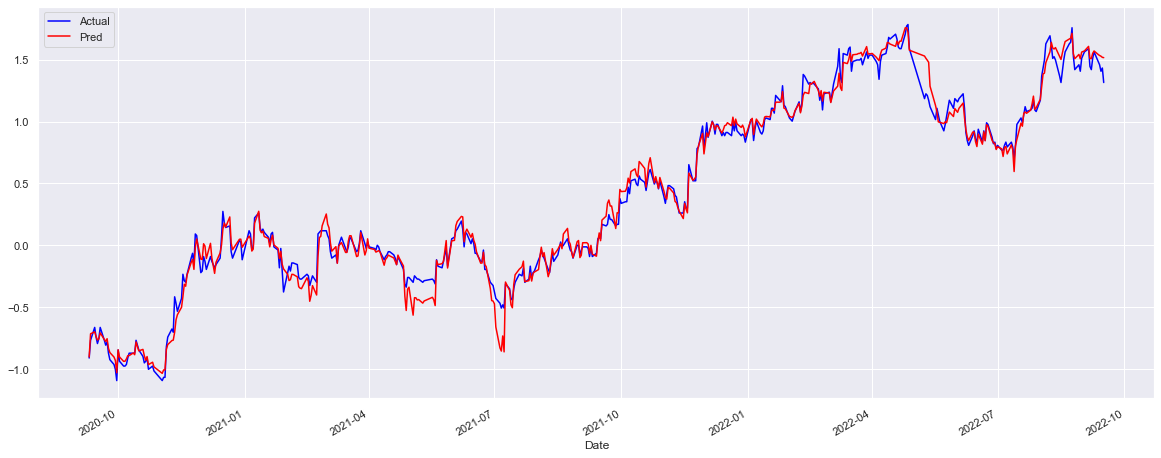

In [16]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [17]:
from joblib import load

In [18]:
close_scaler = load('../feature_engineering/tlkm_close_scaler.bin')

In [19]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [20]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2706.787598,2700.0
2020-09-11,2850.554688,2810.0


**Plot error distribution**

In [21]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

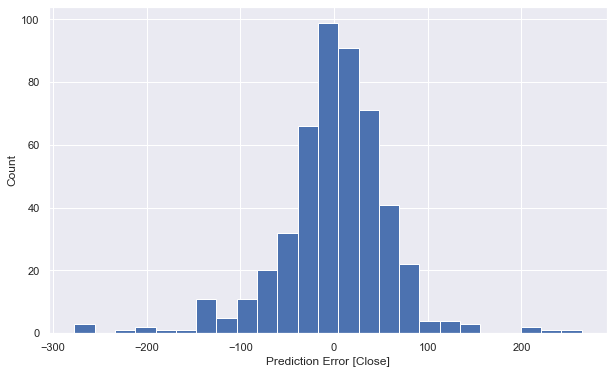

In [22]:
plotErrorHist(inversed)

**RMSE**

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(inversed['Pred'], inversed['Actual'])

60.432448328314614

**MAPE**

In [25]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [26]:
mape(inversed['Actual'], inversed['Pred'])

1.1763414987892158

**R-squared**

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9886591863717025

### Save Model

In [29]:
# Save model
model.save_model('./models/tlkm.json')